# **Data 9. The total monthly expenditure on restaurants and takeaway food services in Australia, April 1980 \- April 2015**



In [5]:
library(forecast)

data = read.table('datos.txt', header = TRUE)
head(data)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



x     
1 0.3424
2 0.3421
3 0.3287
4 0.3385
5 0.3315
6 0.3419

## **Exploratory plots**



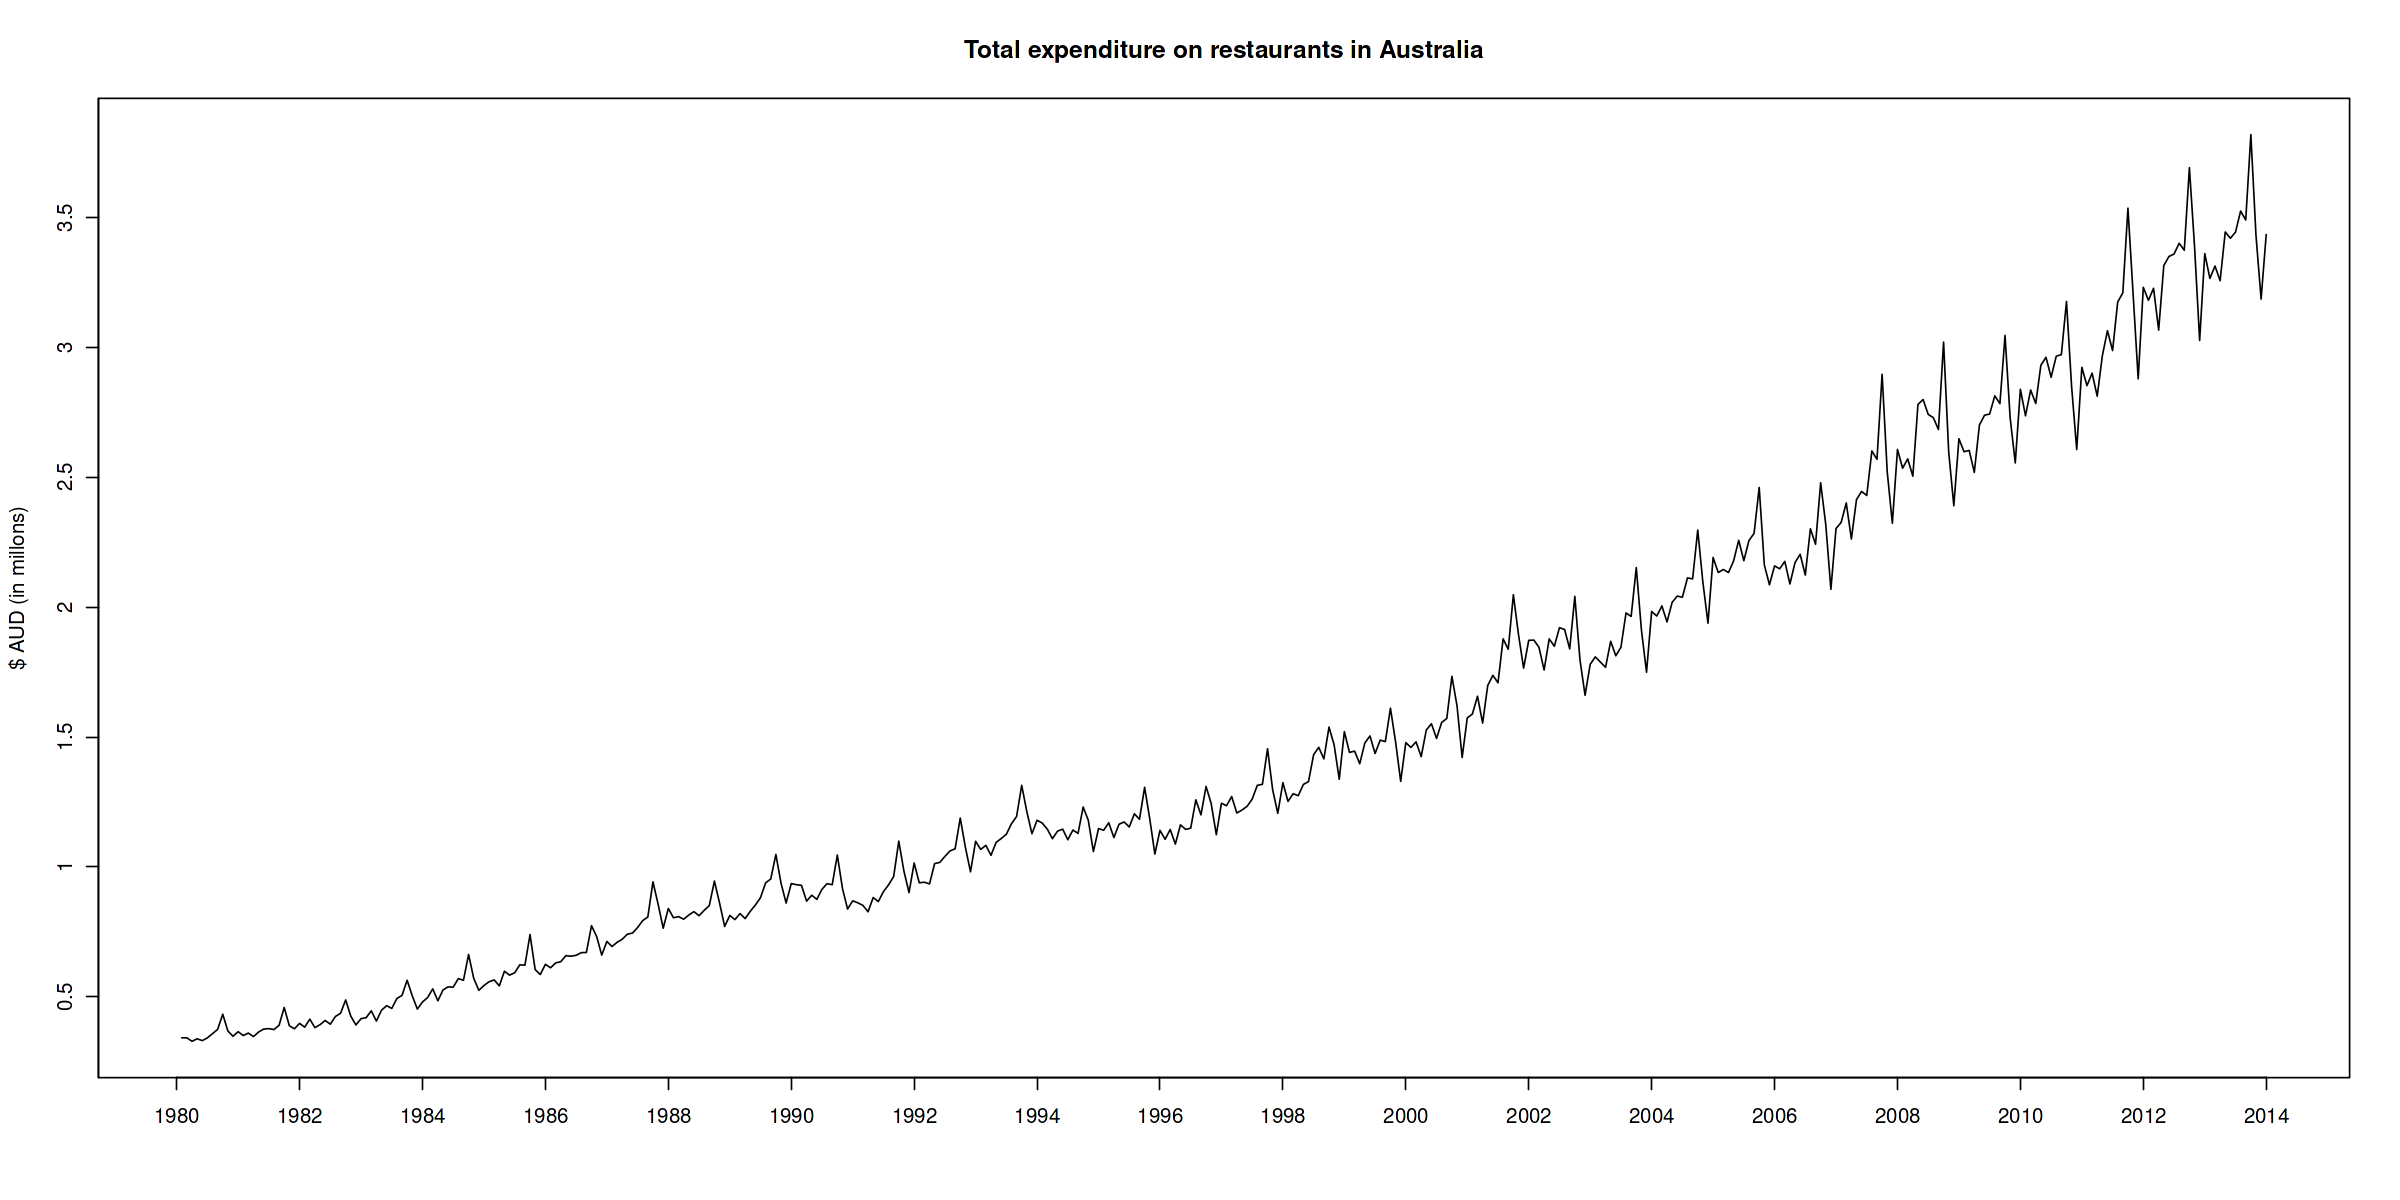

In [6]:
options(repr.plot.width=20, repr.plot.height=10)

plot(seq(1,408), data[,1],axes=F,ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia")
box()
axis(2,at=seq(0,4, by=0.5),labels=seq(0,4, by=0.5))
axis(1,at=seq(0,408,by=24),labels=seq(1980,2015,by=2))

**Sample ACF of the series**


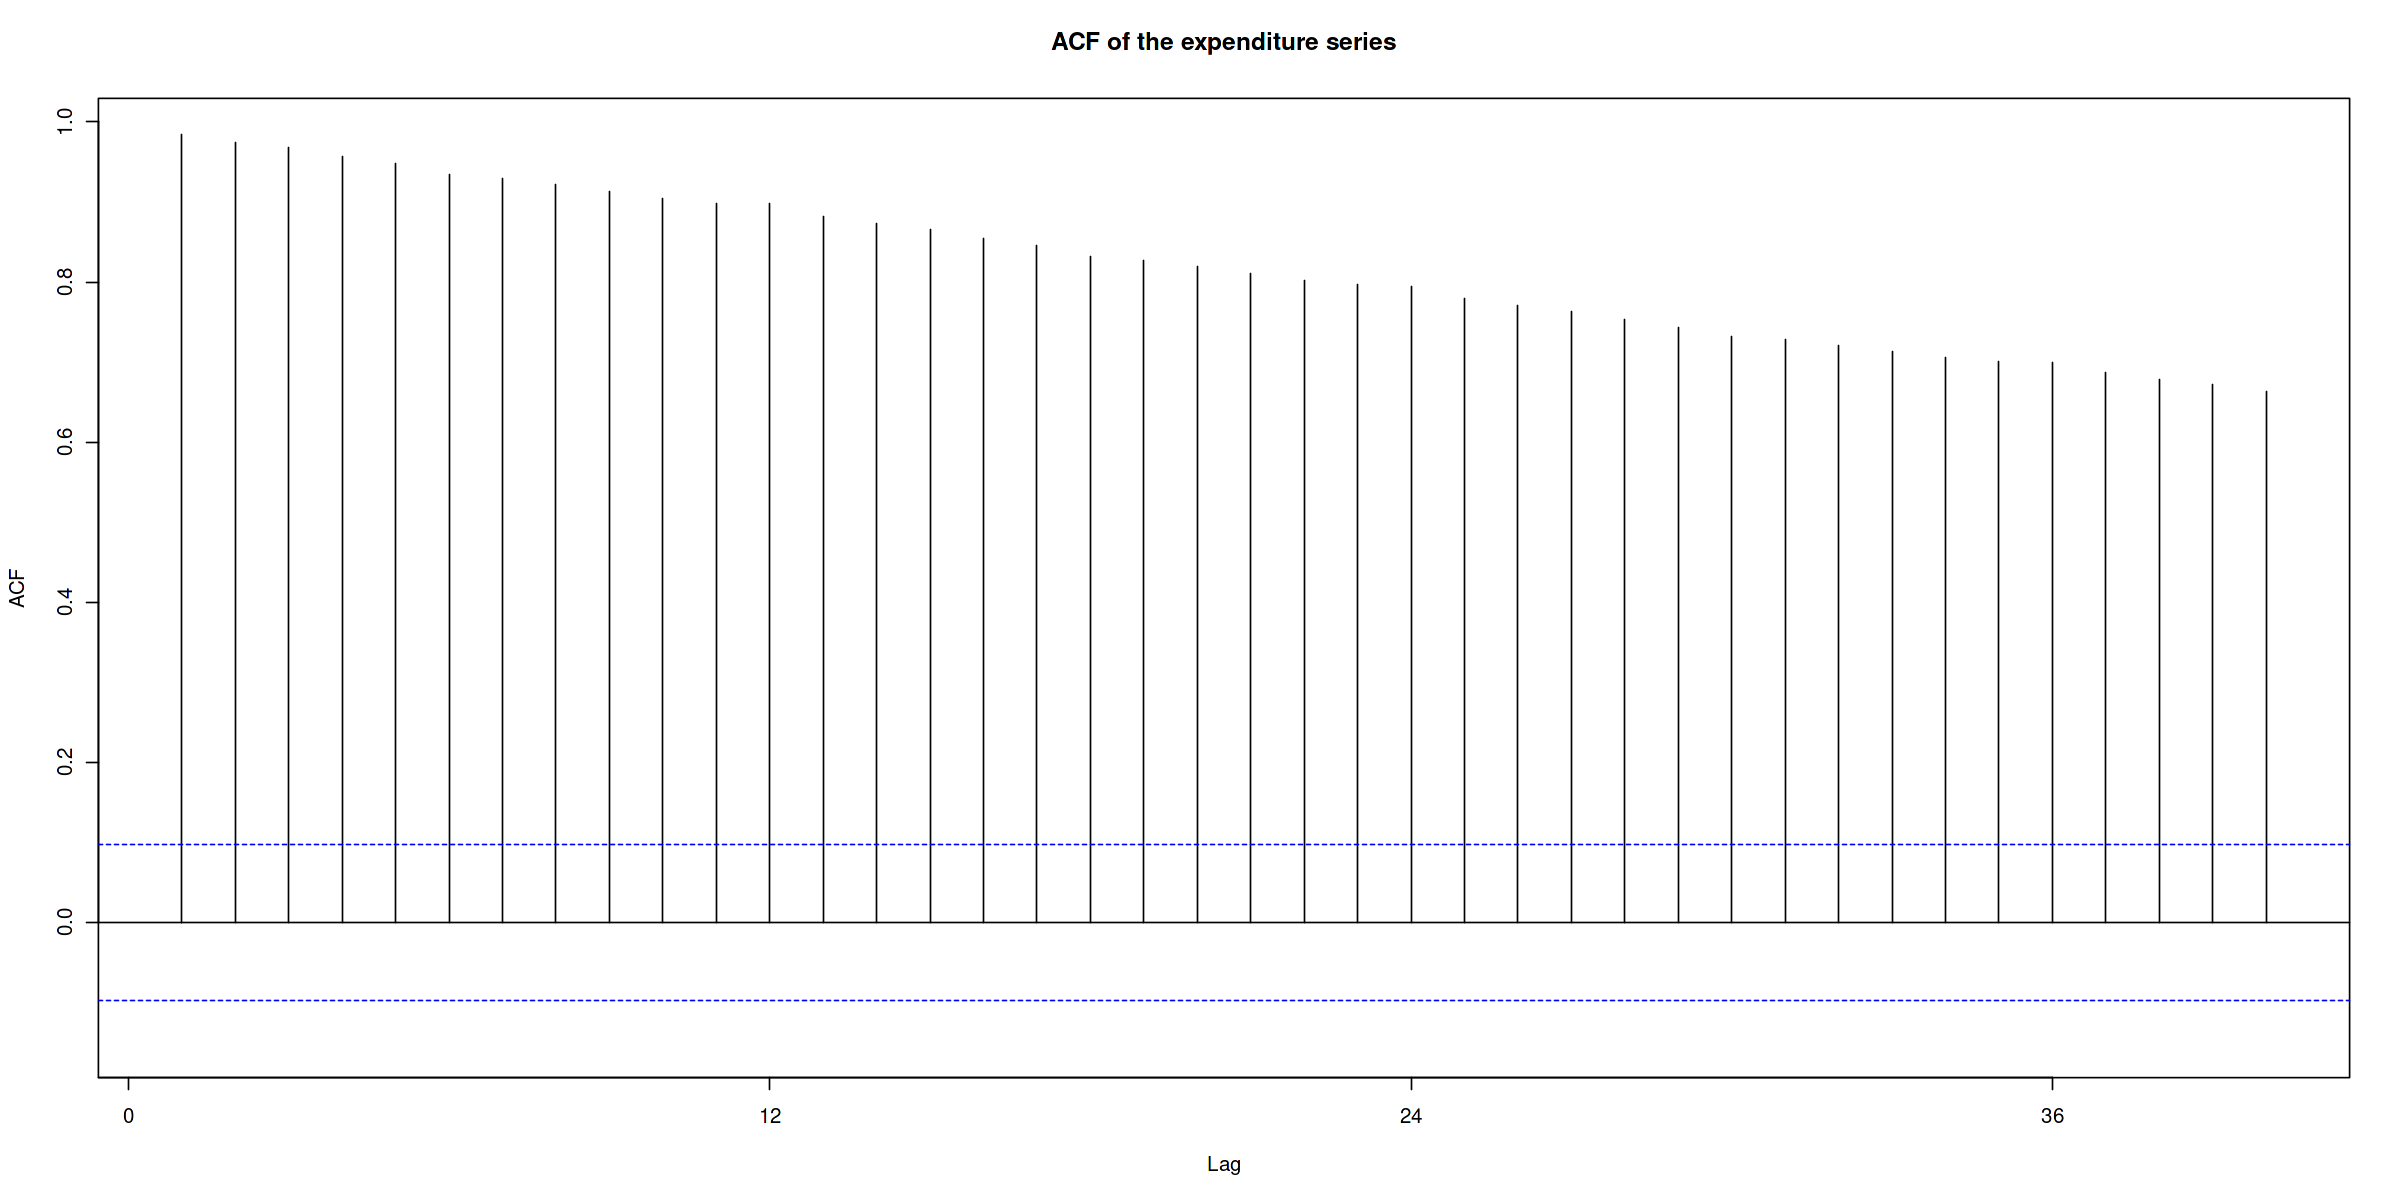

In [7]:
expenditure <- data[,1]
z <- ts(expenditure, start = c(1980, 1), frequency = 12)
Acf(z,40, main="ACF of the expenditure series",xlab="Lag",ylab="ACF")

**Seasonal plot**


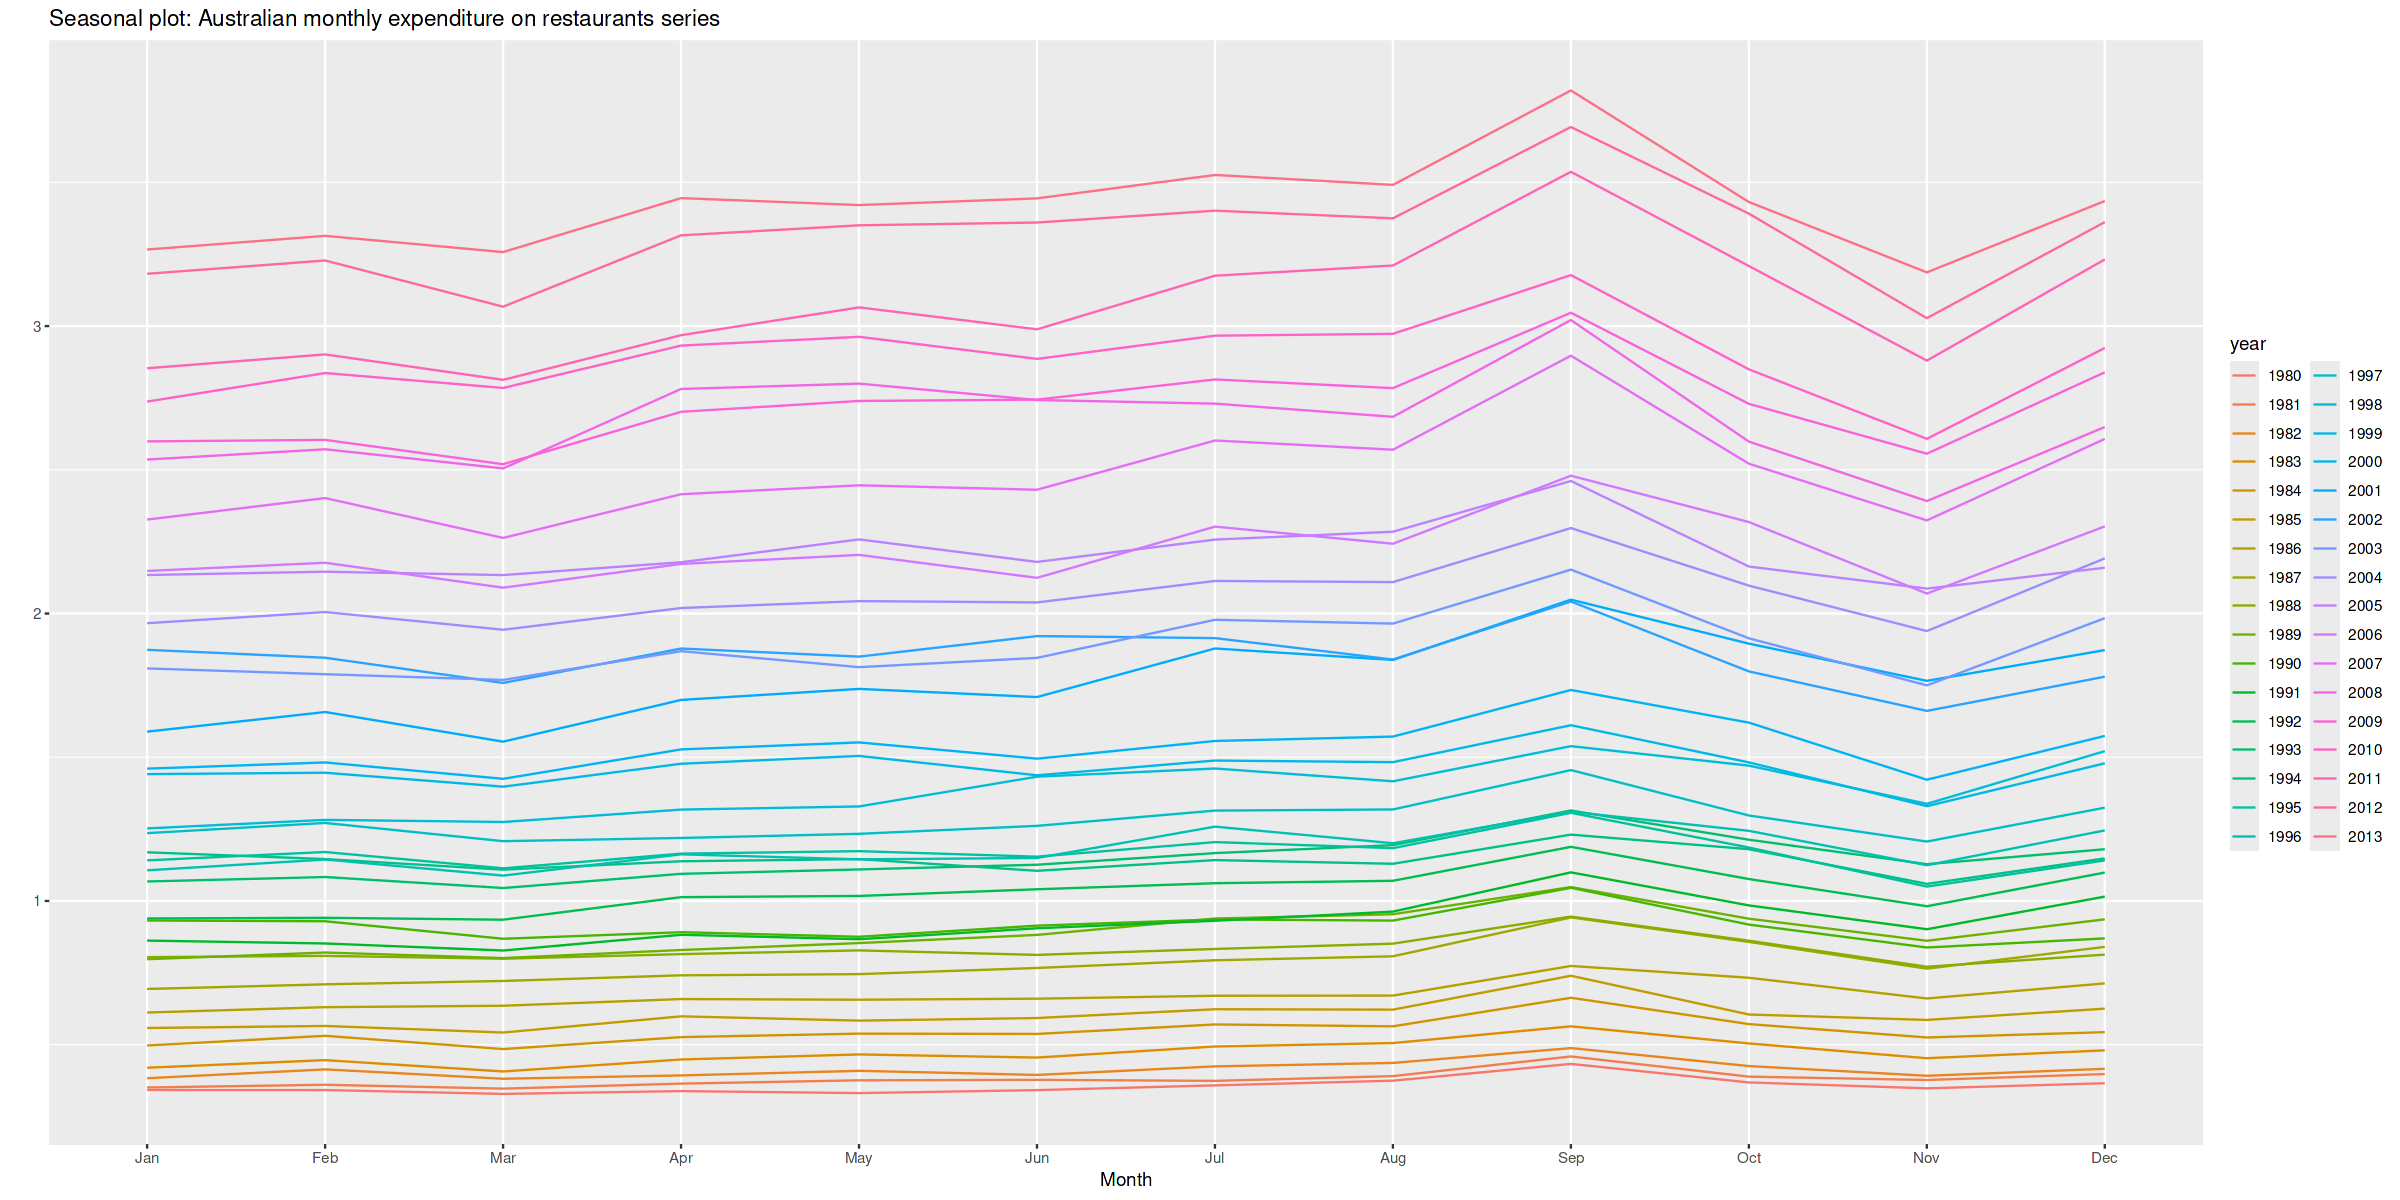

In [8]:
ggseasonplot(z,main="Seasonal plot: Australian monthly expenditure on restaurants series")

Is the time series stationary?

The graph of the series, the seasonal plot and the ACF suggest:

- The variance increases with the level of the series ⇒ the variance is not constant

- The presence of a trend component ⇒ The mean is not constant

- The presence of a seasonal component with period s=12 ⇒ The mean is not constant



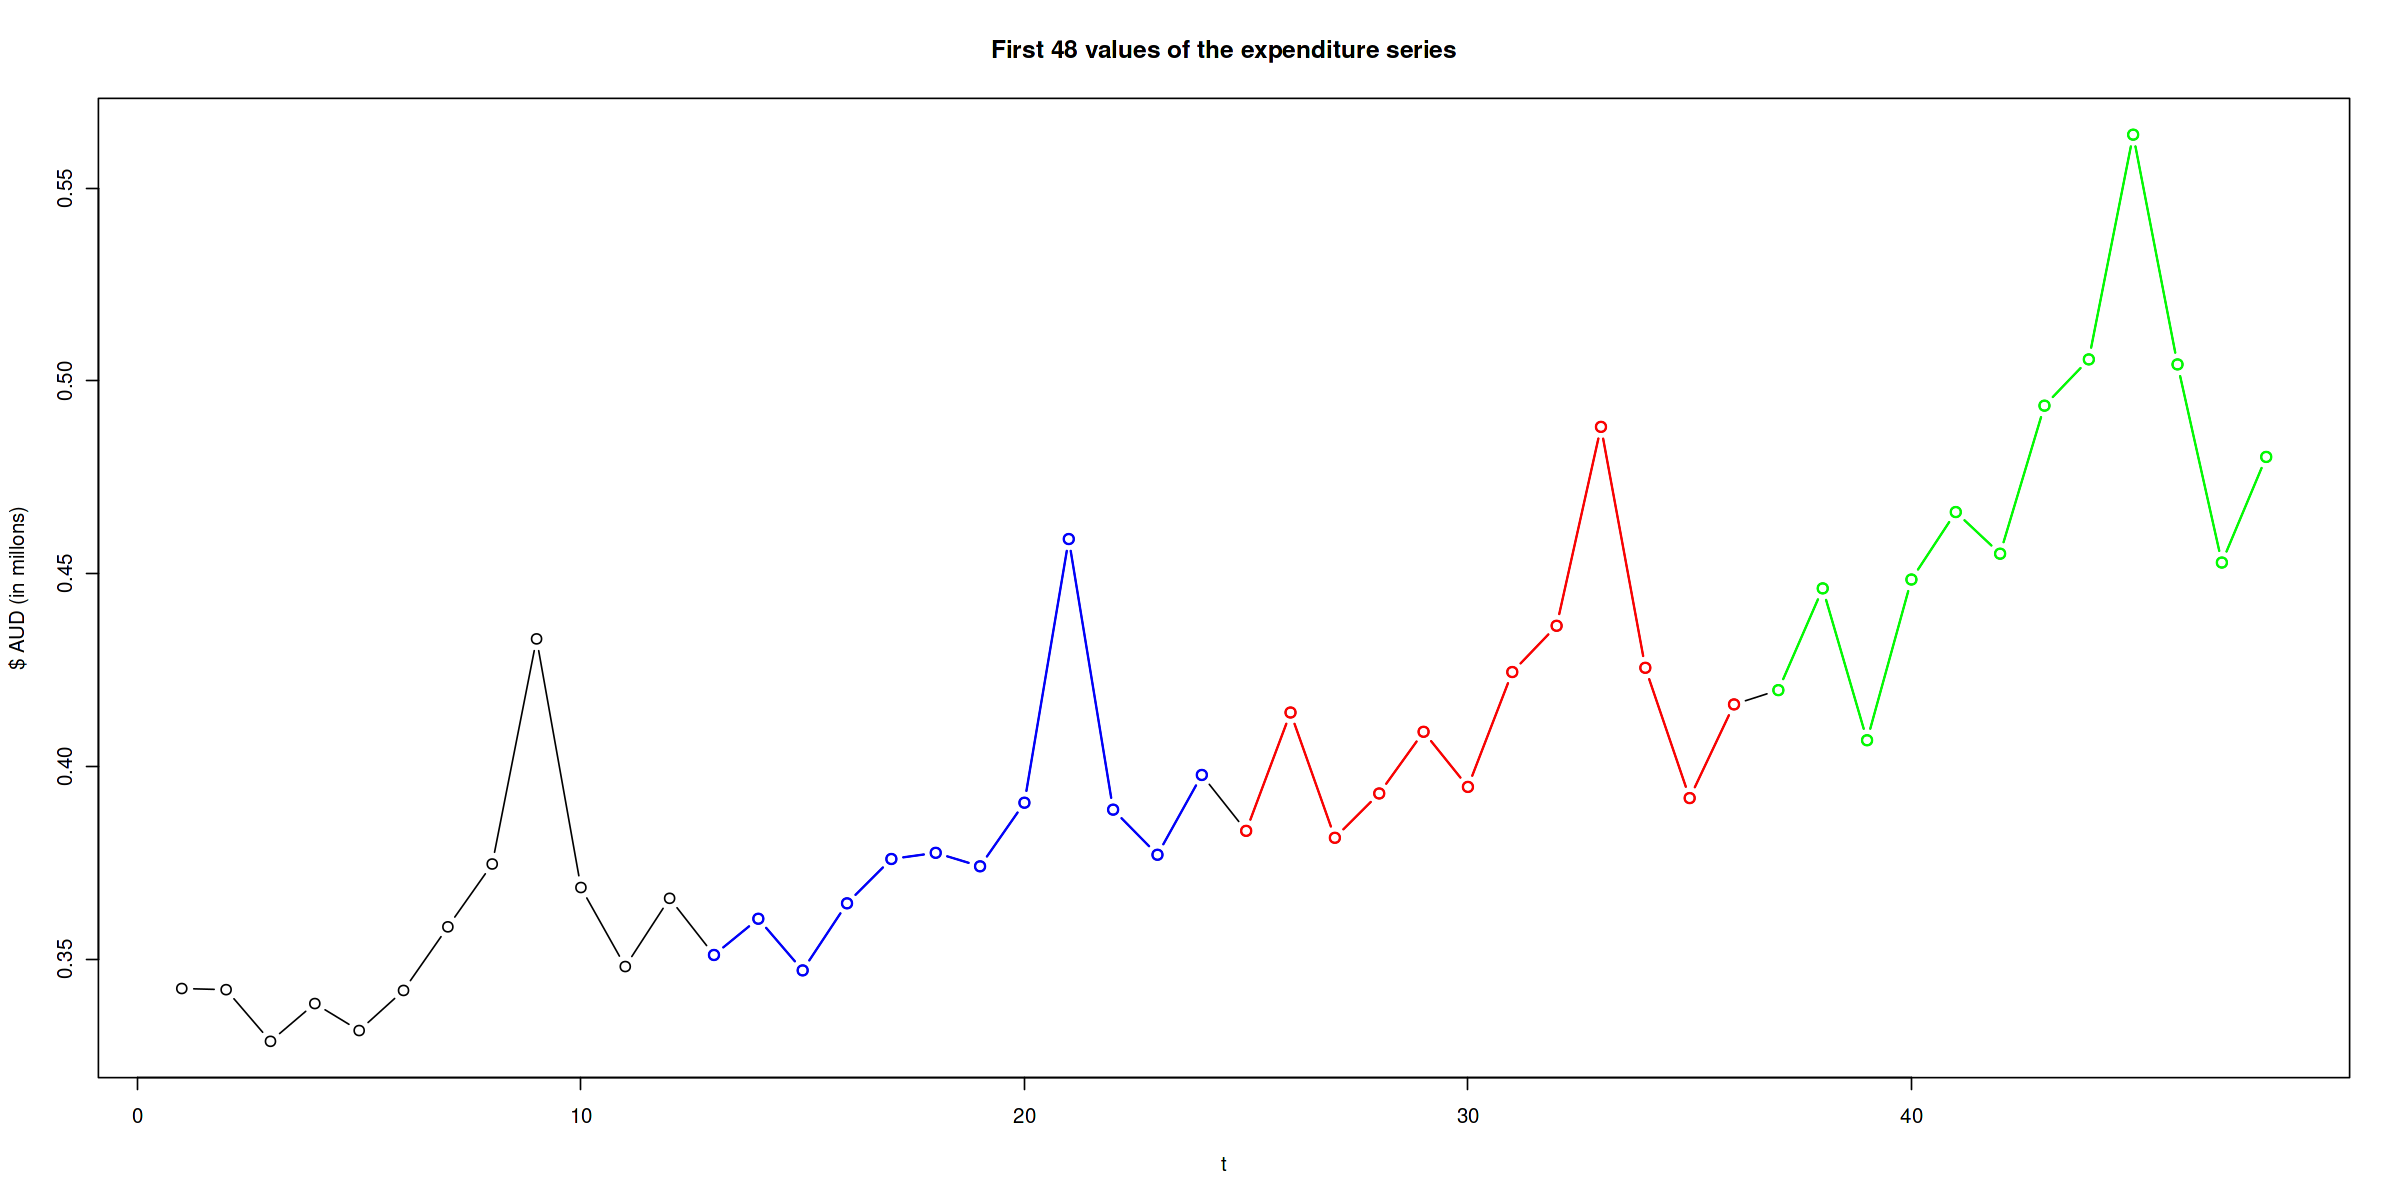

In [9]:
ts.plot(z[1:48],xlab="t", ylab="$ AUD (in millons)",main="First 48 values of the expenditure series",type="b")  
points(seq(13,24),z[13:24],type="b",col="blue",lwd=1.4)
points(seq(25,36),z[25:36],type="b",col="red",lwd=1.4)
points(seq(37,48),z[37:48],type="b",col="green",lwd=1.4)

## **Transformations to obtain a stationary time series**



#### **Variance stabilizing transformations**



In [10]:
source("BoxCoxTransformation.R") #load functions to implement Box-Cox transformation

Before applying Box-Cox we need to check that the relationship between the logarithm of the mean and the logarithm of the standard deviation is approximately linear.

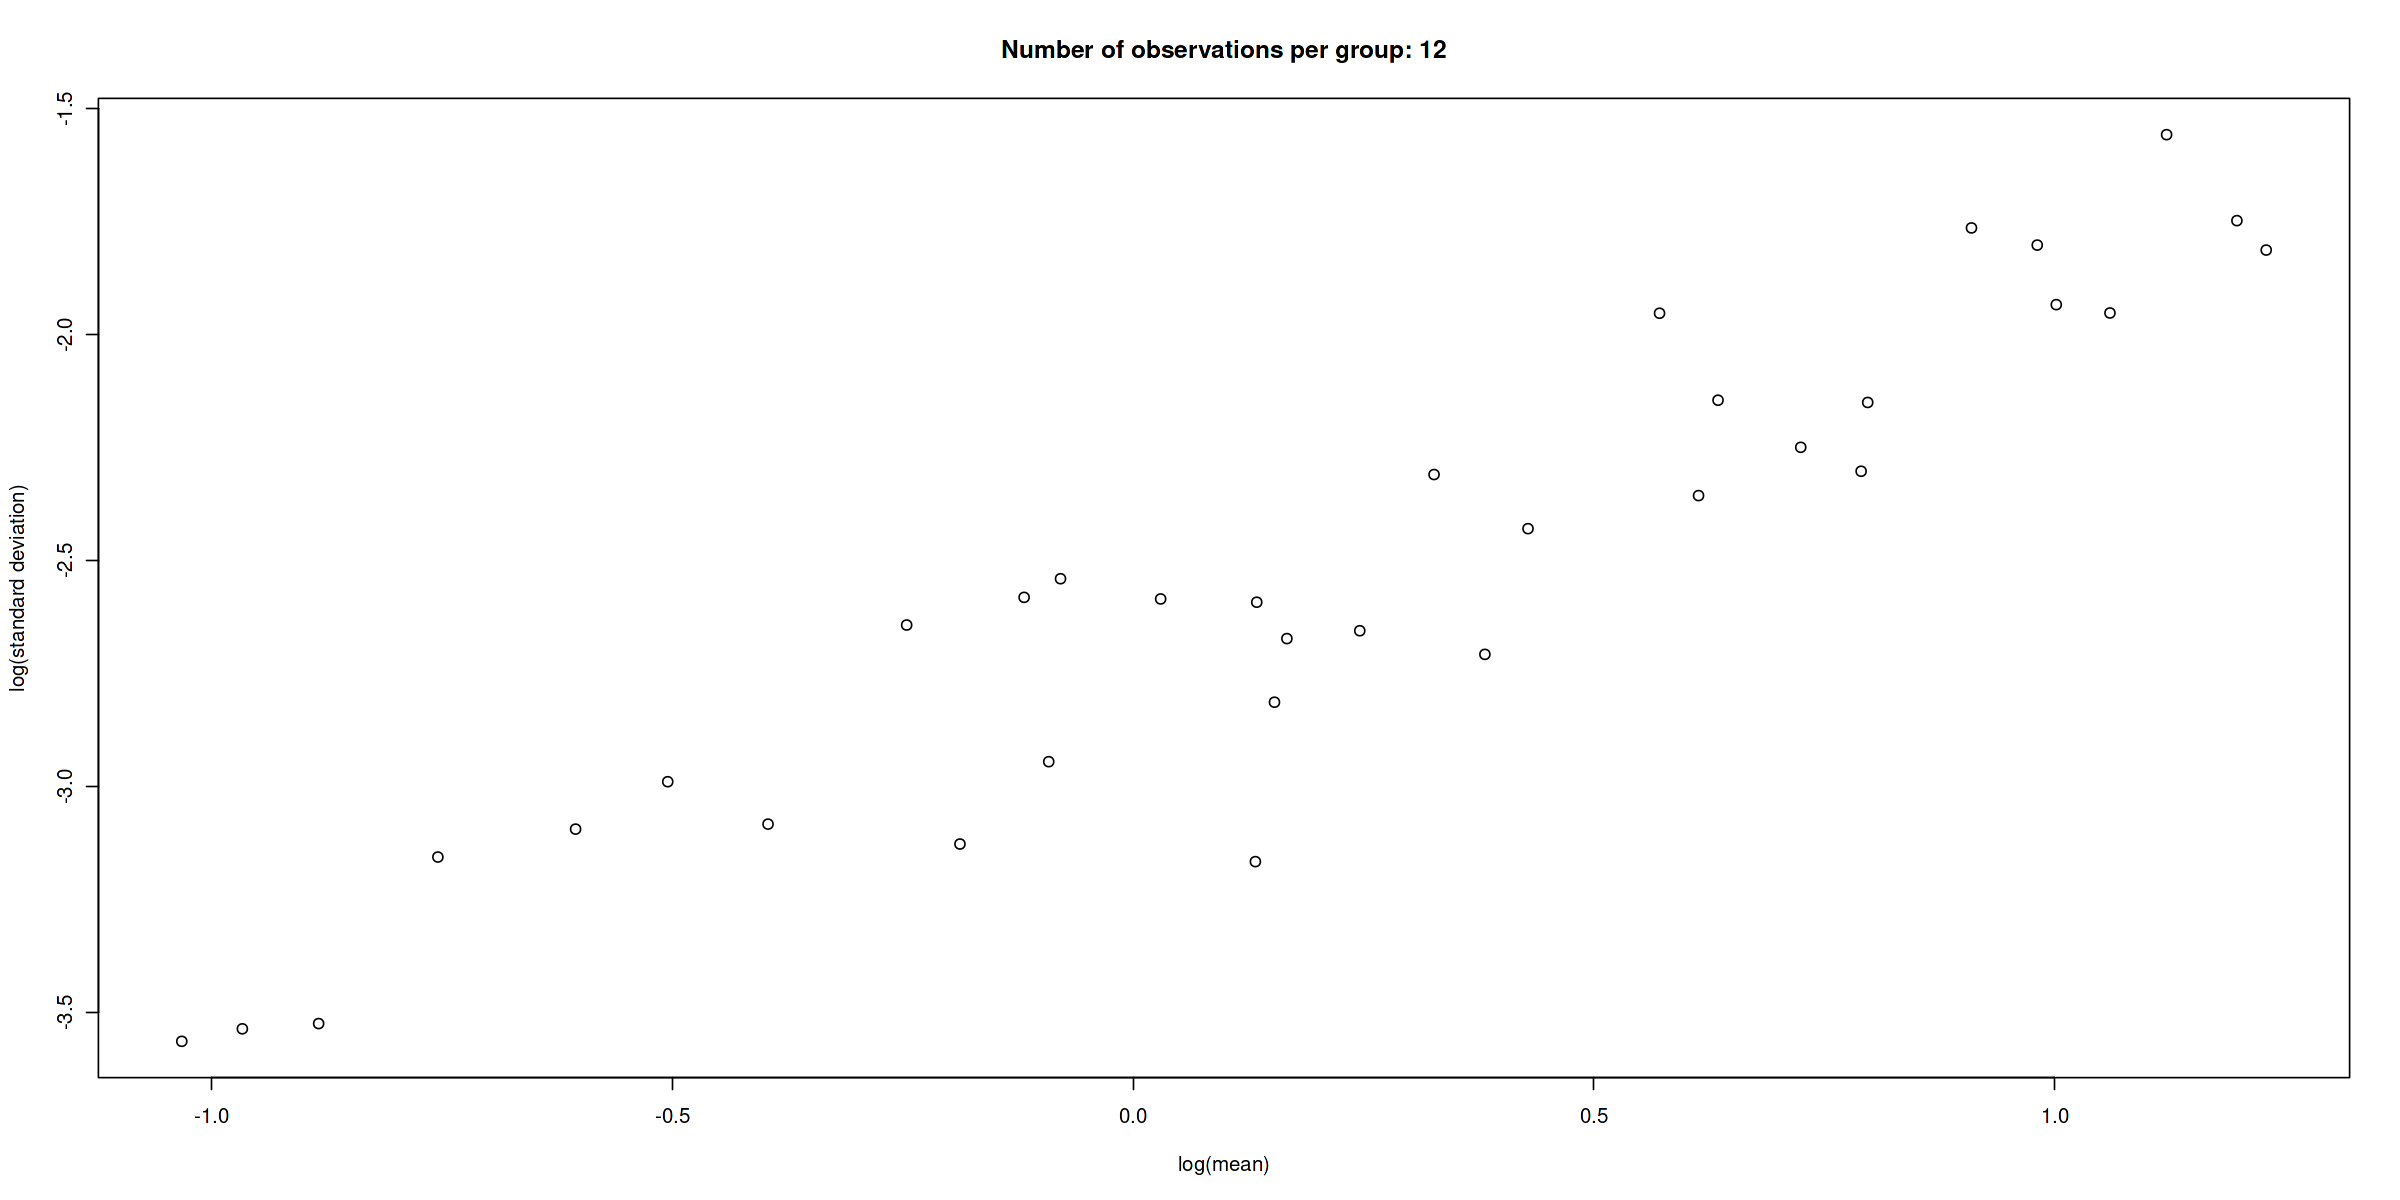

In [11]:
Plot.var(expenditure,12)

**Plot of the transformed time series and estimated value of** $\lambda$**.**


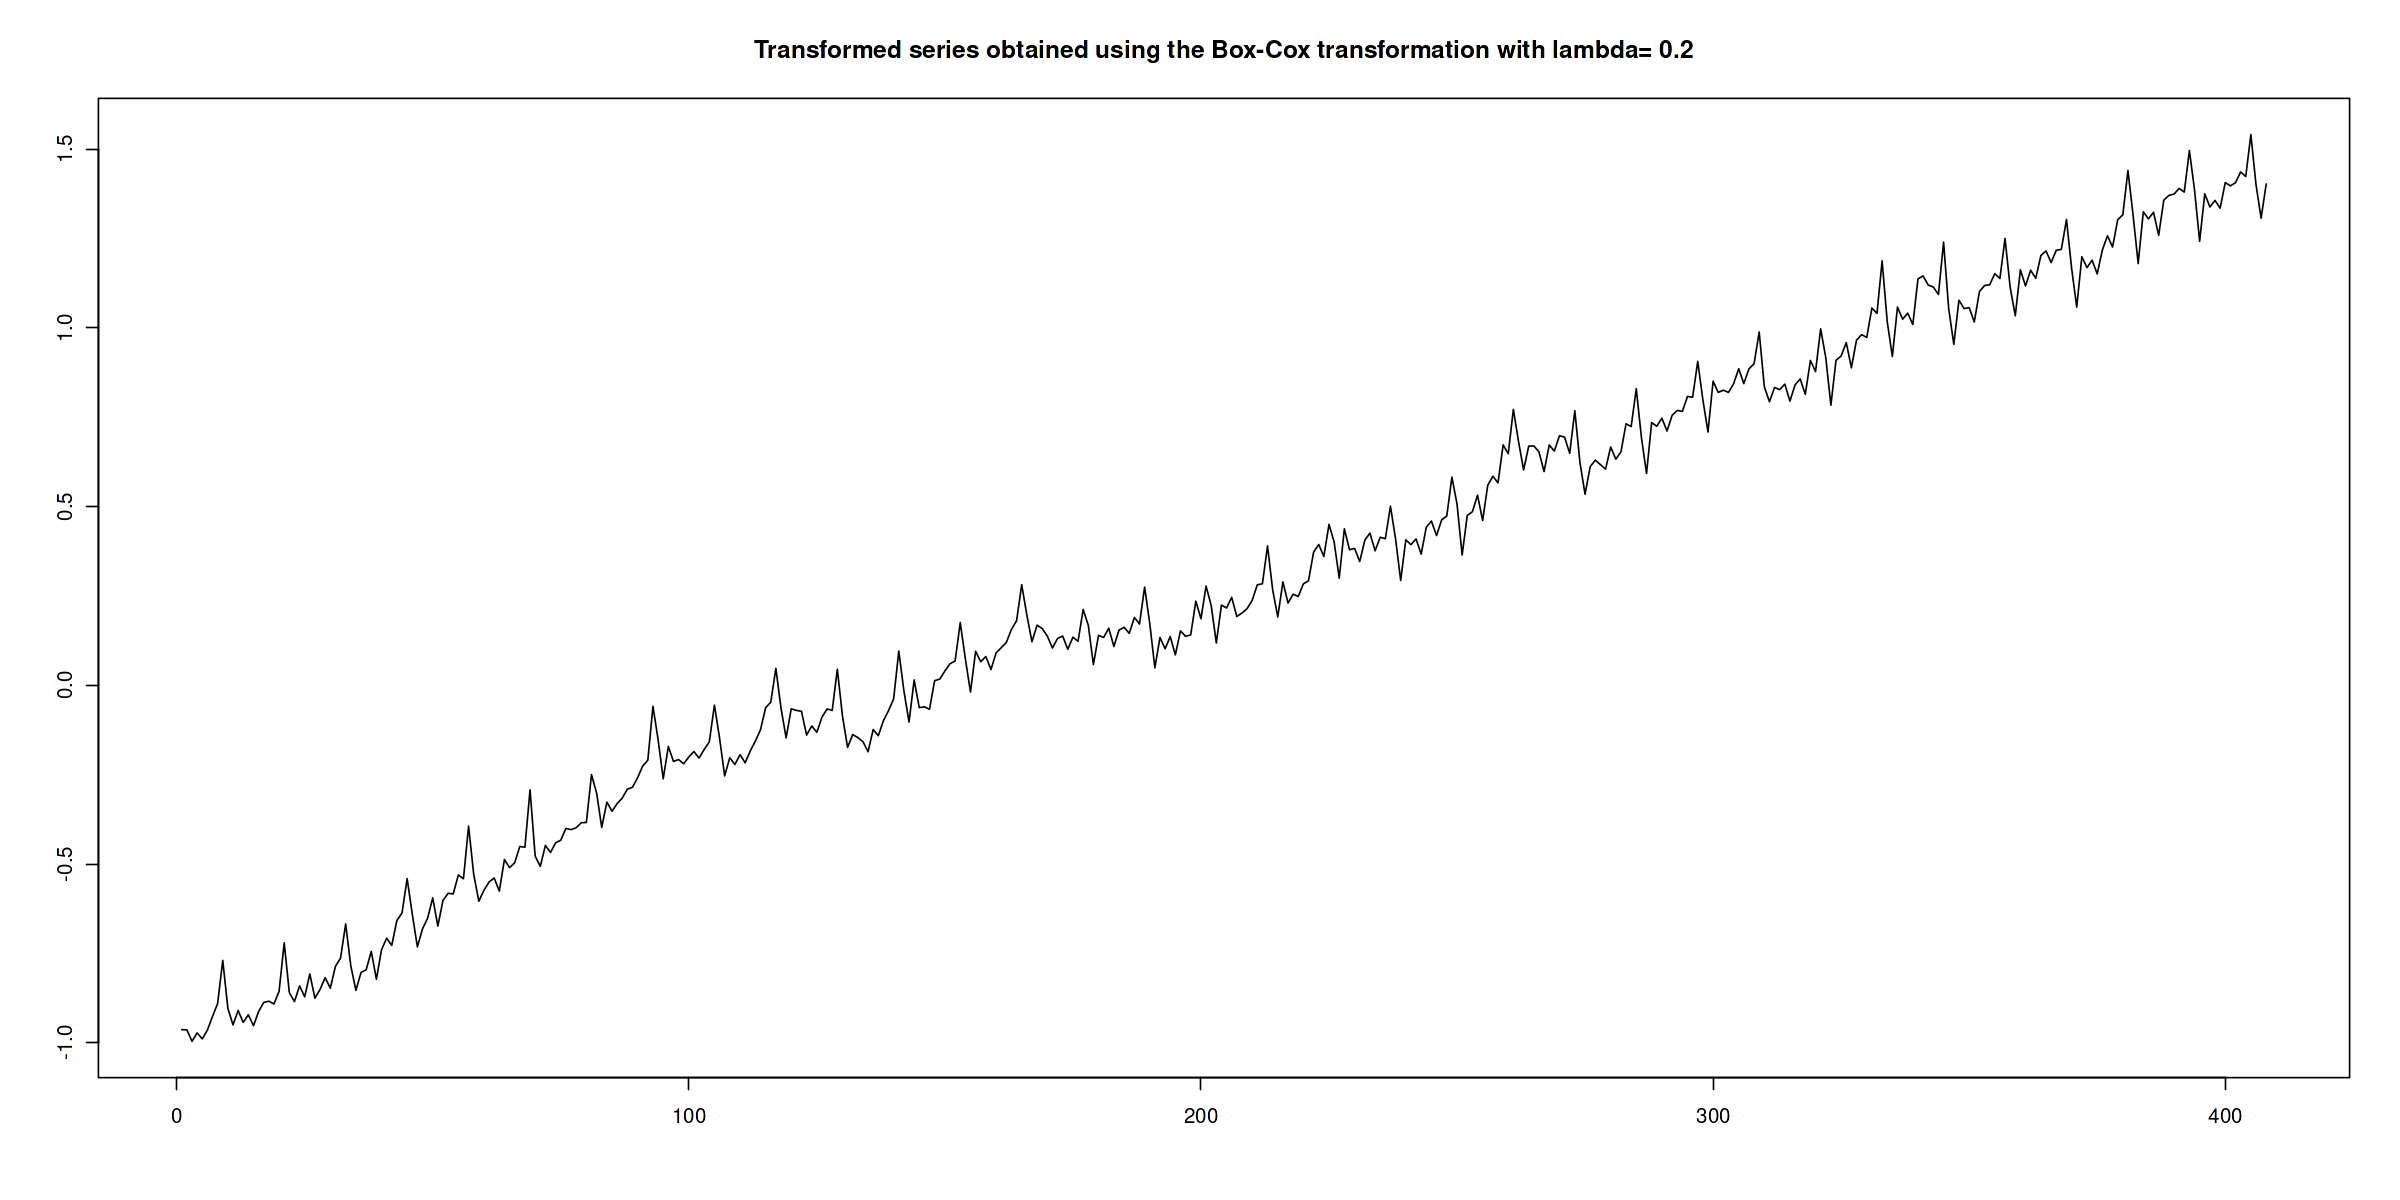

In [12]:
BoxCox(expenditure,12)

**Transformed time series**


Let $\tilde X_t = \frac{X_t^\lambda - 1}{\lambda} $, where $\lambda = 0.2$.



In [13]:
X.tilde=BoxCox.out(expenditure,12)[[1]]
head(X.tilde)

[1] -0.9630982 -0.9638031 -0.9958052 -0.9723012 -0.9890334 -0.9642734

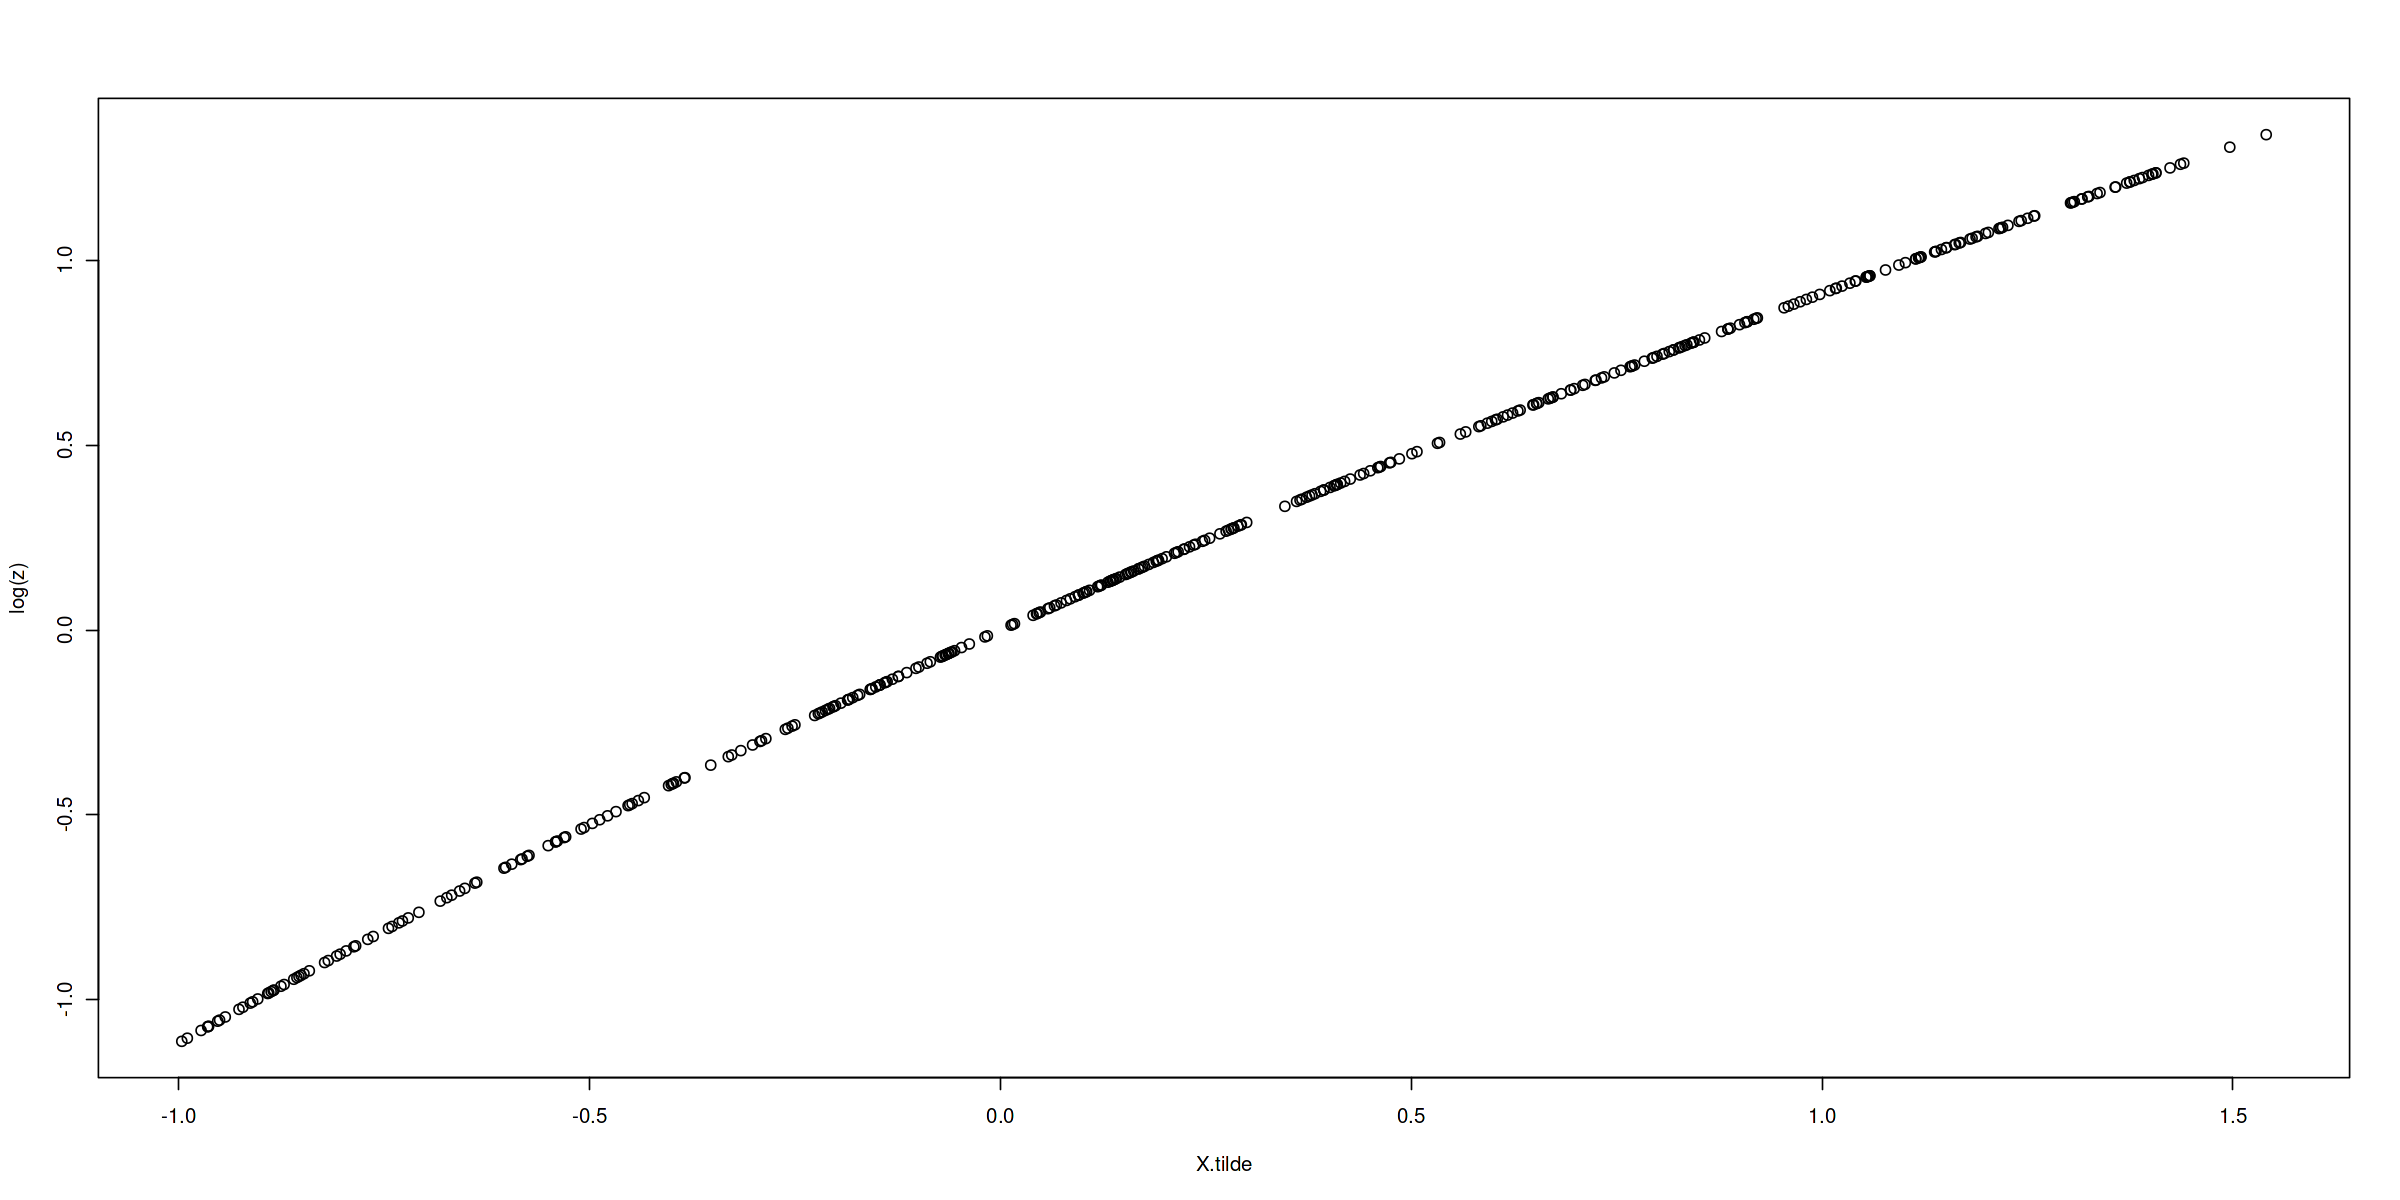

In [14]:
plot(X.tilde, log(z))

#### **Mean stabilizing transformations**



###### **Remove the trend component**



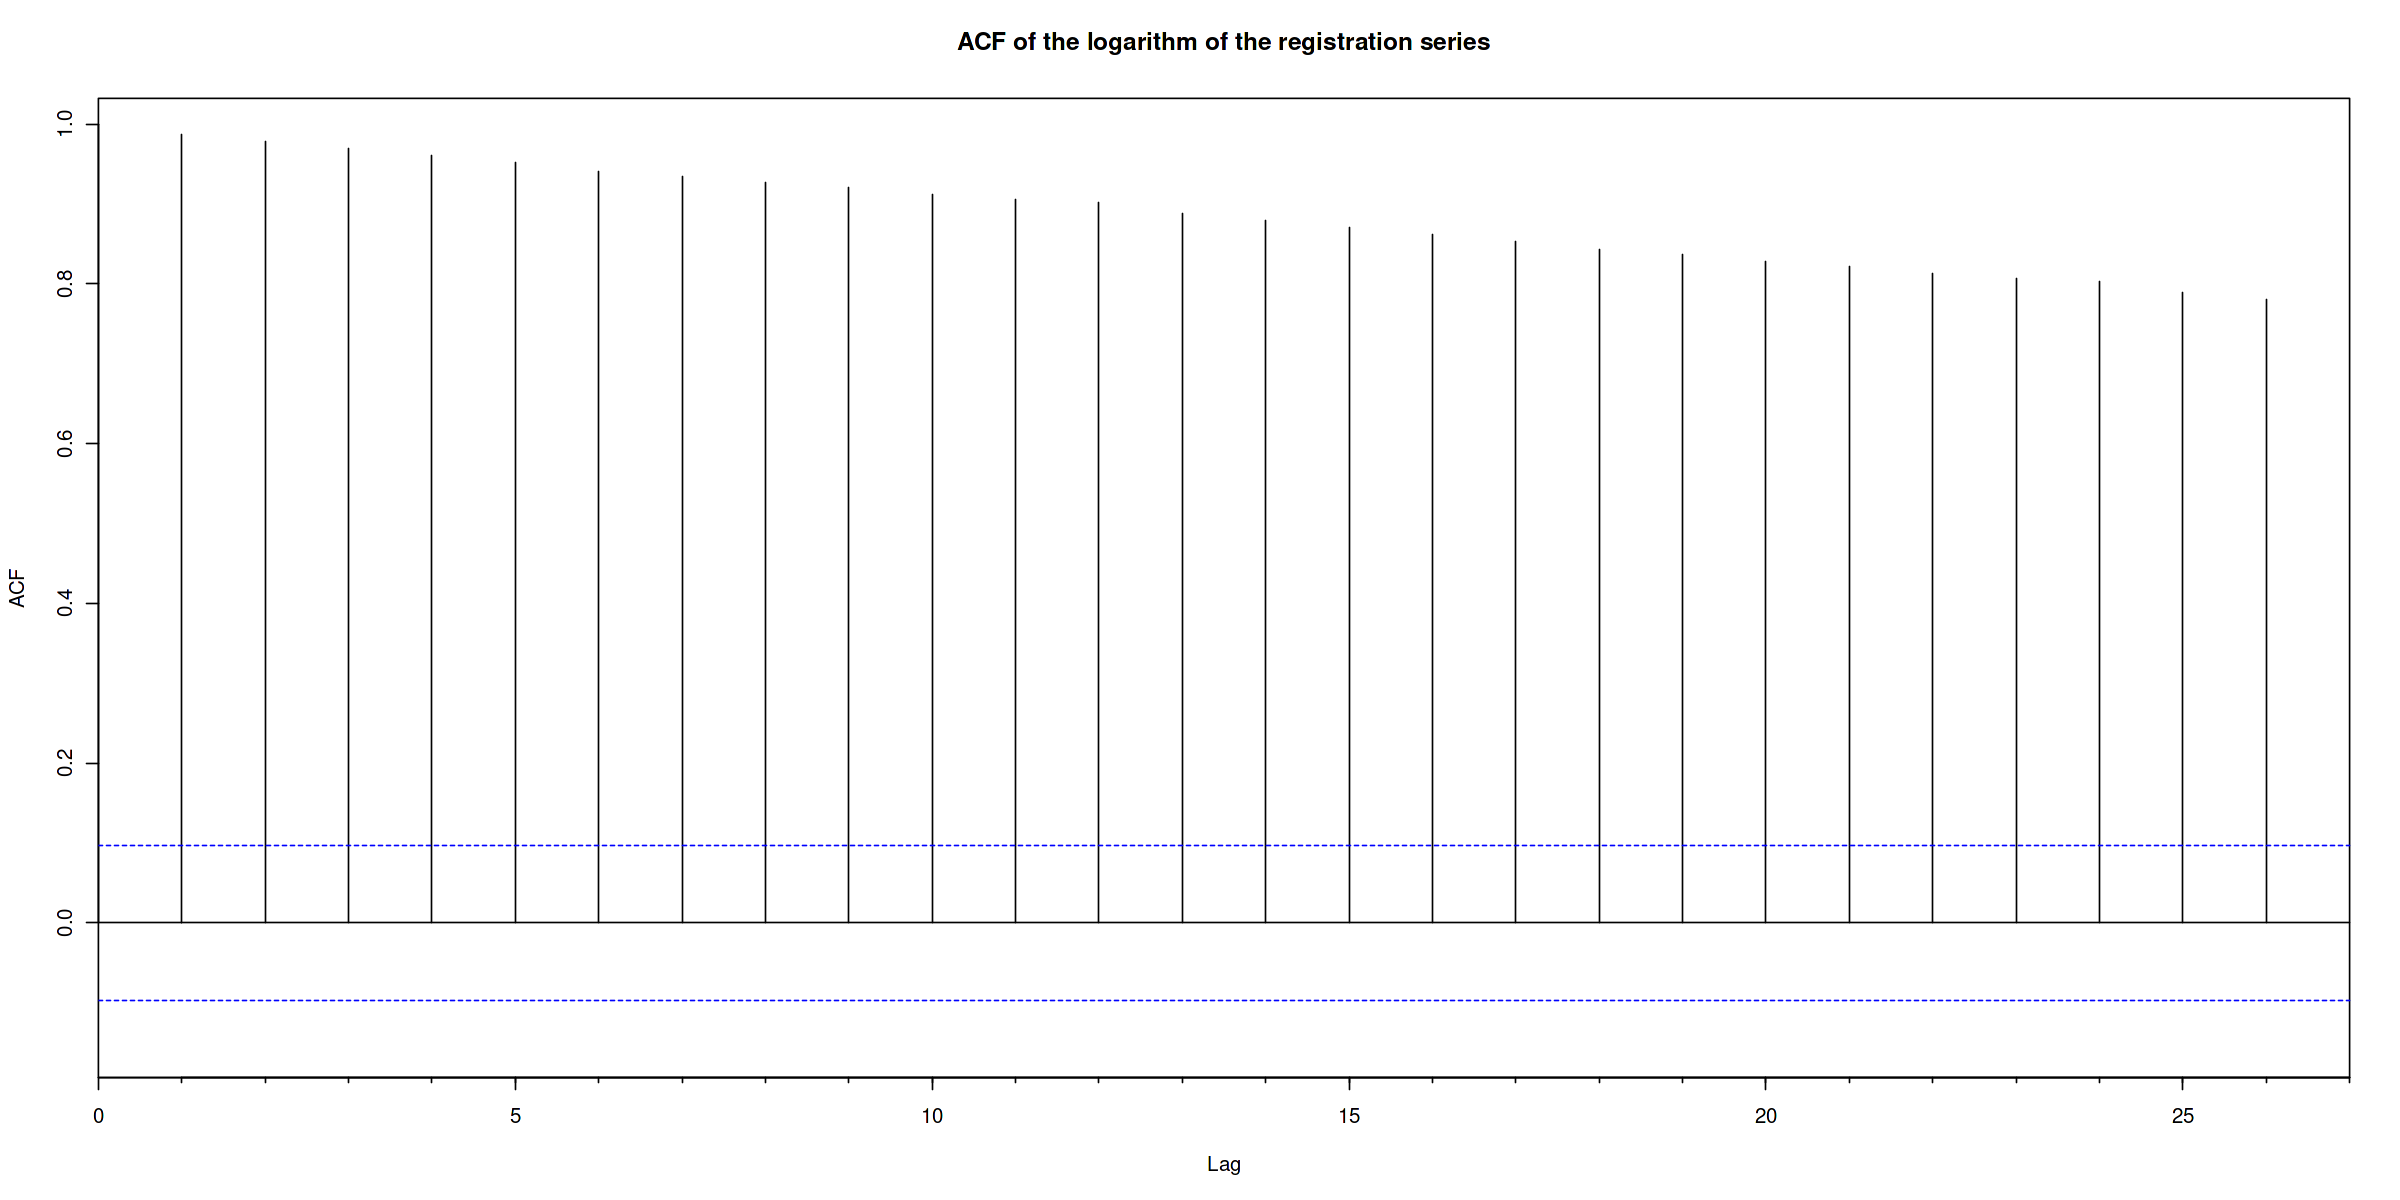

In [15]:
Acf(X.tilde,main="ACF of the logarithm of the registration series",xlab="Lag",ylab="ACF")

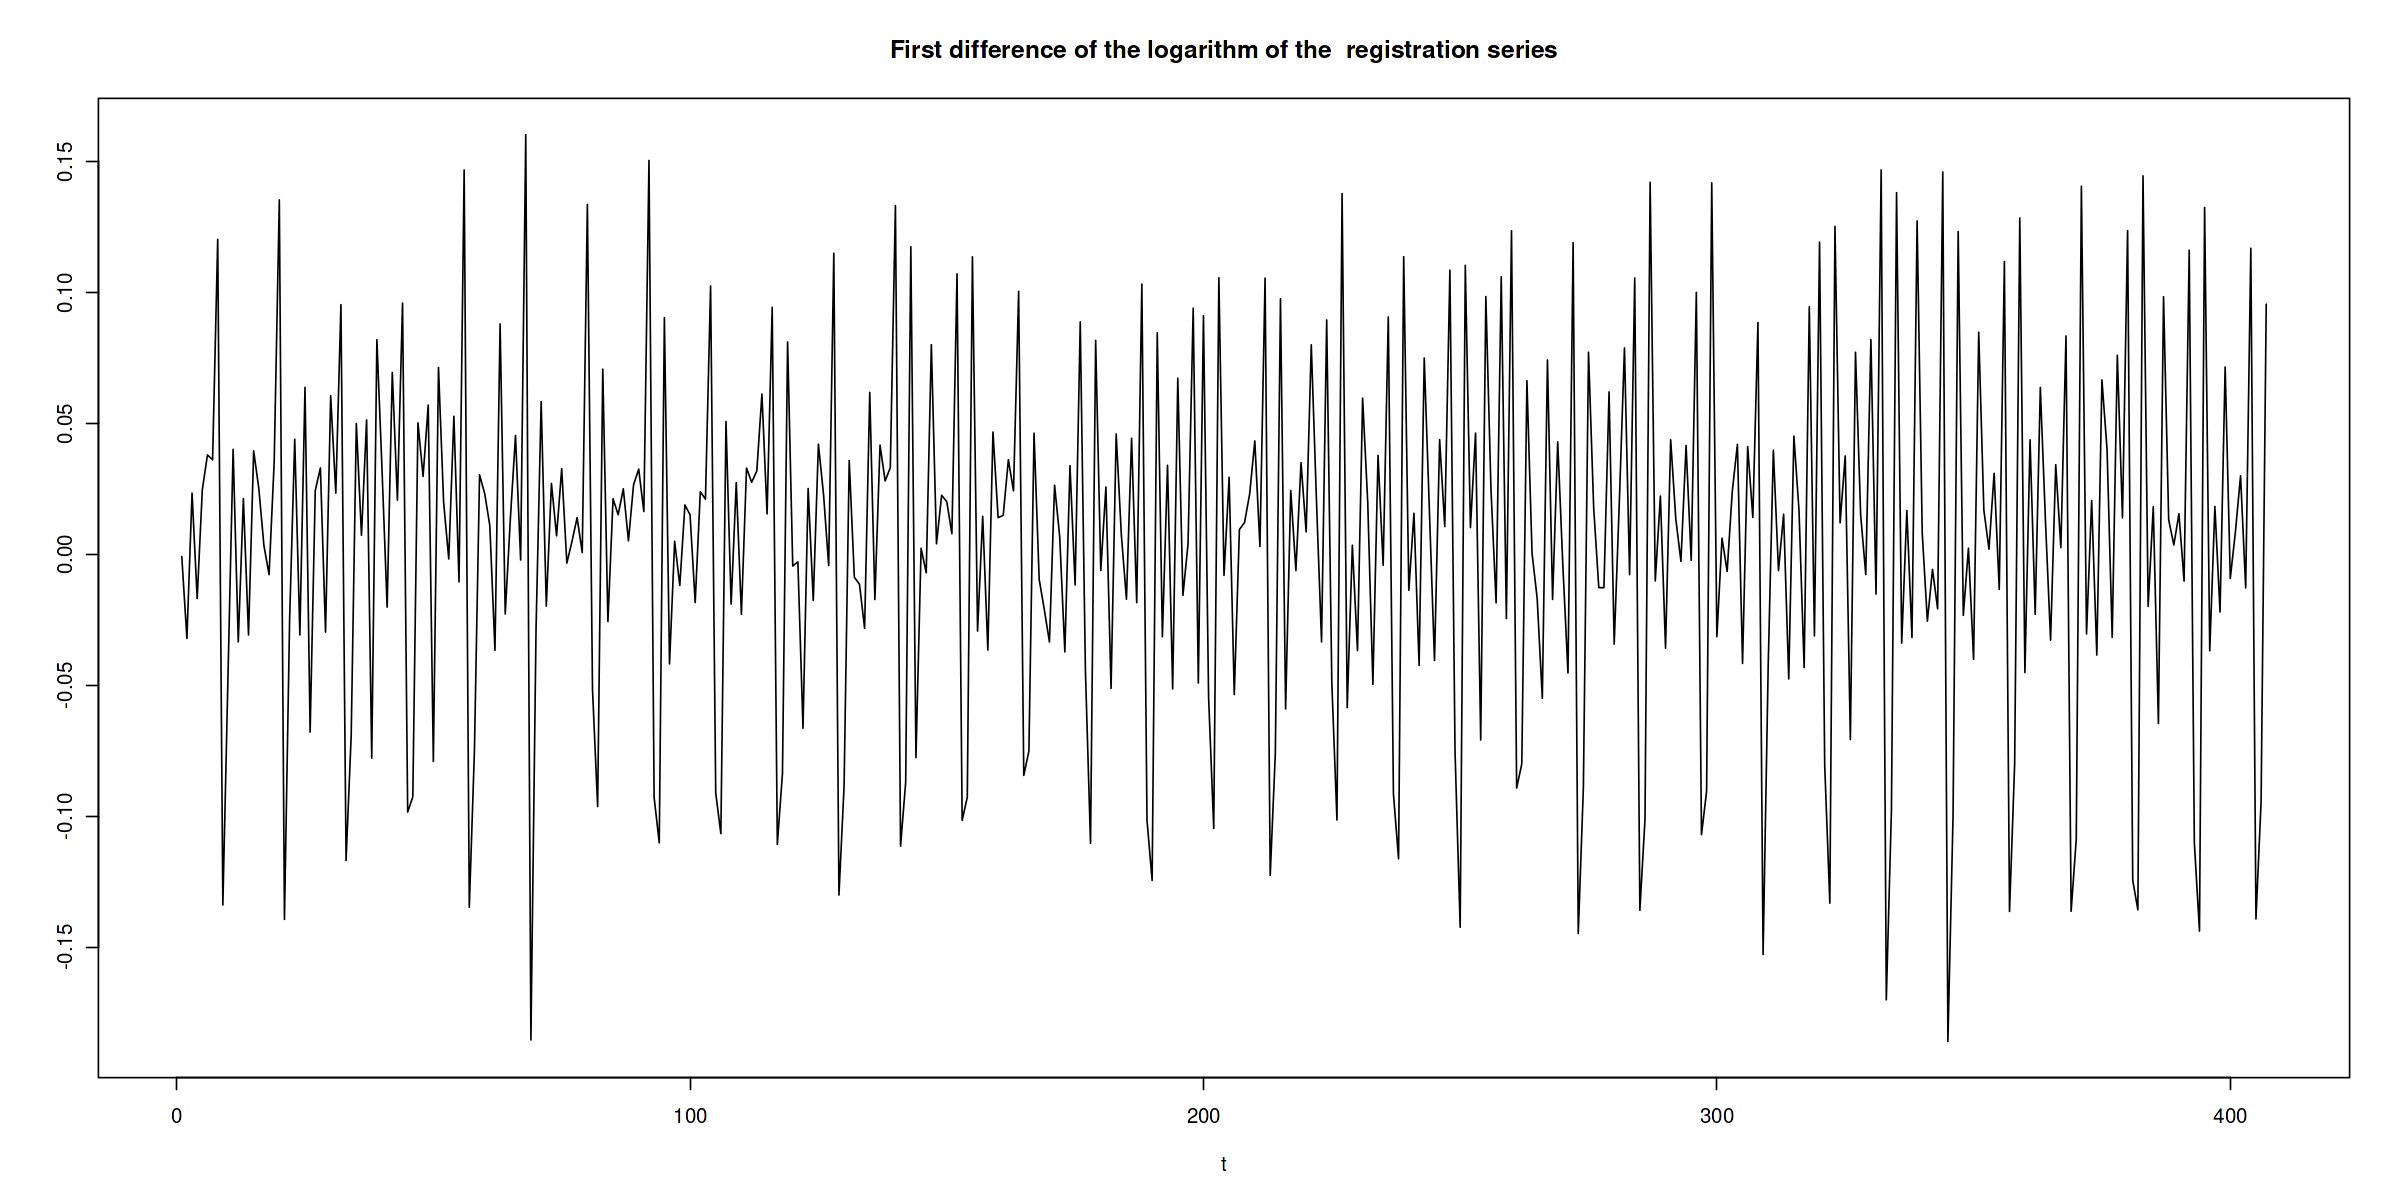

In [16]:
Wt.1=diff(X.tilde,lag=1,differences=1)
ts.plot(Wt.1,xlab="t", ylab="",main="First difference of the logarithm of the  registration series",type="l") 

Let $W_t = \nabla \tilde X_t = \tilde X_t - \tilde X_{t-1}$


###### **Remove the seasonal component**



Seasonal plot of the transformed series $\{W_t\}$



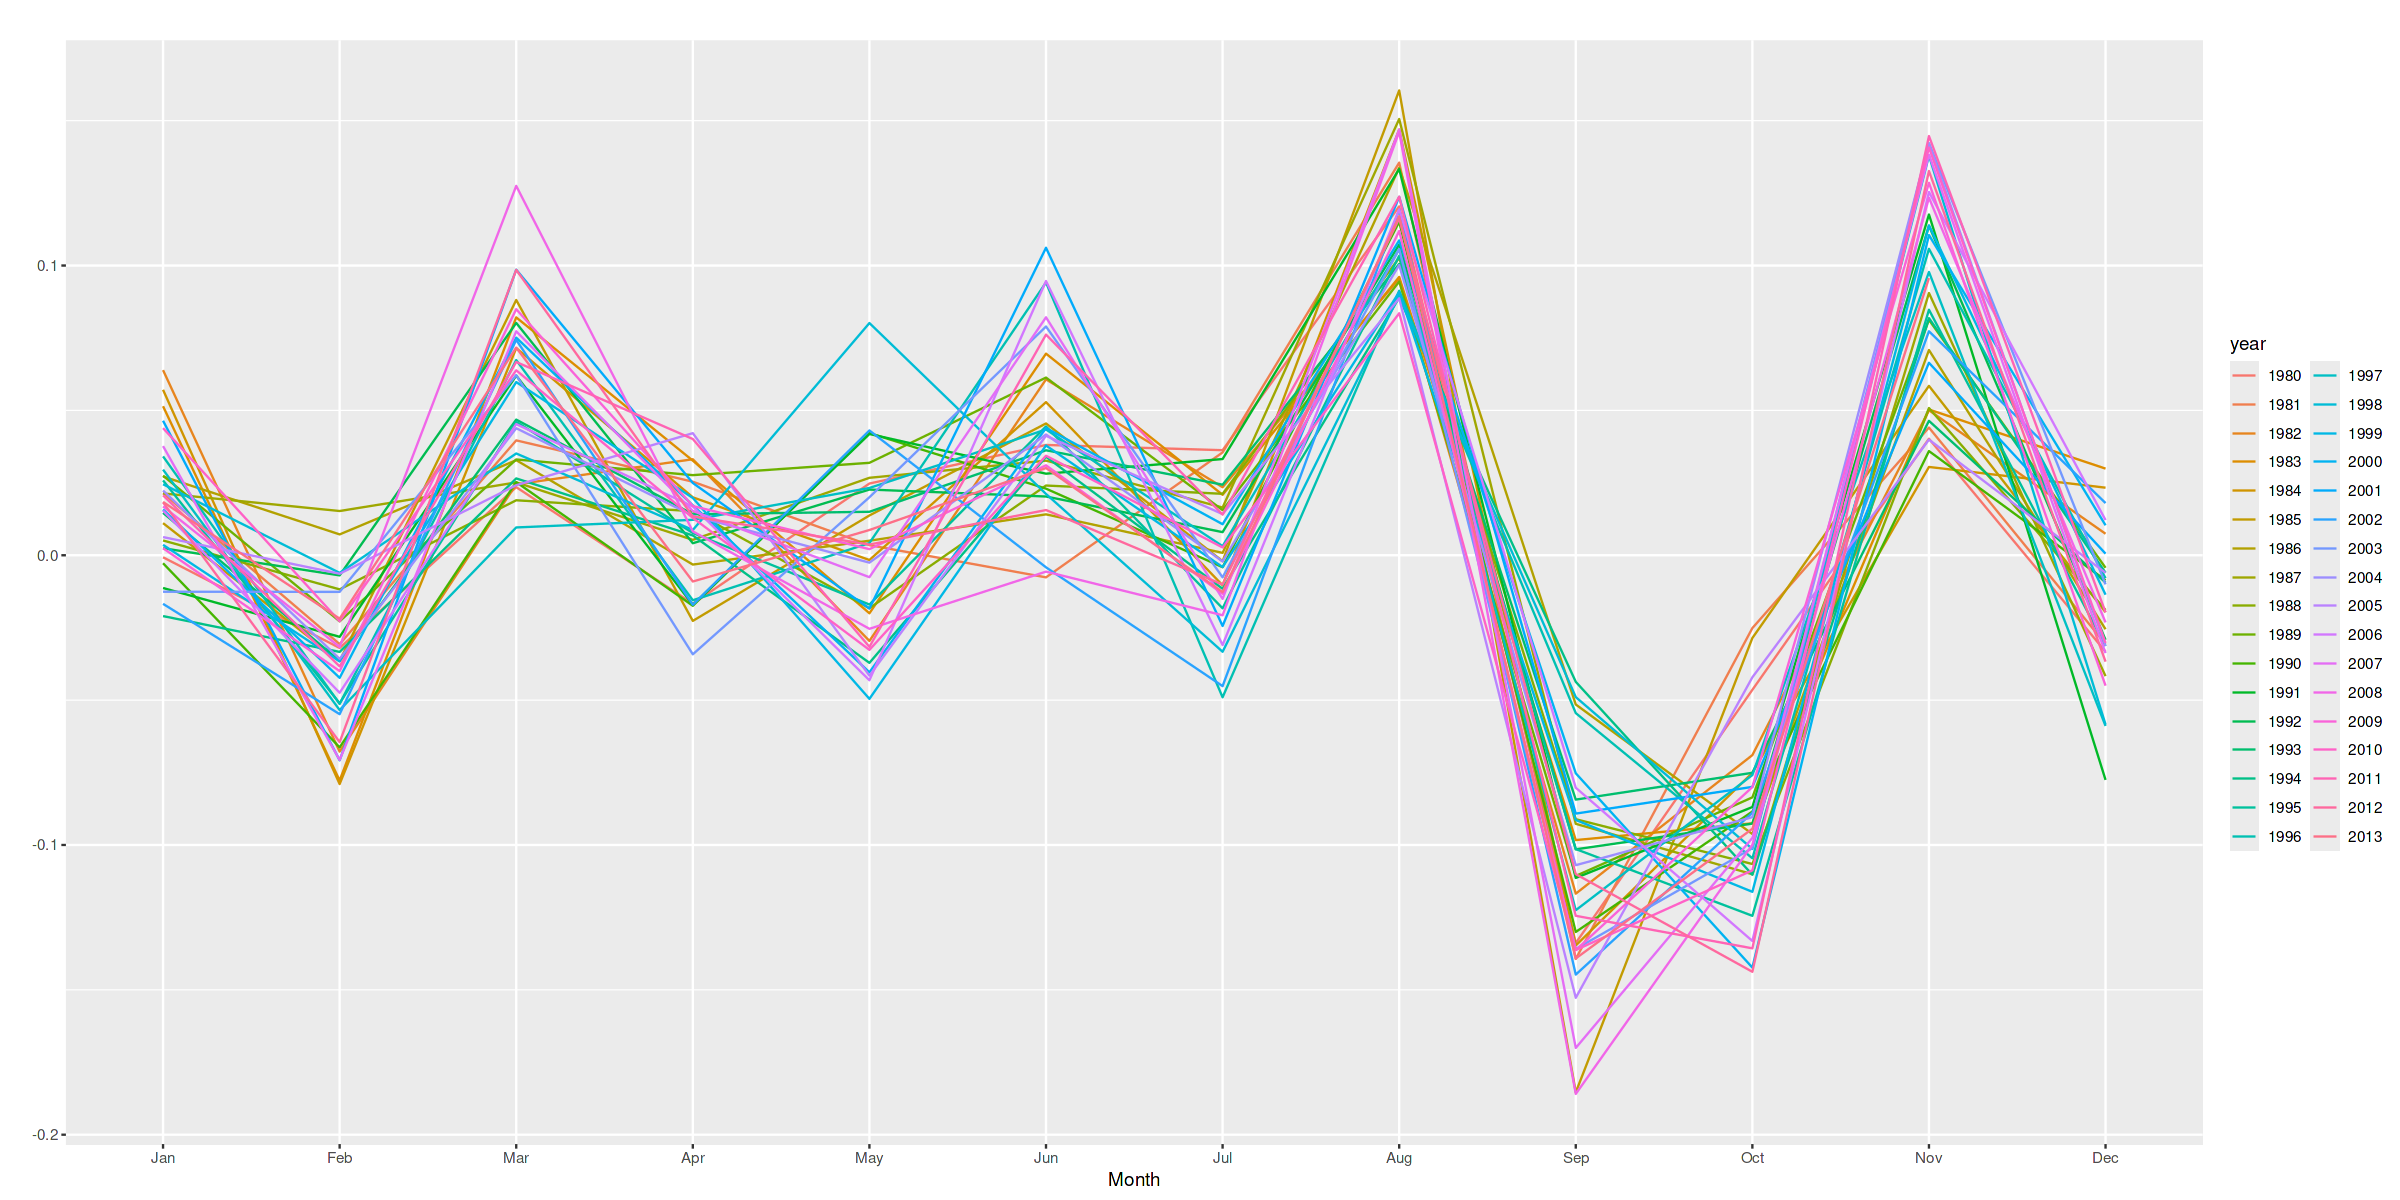

In [17]:
Wt.1 <- ts(Wt.1, start = c(1980, 1), frequency = 12)
ggseasonplot(Wt.1, main=" ")
#Seasonal plot of the first difference of X.tilde

ACF of the transformed series $\{W_t\}$


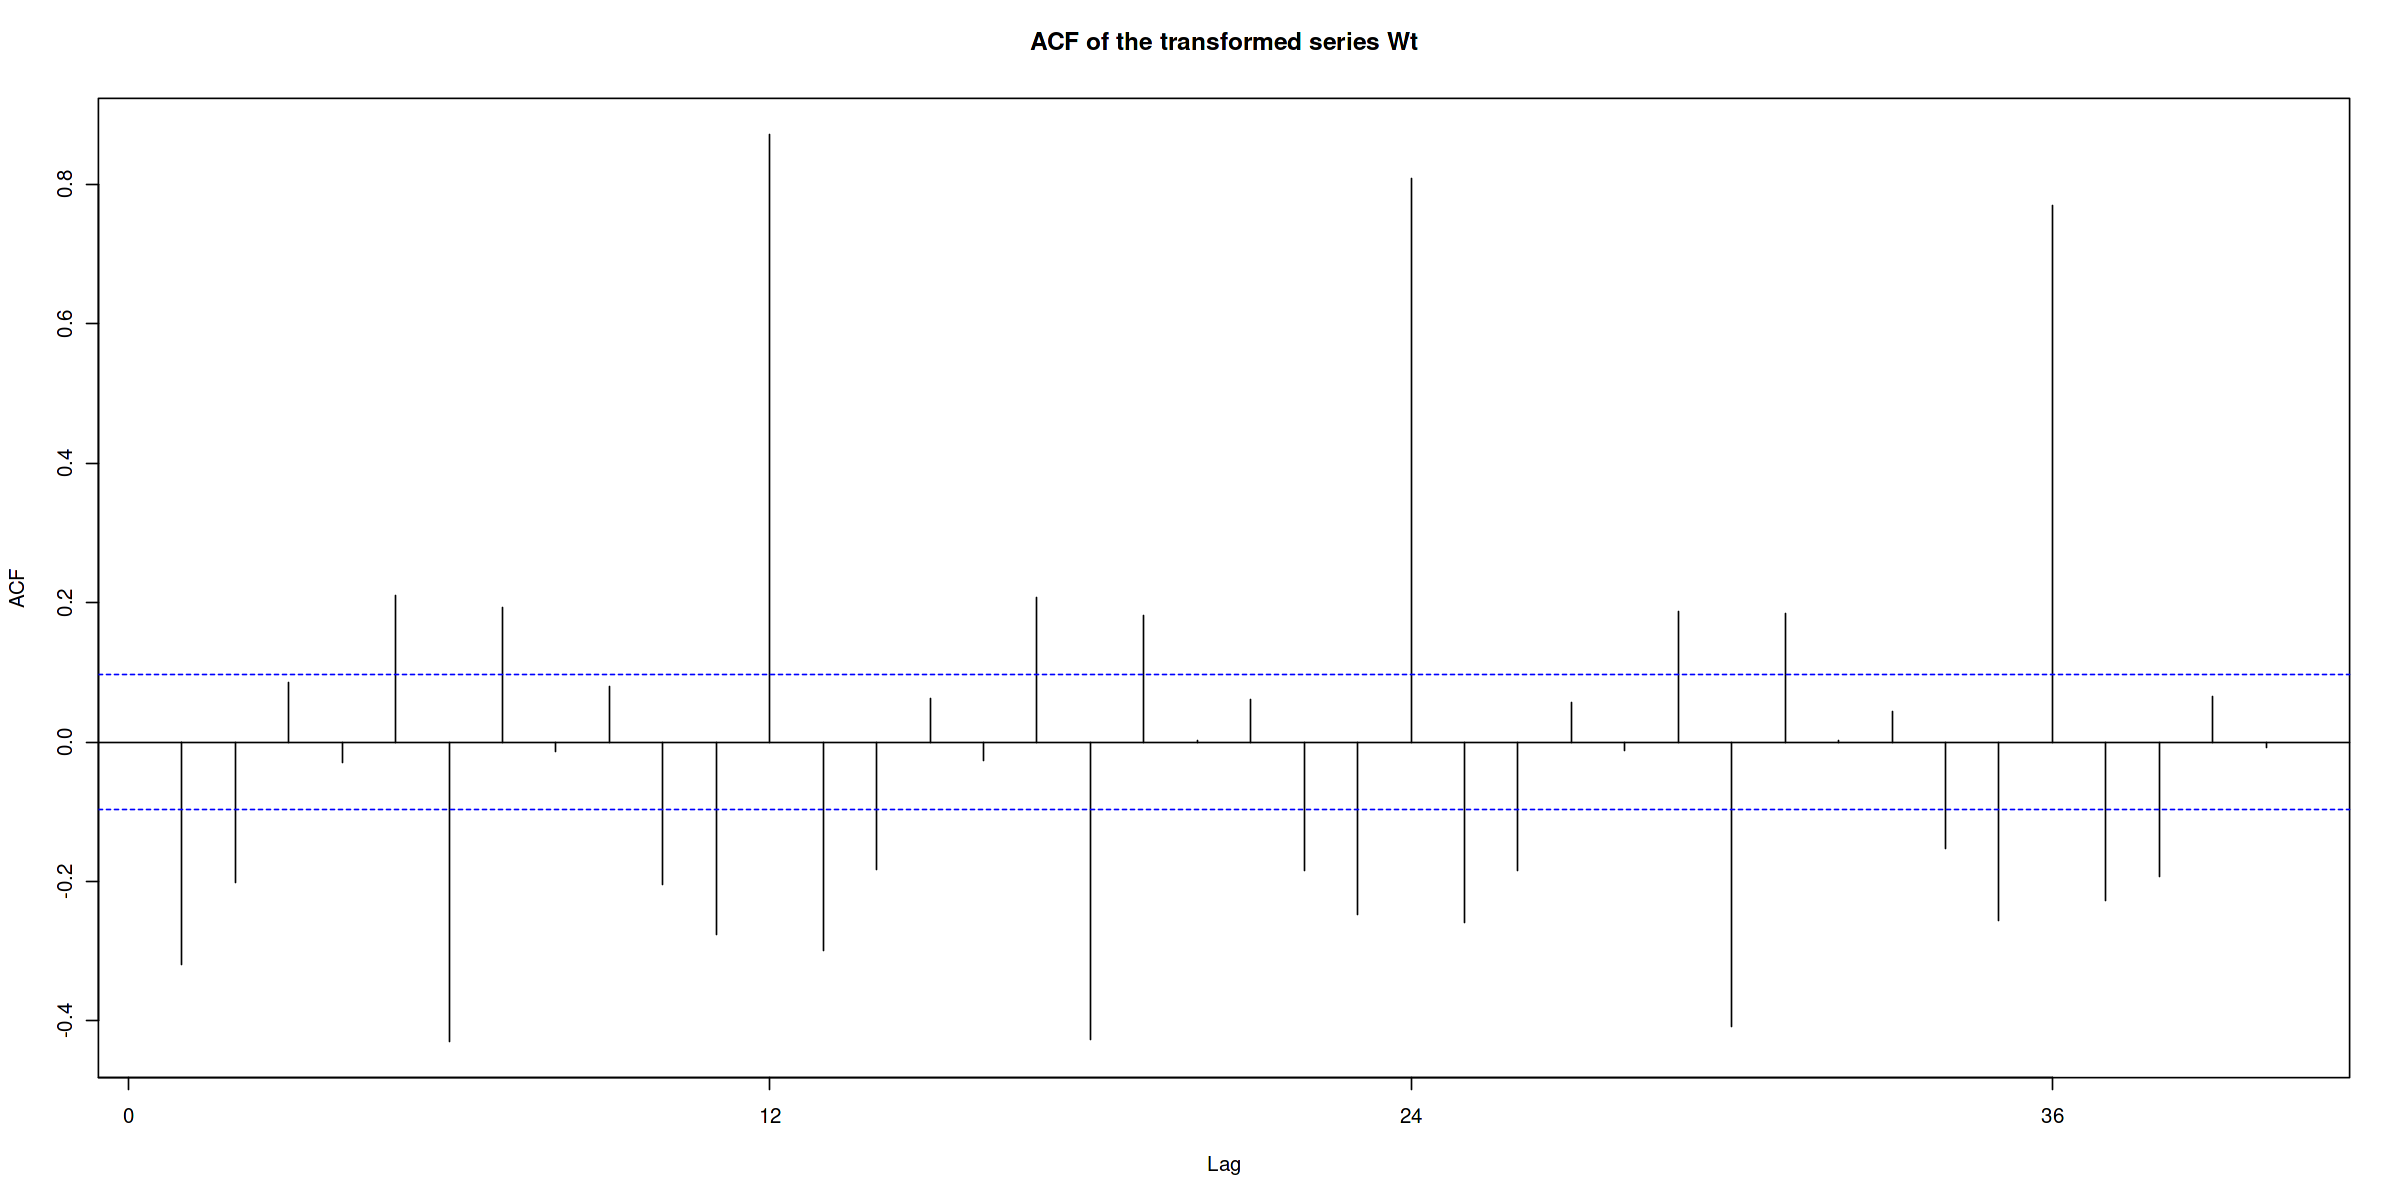

In [18]:
Acf(Wt.1,40, main="ACF of the transformed series Wt",xlab="Lag",ylab="ACF")

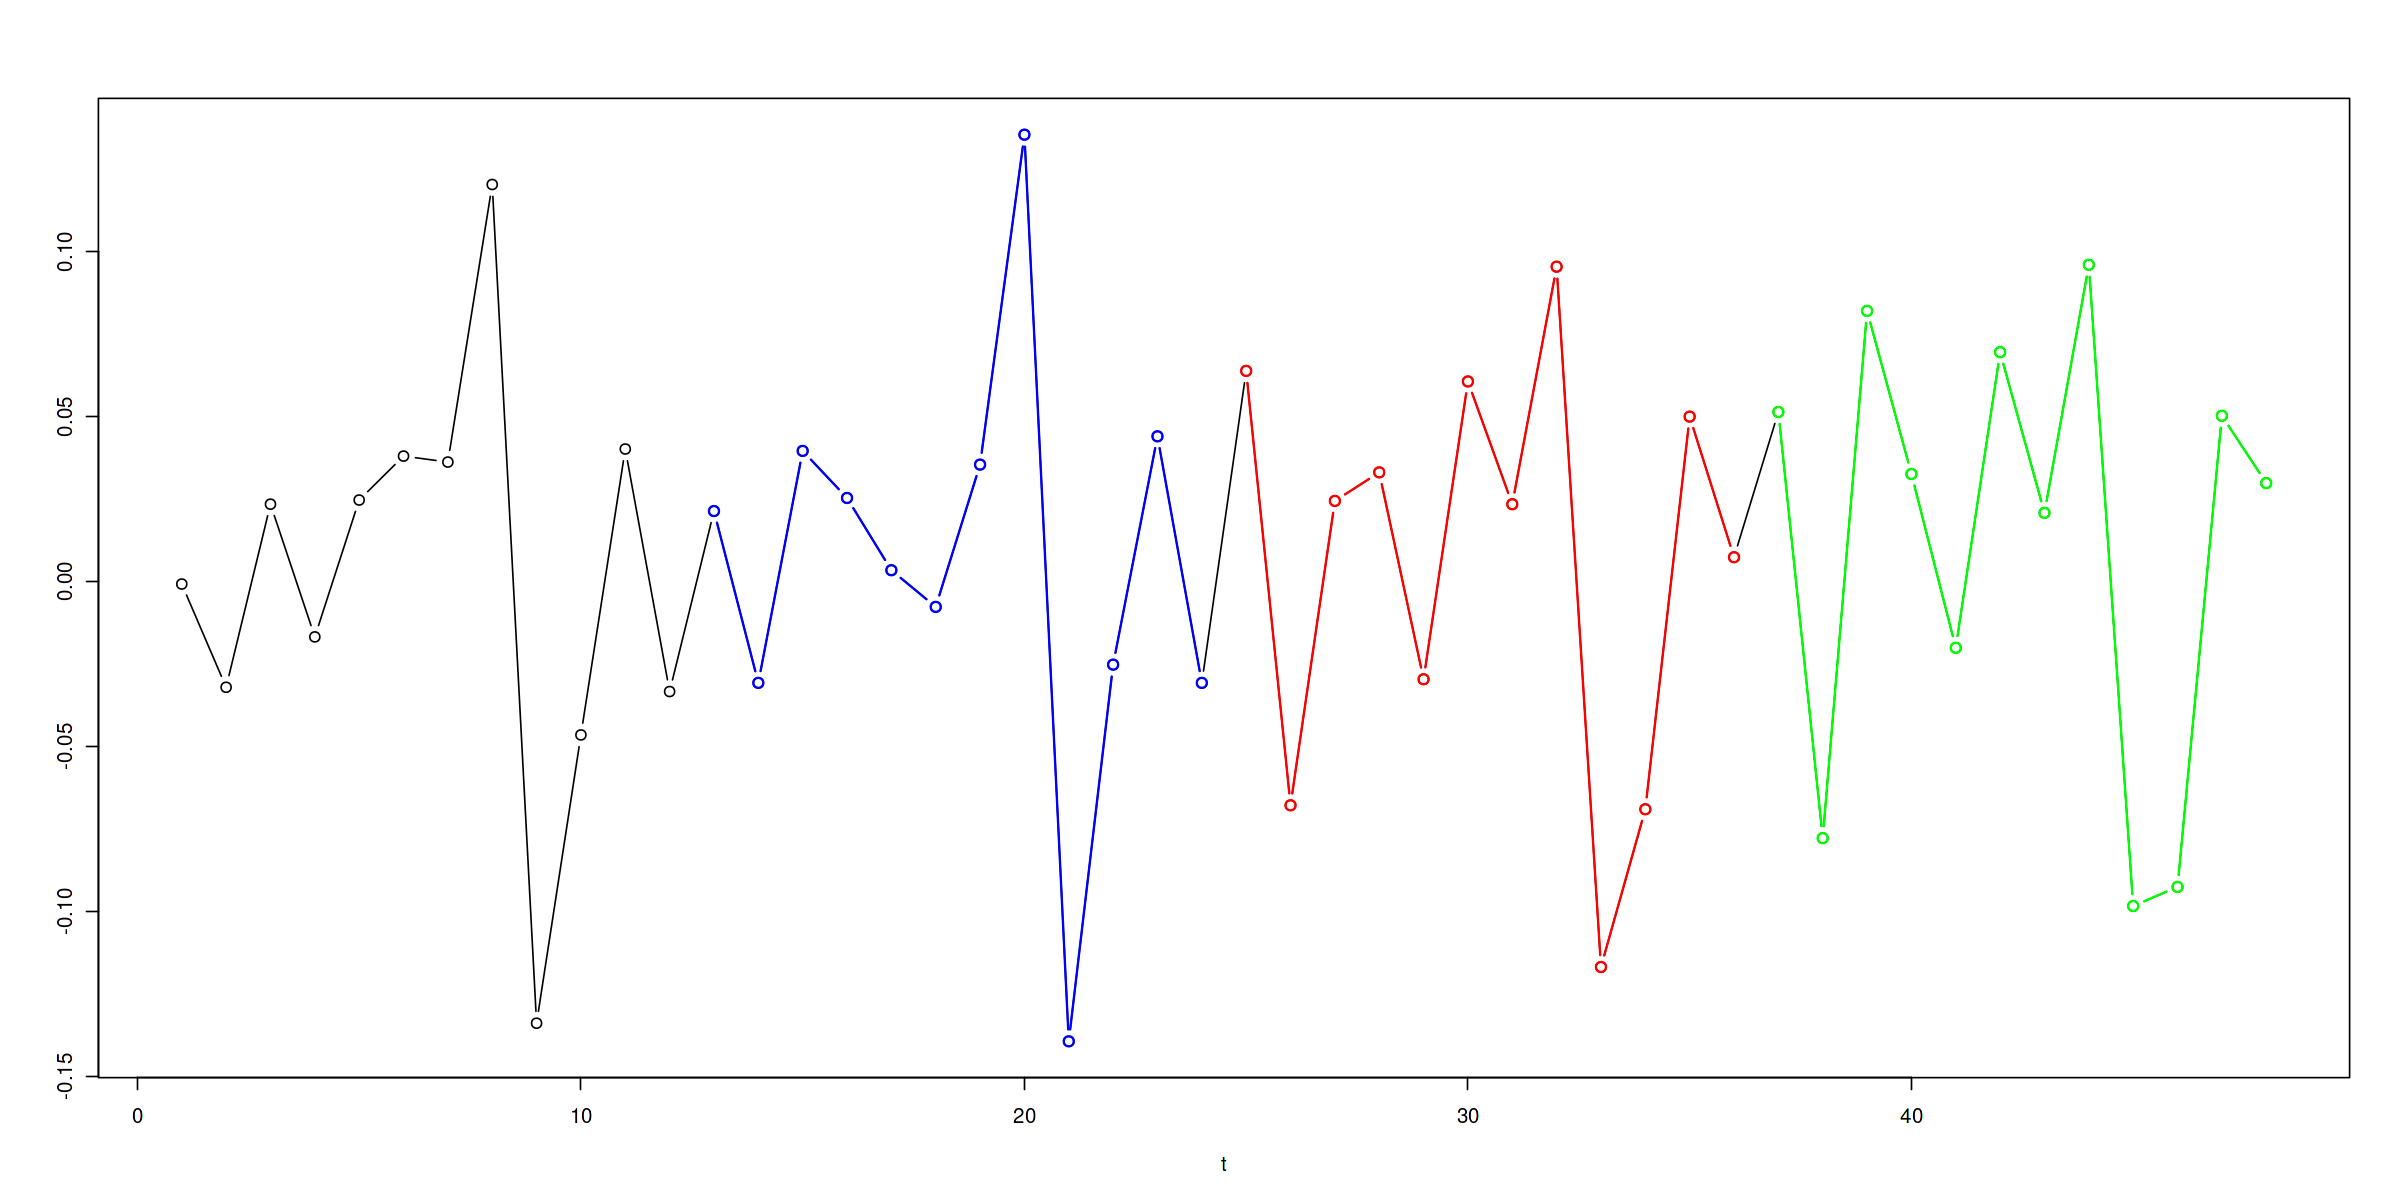

In [19]:
ts.plot(Wt.1[1:48],xlab="t", ylab="",main="",type="b")  
points(seq(13,24),Wt.1[13:24],type="b",col="blue",lwd=1.4)
points(seq(25,36),Wt.1[25:36],type="b",col="red",lwd=1.4)
points(seq(37,48),Wt.1[37:48],type="b",col="green",lwd=1.4)

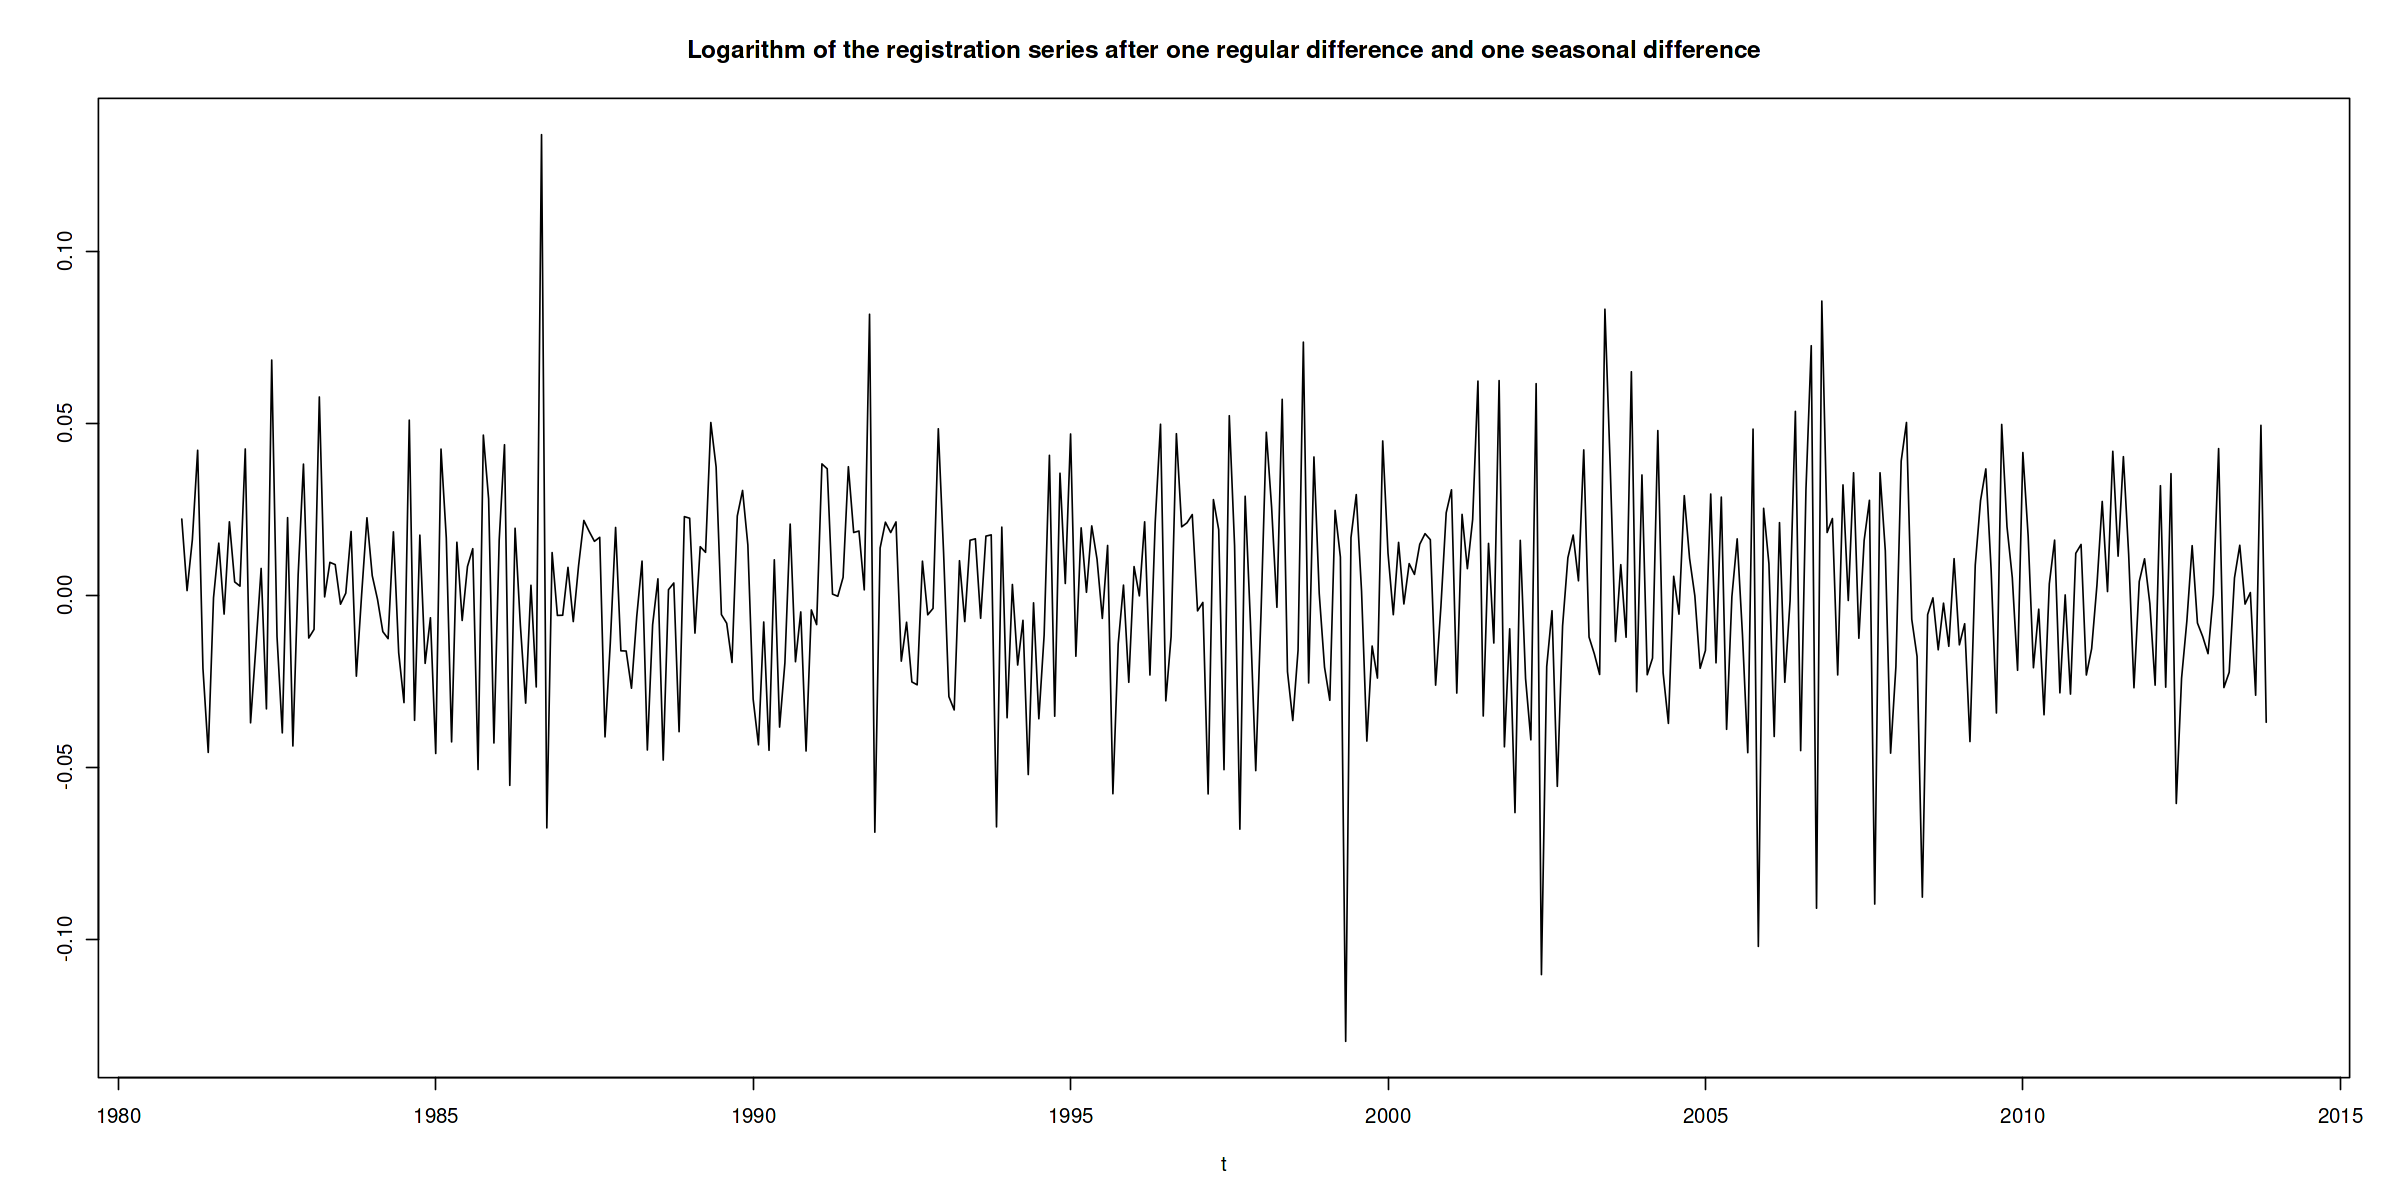

In [20]:
Wt.2=diff(Wt.1, lag=12,differences=1)
#Let s = 12, let's check.
ts.plot(Wt.2,xlab="t", ylab="",main="Logarithm of the registration series after one regular difference and one seasonal difference",type="l") 

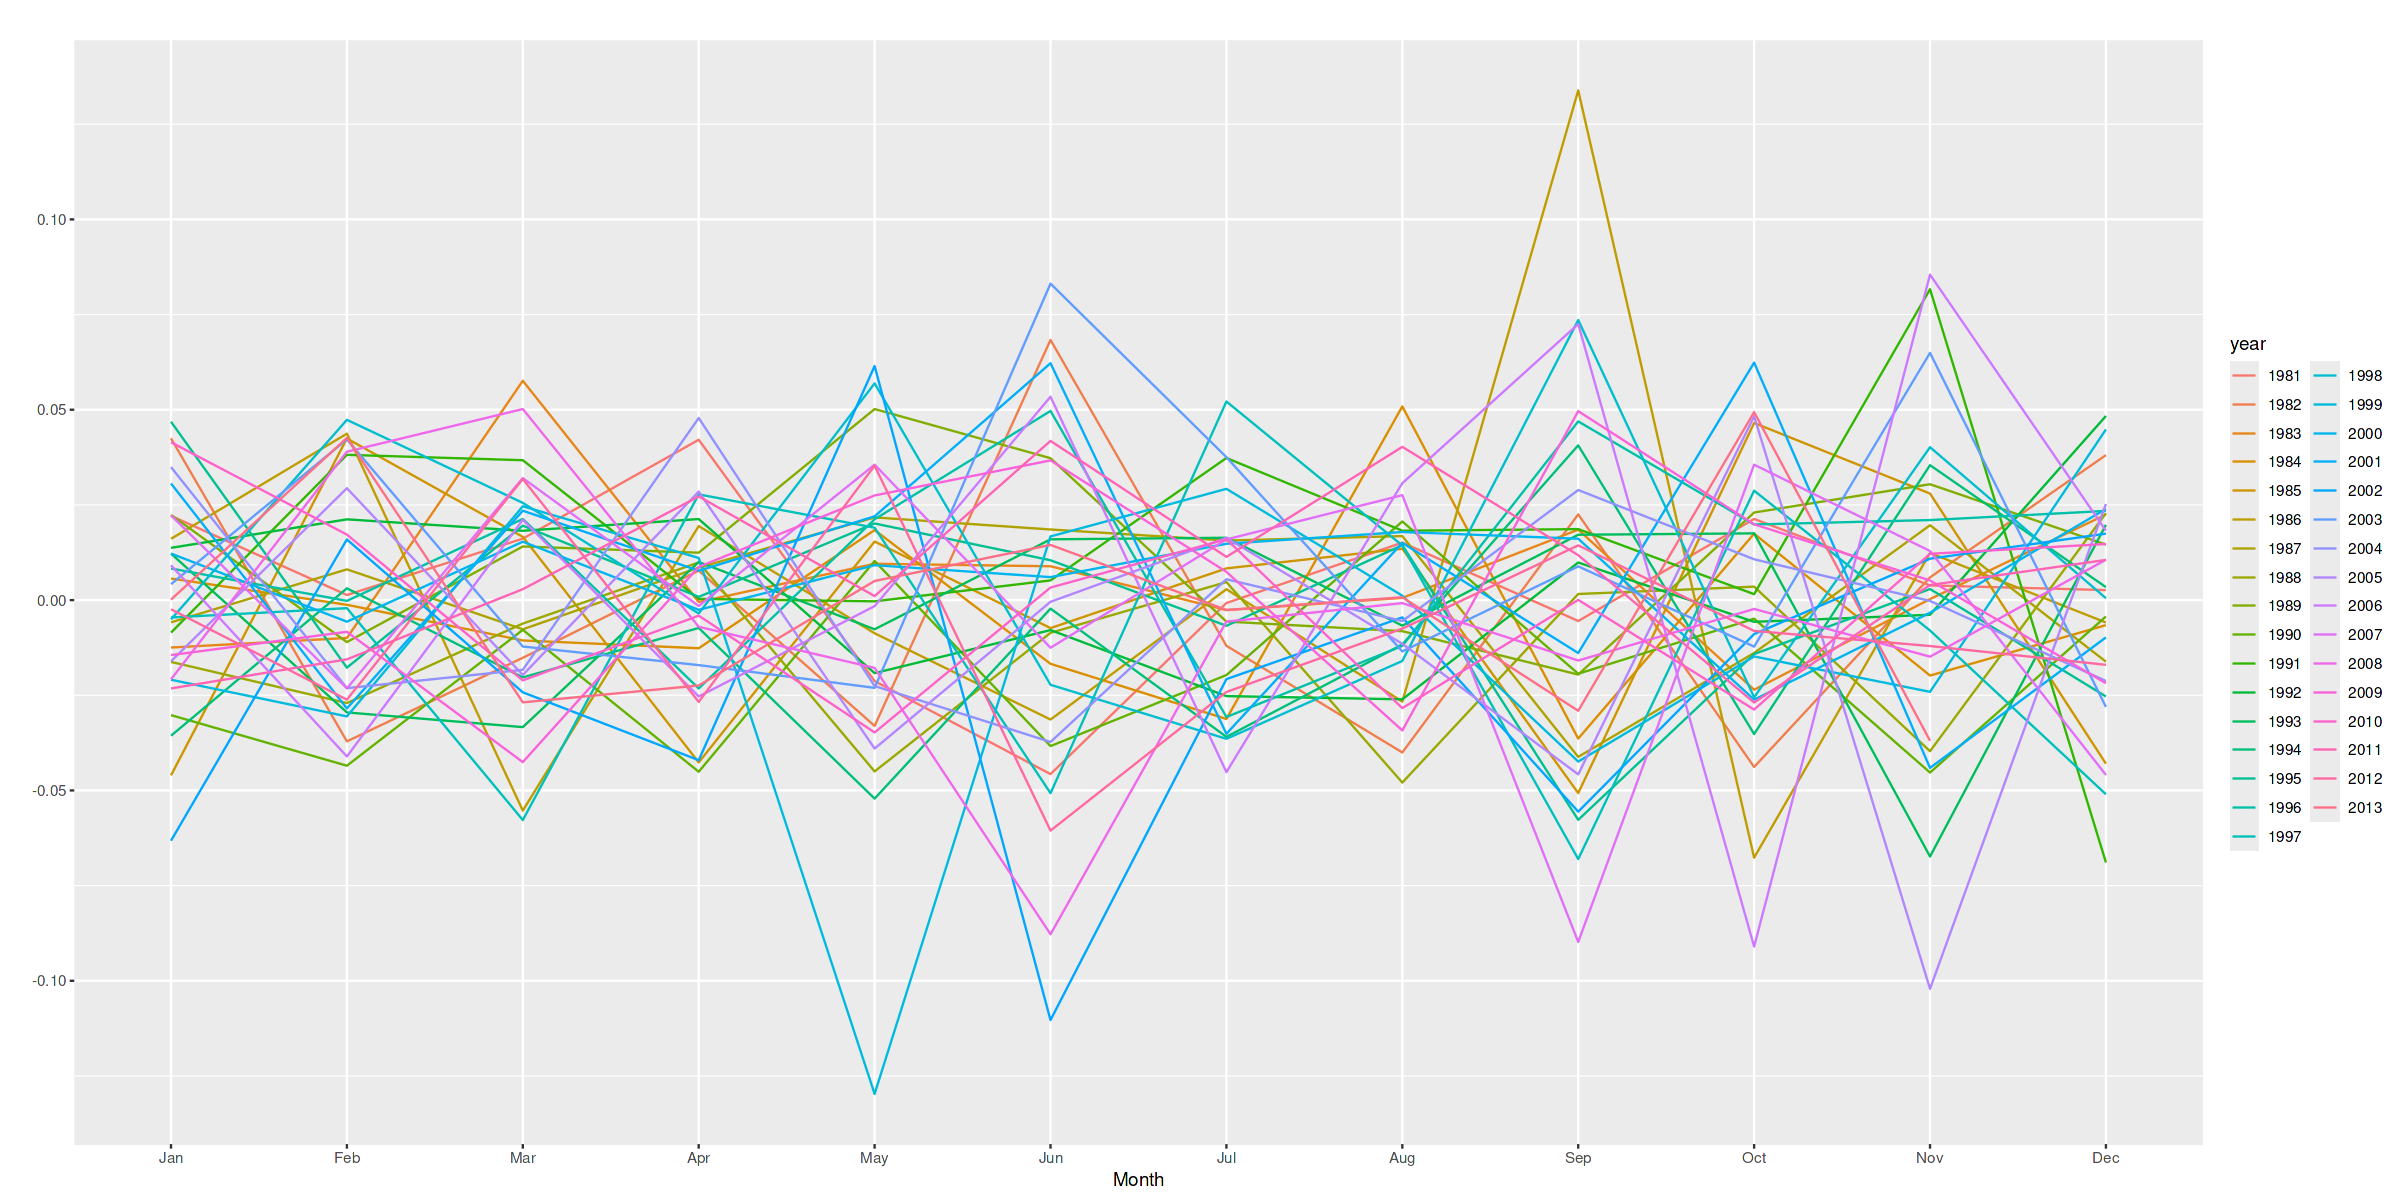

In [21]:
ggseasonplot(Wt.2, main=" ")

#### **Identification**



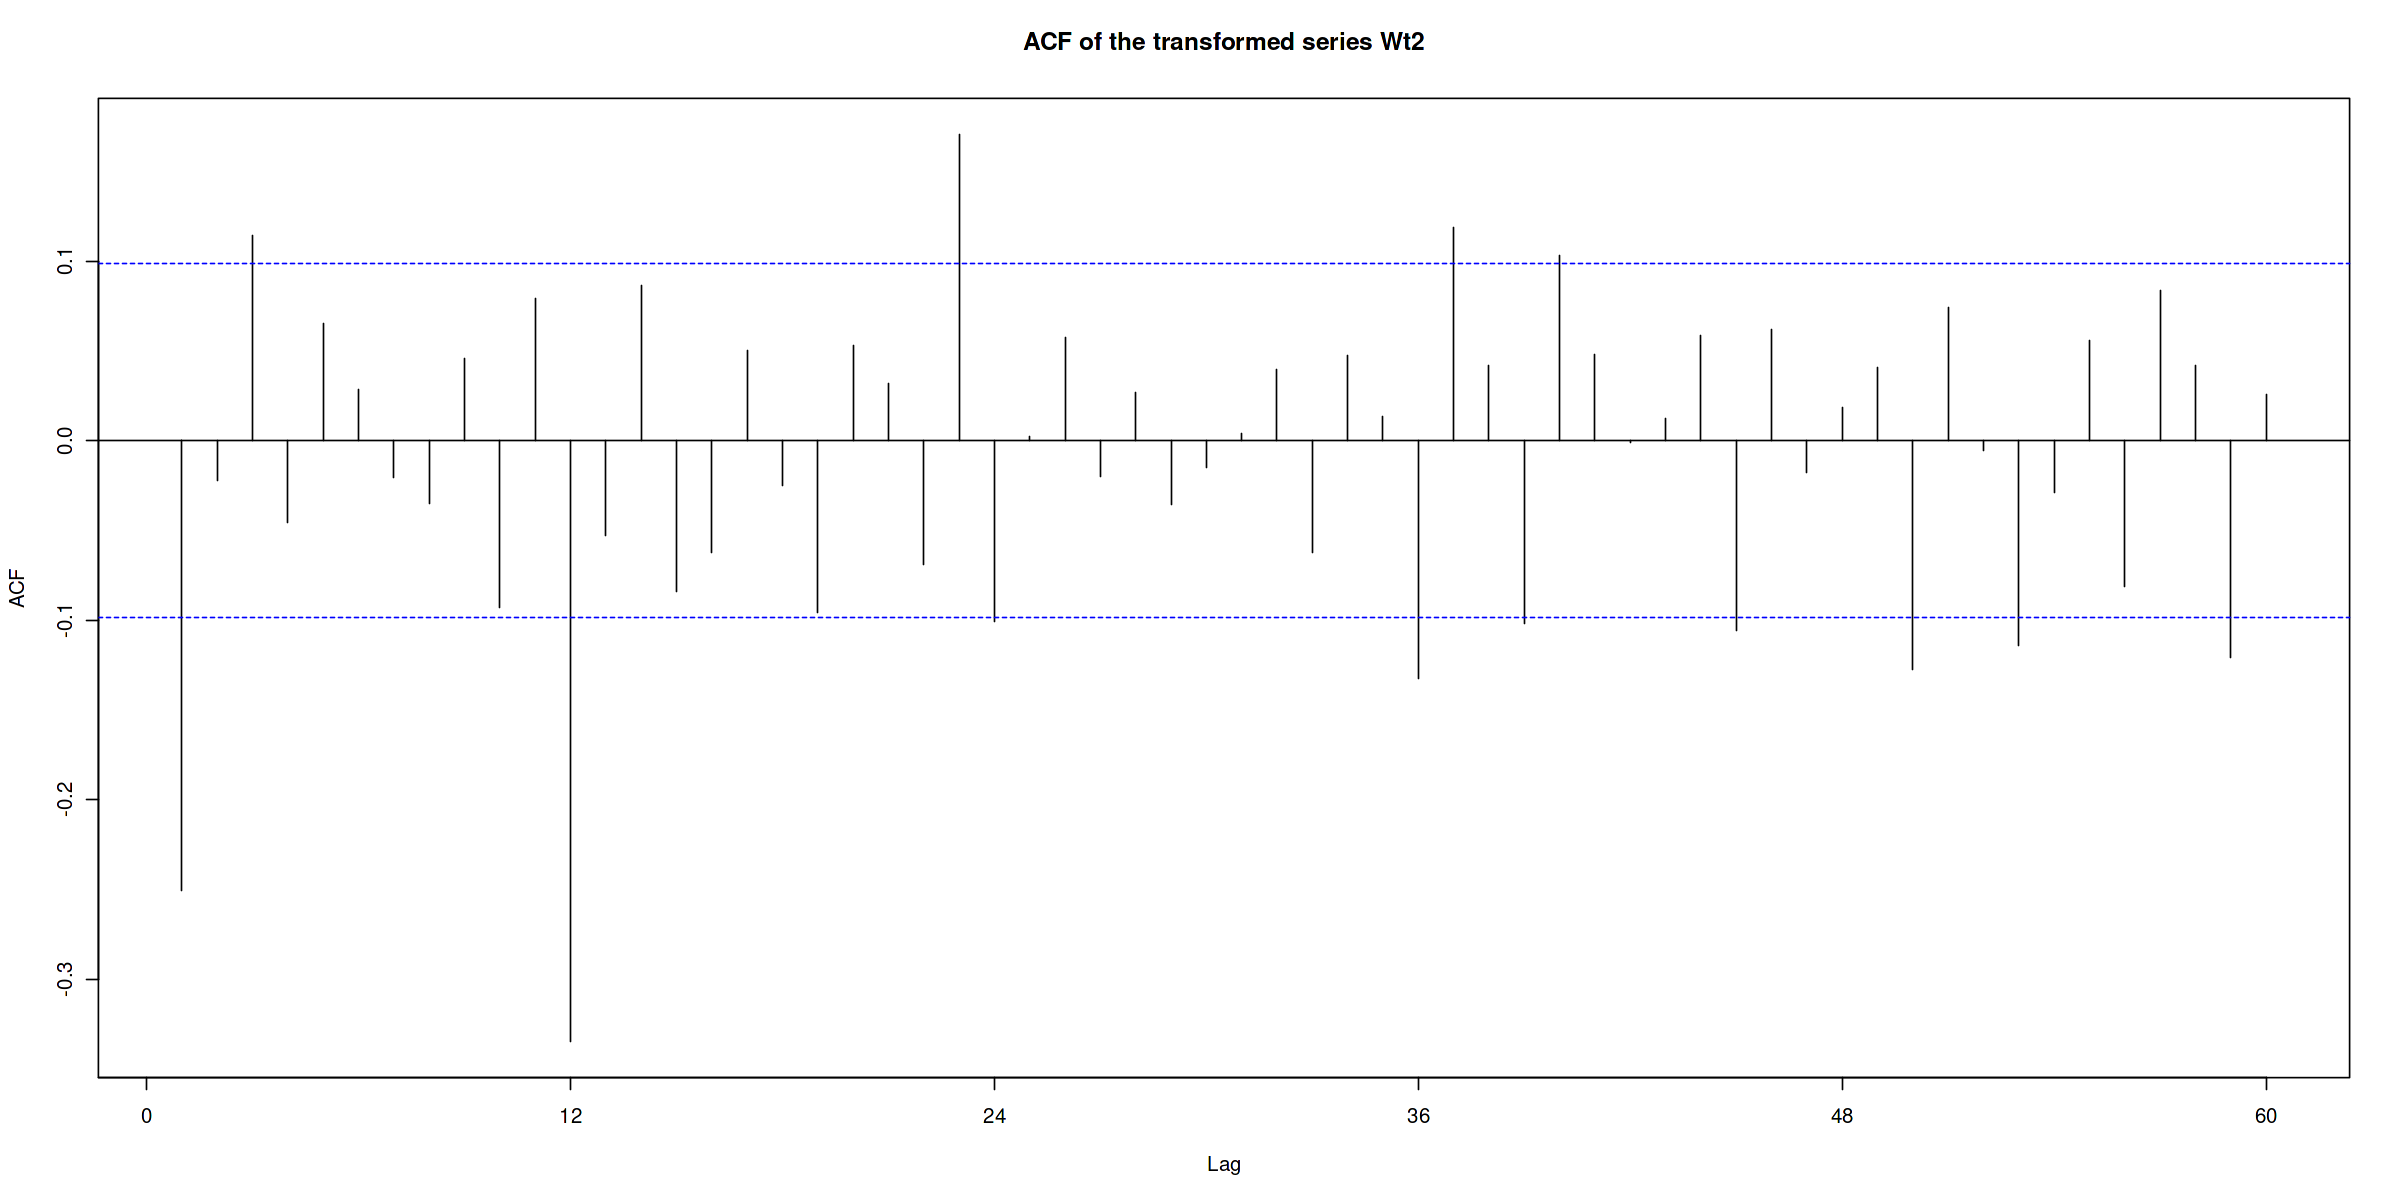

In [22]:
Acf(Wt.2,60, main="ACF of the transformed series Wt2",xlab="Lag",ylab="ACF")

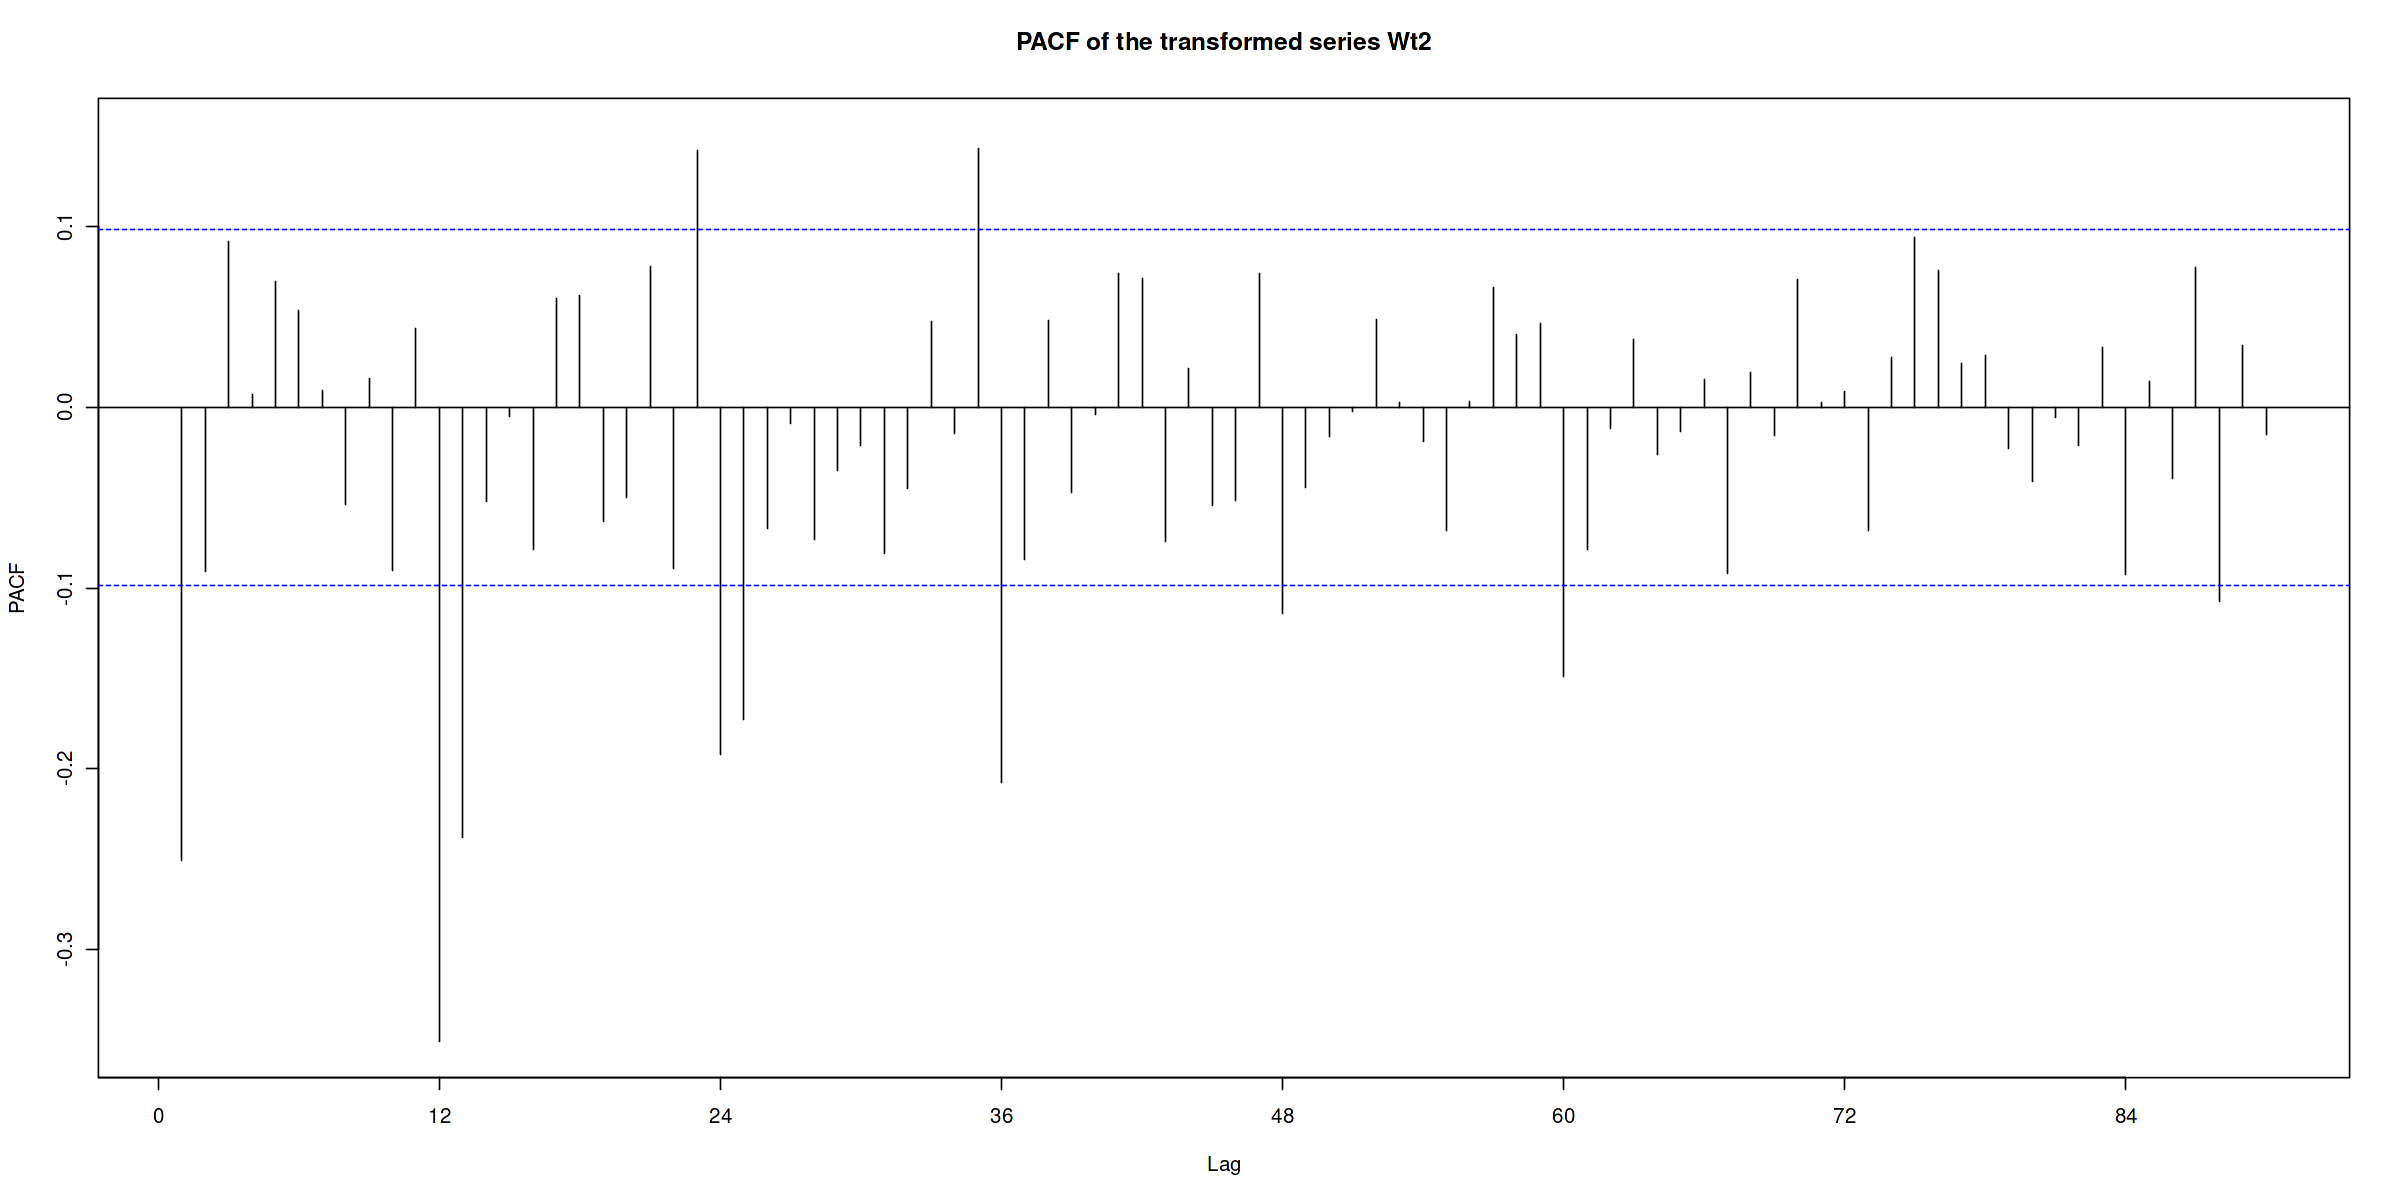

In [23]:
Pacf(Wt.2,90, main="PACF of the transformed series Wt2",xlab="Lag",ylab="PACF")

<span style='font-size:large'>**Regular component**</span>

|------------------------|---------------------------------|------------------------------------|----------------------------------|-------------------------------------|

| Candidate model | Evidence first lags ACF | Evidence interaction ACF | Evidence first lags PACF | Evidence interaction PACF |

|------------------------|---------------------------------|------------------------------------|----------------------------------|-------------------------------------|

| AR(1) $\hspace{13.5mm}$ | Medium $\hspace{19mm}$ | Medium $\hspace{22mm}$ | Strong $\hspace{22mm}$ | Strong $\hspace{25mm}$ |

| MA(1) $\hspace{13mm}$ | Strong $\hspace{21mm}$ | Medium $\hspace{22mm}$ | Medium $\hspace{20mm}$ | Weak / Medium $\hspace{13.5mm}$ |

| AR\(2\) $\hspace{13.5mm}$ | Medium $\hspace{19mm}$ | Medium $\hspace{22mm}$ | Medium $\hspace{20.5mm}$ | Weak / Medium $\hspace{13mm}$ |

| AR(3) $\hspace{13.5mm}$ | Medium $\hspace{19mm}$ | Medium $\hspace{22mm}$ | Strong $\hspace{22mm}$ | Weak / Medium $\hspace{13mm}$ |

| ARMA(1,1) $\hspace{7mm}$ | Medium $\hspace{19mm}$ | Medium $\hspace{22mm}$ | Medium / Strong $\hspace{9mm}$ | Medium / Strong $\hspace{12mm}$ |

|------------------------|---------------------------------|------------------------------------|----------------------------------|-------------------------------------|



<span style='font-size:large'>**Seasonal component**</span>

Candidate models from ACF:

- MA(1): Medium

- MA(3): Strong

- ARMA(1,1): Medium

- ARMA(1,3): Medium / Strong

Candidate models from PACF:

- MA(1): Medium / Strong

- MA(3): Medium / Strong

- ARMA(1,1): Medium / Strong

- ARMA(1,3): Medium / Strong

<span style='font-size:medium'>**Models for**</span><span style='font-size:medium'> </span>$\{\tilde W_{t}\}$<span style='font-size:medium'> </span><span style='font-size:medium'>**supported by strong evidence:**</span>

- ARMA$(0,3)_{12} \times (1,0)$

- ARMA$(0,3)_{12} \times (3,0)$

- ARMA$(0,3)_{12} \times (1,1)$

- ARMA$(1,3)_{12} \times (1,0)$

- ARMA$(1,3)_{12} \times (3,0)$

- ARMA$(1,3)_{12} \times (1,1)$



**Models for** $\{X_{t}\}$ **supported by strong evidence:**

- $M_1$: ARIMA$(0,1,3)_{12} \times (1,1,0)$

- $M_2$: ARIMA$(0,1,3)_{12} \times (3,1,0)$

- $M_3$: ARIMA$(0,1,3)_{12} \times (1,1,1)$

- $M_4$: ARIMA$(1,1,3)_{12} \times (1,1,0)$

- $M_5$: ARIMA$(1,1,3)_{12} \times (3,1,0)$

- $M_6$: ARIMA$(1,1,3)_{12} \times (1,1,1)$



**Number of parameters of each model: $P+Q+p+q+1$**

- $M_1$: $0+3+1+0+1 = 5$

- $M_2$: $0+3+3+0+1 = 7$

- $M_3$: $0+3+1+1+1 = 6$

- $M_4$: $1+3+1+0+1 = 6$

- $M_5$: $1+3+3+0+1 = 8$

- $M_6$: $1+3+1+1+1 = 7$

#### **Maximum Likelihood estimation**



In [24]:
mod1=Arima(expenditure,order=c(1,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)
mod2=Arima(expenditure,order=c(3,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)
mod3=Arima(expenditure,order=c(1,1,1),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)
mod4=Arima(expenditure,order=c(1,1,0),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)
mod5=Arima(expenditure,order=c(3,1,0),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)
mod6=Arima(expenditure,order=c(1,1,1),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)

### **Model selection**

Value of the AIC and BIC criterion

In [4]:
AIC.BIC=rbind(c(mod1$"aic",mod1$"aicc",mod1$"bic"),
              c(mod2$"aic",mod2$"aicc",mod2$"bic"),
              c(mod3$"aic",mod3$"aicc",mod3$"bic"),
              c(mod4$"aic",mod4$"aicc",mod4$"bic"),
              c(mod5$"aic",mod5$"aicc",mod5$"bic"),
              c(mod6$"aic",mod6$"aicc",mod6$"bic"))
dimnames(AIC.BIC)=list(c("Model 1","Model 2", "Model 3","Model 4","Model 5", "Model 6"),c("AIC","AICc","BIC"))
AIC.BIC

ERROR: Error in eval(expr, envir, enclos): object 'mod1' not found


The best model in terms of AIC is model 5.

The best model in terms of BIC is model 1.

The second best model (both in terms of AIC and BIC) is model 2.

Cross-validation: MAE and MSE

In [25]:
n.min=200  # minimal sample size required to estimate a model
n.data=length(expenditure)
MSE.vec1=numeric(n.data-n.min) # Mean Squared Error model 1
MAE.vec1=numeric(n.data-n.min) # Mean Absolute Error model 1
MSE.vec2=numeric(n.data-n.min) # Mean Squared Error model 2
MAE.vec2=numeric(n.data-n.min) # Mean Absolute Error model 2
MSE.vec3=numeric(n.data-n.min) # Mean Squared Error model 3
MAE.vec3=numeric(n.data-n.min) # Mean Absolute Error model 3
MSE.vec4=numeric(n.data-n.min) # Mean Squared Error model 4
MAE.vec4=numeric(n.data-n.min) # Mean Absolute Error model 4
MSE.vec5=numeric(n.data-n.min) # Mean Squared Error model 5
MAE.vec5=numeric(n.data-n.min) # Mean Absolute Error model 5
MSE.vec6=numeric(n.data-n.min) # Mean Squared Error model 6
MAE.vec6=numeric(n.data-n.min) # Mean Absolute Error model 6


for (k in 1:(n.data-n.min))
{
fit.mod1=Arima(expenditure[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)   
forcast.mod1 <- forecast(fit.mod1, h=1)[['mean']]
fit.mod2=Arima(expenditure[1:(n.min+k-1)],order=c(3,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)
forcast.mod2 <- forecast(fit.mod2, h=1)[['mean']]
fit.mod3=Arima(expenditure[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)
forcast.mod3 <- forecast(fit.mod3, h=1)[['mean']]
fit.mod4=Arima(expenditure[1:(n.min+k-1)],order=c(1,1,0),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)   
forcast.mod4 <- forecast(fit.mod4, h=1)[['mean']]
fit.mod5=Arima(expenditure[1:(n.min+k-1)],order=c(3,1,0),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)
forcast.mod5 <- forecast(fit.mod5, h=1)[['mean']]
fit.mod6=Arima(expenditure[1:(n.min+k-1)],order=c(1,1,1),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)
forcast.mod6 <- forecast(fit.mod6, h=1)[['mean']]
MSE.vec1[k]=(expenditure[(n.min+k)]-forcast.mod1)^2
MAE.vec1[k]=abs(expenditure[(n.min+k)]-forcast.mod1)
MSE.vec2[k]=(expenditure[(n.min+k)]-forcast.mod2)^2
MAE.vec2[k]=abs(expenditure[(n.min+k)]-forcast.mod2)
MSE.vec3[k]=(expenditure[(n.min+k)]-forcast.mod3)^2
MAE.vec3[k]=abs(expenditure[(n.min+k)]-forcast.mod3)
MSE.vec4[k]=(expenditure[(n.min+k)]-forcast.mod4)^2
MAE.vec4[k]=abs(expenditure[(n.min+k)]-forcast.mod4)
MSE.vec5[k]=(expenditure[(n.min+k)]-forcast.mod5)^2
MAE.vec5[k]=abs(expenditure[(n.min+k)]-forcast.mod5)
MSE.vec6[k]=(expenditure[(n.min+k)]-forcast.mod6)^2
MAE.vec6[k]=abs(expenditure[(n.min+k)]-forcast.mod6)
}

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [1]


In [26]:
# Summary Results 
Results.mat=rbind(
                  apply(cbind(MSE.vec1,MSE.vec2,MSE.vec3,MSE.vec4,MSE.vec5,MSE.vec6)[-208,],2,mean),
                  apply(cbind(MAE.vec1,MAE.vec2,MAE.vec3,MAE.vec4,MAE.vec5,MAE.vec6)[-208,],2,mean)
)
dimnames(Results.mat)=list(c("MSE","MAE"),c("Model 1","Model 2","Model 3","Model 4","Model 5","Model 6"))

Results.mat

Model 1      Model 2      Model 3      Model 4      Model 5     
MSE 0.0003497877 0.0003433387 0.0003339444 0.0003391916 0.0003337607
MAE 0.0074344690 0.0074424819 0.0072785899 0.0072581143 0.0073414805
    Model 6     
MSE 0.0003239775
MAE 0.0071415472

The best model (both in terms of MAE and MSE) is model 6.

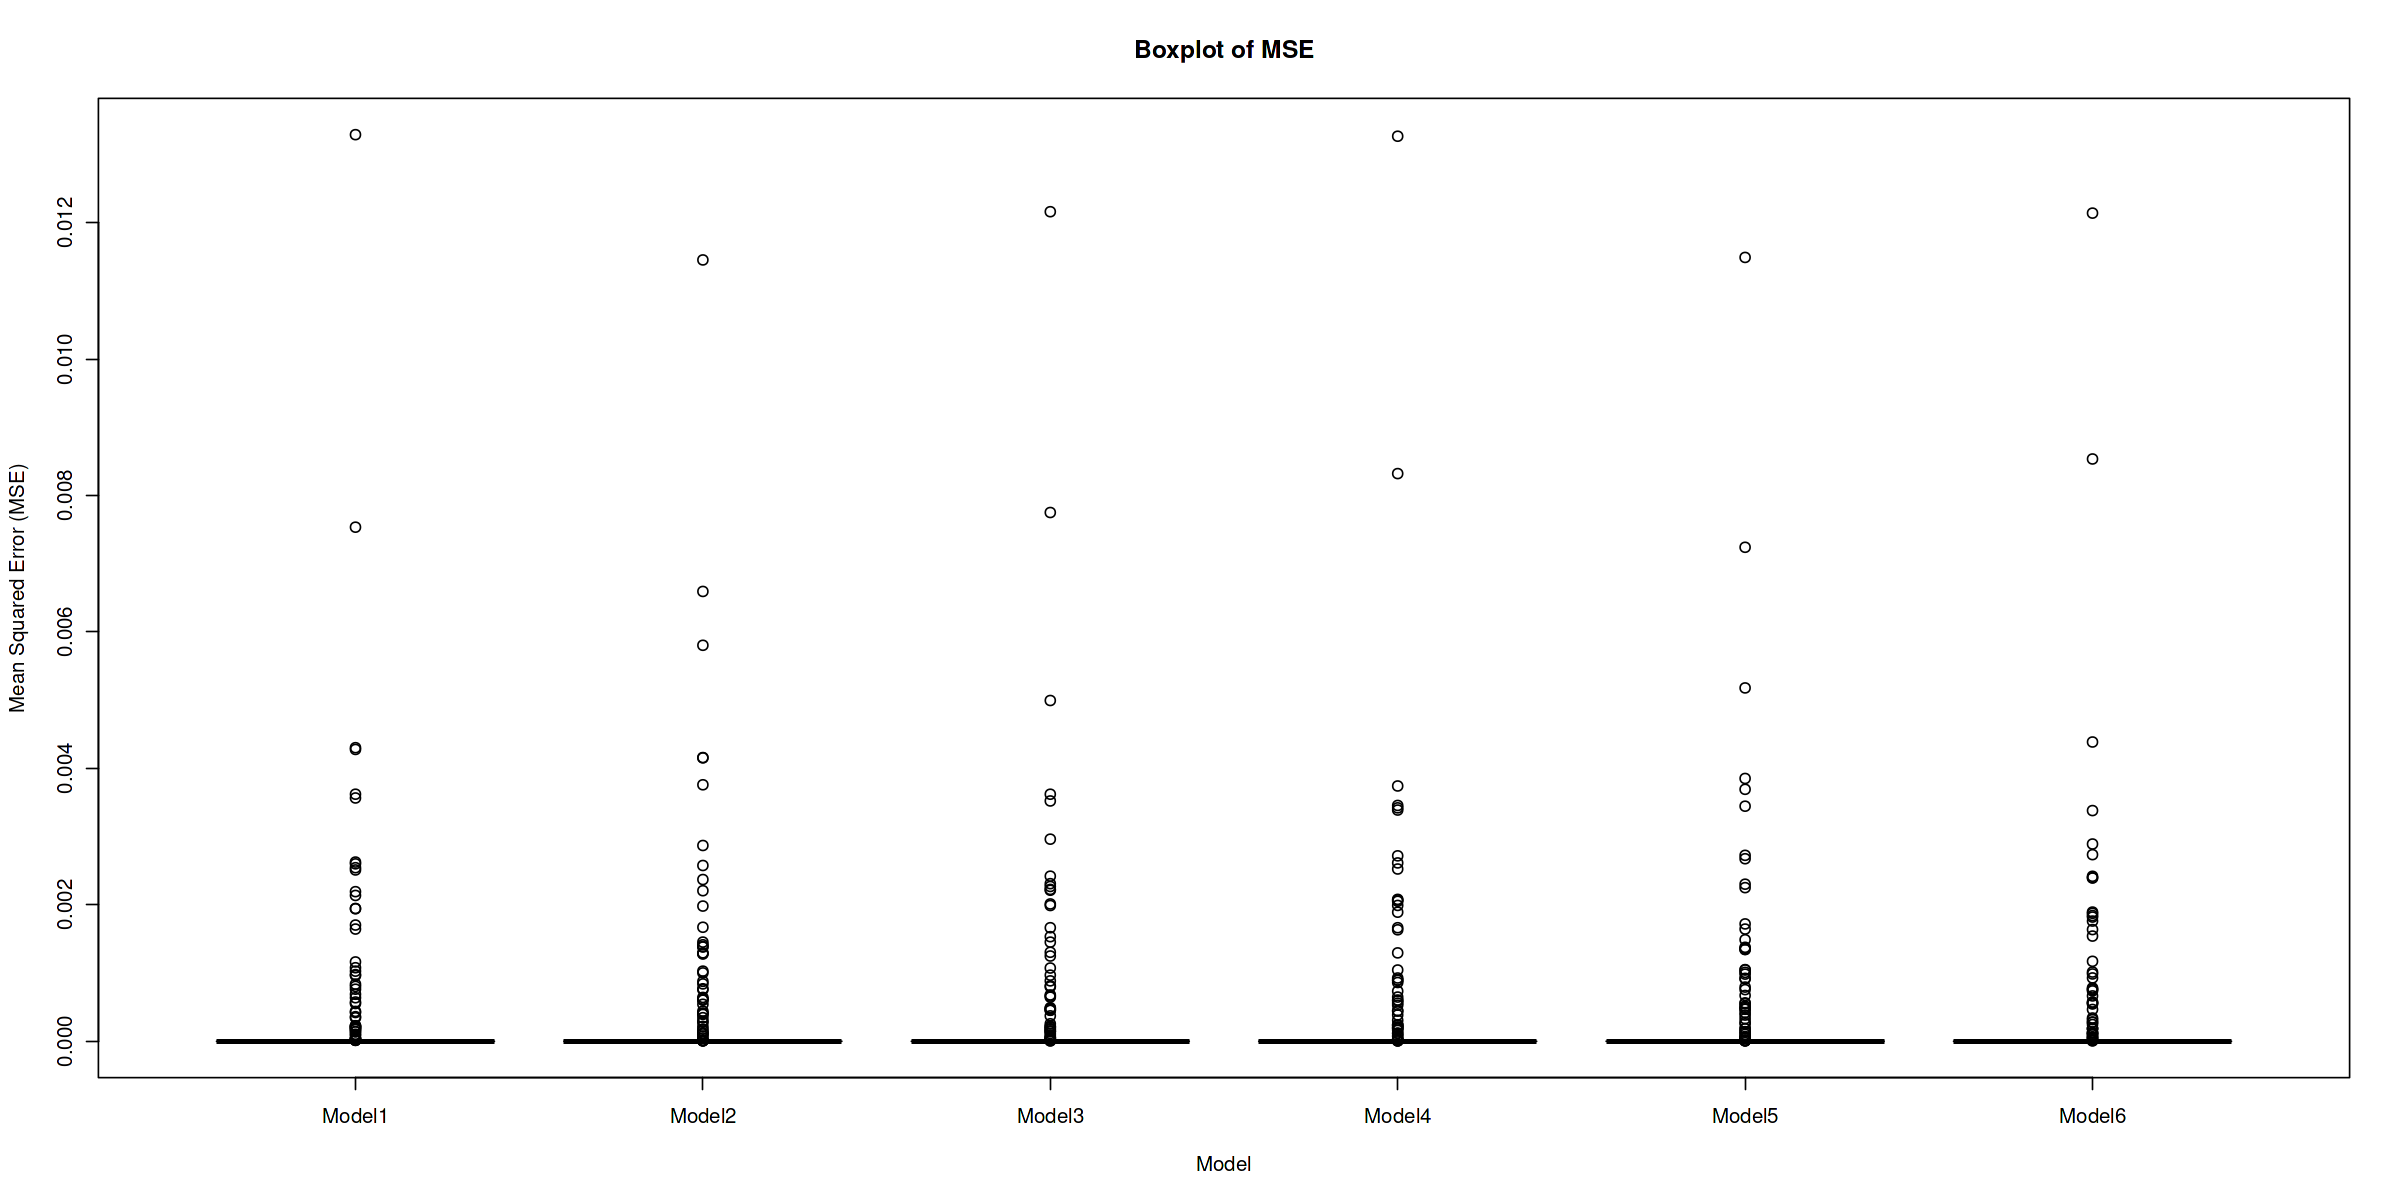

In [32]:
# Boxplot of variability of MSE

boxplot(list(Model1 = MSE.vec1, Model2 = MSE.vec2, Model3 = MSE.vec3, Model4 = MSE.vec4, Model5 = MSE.vec5, Model6 = MSE.vec6),
        main = "Boxplot of MSE", xlab = "Model", ylab = "Mean Squared Error (MSE)")

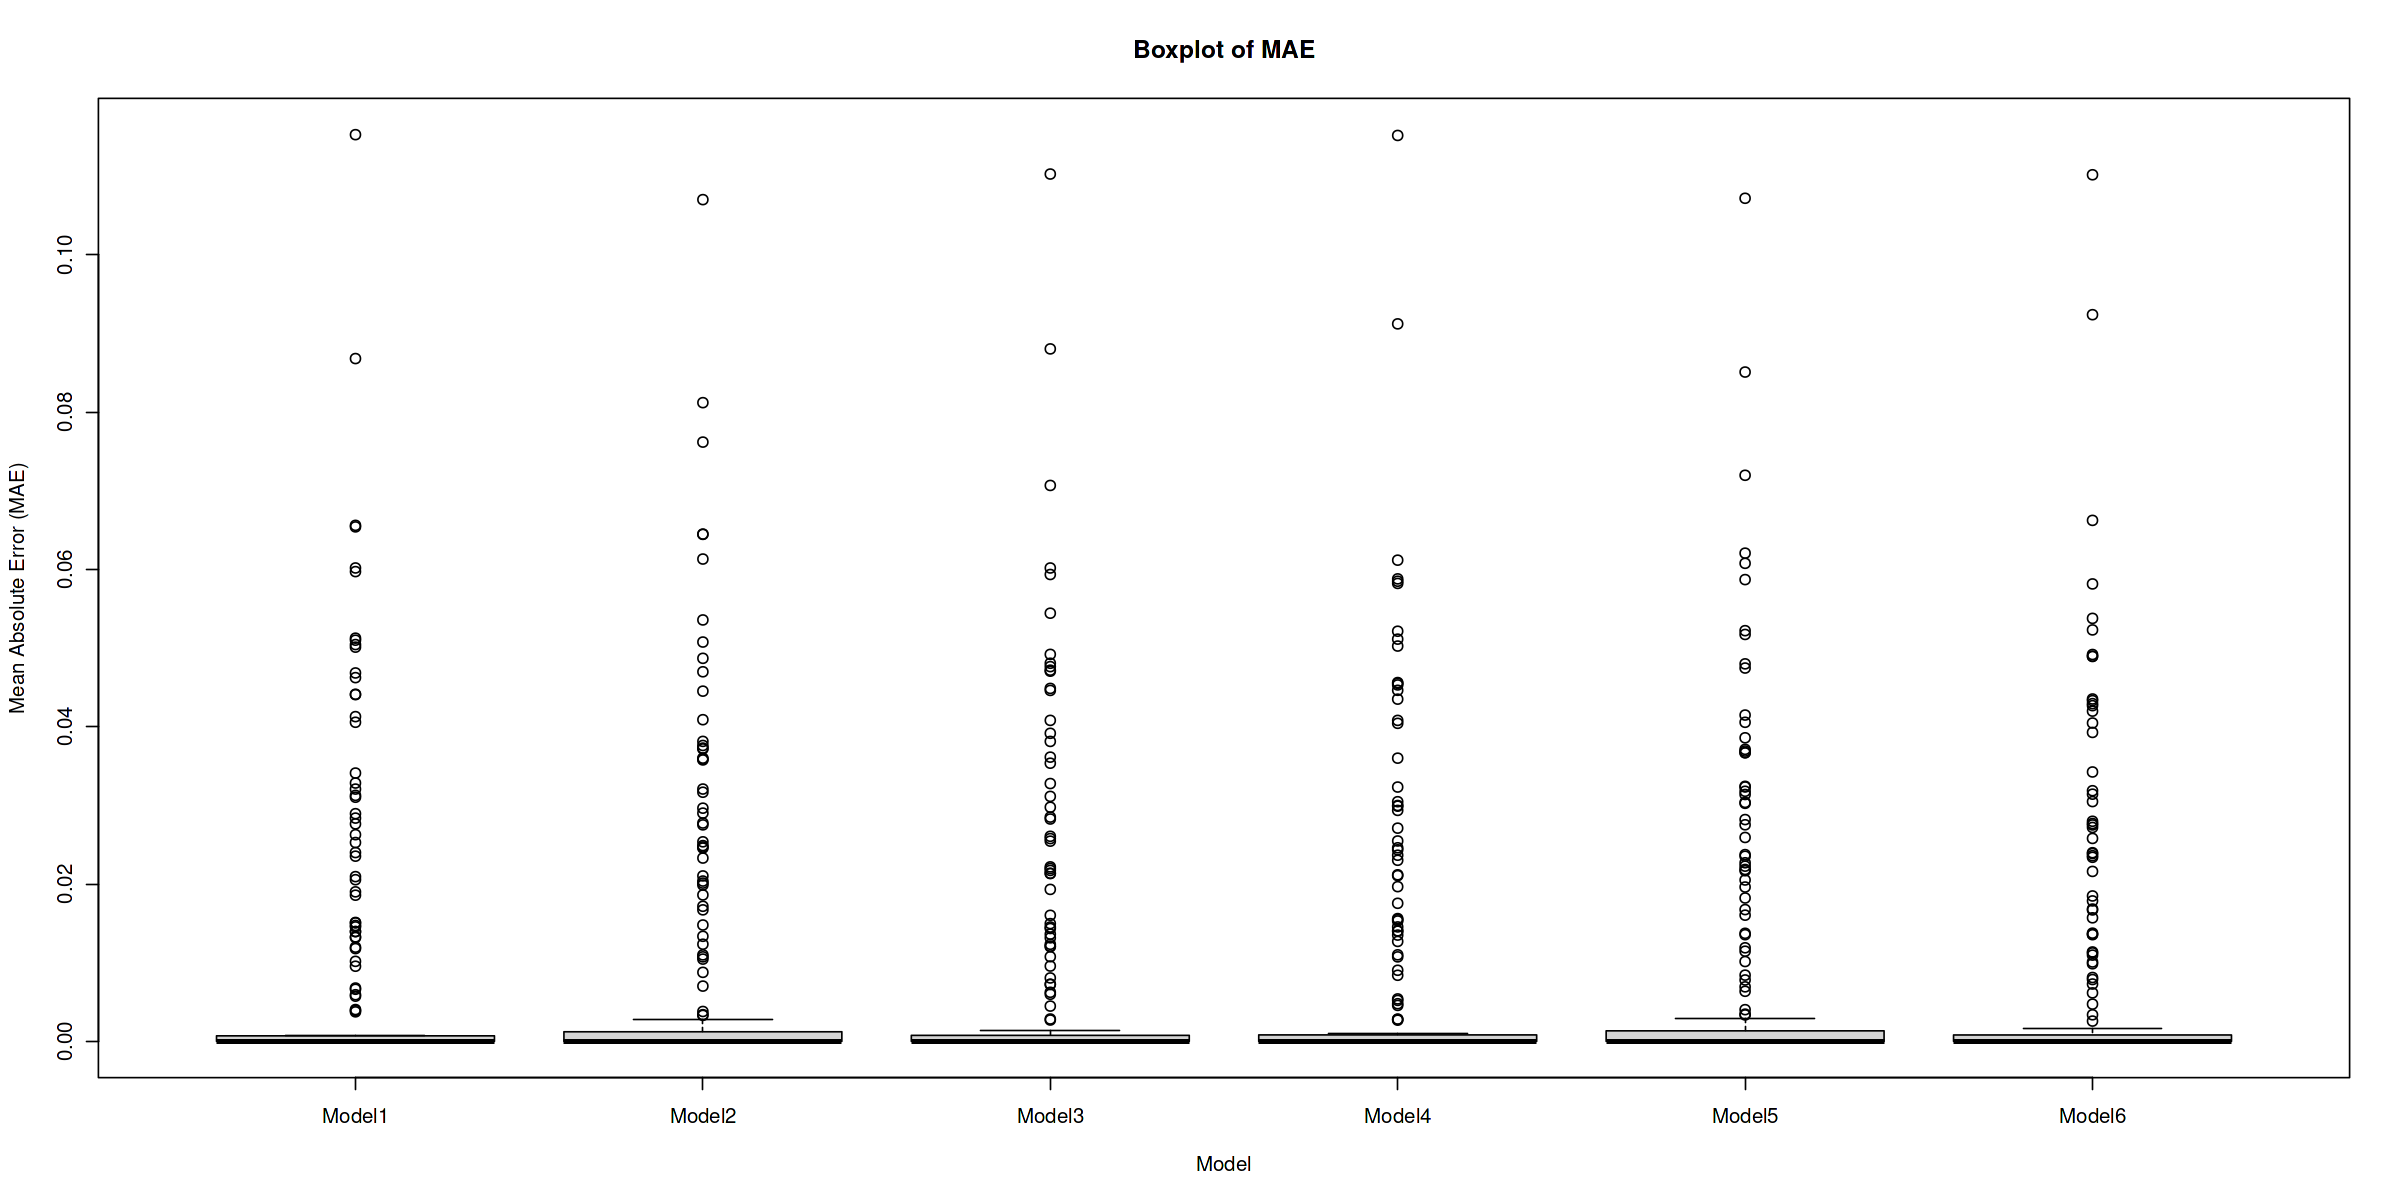

In [31]:
# Boxplot of variability of MAE

boxplot(list(Model1 = MAE.vec1, Model2 = MAE.vec2, Model3 = MAE.vec3, Model4 = MAE.vec4, Model5 = MAE.vec5, Model6 = MAE.vec6),
        main = "Boxplot of MAE", xlab = "Model", ylab = "Mean Absolute Error (MAE)")

## **Diagnosis**



In [28]:
require(astsa)          # load astsa
source("Diagnostic.R")  #(load the functions in "diagnostic")
require(portes)         # load portes  (Ljung-Box test, McLeod-Li_83 test)

Loading required package: portes



Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘portes’”


<span style='font-size:large'>Model 1</span>


Test the null hypothesis that the residuals are realizations of an IID noise process.

[,1]  
n               408.00
h               102.00
bound             0.10
# out of bounds  14.00
% out of bounds  13.73

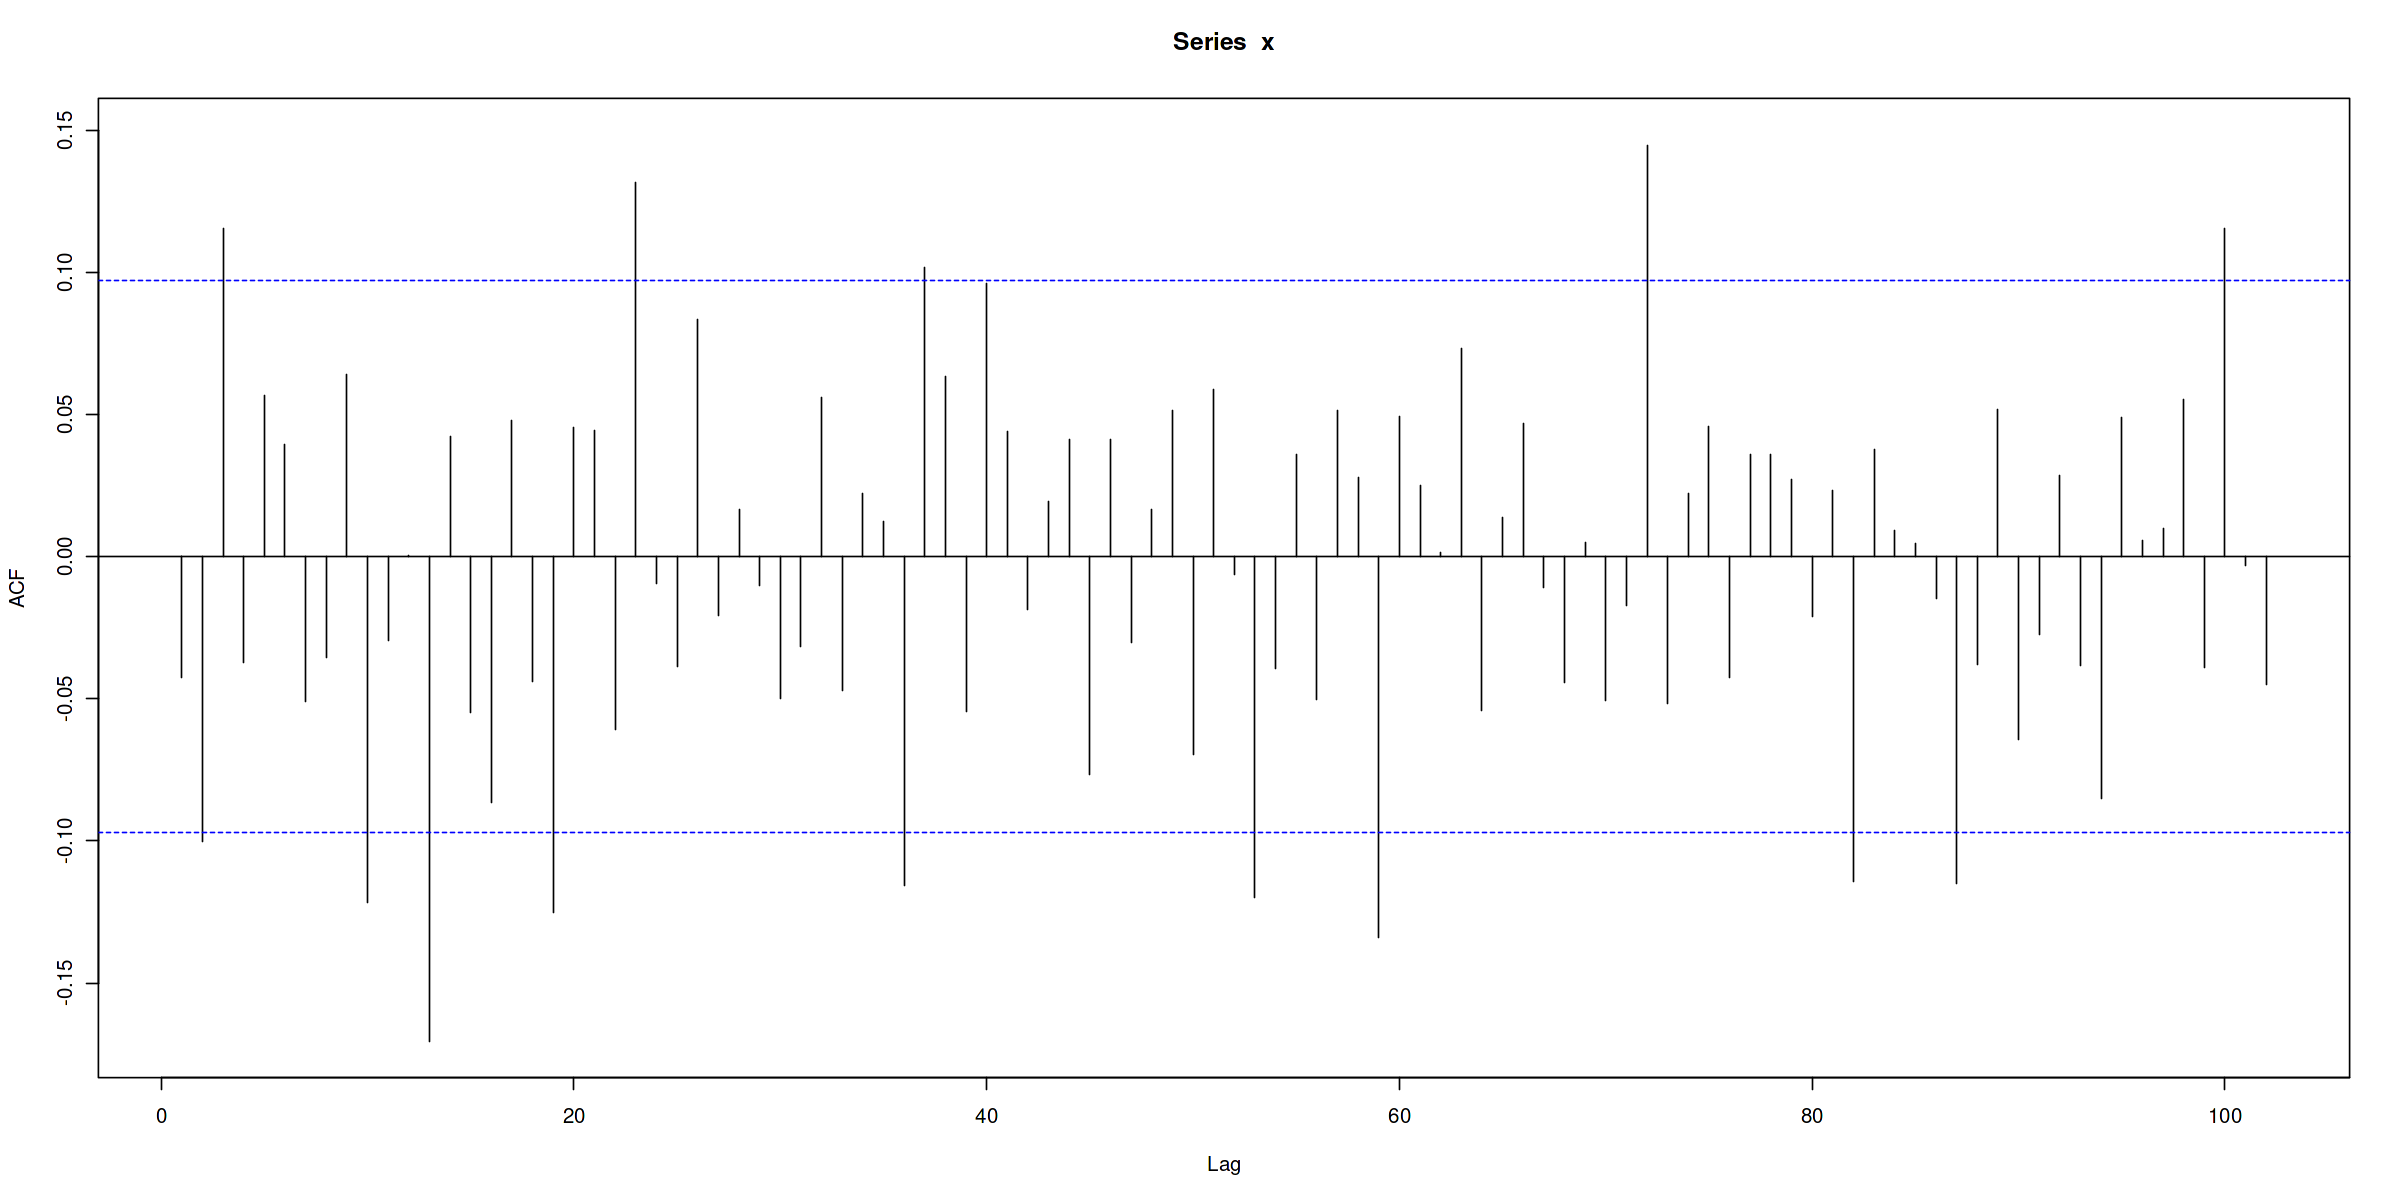

In [29]:
S.ACF(mod1$residuals)

In [30]:
NonParametric.Tests(mod1$residuals) 

Test Statistic P-value  
Turning Point test   1.3729186      0.1697777
Difference-sign Test 0.7707996      0.4408257
Rank Test            0.1264494      0.8993762

For the Ljung.Box test:

- if the time series is non-seasonal: lag=min(10,n/5);
- if the time series is seasonal with period s: lag=min(2s,n/5)

In our case: lag $= \min(2s,n/5) = (2\cdot 12, 408/5) = \min(24,81.6) = 24$

k  Test Statistic P-value     
[1,] 10 22.48815       4.227392e-04
[2,] 15 37.20958       5.205800e-05
[3,] 20 49.85999       1.269215e-05
[4,] 24 59.88371       4.037194e-06
[5,] 25 60.53381       5.886191e-06
[6,] 30 65.04436       2.038370e-05

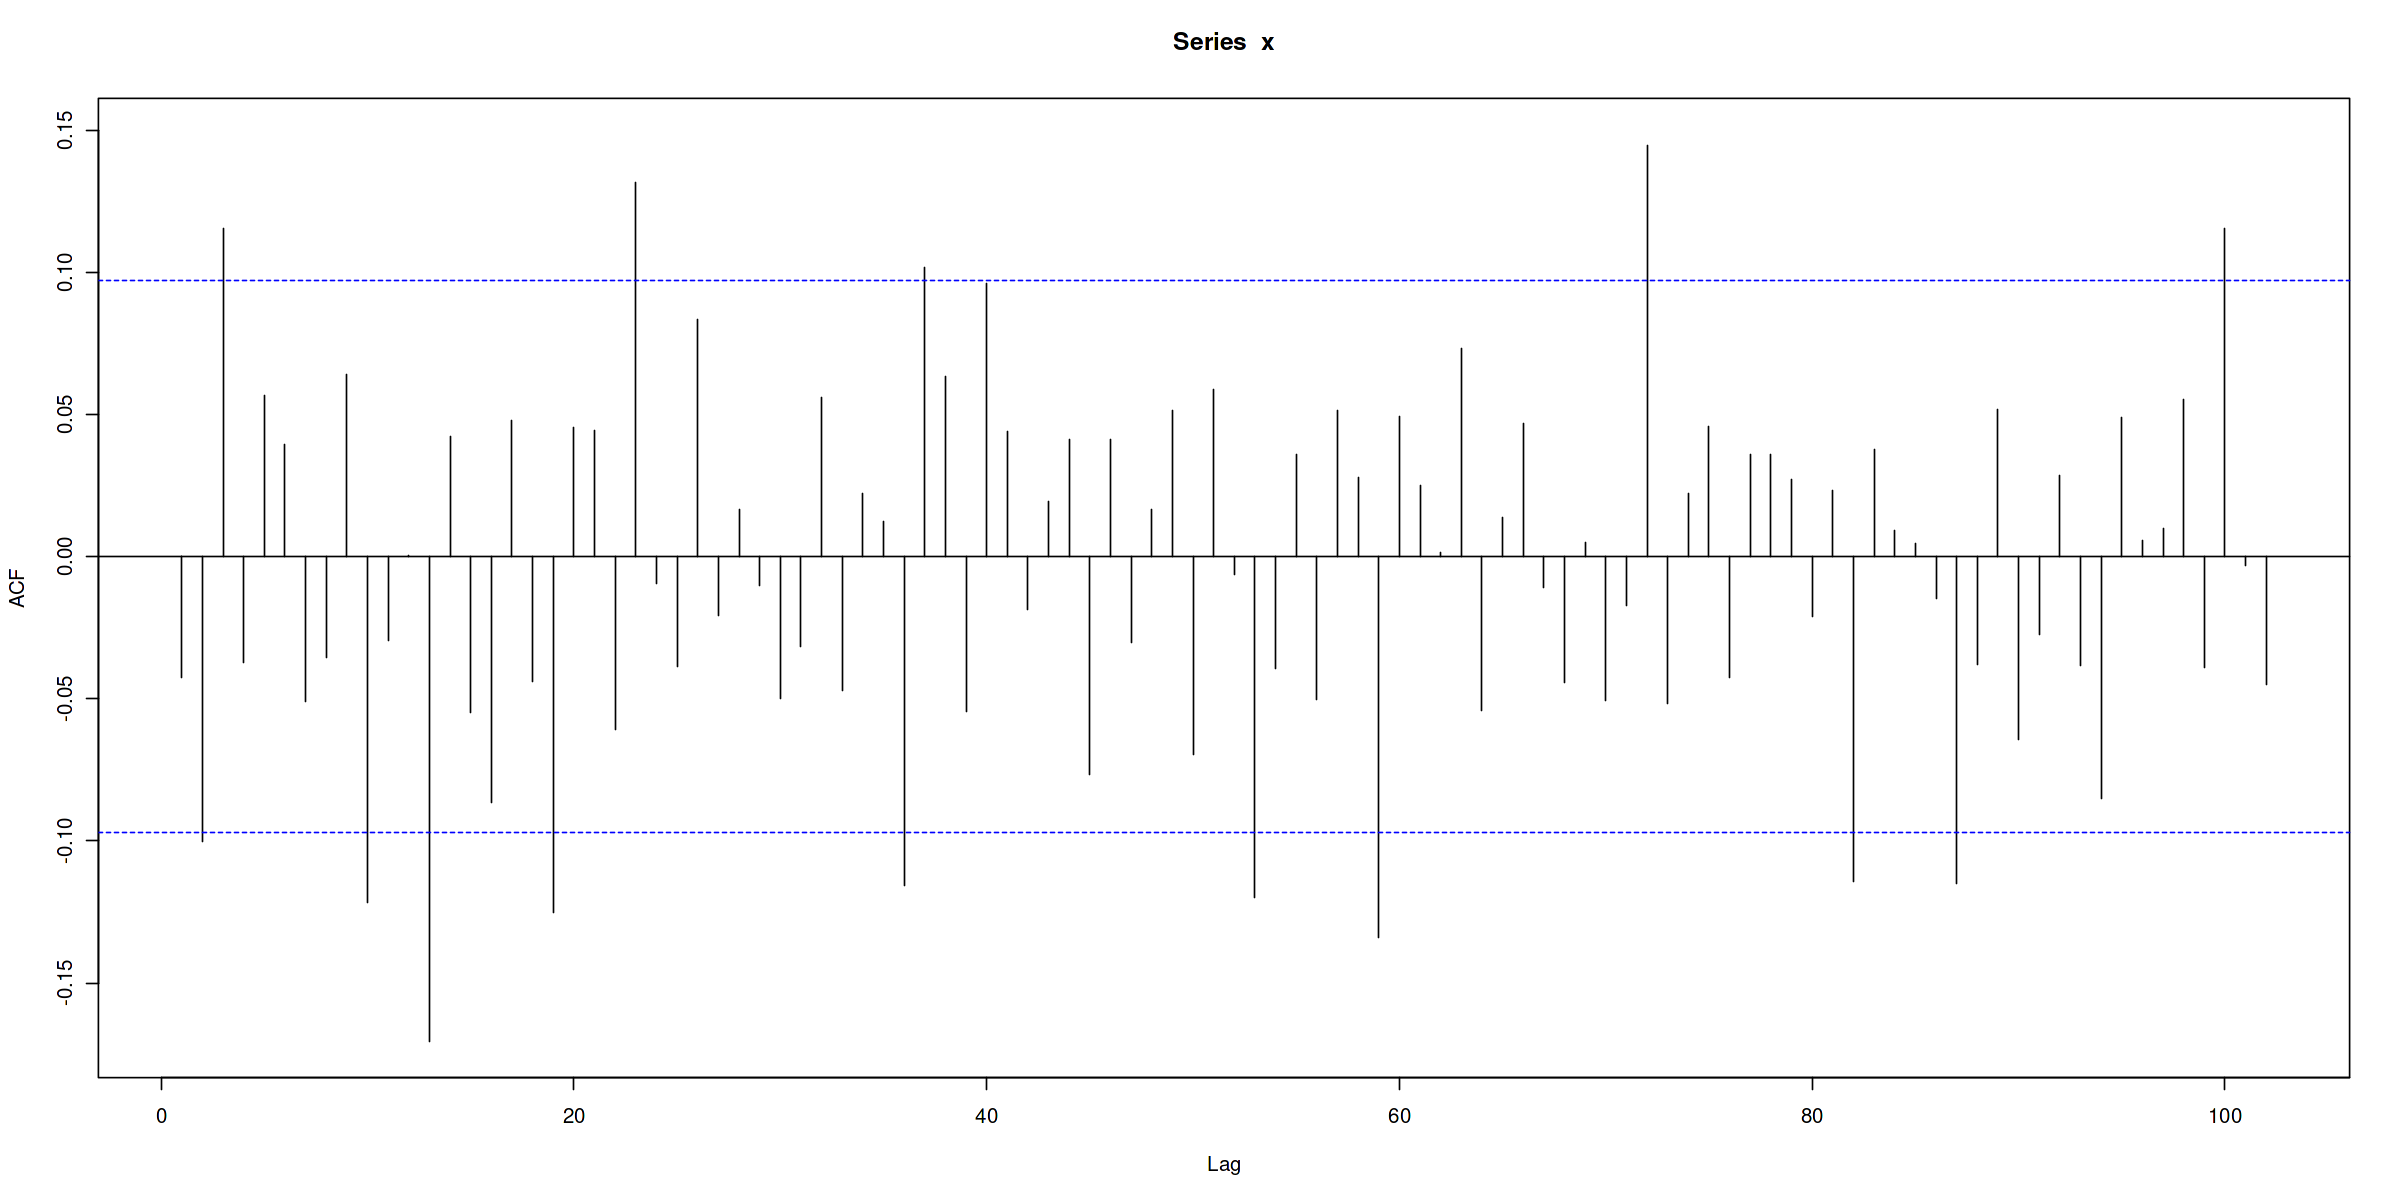

In [31]:
My.Ljung.Box(mod1$residuals,5)

Test the null hypothesis that the residuals follow a Normal distribution

Statistics P-value
Shapiro-Wilxs       0.9970    0.6643 
Lilliefors          0.0259    0.7256 
Pearson Chi.square 17.6127    0.6129

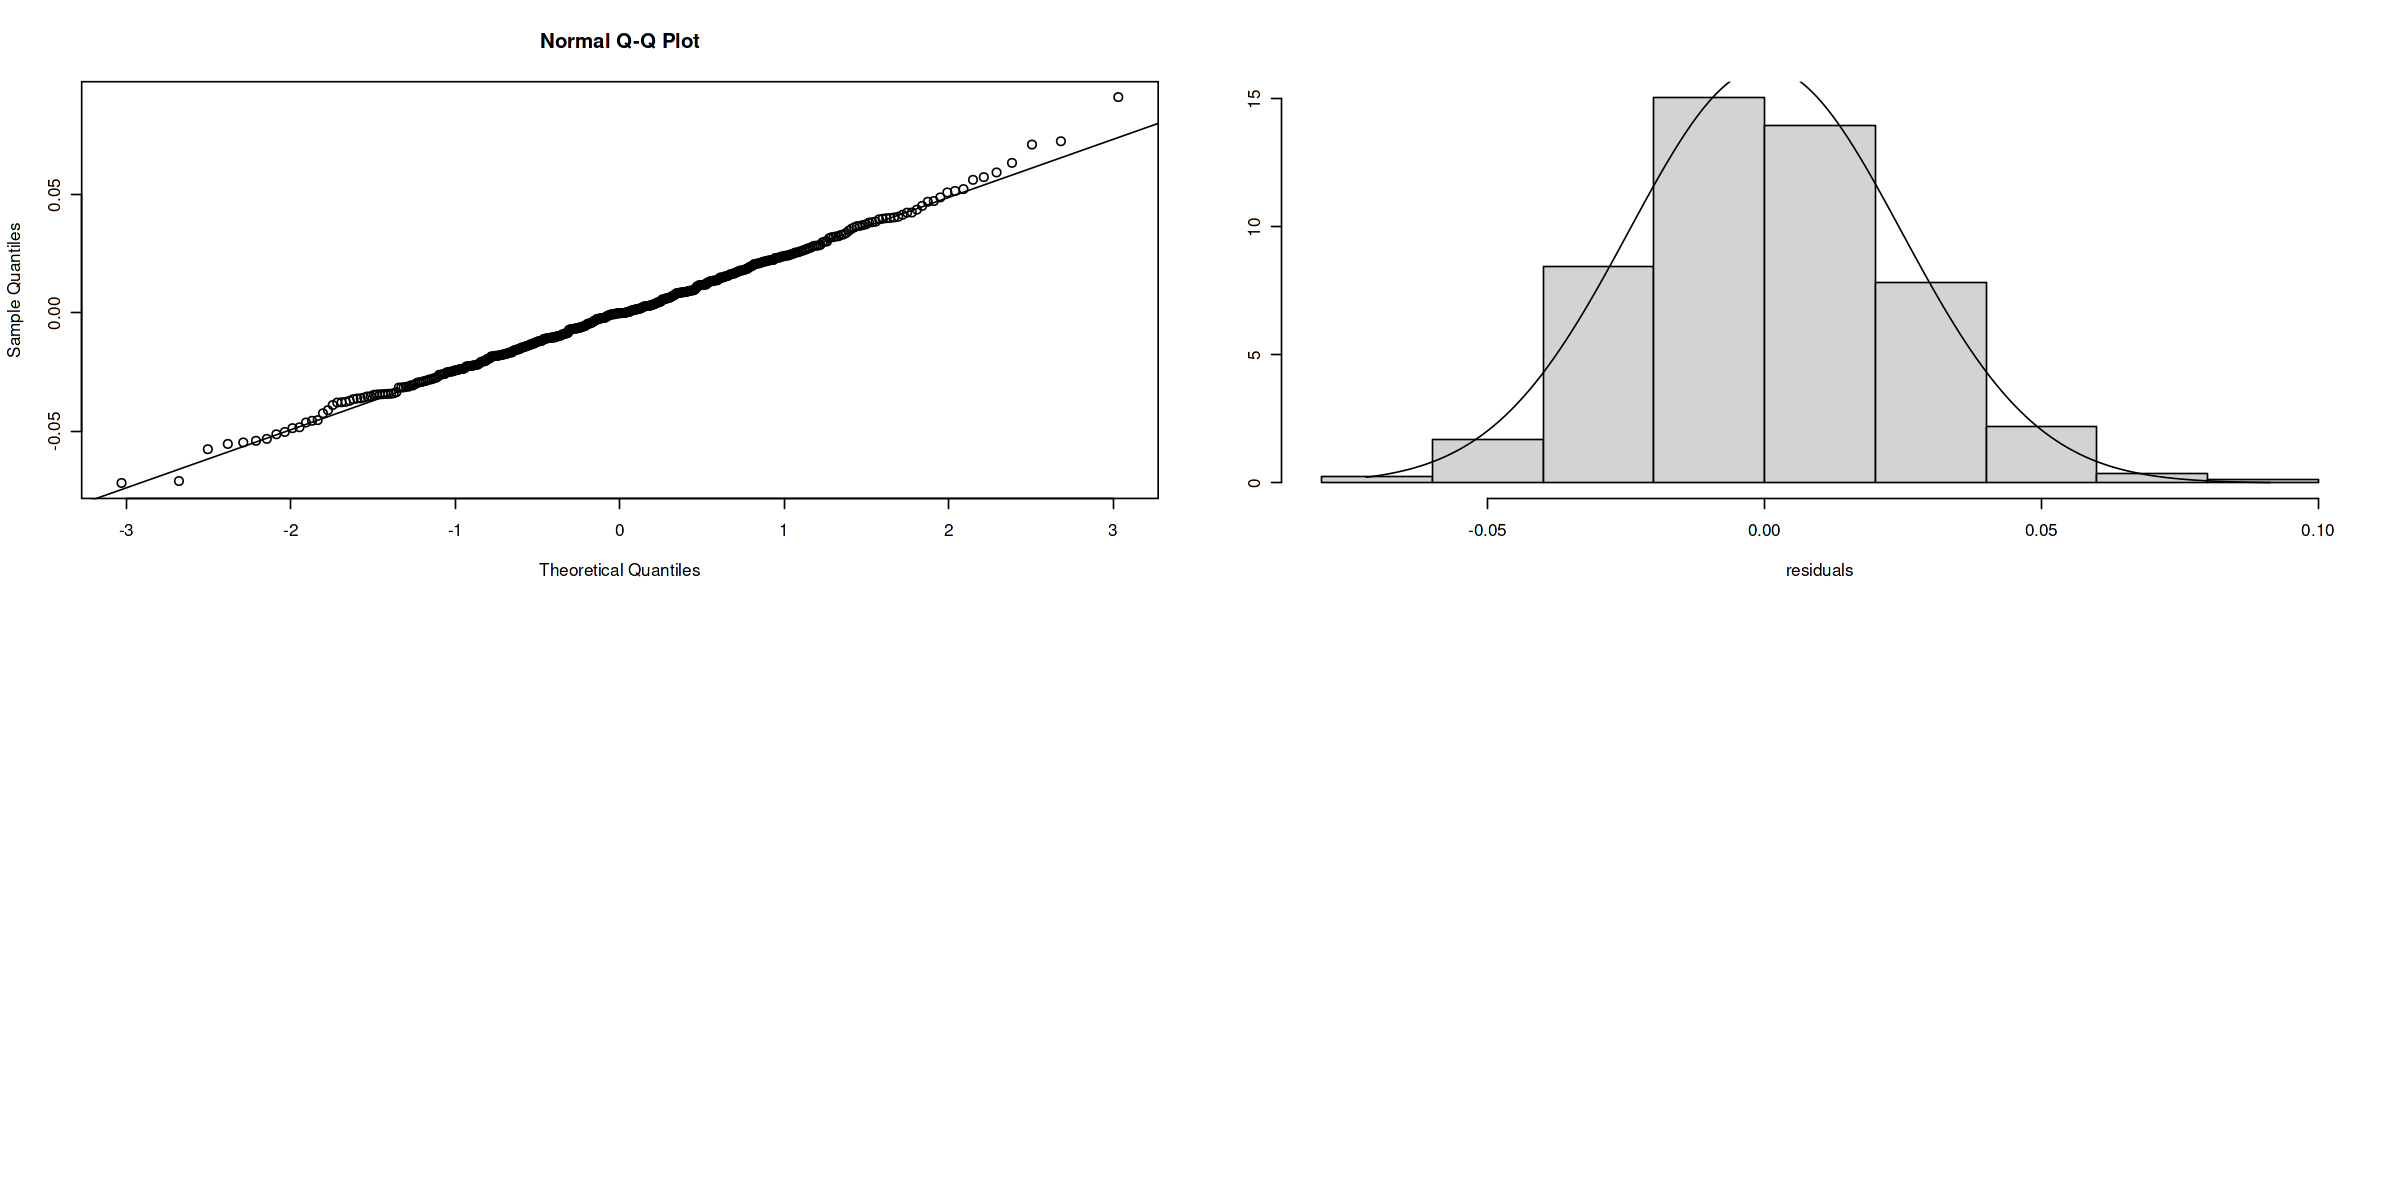

In [32]:
Check.normality(mod1$residuals)

Zero Mean test

In [33]:
n.res=length(mod1$residuals)
t.obs=mean(mod1$residuals)/ sqrt(var(mod1$residuals)/(n.res-1))  
p.value=1-pnorm(t.obs)
p.value

[1] 0.4696458

<span style='font-size:large'>Model 5</span>


[,1]  
n               408.00
h               102.00
bound             0.10
# out of bounds  12.00
% out of bounds  11.76

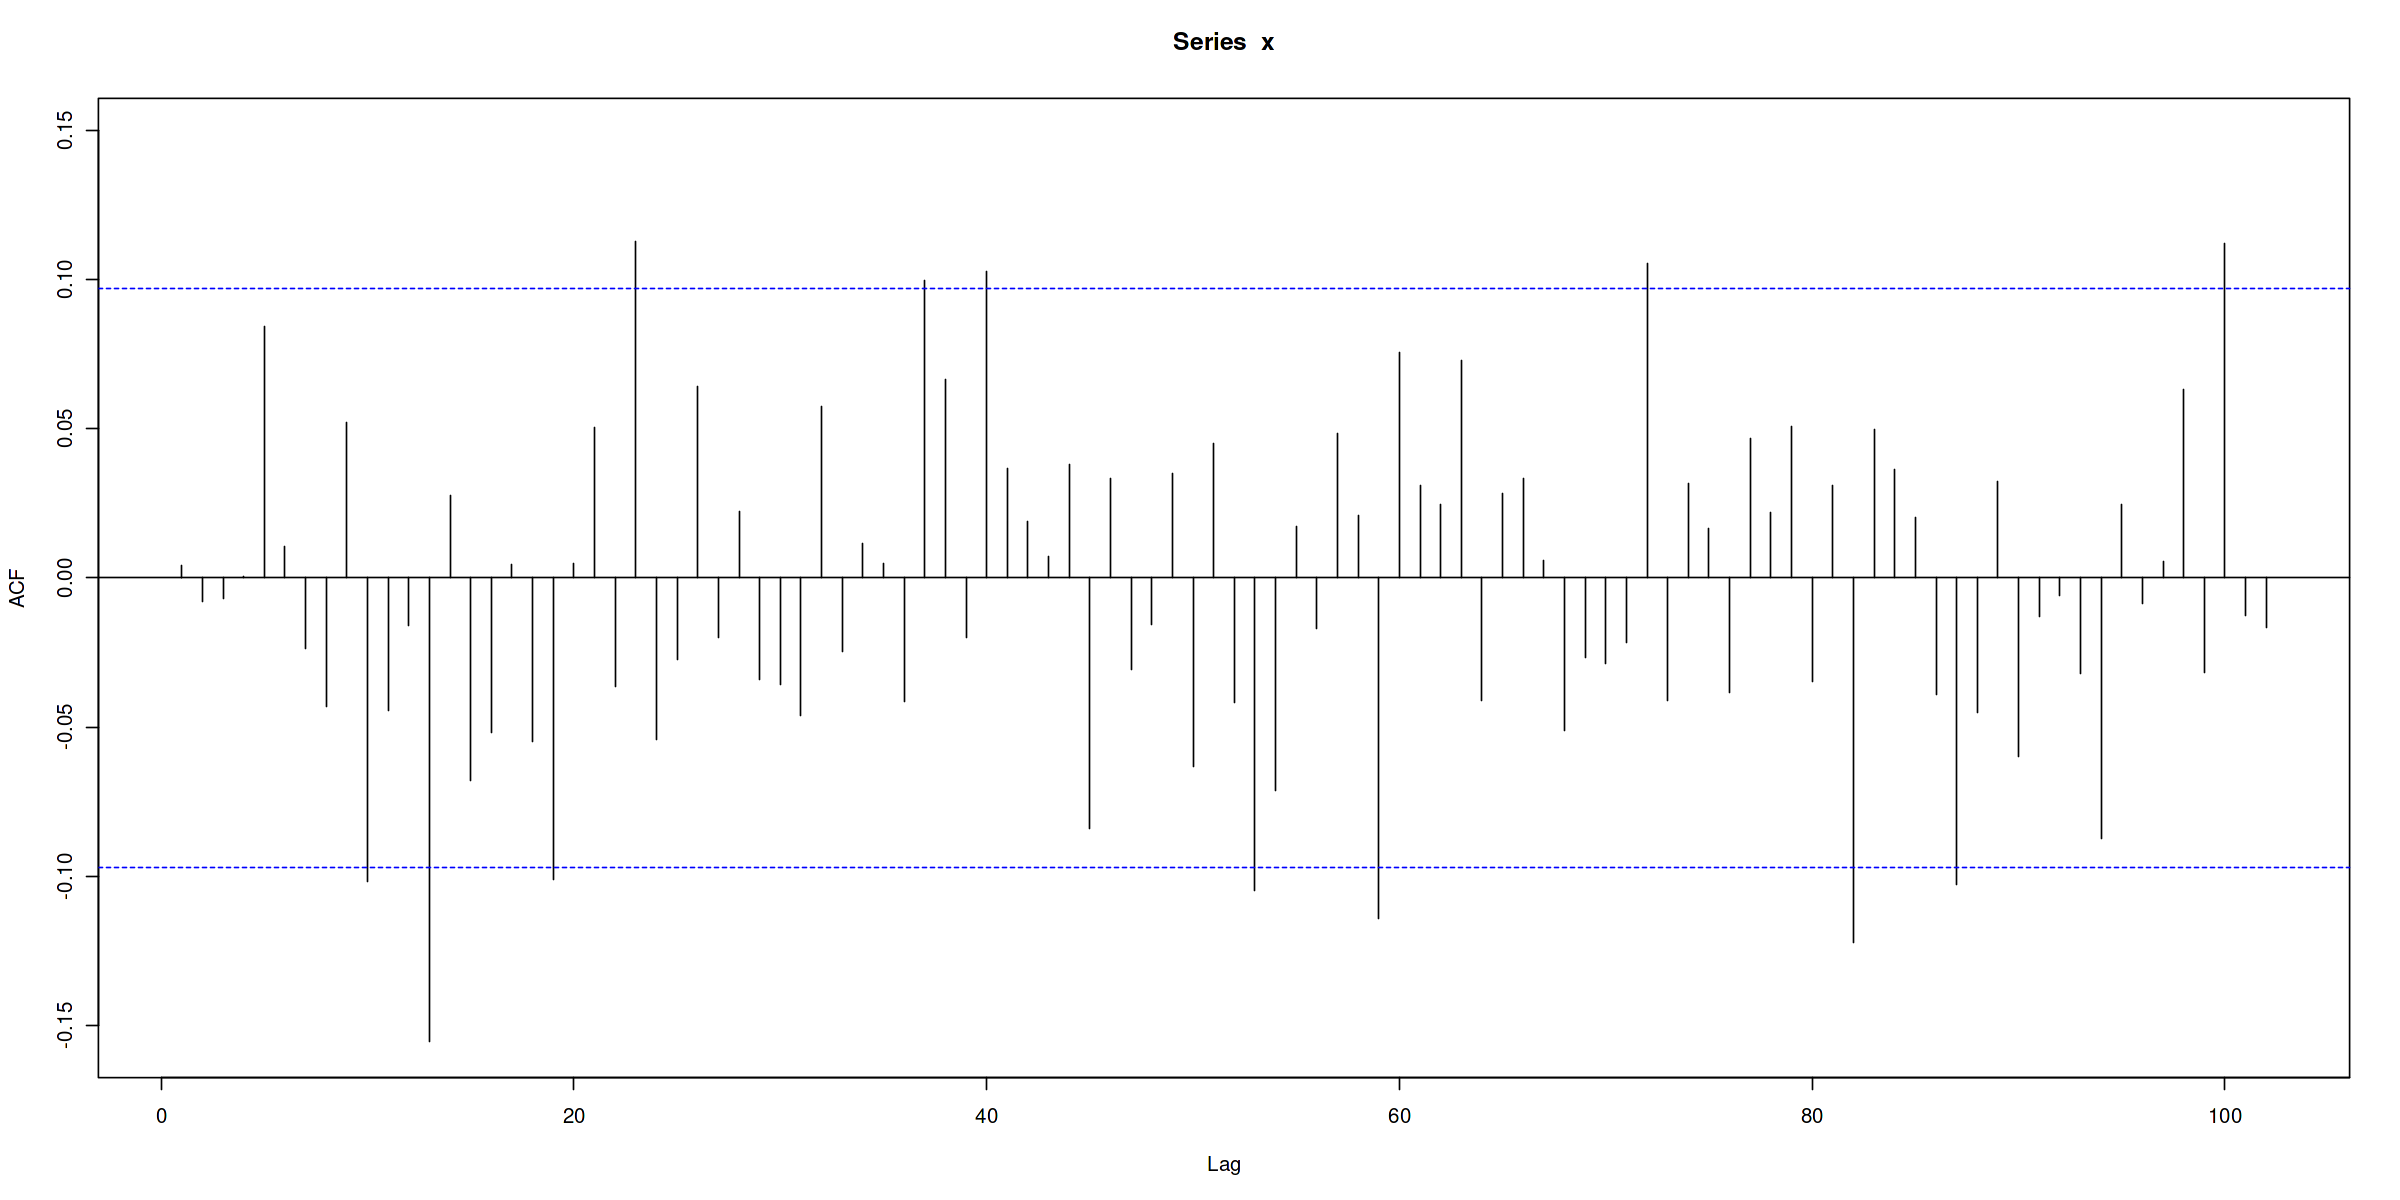

In [34]:
S.ACF(mod5$residuals)

In [35]:
NonParametric.Tests(mod5$residuals) 

Test Statistic P-value  
Turning Point test   0.4314887      0.6661131
Difference-sign Test 0.9420884      0.3461474
Rank Test            0.2805141      0.7790831

k  Test Statistic P-value    
[1,] 10  9.520098      0.008565189
[2,] 15 22.946995      0.001741216
[3,] 20 29.783357      0.003009864
[4,] 24 38.250854      0.001393522
[5,] 25 38.575006      0.002047423
[6,] 30 41.848628      0.006520011

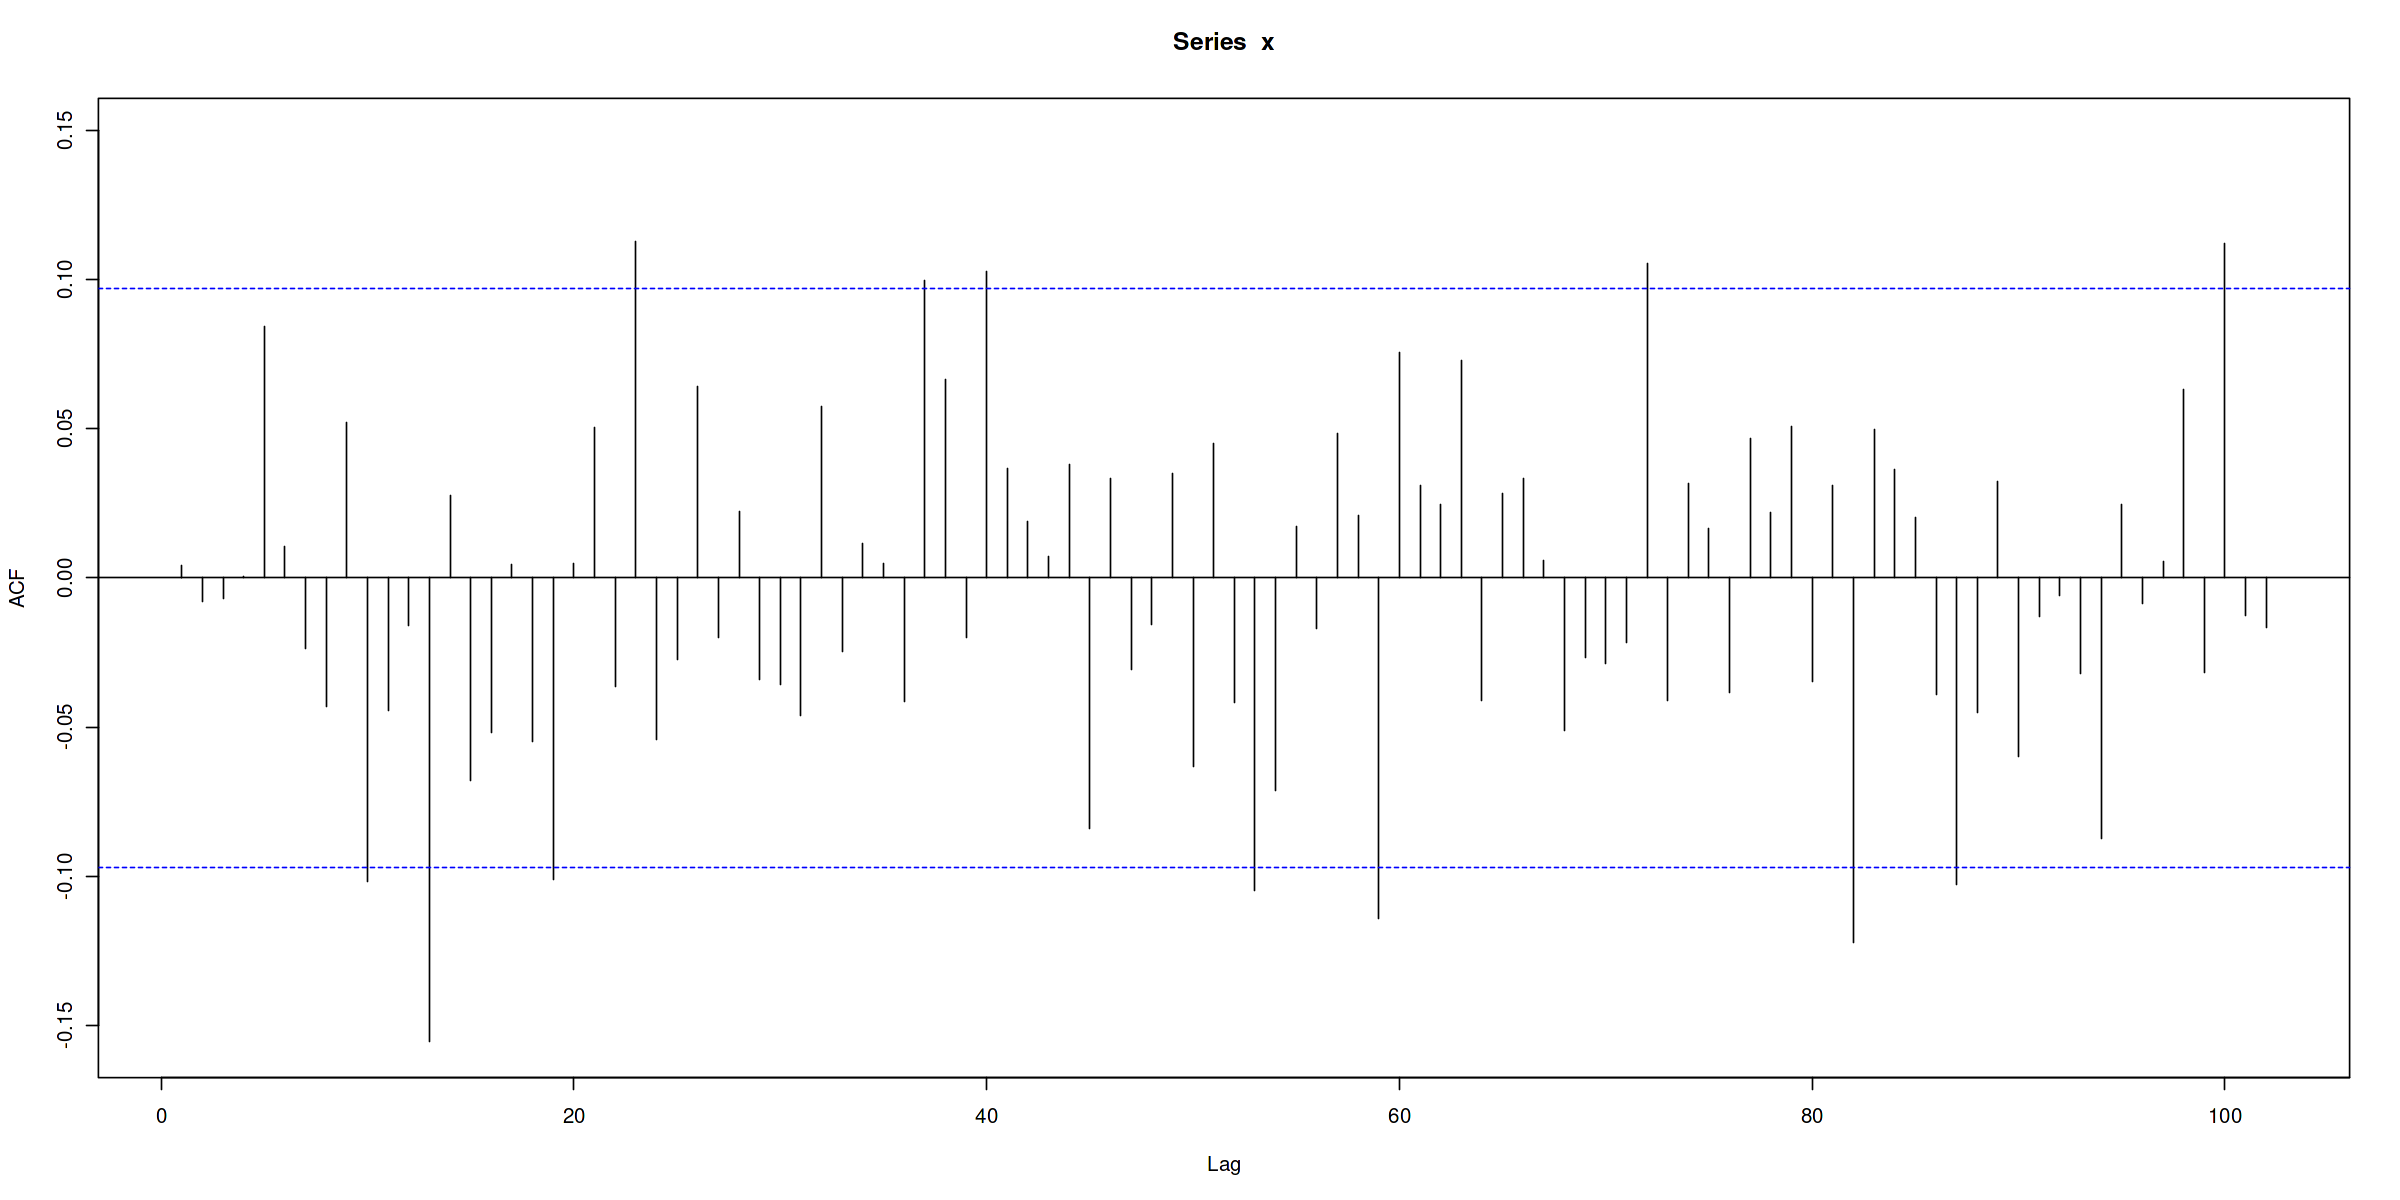

In [36]:
My.Ljung.Box(mod5$residuals,8)

Statistics P-value
Shapiro-Wilxs       0.9945    0.1468 
Lilliefors          0.0365    0.2076 
Pearson Chi.square 34.2990    0.0242

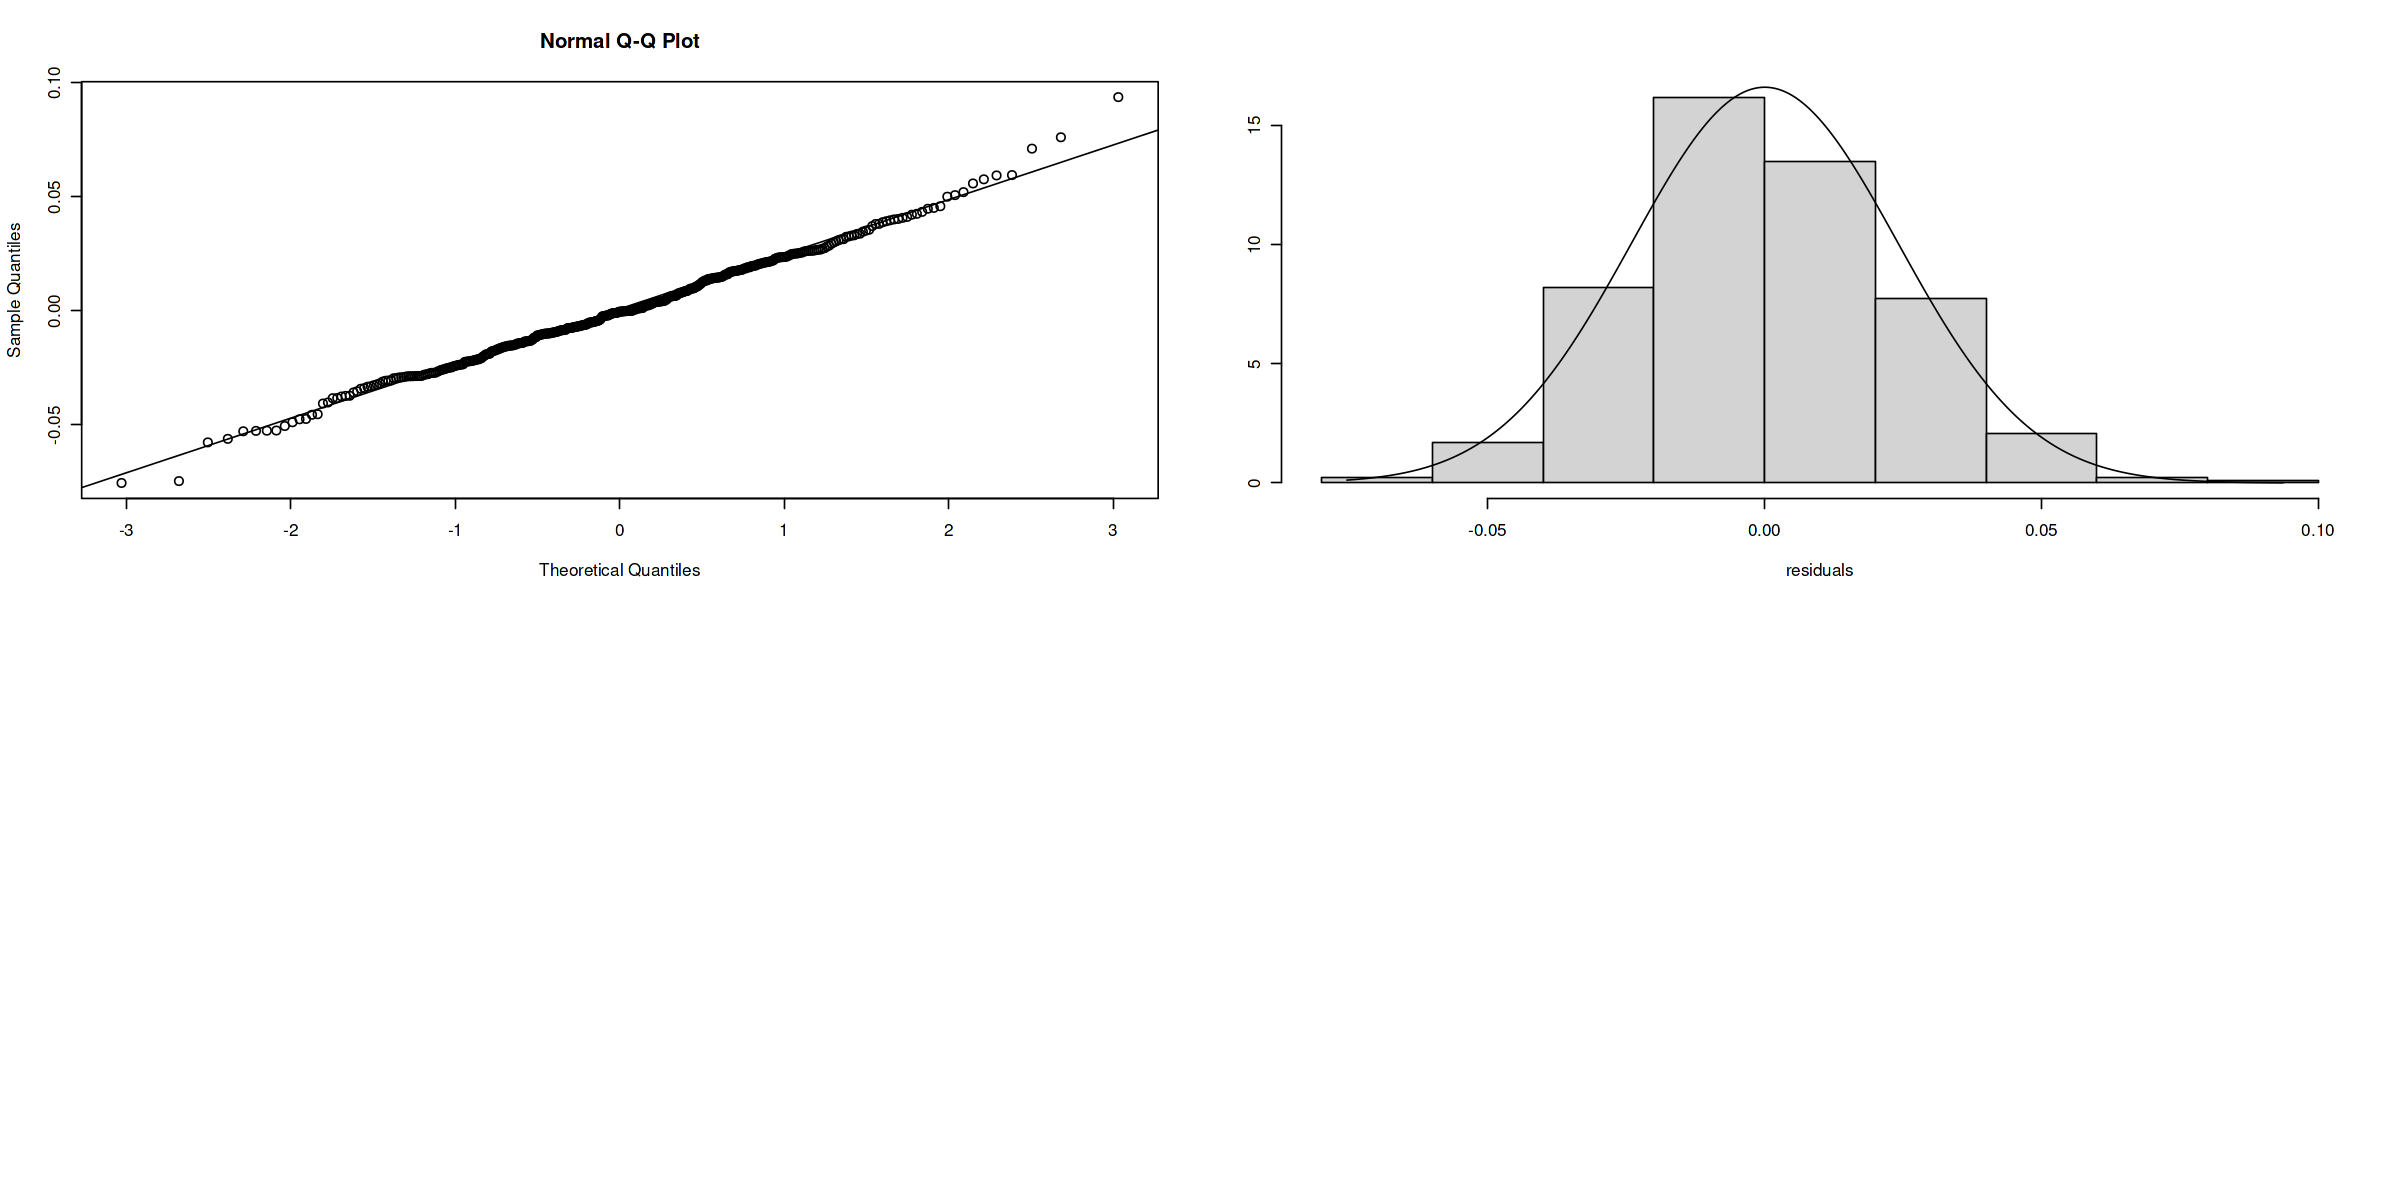

In [37]:
Check.normality(mod5$residuals)

In [38]:
n.res=length(mod5$residuals)
t.obs=mean(mod5$residuals)/ sqrt(var(mod5$residuals)/(n.res-1))  
p.value=1-pnorm(t.obs)
p.value

[1] 0.4840269

<span style='font-size:large'>Model 6</span>

[,1]  
n               408.00
h               102.00
bound             0.10
# out of bounds  13.00
% out of bounds  12.75

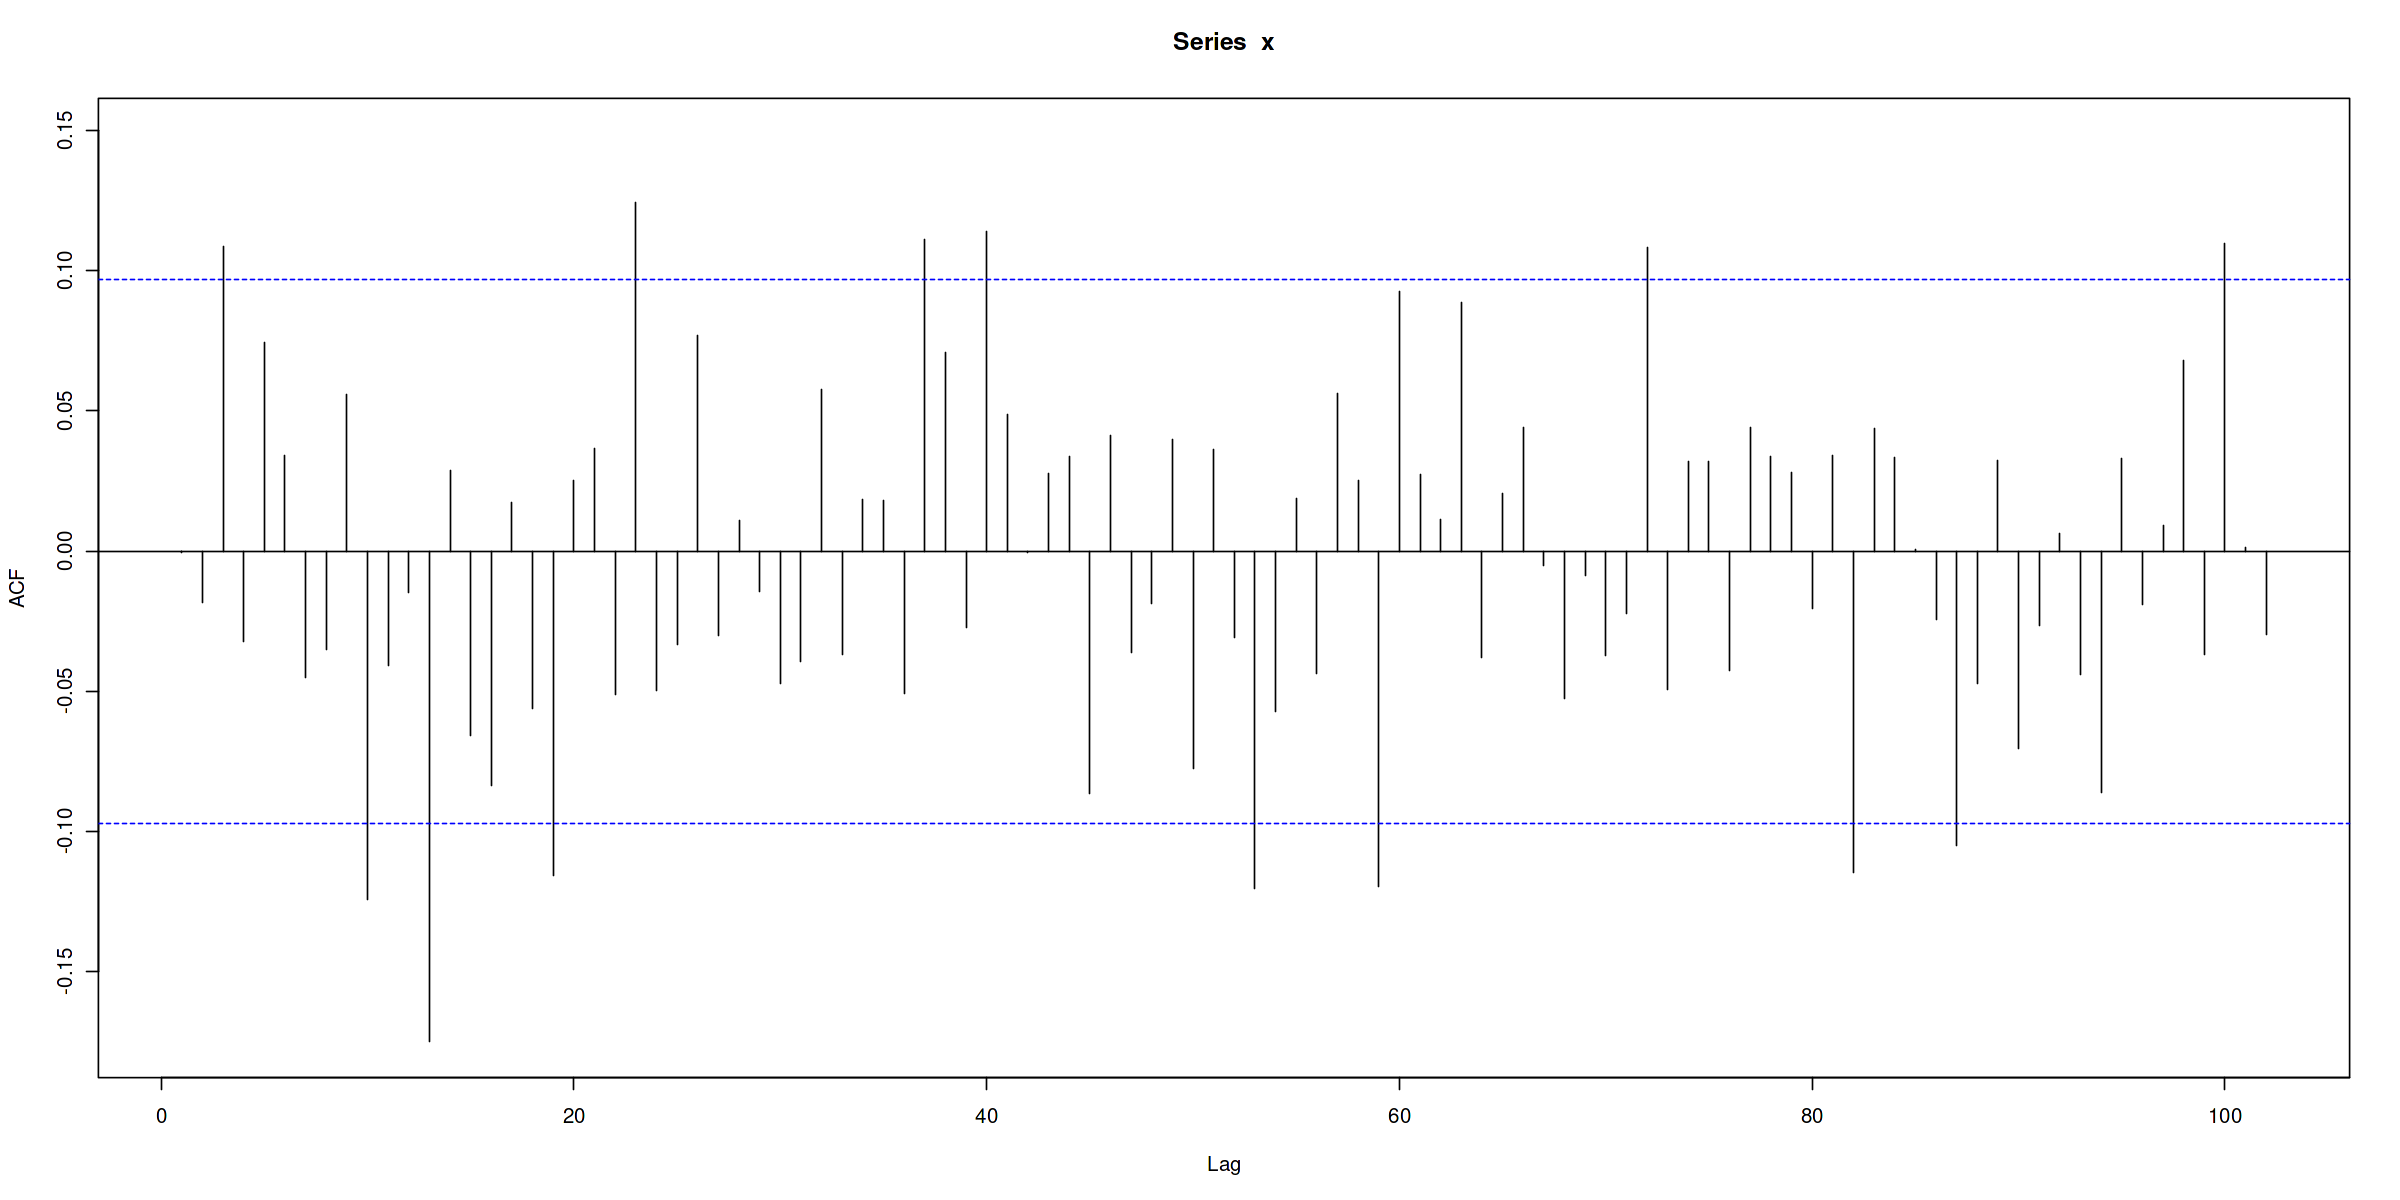

In [39]:
S.ACF(mod6$residuals)

In [40]:
NonParametric.Tests(mod6$residuals) 

Test Statistic P-value  
Turning Point test   1.3729186      0.1697777
Difference-sign Test 0.9420884      0.3461474
Rank Test            0.2528987      0.8003465

k  Test Statistic P-value     
[1,] 10 17.40700       5.827830e-04
[2,] 15 33.36340       5.296066e-05
[3,] 20 43.86600       3.229847e-05
[4,] 24 53.38847       1.239618e-05
[5,] 25 53.87686       1.917943e-05
[6,] 30 57.99773       7.400242e-05

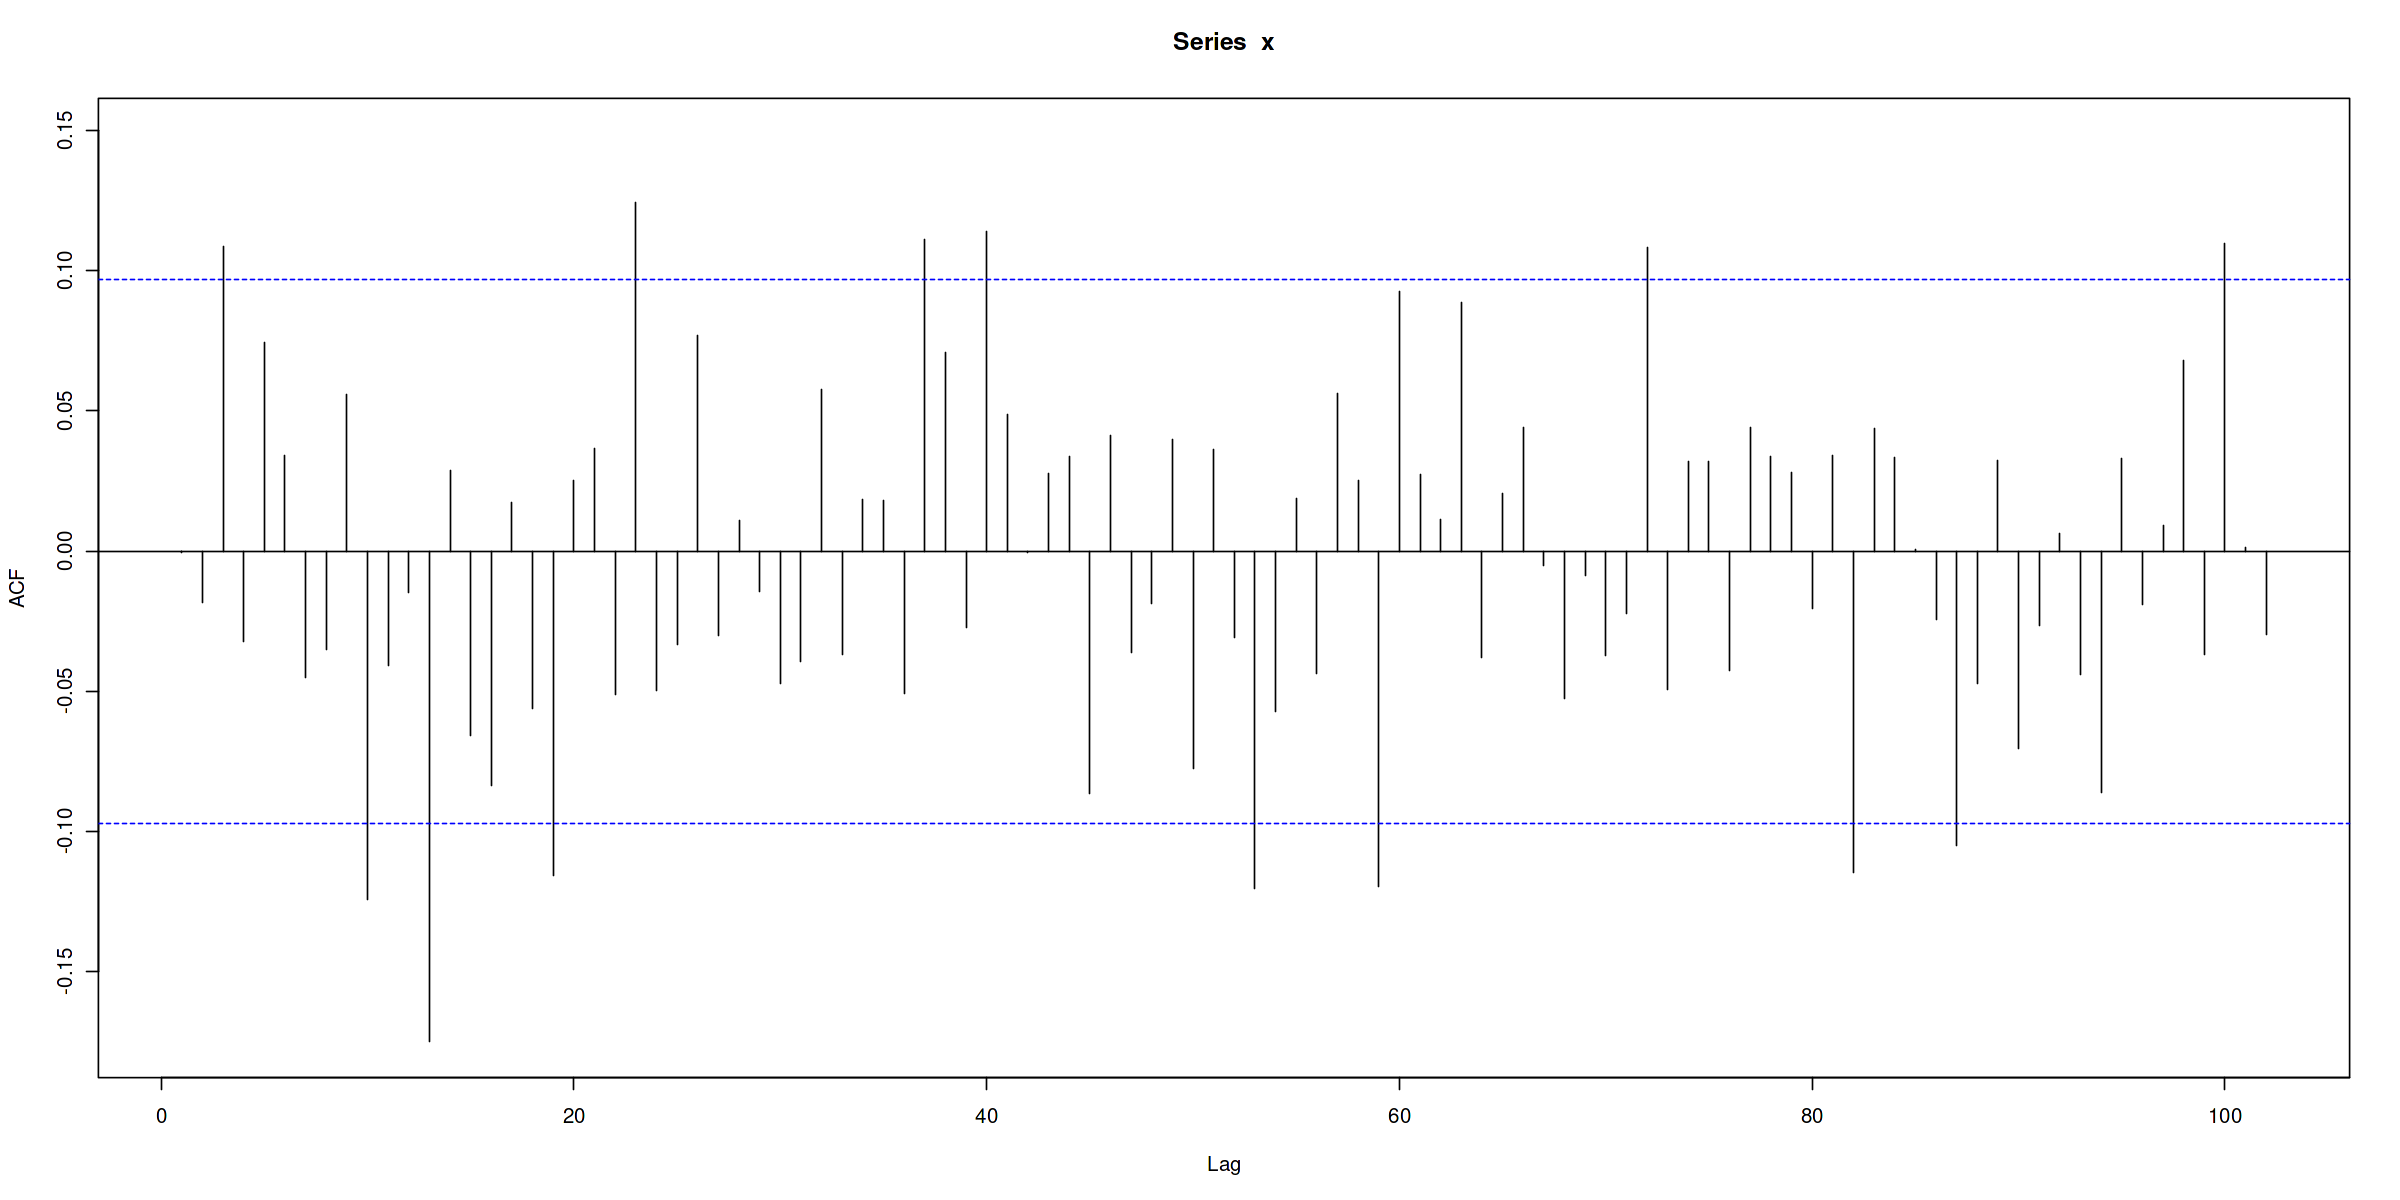

In [41]:
My.Ljung.Box(mod6$residuals,7)

Statistics P-value
Shapiro-Wilxs       0.9956    0.3165 
Lilliefors          0.0253    0.7591 
Pearson Chi.square 11.2990    0.9381

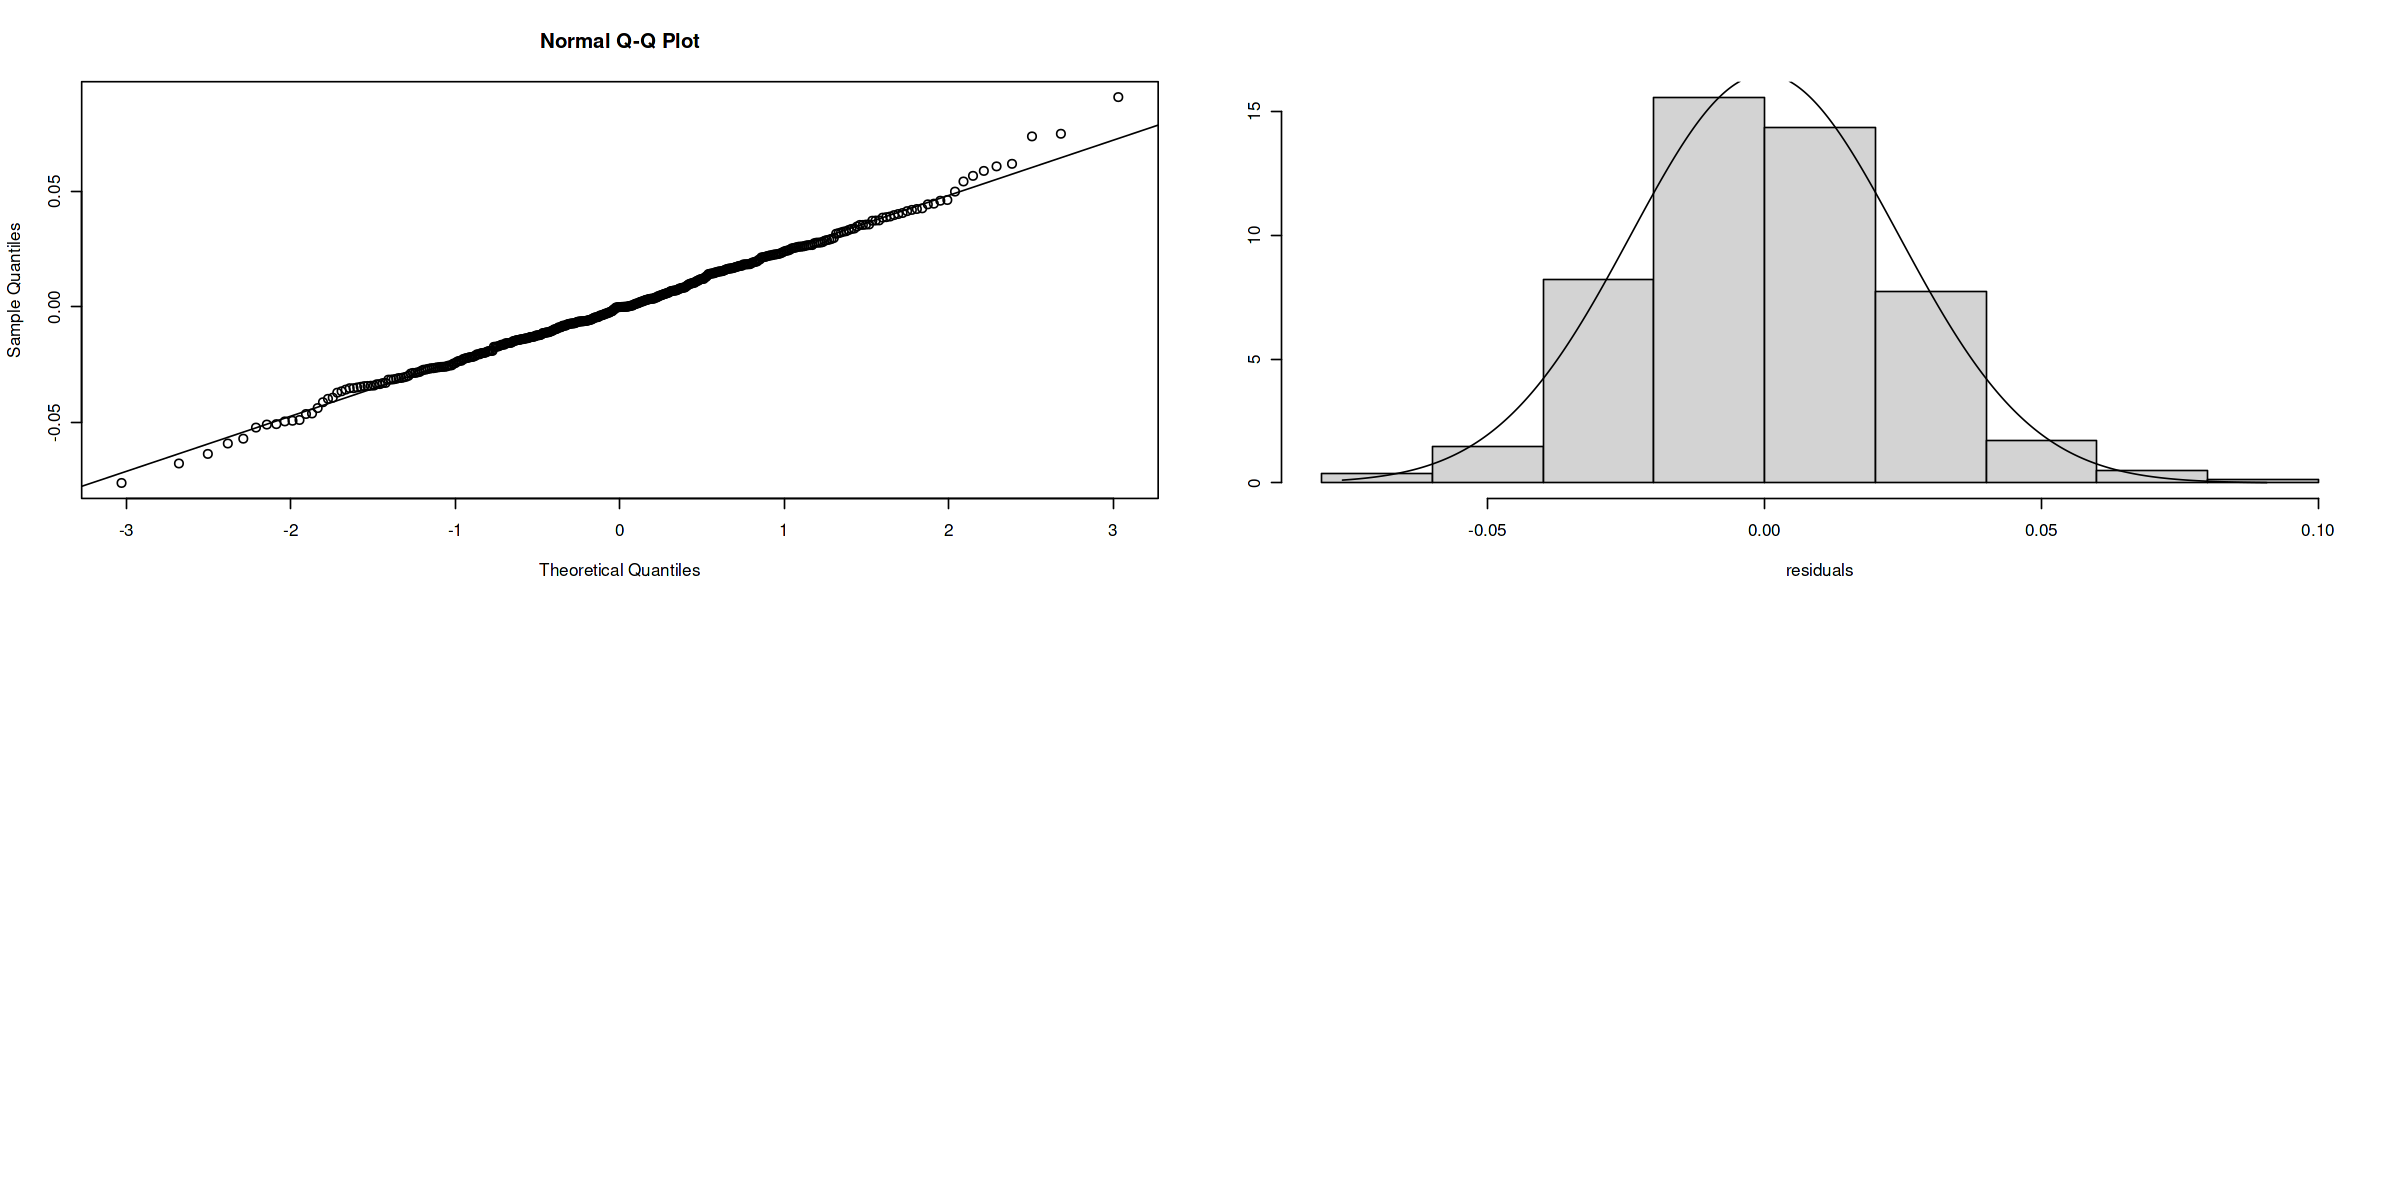

In [42]:
Check.normality(mod6$residuals)

In [43]:
n.res=length(mod6$residuals)
t.obs=mean(mod6$residuals)/ sqrt(var(mod6$residuals)/(n.res-1))  
p.value=1-pnorm(t.obs)
p.value

[1] 0.4898476

<span style='font-size:large'>Model 2</span>

[,1]  
n               408.00
h               102.00
bound             0.10
# out of bounds  11.00
% out of bounds  10.78

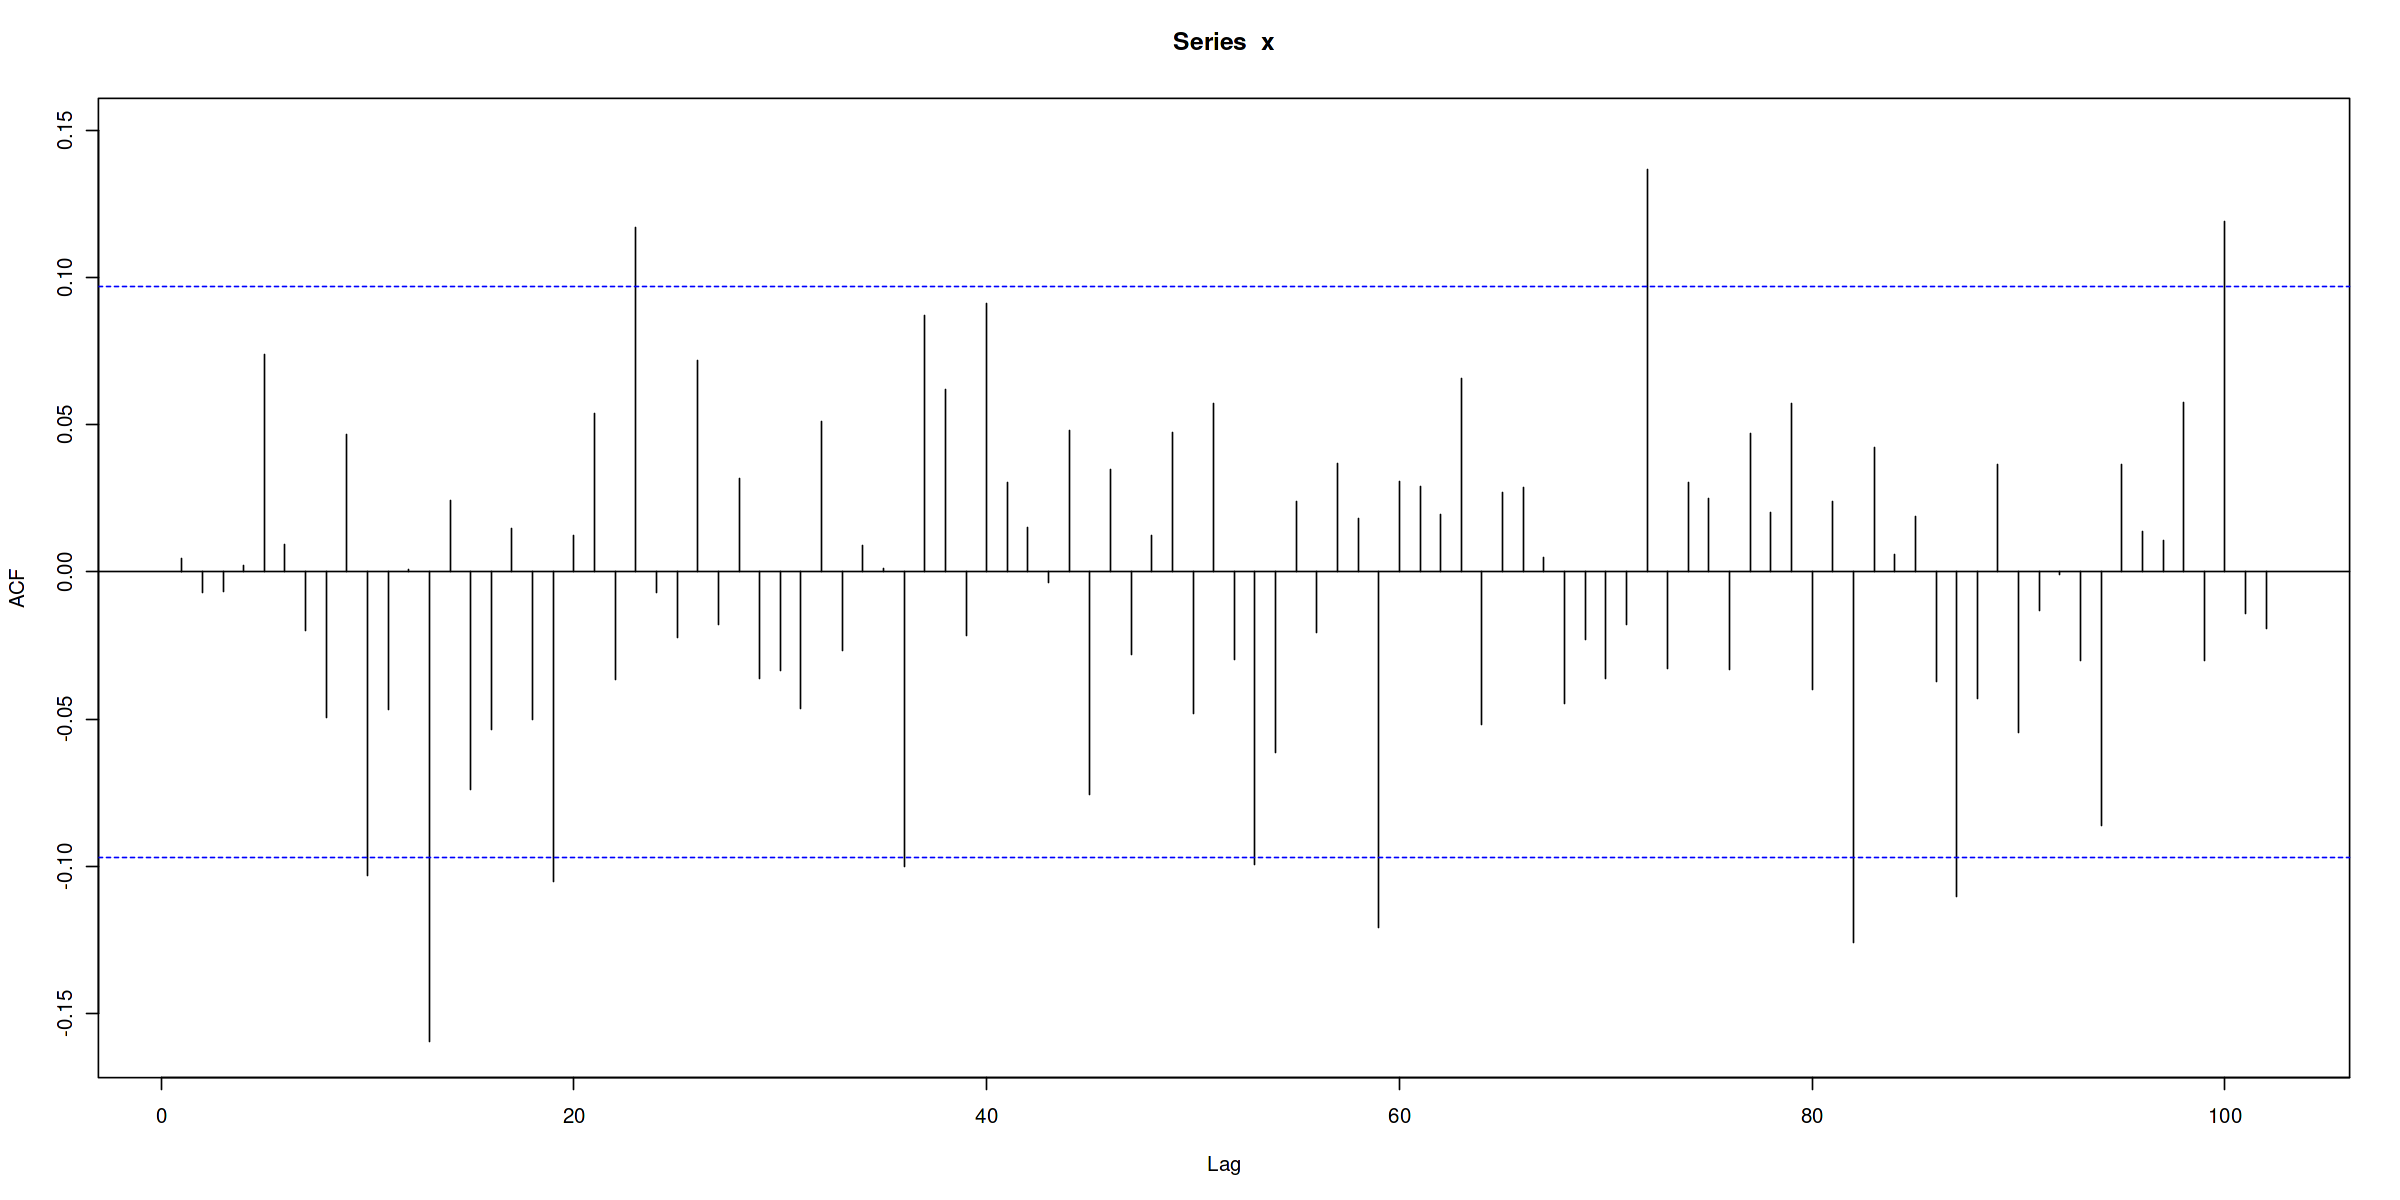

In [44]:
S.ACF(mod2$residuals)

In [45]:
NonParametric.Tests(mod2$residuals)

Test Statistic P-value  
Turning Point test   0.4314887      0.6661131
Difference-sign Test 1.6272436      0.1036854
Rank Test            0.1744129      0.8615410

k  Test Statistic P-value    
[1,] 10  8.926261      0.030287525
[2,] 15 23.165104      0.003158615
[3,] 20 30.371287      0.004162430
[4,] 24 38.161237      0.002335380
[5,] 25 38.380354      0.003448410
[6,] 30 42.301461      0.008371341

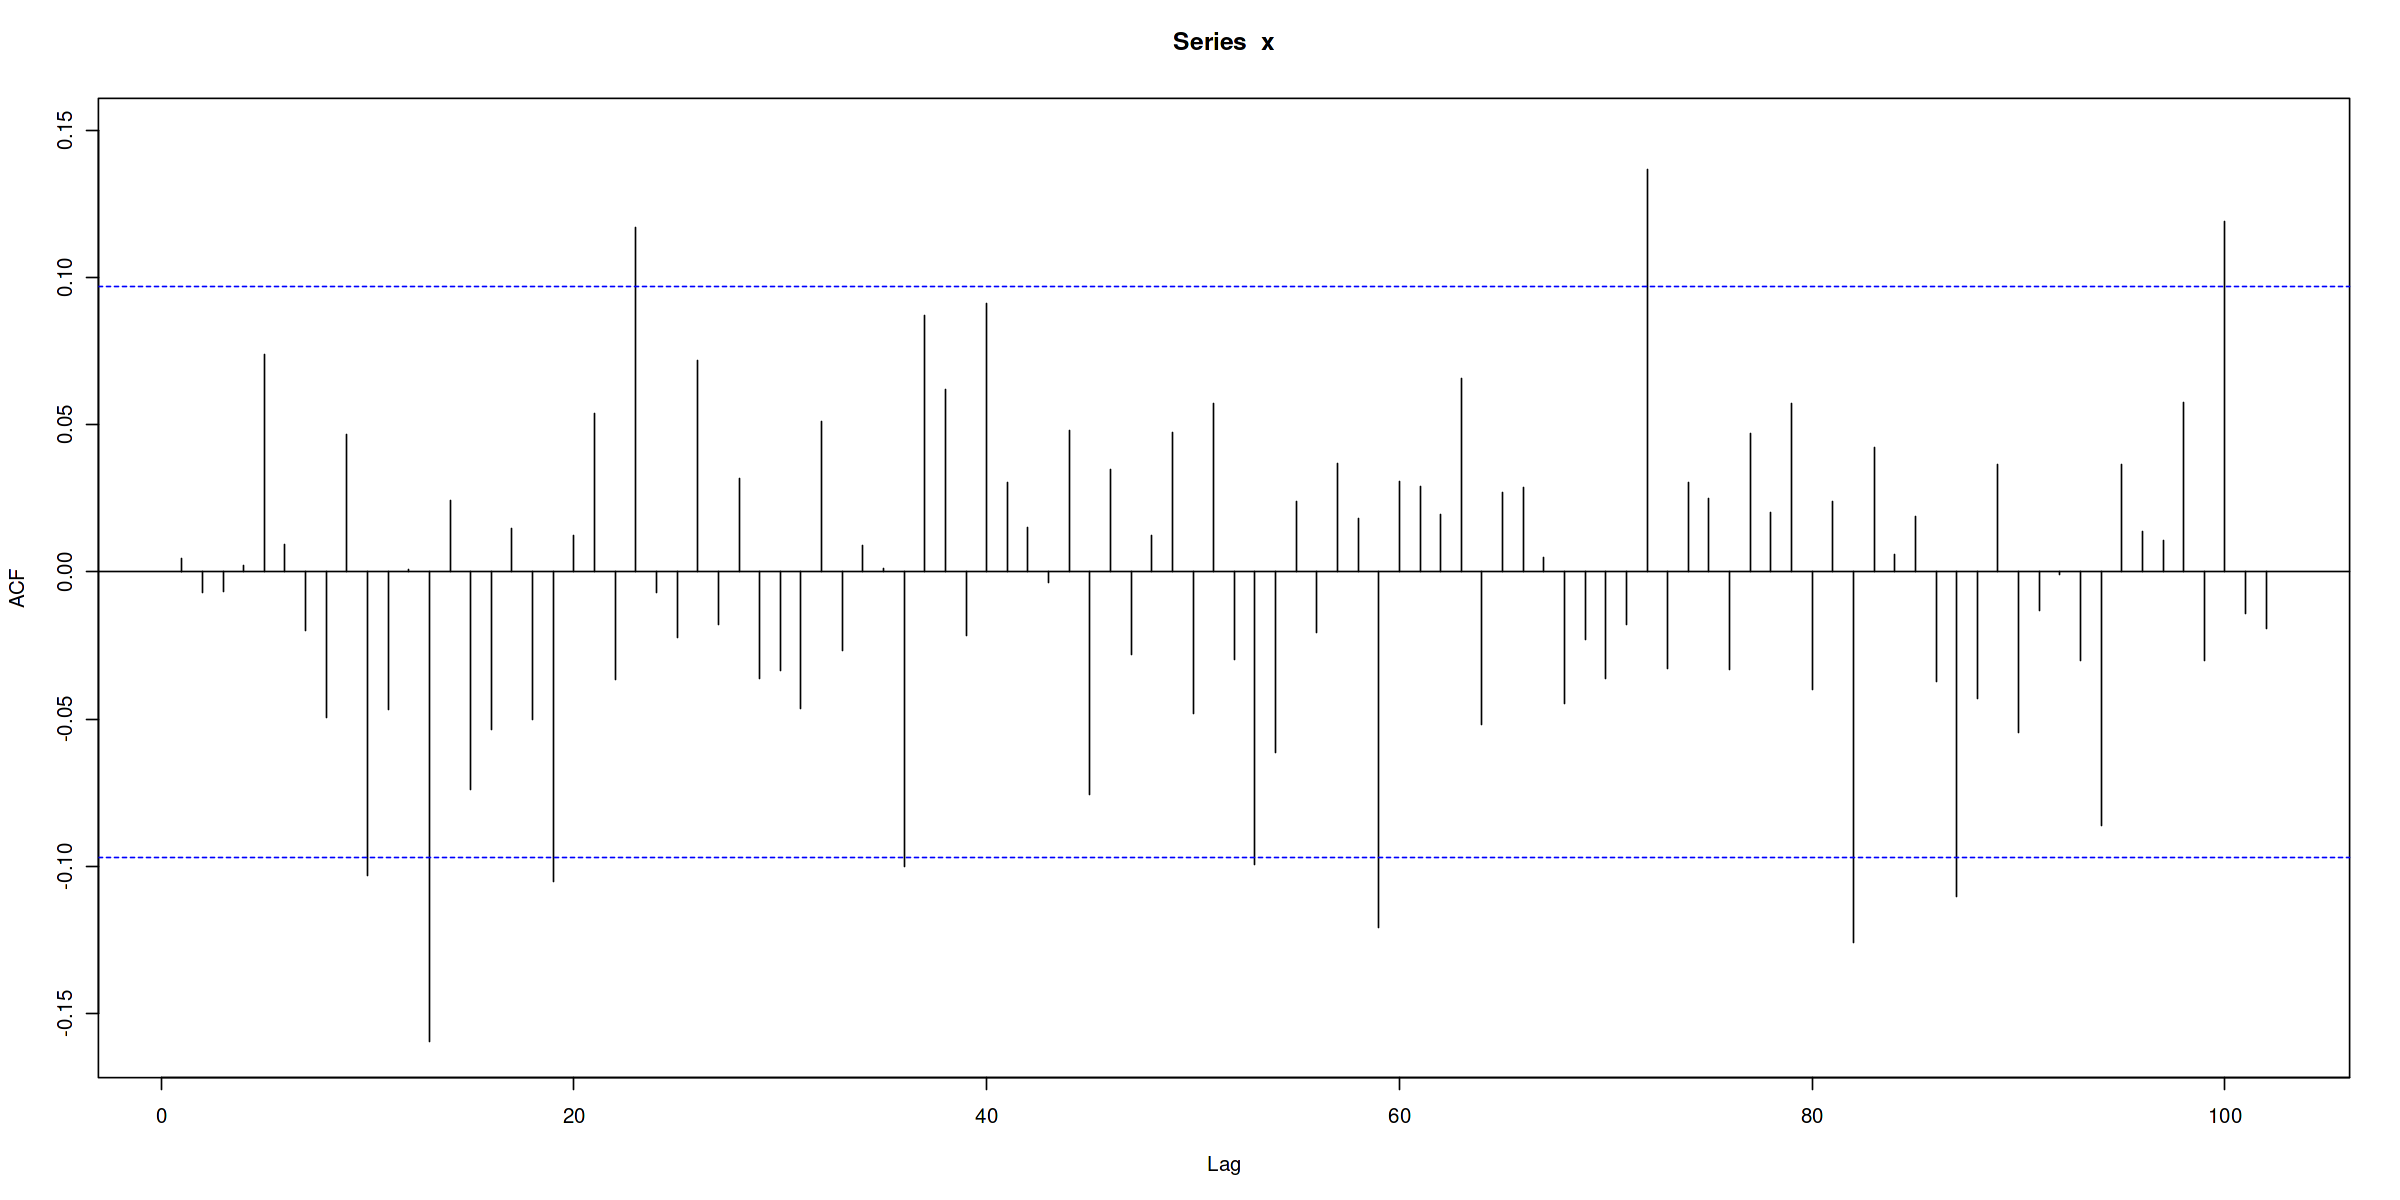

In [46]:
My.Ljung.Box(mod2$residuals,7)

Statistics P-value
Shapiro-Wilxs       0.9968    0.6070 
Lilliefors          0.0339    0.3074 
Pearson Chi.square 22.6863    0.3045

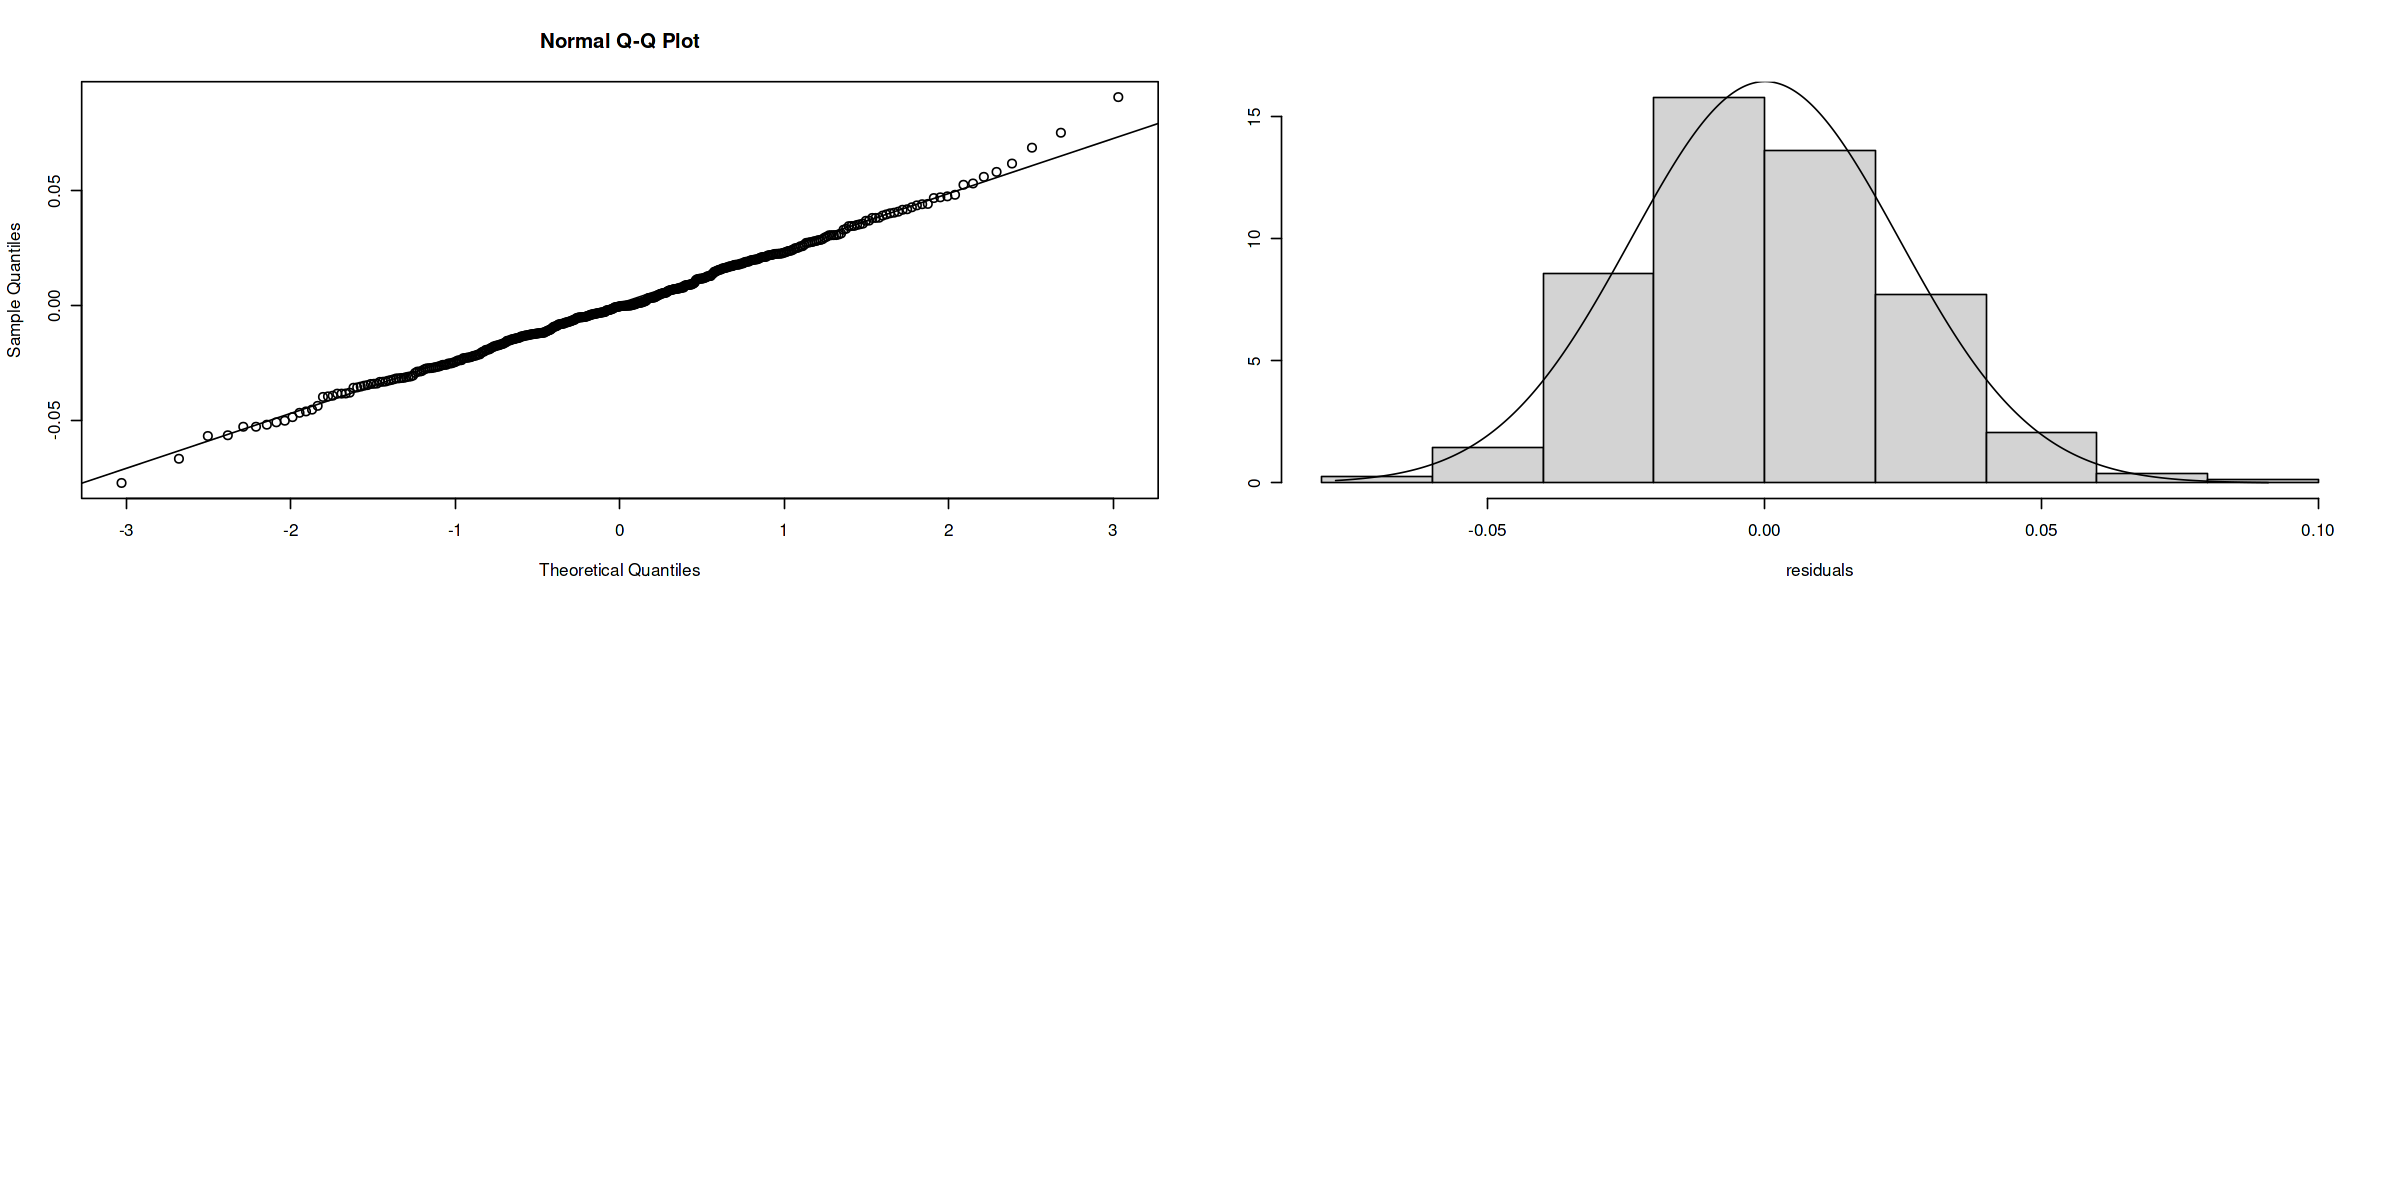

In [47]:
Check.normality(mod2$residuals)

In [48]:
n.res=length(mod2$residuals)
t.obs=mean(mod2$residuals)/ sqrt(var(mod2$residuals)/(n.res-1))  
p.value=1-pnorm(t.obs)
p.value

[1] 0.466096

### **Model fit and prediction**

Fit to the original data

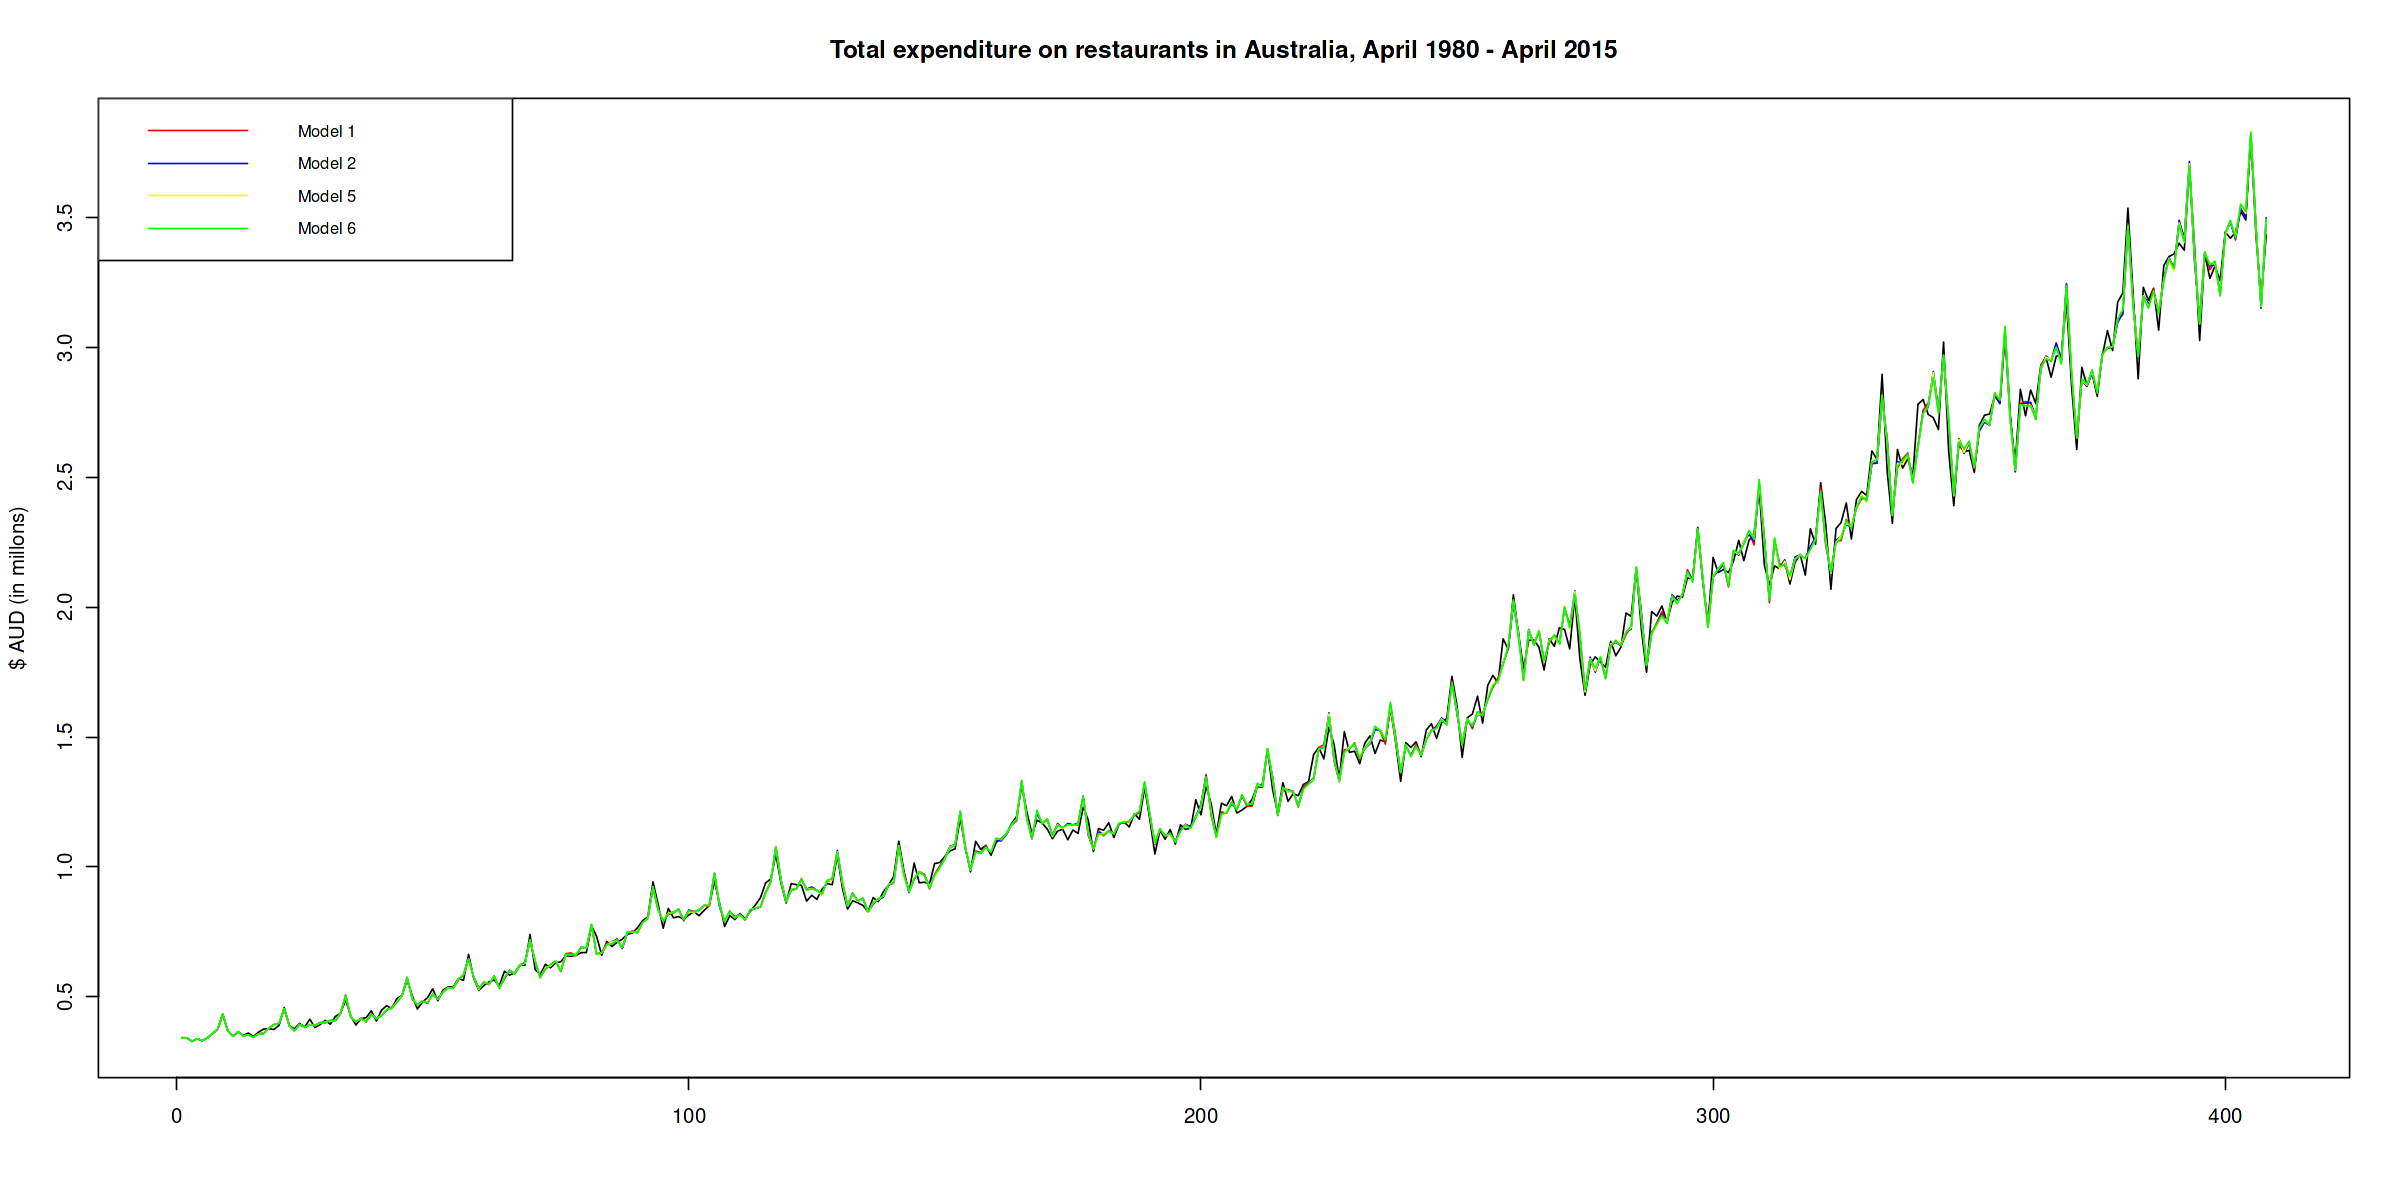

In [49]:
plot(seq(1,408), expenditure,ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia, April 1980 - April 2015")
points(seq(1,408),forecast(mod1)$fitted,col="red",type="l")
points(seq(1,408),forecast(mod2)$fitted,col="blue",type="l")
points(seq(1,408),forecast(mod5)$fitted,col="yellow",type="l")
points(seq(1,408),forecast(mod6)$fitted,col="green",type="l")

legend("topleft", 
       legend=c("Model 1", "Model 2", "Model 5", "Model 6"), 
       col=c("red", "blue", "yellow", "green"), 
       lty=1, 
       cex=0.8)

We fit the models using the first 396 observation and we forecast k step ahead with k=1,2,..,12.

<span style='font-size:large'>Model 1</span>


In [35]:
n.data=length(expenditure)
fit.mod1=Arima(expenditure[1:396],order=c(1,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)   
forcast.mod1 <- forecast(fit.mod1, h=12) #predictions

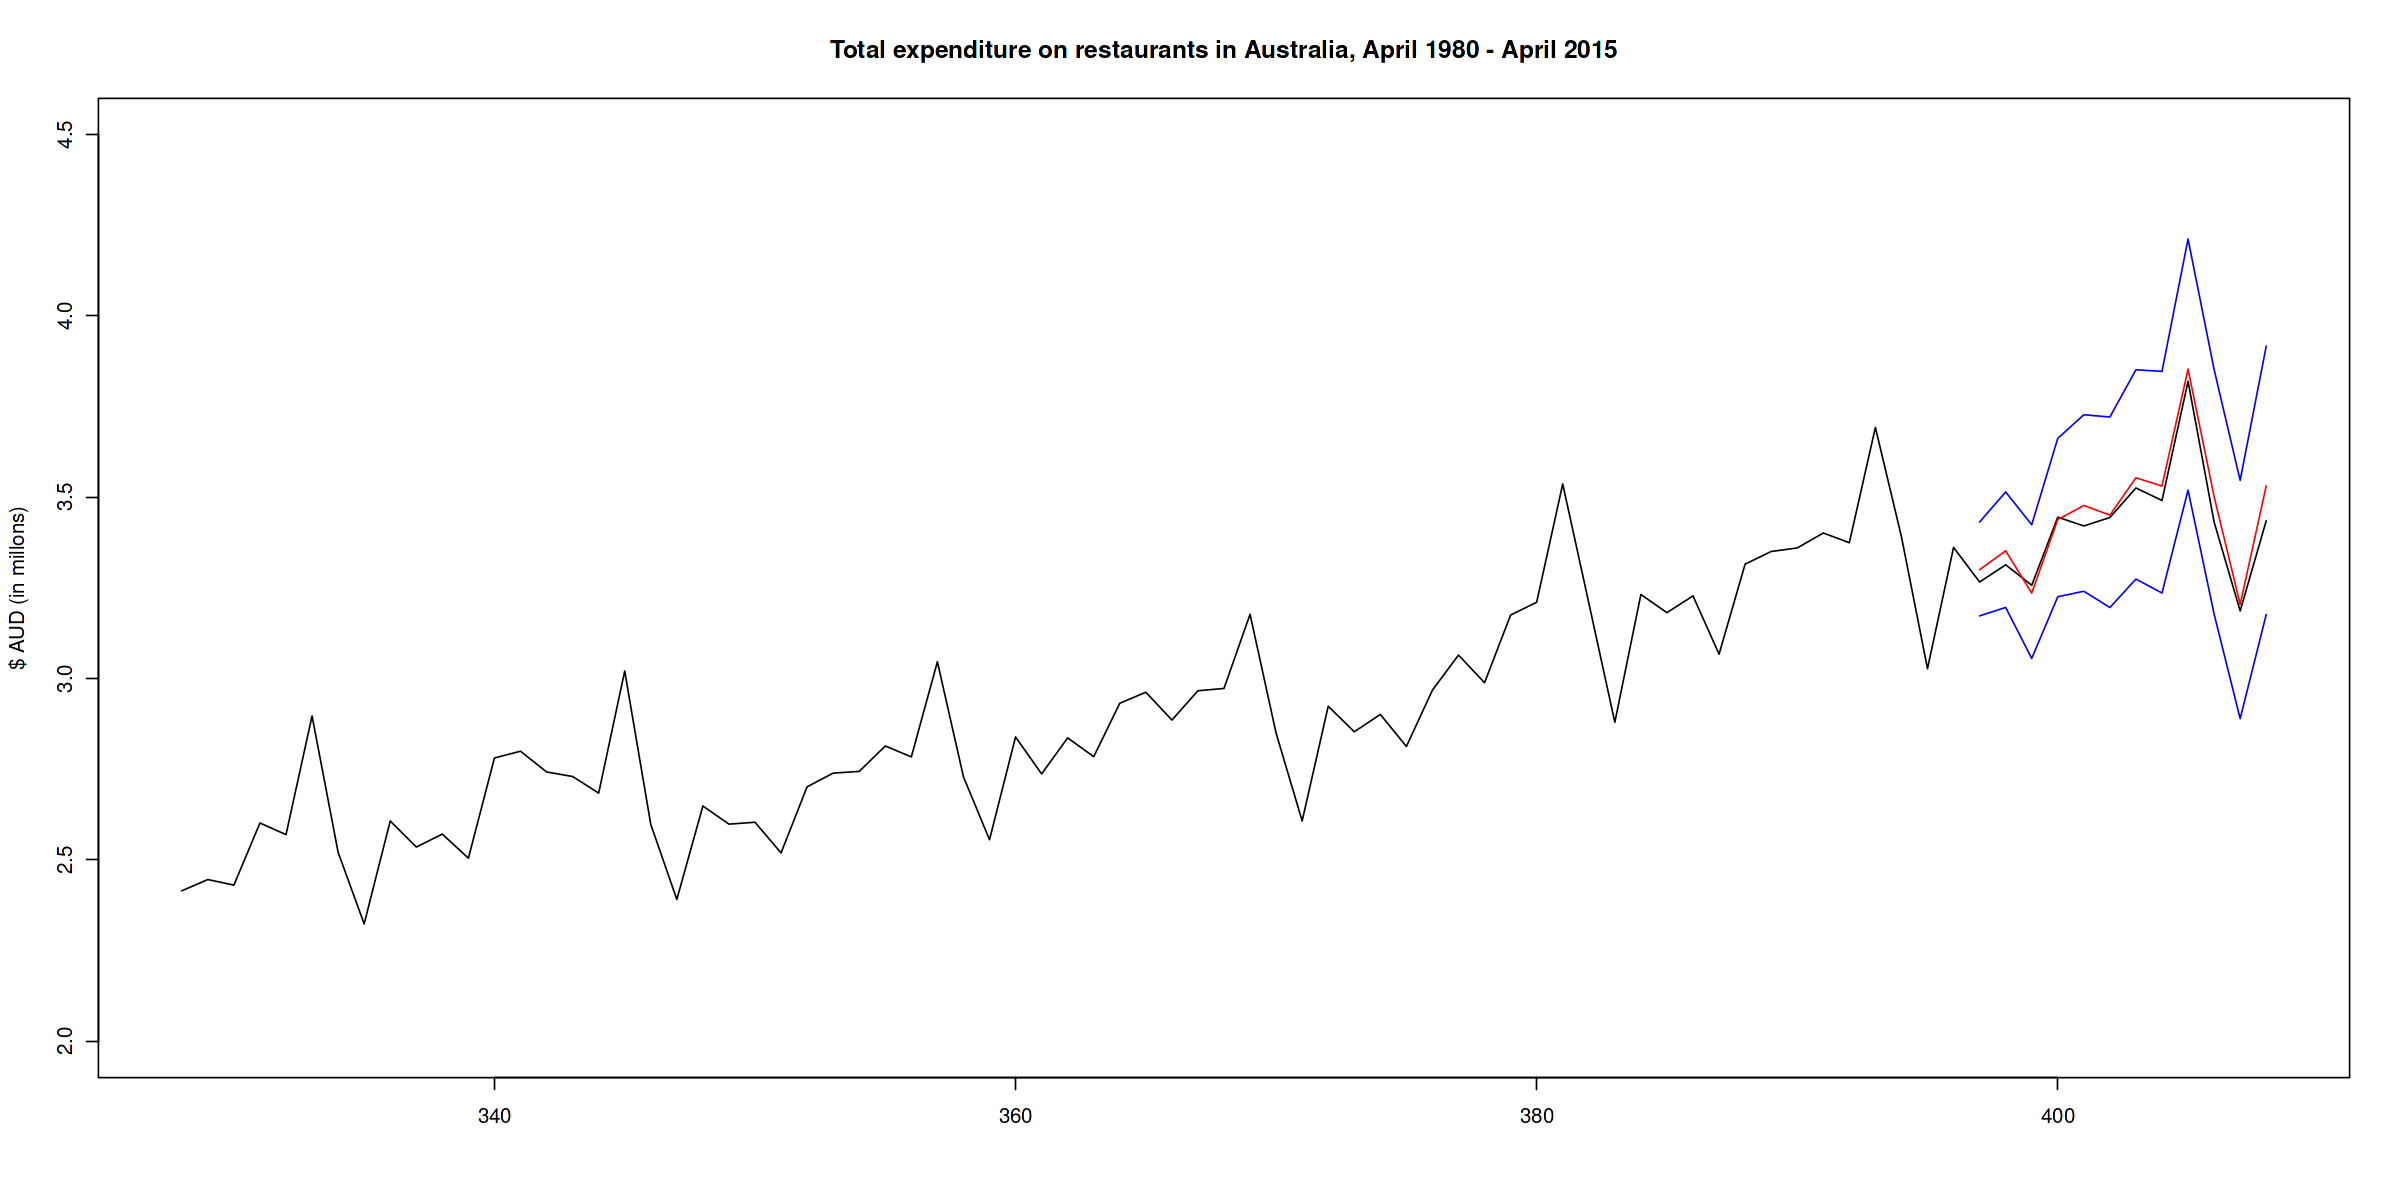

In [36]:
plot(seq(328,408), expenditure[328:408],ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia, April 1980 - April 2015",ylim=c(2,4.5))
points(seq(397,408),forcast.mod1$mean,type="l",col="red") # predictions
points(seq(397,408),forcast.mod1$lower[,2],type="l",col="blue") # lower CI
points(seq(397,408),forcast.mod1$upper[,2],type="l",col="blue") # up CI 

Prediction 10 steps ahead

In [37]:
Predic.mod1=forecast(mod1,10)
Predic.mod1

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
409       3.389950 3.305364 3.476258 3.261276 3.522653
410       3.432749 3.329314 3.538740 3.275577 3.595898
411       3.342907 3.222586 3.466795 3.160310 3.533849
412       3.533732 3.392082 3.680076 3.318958 3.759485
413       3.559333 3.402257 3.722157 3.321381 3.810732
414       3.538077 3.368627 3.714279 3.281591 3.810355
415       3.653610 3.467248 3.847902 3.371719 3.954048
416       3.630463 3.433472 3.836394 3.332709 3.949128
417       3.963799 3.740687 4.197433 3.626714 4.325495
418       3.586871 3.370781 3.813903 3.260683 3.938656

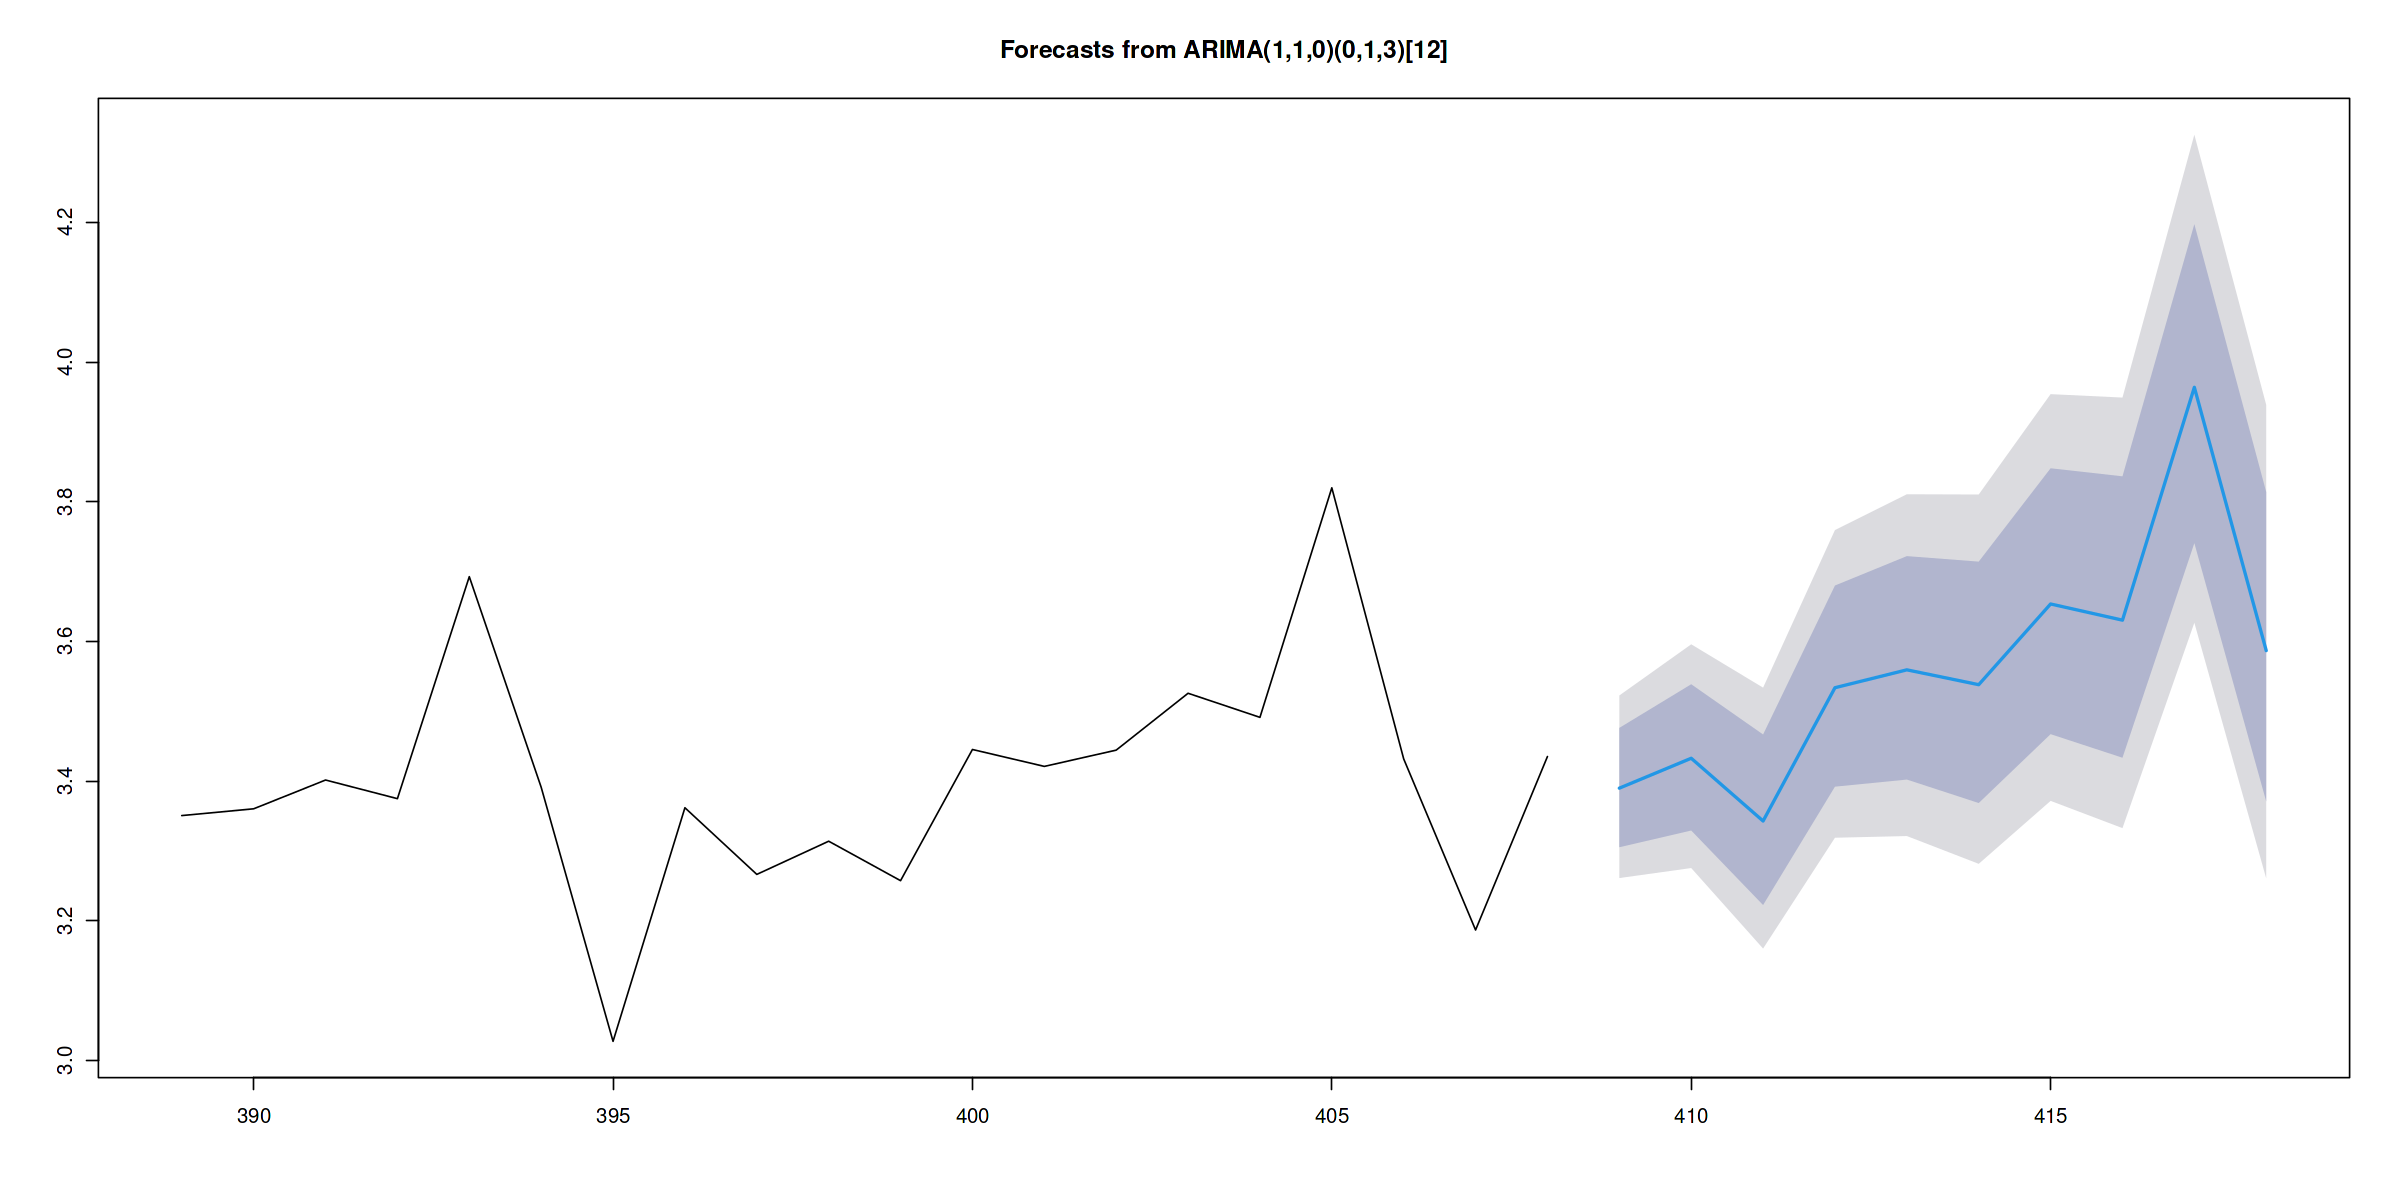

In [38]:
plot(Predic.mod1,20)

<span style='font-size:large'>Model 2</span>



In [39]:
n.data=length(expenditure)
fit.mod2=Arima(expenditure[1:396],order=c(3,1,0),seasonal=list(order=c(0,1,3),period=12),lambda=0.2)   
forcast.mod2 <- forecast(fit.mod2, h=12) #predictions

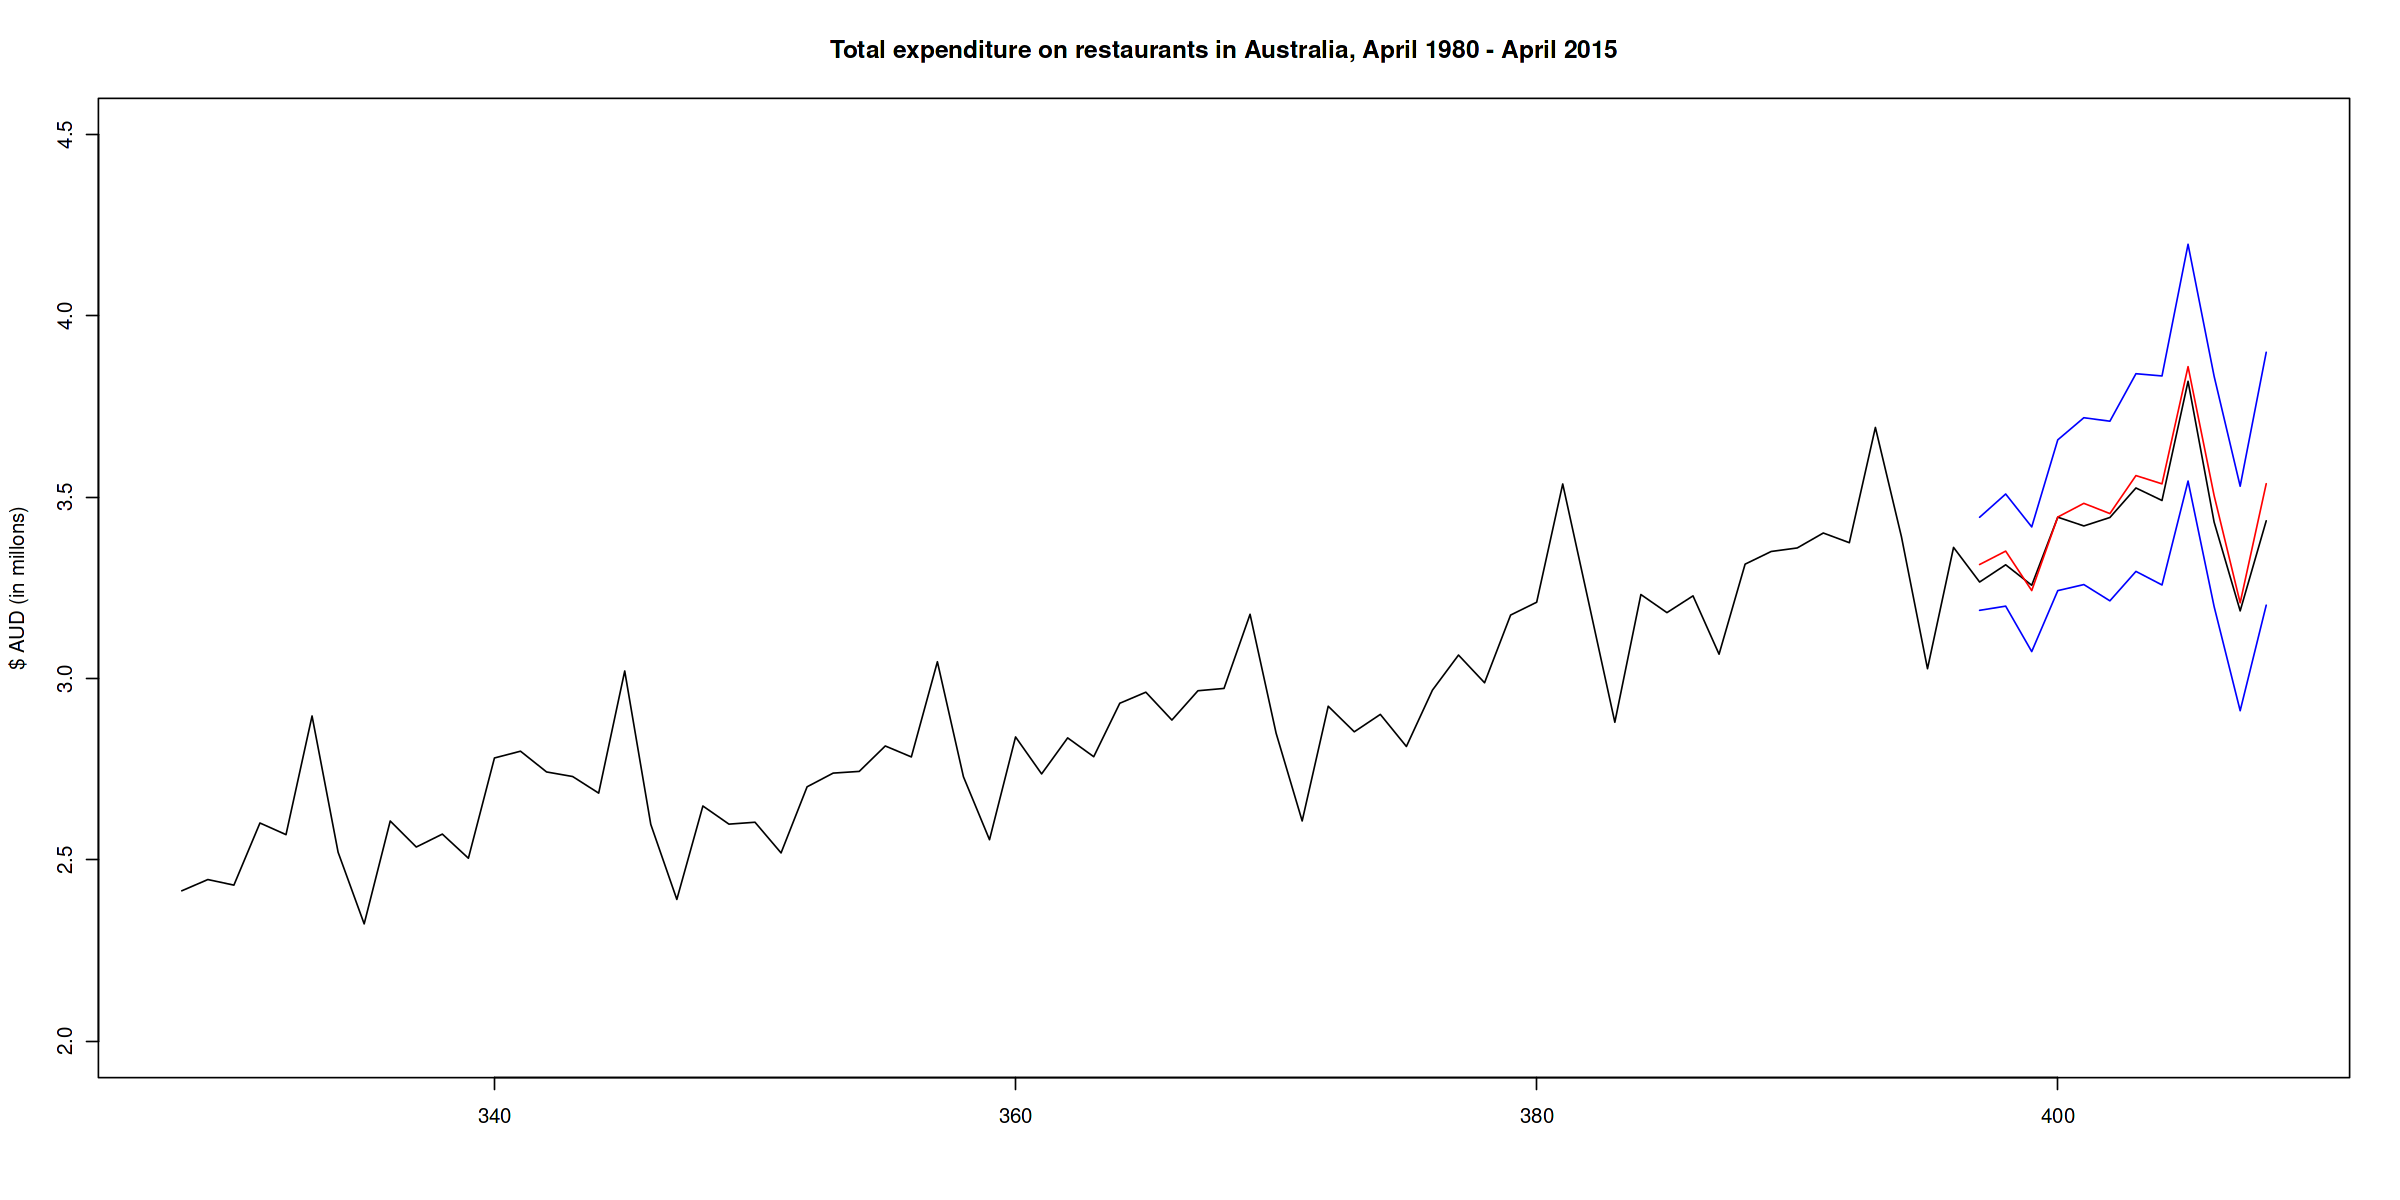

In [40]:
plot(seq(328,408), expenditure[328:408],ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia, April 1980 - April 2015",ylim=c(2,4.5))
points(seq(397,408),forcast.mod2$mean,type="l",col="red") # predictions
points(seq(397,408),forcast.mod2$lower[,2],type="l",col="blue") # lower CI
points(seq(397,408),forcast.mod2$upper[,2],type="l",col="blue") # up CI 

Prediction 10 steps ahead

In [41]:
Predic.mod2=forecast(mod2,10)
Predic.mod2

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
409       3.385125 3.301621 3.470310 3.258089 3.516093
410       3.442100 3.341400 3.545214 3.289055 3.600791
411       3.338048 3.226116 3.453067 3.168090 3.515224
412       3.535438 3.400663 3.674452 3.331001 3.749791
413       3.563396 3.414902 3.717012 3.338322 3.800449
414       3.538103 3.378351 3.703841 3.296151 3.794059
415       3.655384 3.479425 3.838392 3.389060 3.938194
416       3.632709 3.446897 3.826450 3.351660 3.932305
417       3.966141 3.755771 4.185835 3.648078 4.306012
418       3.588264 3.384559 3.801662 3.280532 3.918667

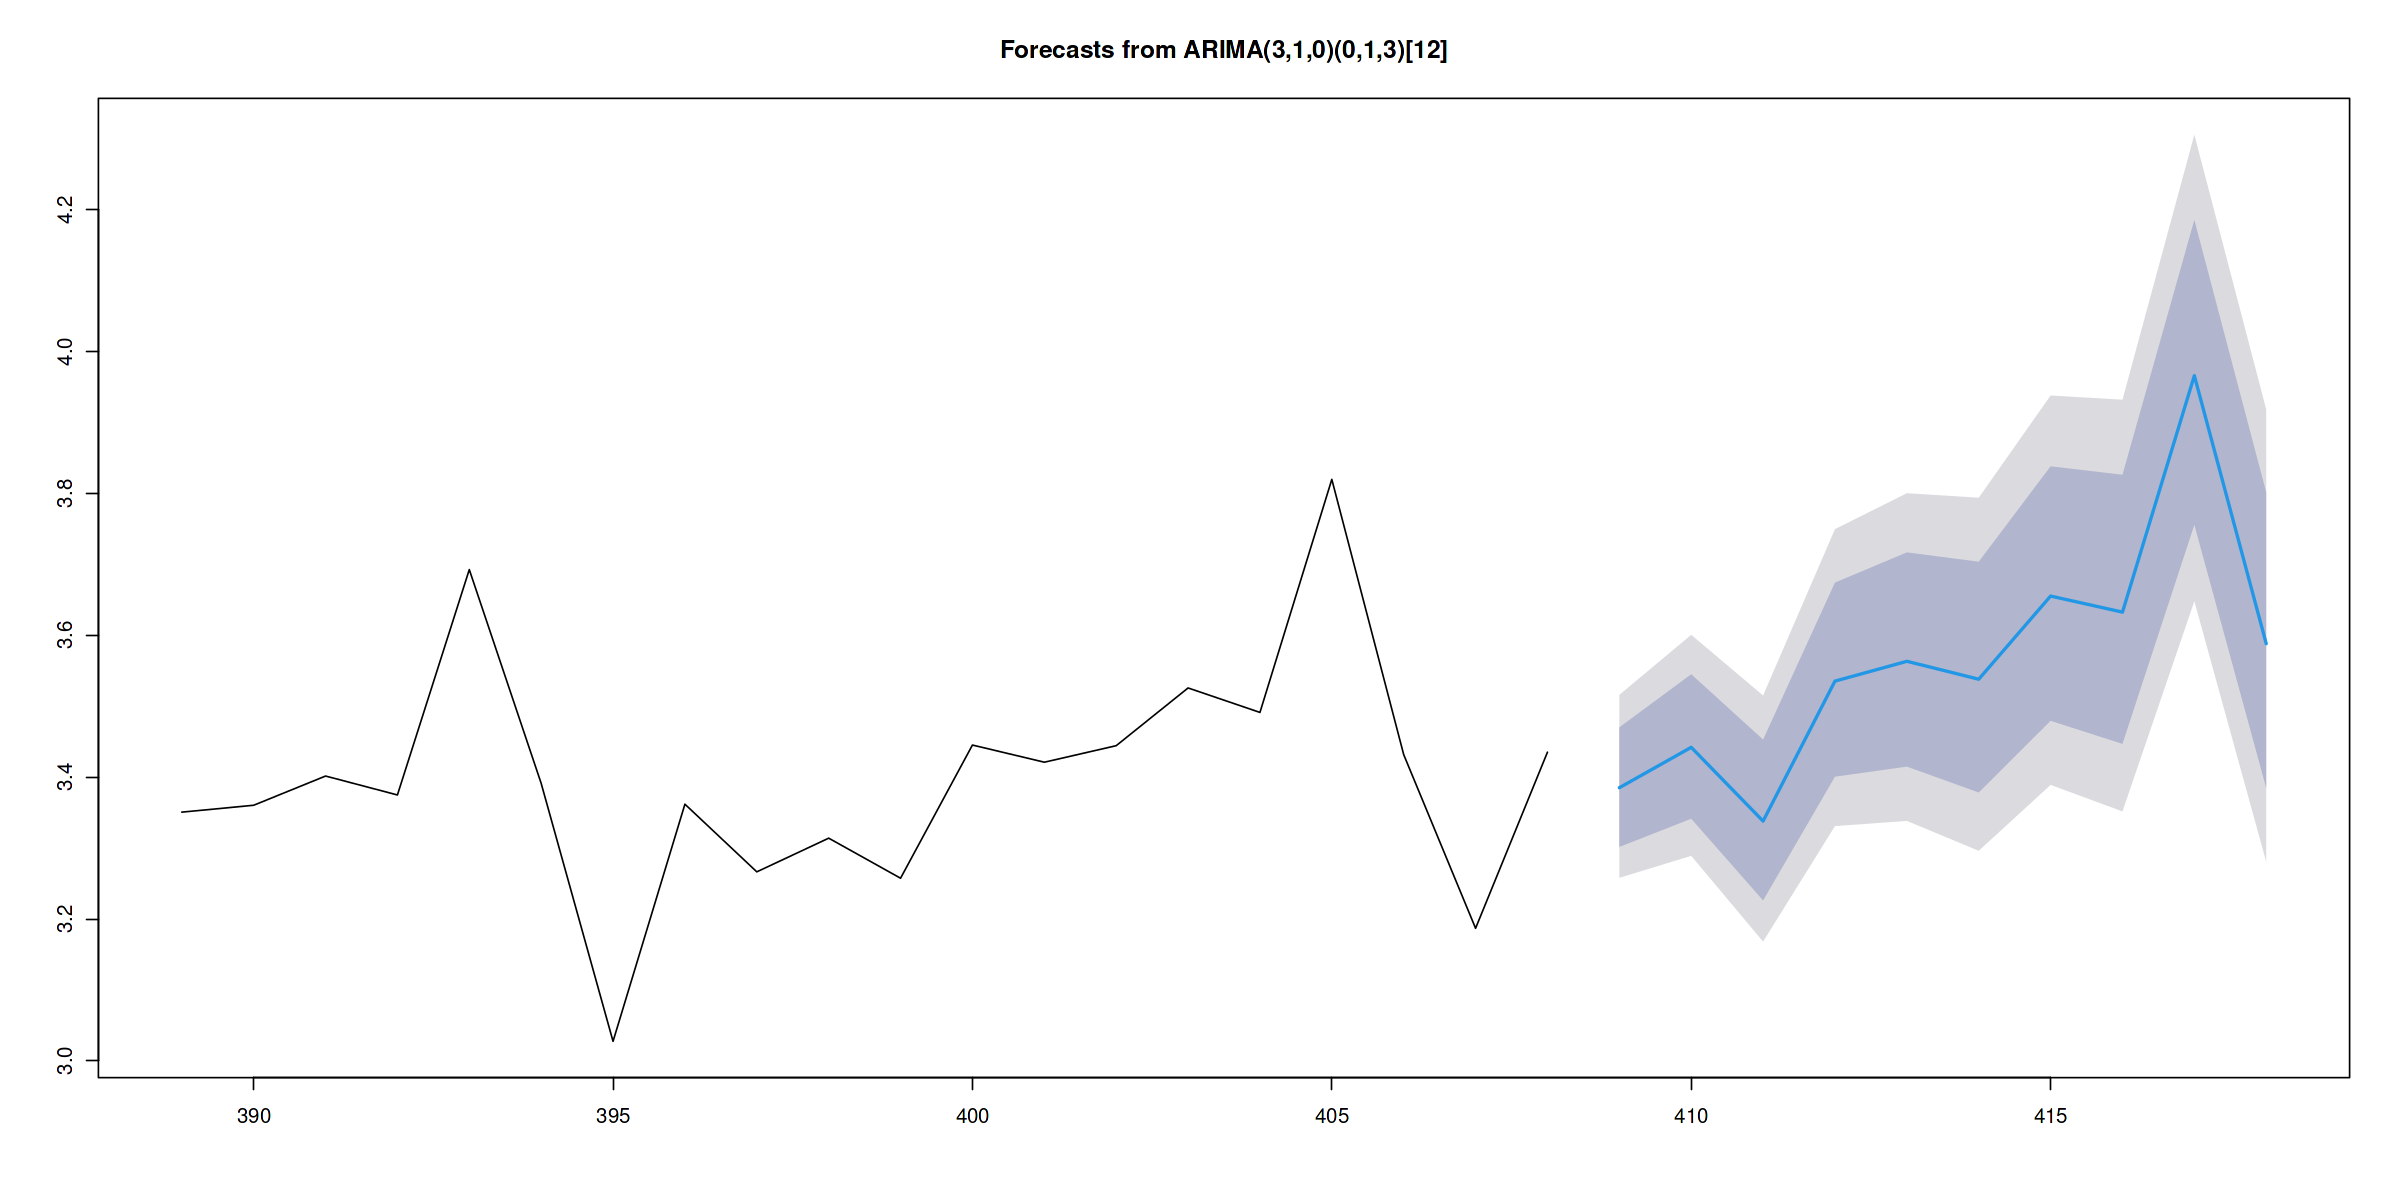

In [42]:
plot(Predic.mod2,20)

<span style='font-size:large'>Model 5</span>


In [43]:
n.data=length(expenditure)
fit.mod5=Arima(expenditure[1:396],order=c(3,1,0),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)   
forcast.mod5 <- forecast(fit.mod5, h=12) #predictions

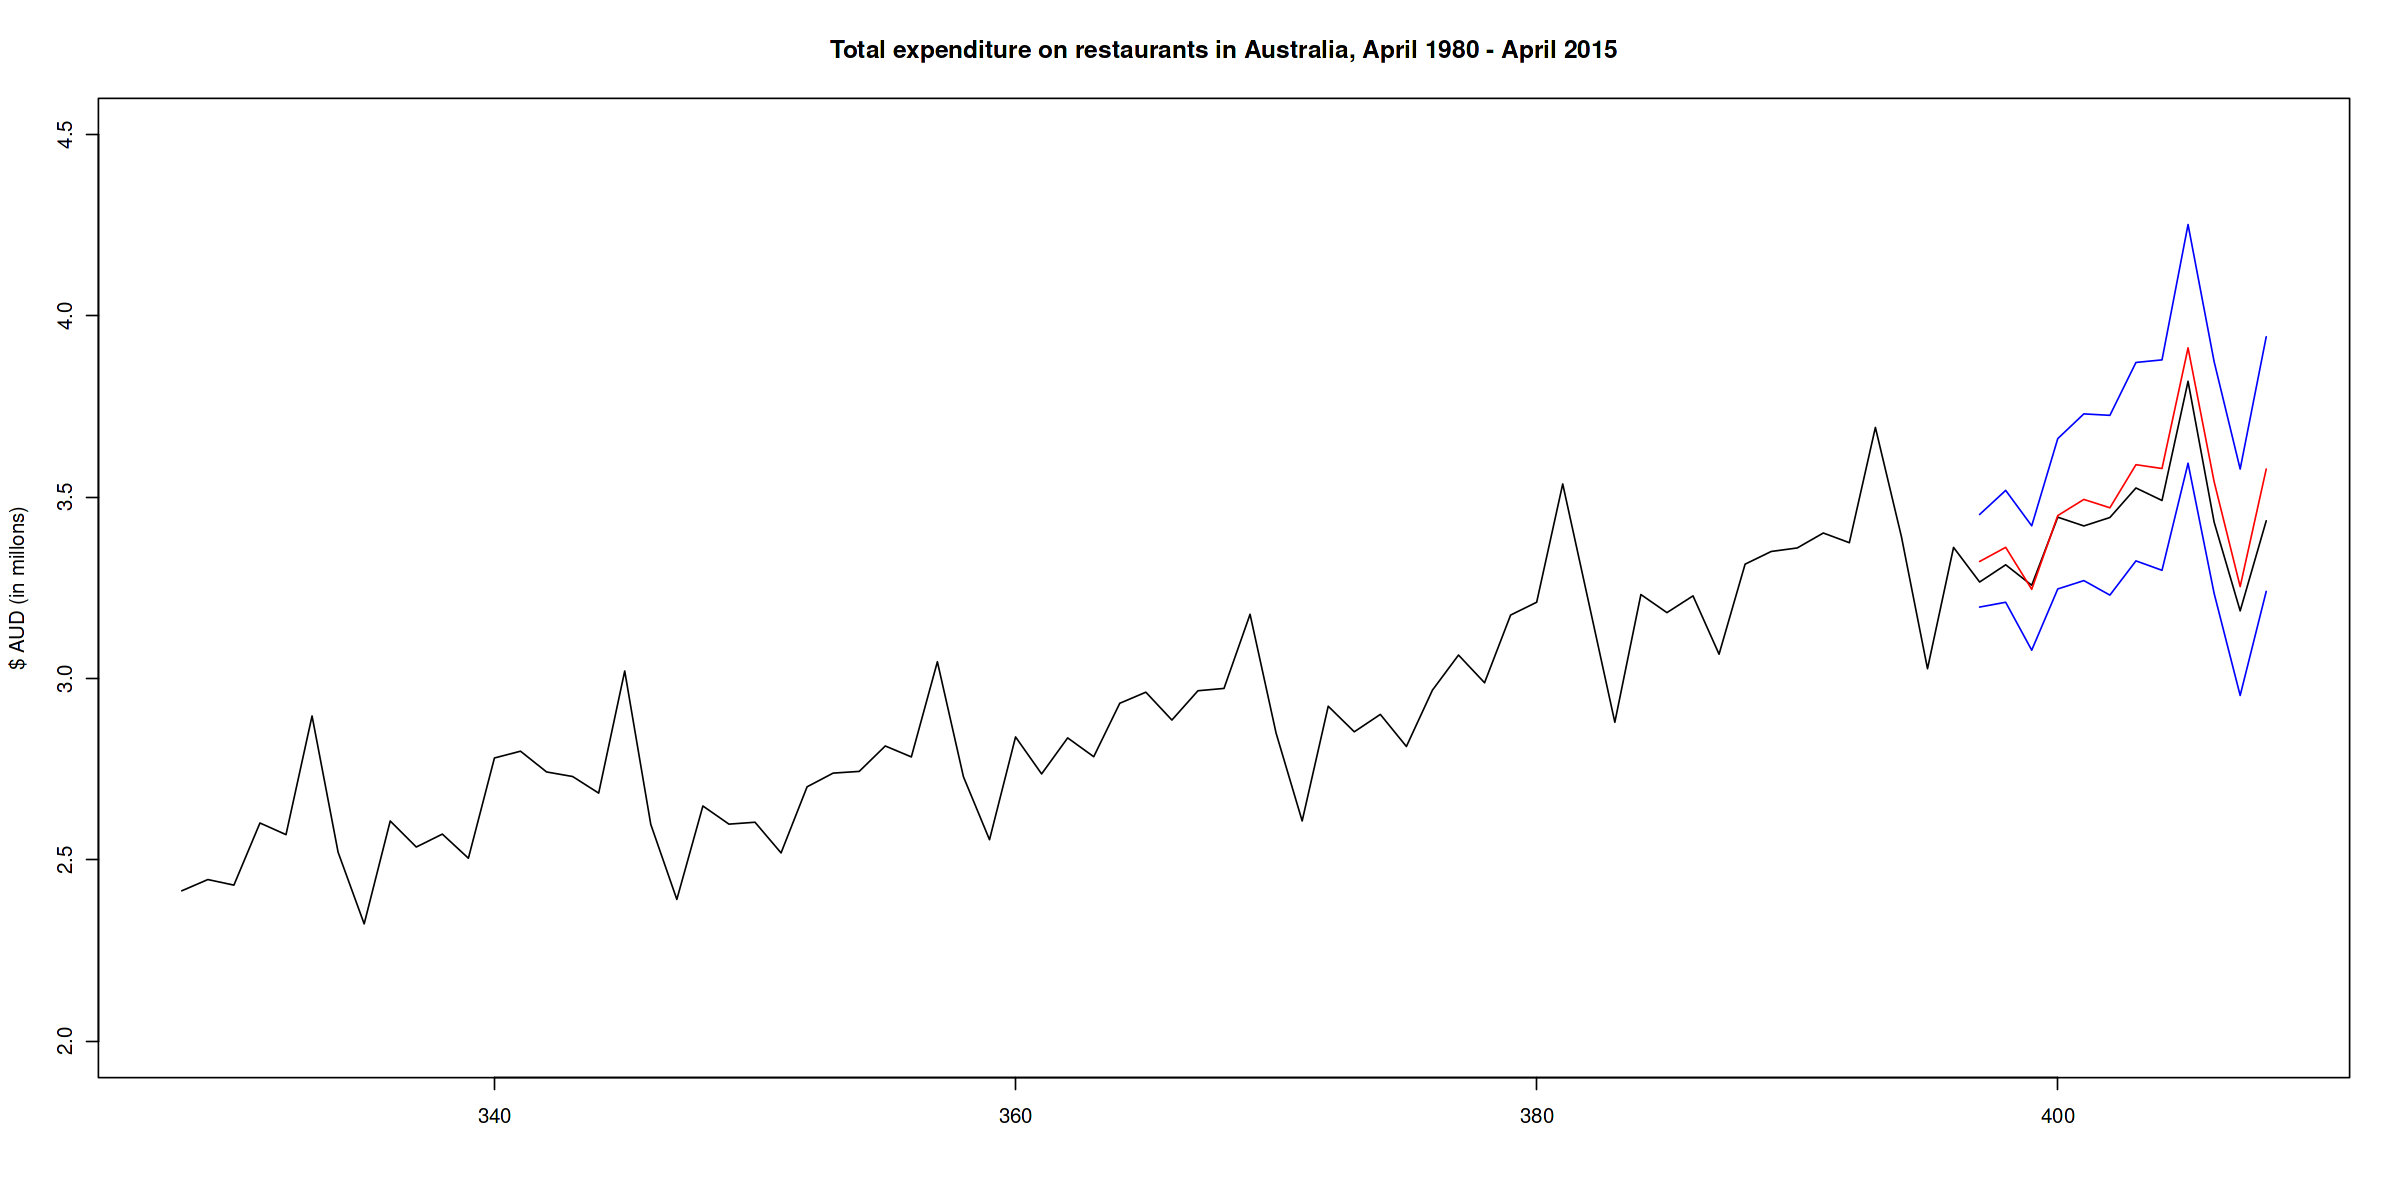

In [44]:
plot(seq(328,408), expenditure[328:408],ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia, April 1980 - April 2015",ylim=c(2,4.5))
points(seq(397,408),forcast.mod5$mean,type="l",col="red") # predictions
points(seq(397,408),forcast.mod5$lower[,2],type="l",col="blue") # lower CI
points(seq(397,408),forcast.mod5$upper[,2],type="l",col="blue") # up CI 

Prediction 10 steps ahead

In [45]:
Predic.mod5=forecast(mod5,10)
Predic.mod5

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
409       3.374298 3.291572 3.458679 3.248441 3.504026
410       3.428994 3.328921 3.531460 3.276900 3.586685
411       3.328766 3.217251 3.443352 3.159440 3.505275
412       3.524071 3.389888 3.662470 3.320530 3.737474
413       3.538962 3.391437 3.691577 3.315358 3.774471
414       3.521435 3.362392 3.686441 3.280558 3.776259
415       3.617099 3.442719 3.798474 3.353169 3.897391
416       3.580964 3.397340 3.772443 3.303231 3.877071
417       3.904337 3.696641 4.121264 3.590330 4.239939
418       3.551390 3.349385 3.763026 3.246235 3.879074

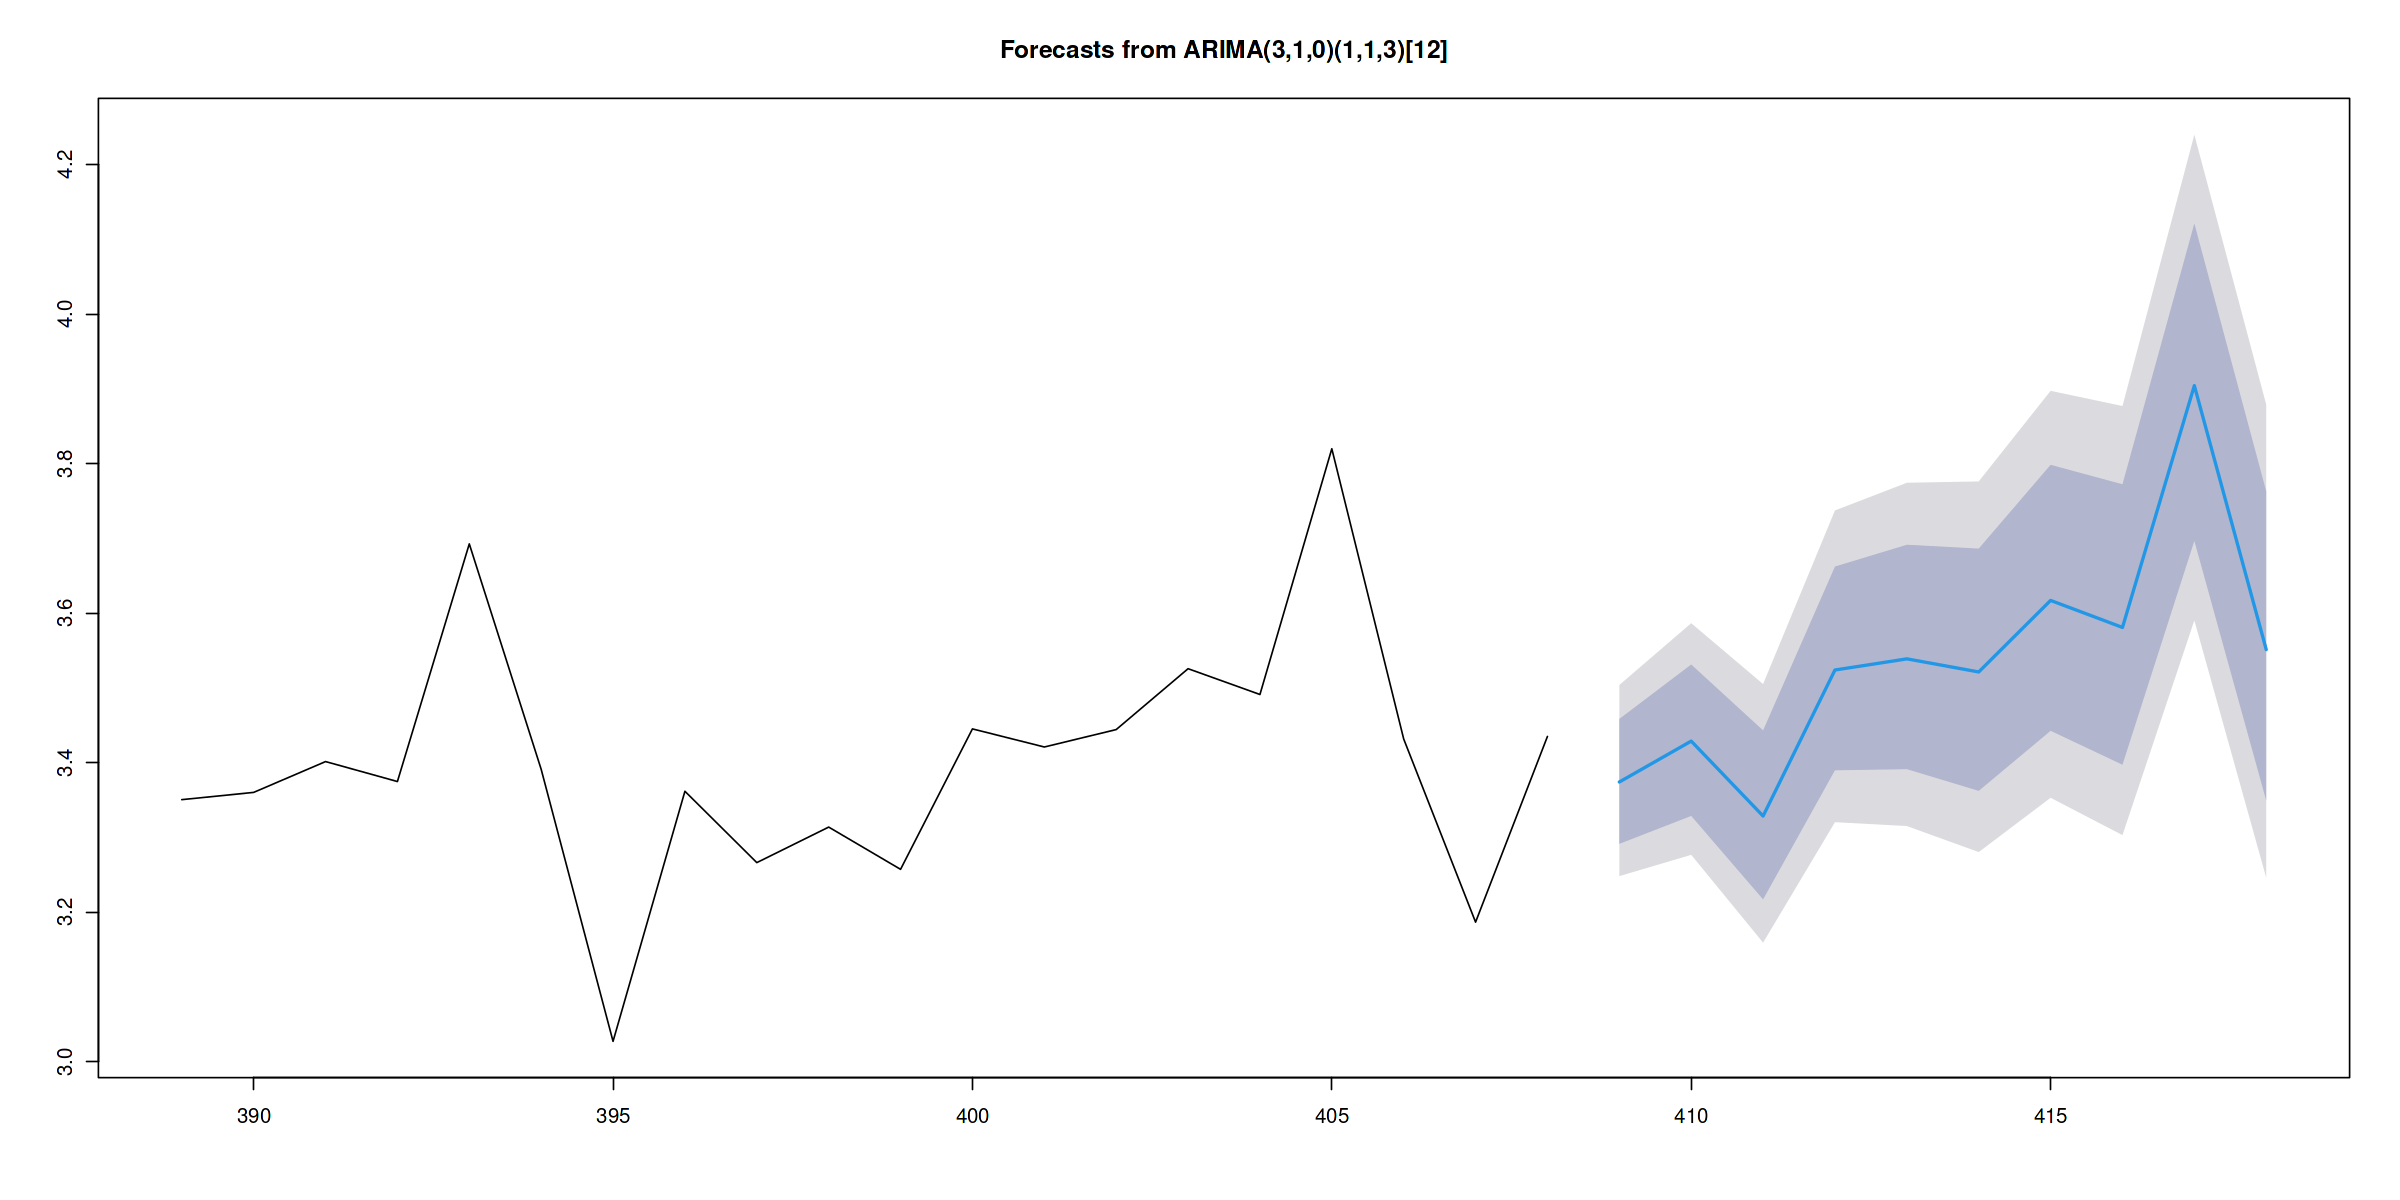

In [46]:
plot(Predic.mod5,20)

<span style='font-size:large'>Model 6</span>


In [47]:
n.data=length(expenditure)
fit.mod6=Arima(expenditure[1:396],order=c(1,1,1),seasonal=list(order=c(1,1,3),period=12),lambda=0.2)   
forcast.mod6 <- forecast(fit.mod6, h=12) #predictions

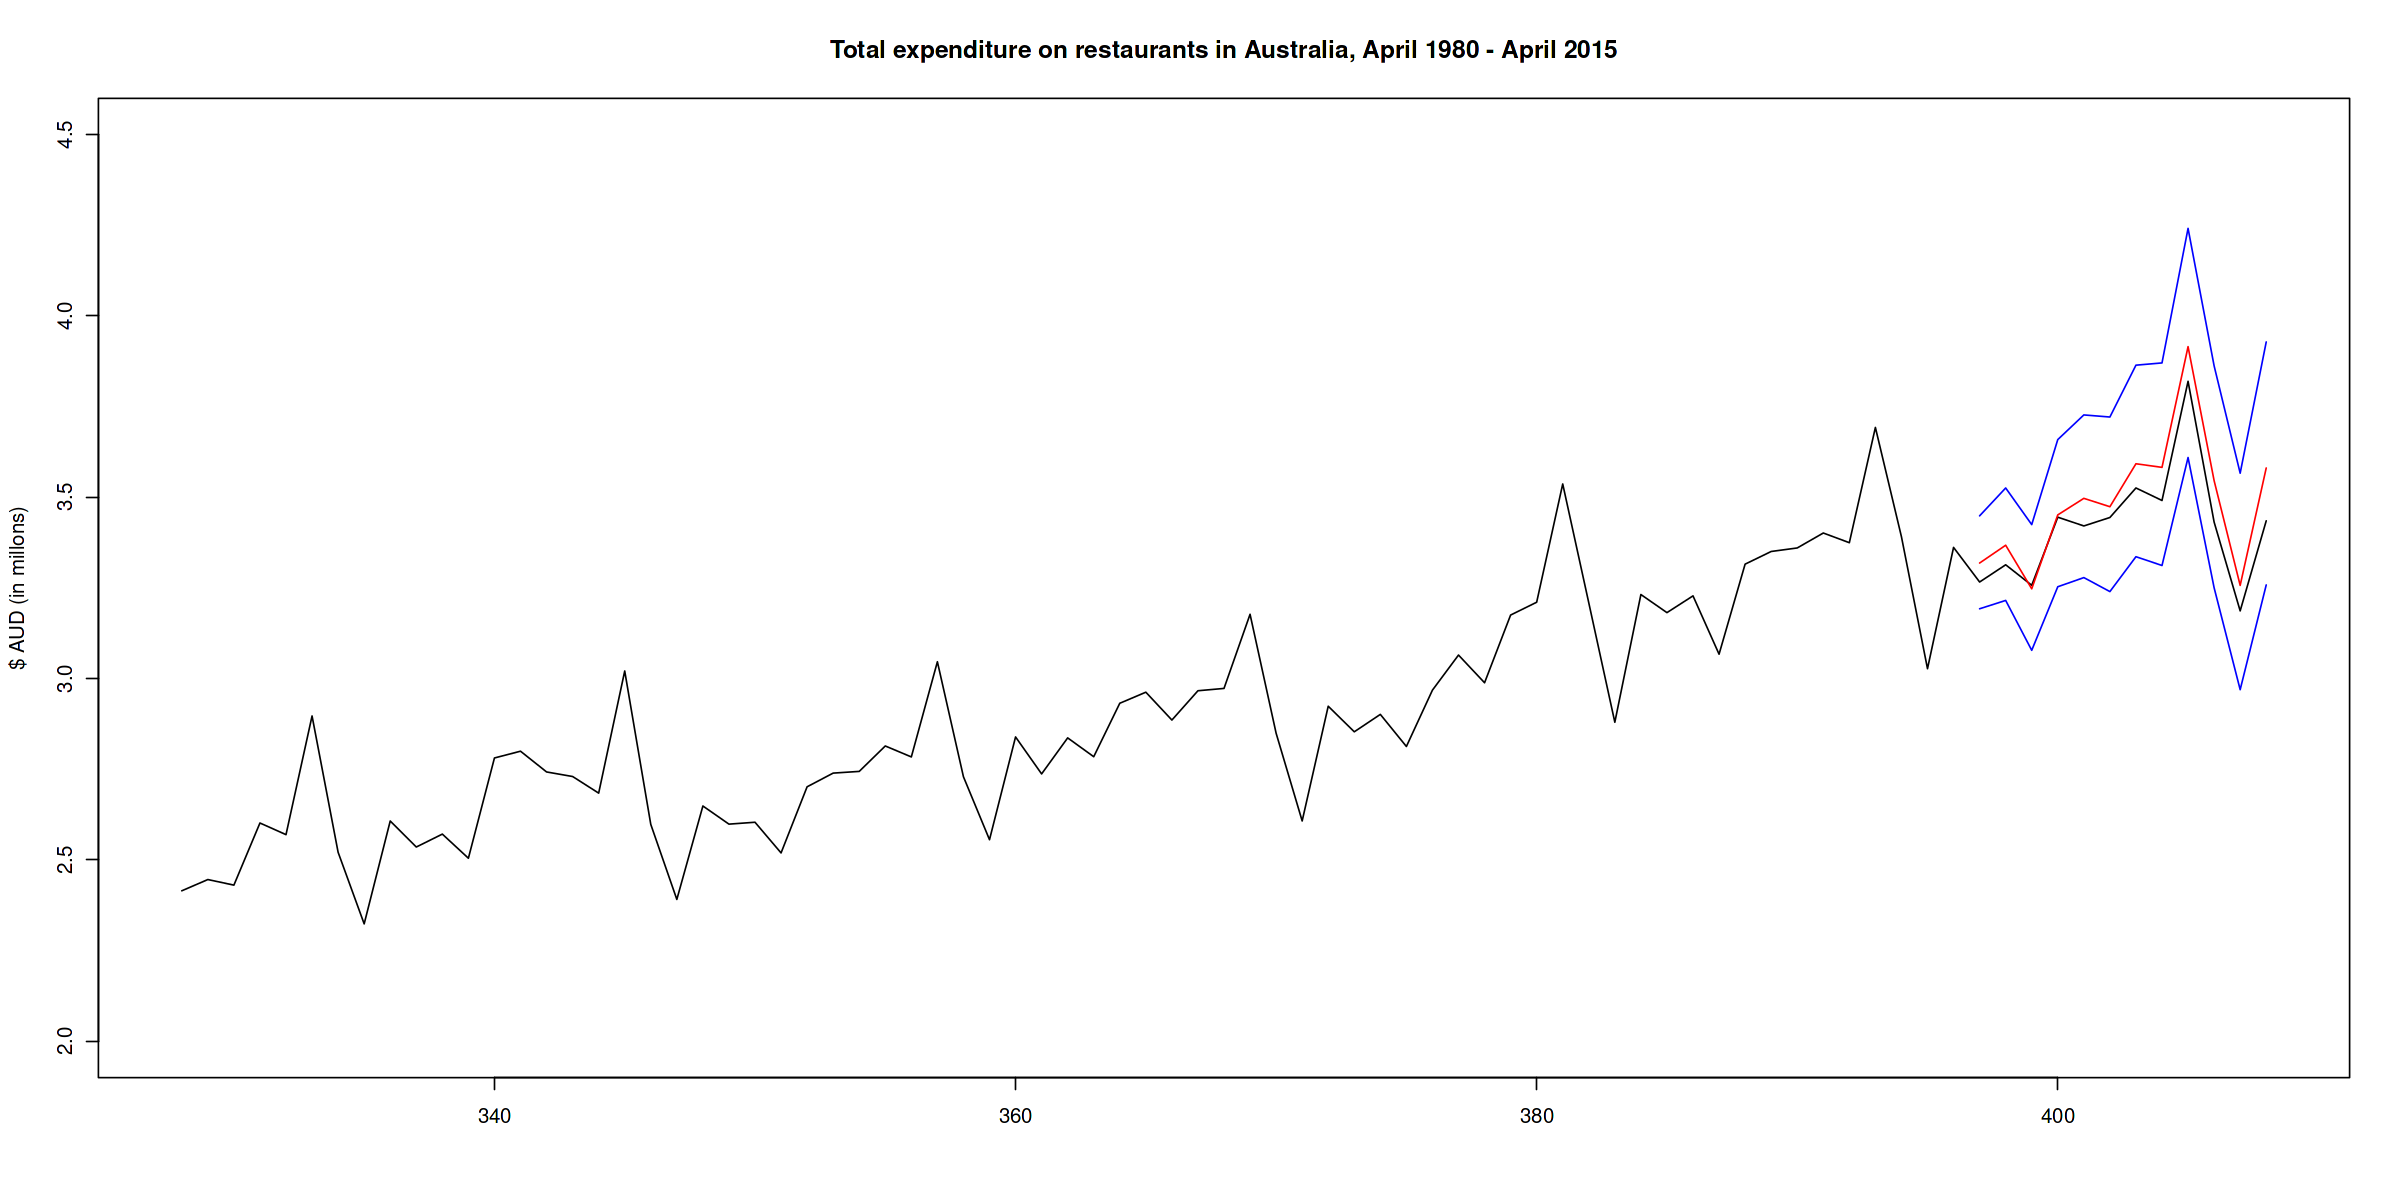

In [48]:
plot(seq(328,408), expenditure[328:408],ylab="$ AUD (in millons)",xlab="",type="l",main="Total expenditure on restaurants in Australia, April 1980 - April 2015",ylim=c(2,4.5))
points(seq(397,408),forcast.mod6$mean,type="l",col="red") # predictions
points(seq(397,408),forcast.mod6$lower[,2],type="l",col="blue") # lower CI
points(seq(397,408),forcast.mod6$upper[,2],type="l",col="blue") # up CI 

Prediction 10 steps ahead

In [49]:
Predic.mod6=forecast(mod6,10)
Predic.mod6

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
409       3.377781 3.294535 3.462701 3.251136 3.508341
410       3.425746 3.325349 3.528553 3.273163 3.583966
411       3.335119 3.222257 3.451122 3.163761 3.513824
412       3.525791 3.394408 3.661212 3.326460 3.734565
413       3.540076 3.396142 3.688849 3.321866 3.769605
414       3.524094 3.369589 3.684215 3.290021 3.771303
415       3.619044 3.450668 3.793929 3.364108 3.889207
416       3.582618 3.405808 3.766697 3.315077 3.867161
417       3.906030 3.706574 4.113982 3.604337 4.227596
418       3.553639 3.360057 3.756042 3.261052 3.866860

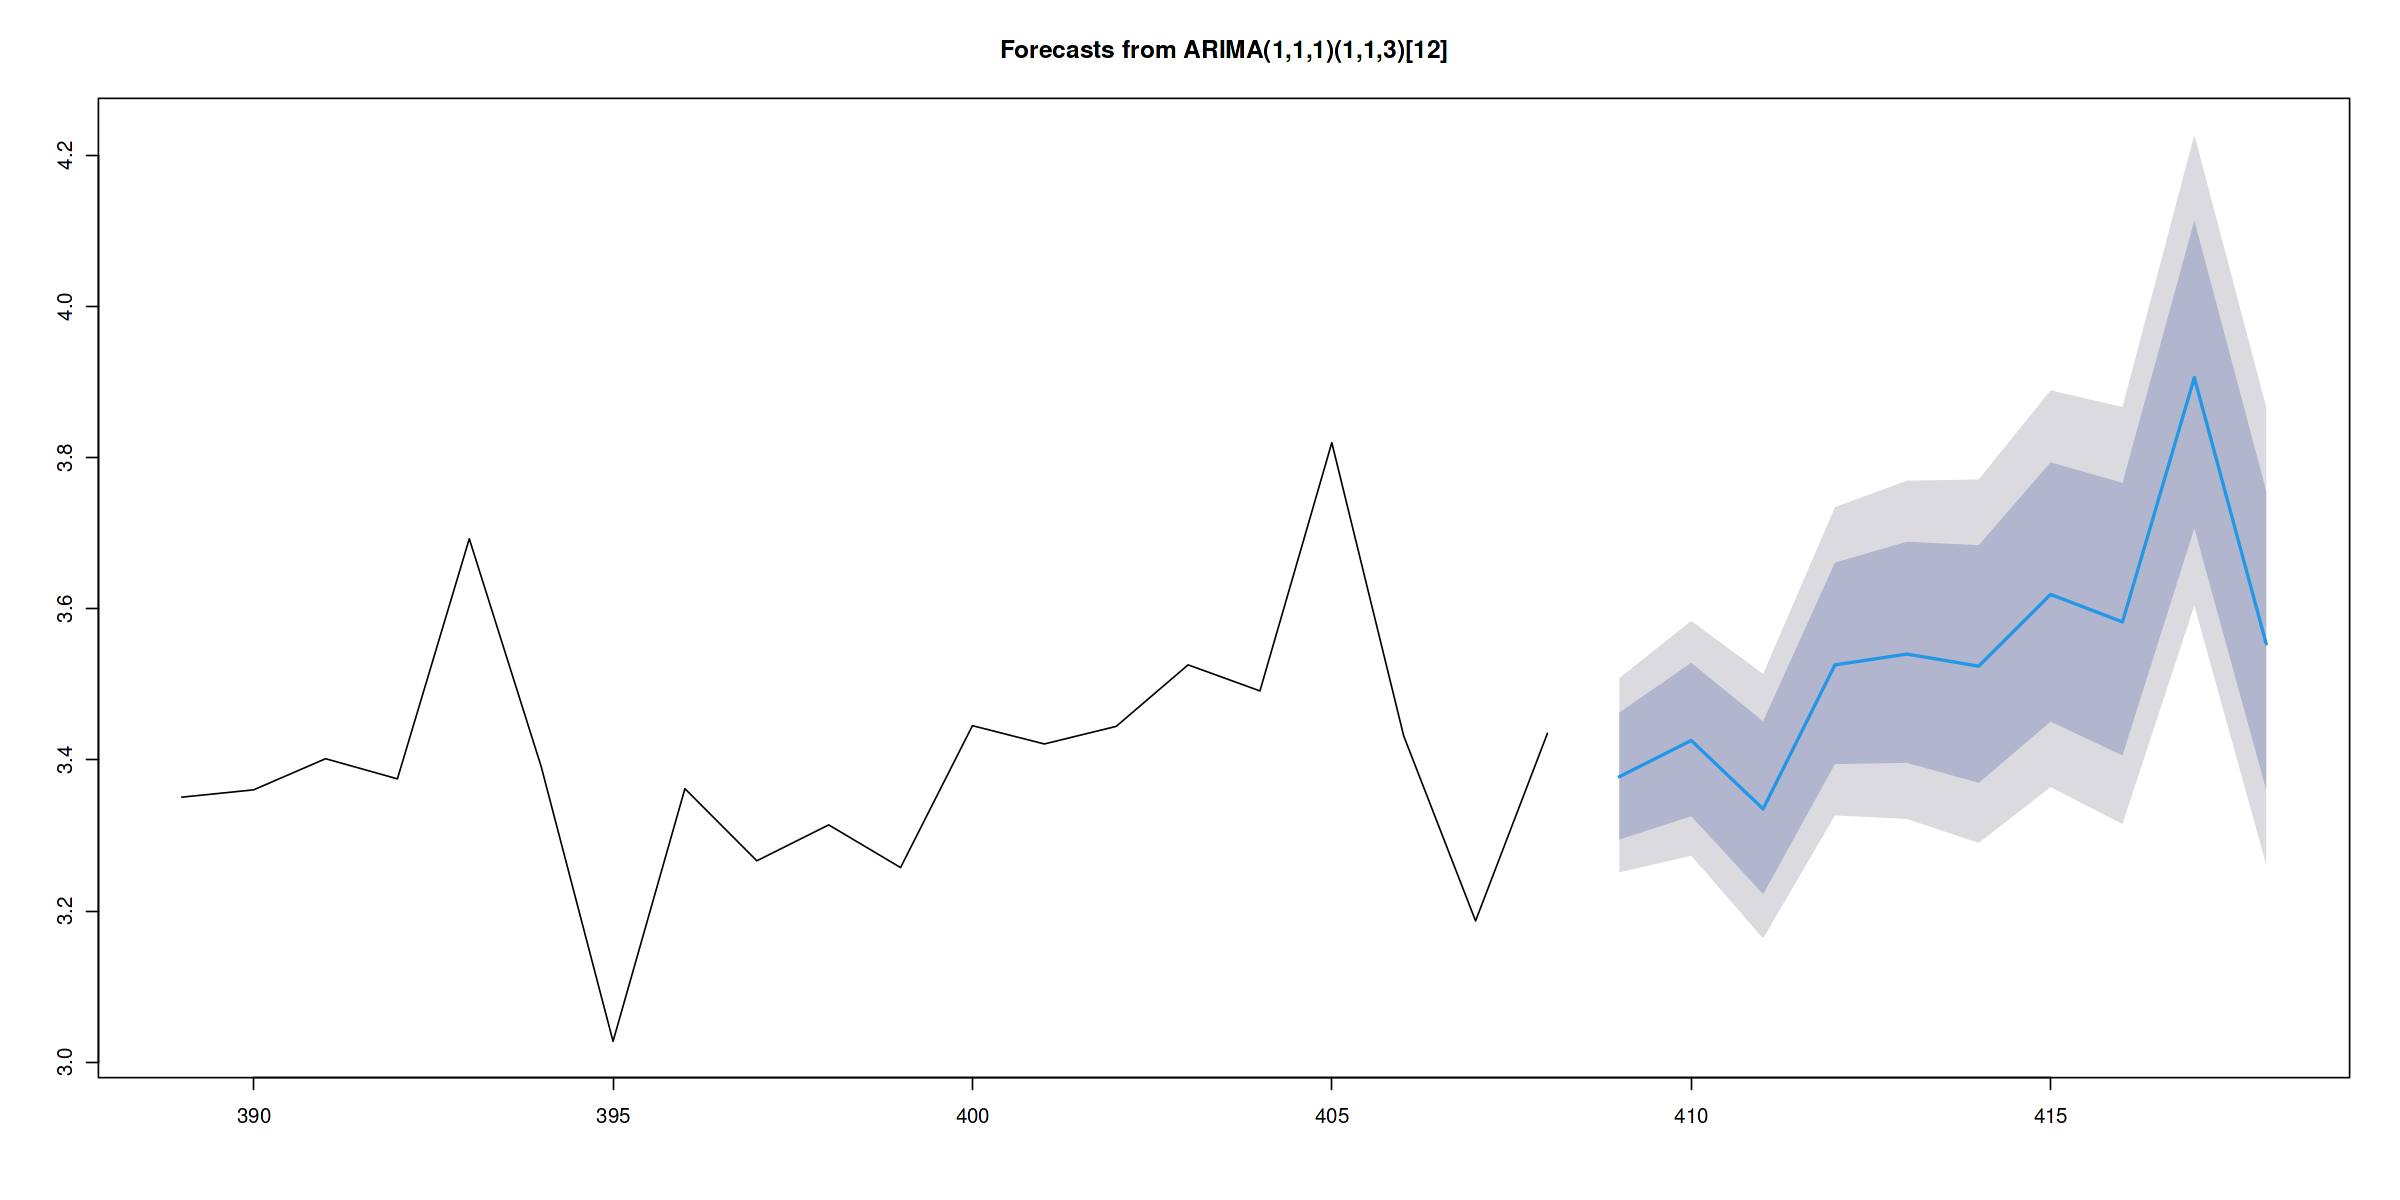

In [50]:
plot(Predic.mod6,20)

#### <span style='font-size:x-large'>**MAE and MSE for the set of predicted values**</span>



In [51]:
# Actual values for the next 12 periods
actual_values <- expenditure[397:408]

# Predictions for each model
predicted_values.mod1 <- forcast.mod1$mean
predicted_values.mod2 <- forcast.mod2$mean
predicted_values.mod5 <- forcast.mod5$mean
predicted_values.mod6 <- forcast.mod6$mean

MAE.mod1 <- mean(abs(predicted_values.mod1 - actual_values))
MSE.mod1 <- mean((predicted_values.mod1 - actual_values)^2)
MAE.mod2 <- mean(abs(predicted_values.mod2 - actual_values))
MSE.mod2 <- mean((predicted_values.mod2 - actual_values)^2)
MAE.mod5 <- mean(abs(predicted_values.mod5 - actual_values))
MSE.mod5 <- mean((predicted_values.mod5 - actual_values)^2)
MAE.mod6 <- mean(abs(predicted_values.mod6 - actual_values))
MSE.mod6 <- mean((predicted_values.mod6 - actual_values)^2)

Results.pred=rbind(
                  cbind(MSE.mod1,MSE.mod2,MSE.mod5,MSE.mod6),
                  cbind(MAE.mod1,MAE.mod2,MAE.mod5,MAE.mod6)
)
dimnames(Results.pred)=list(c("MSE","MAE"),c("Model 1","Model 2","Model 5","Model 6"))

Results.pred

Model 1     Model 2     Model 5     Model 6    
MSE 0.002032935 0.002431288 0.005781682 0.006133644
MAE 0.037469002 0.041012250 0.065481389 0.067663385

The best model (both in terms of MAE and MSE of the predicted values $\{X_{396+k}\}_{k=1}^{12}$) is model 1.

The second best model is model 2.

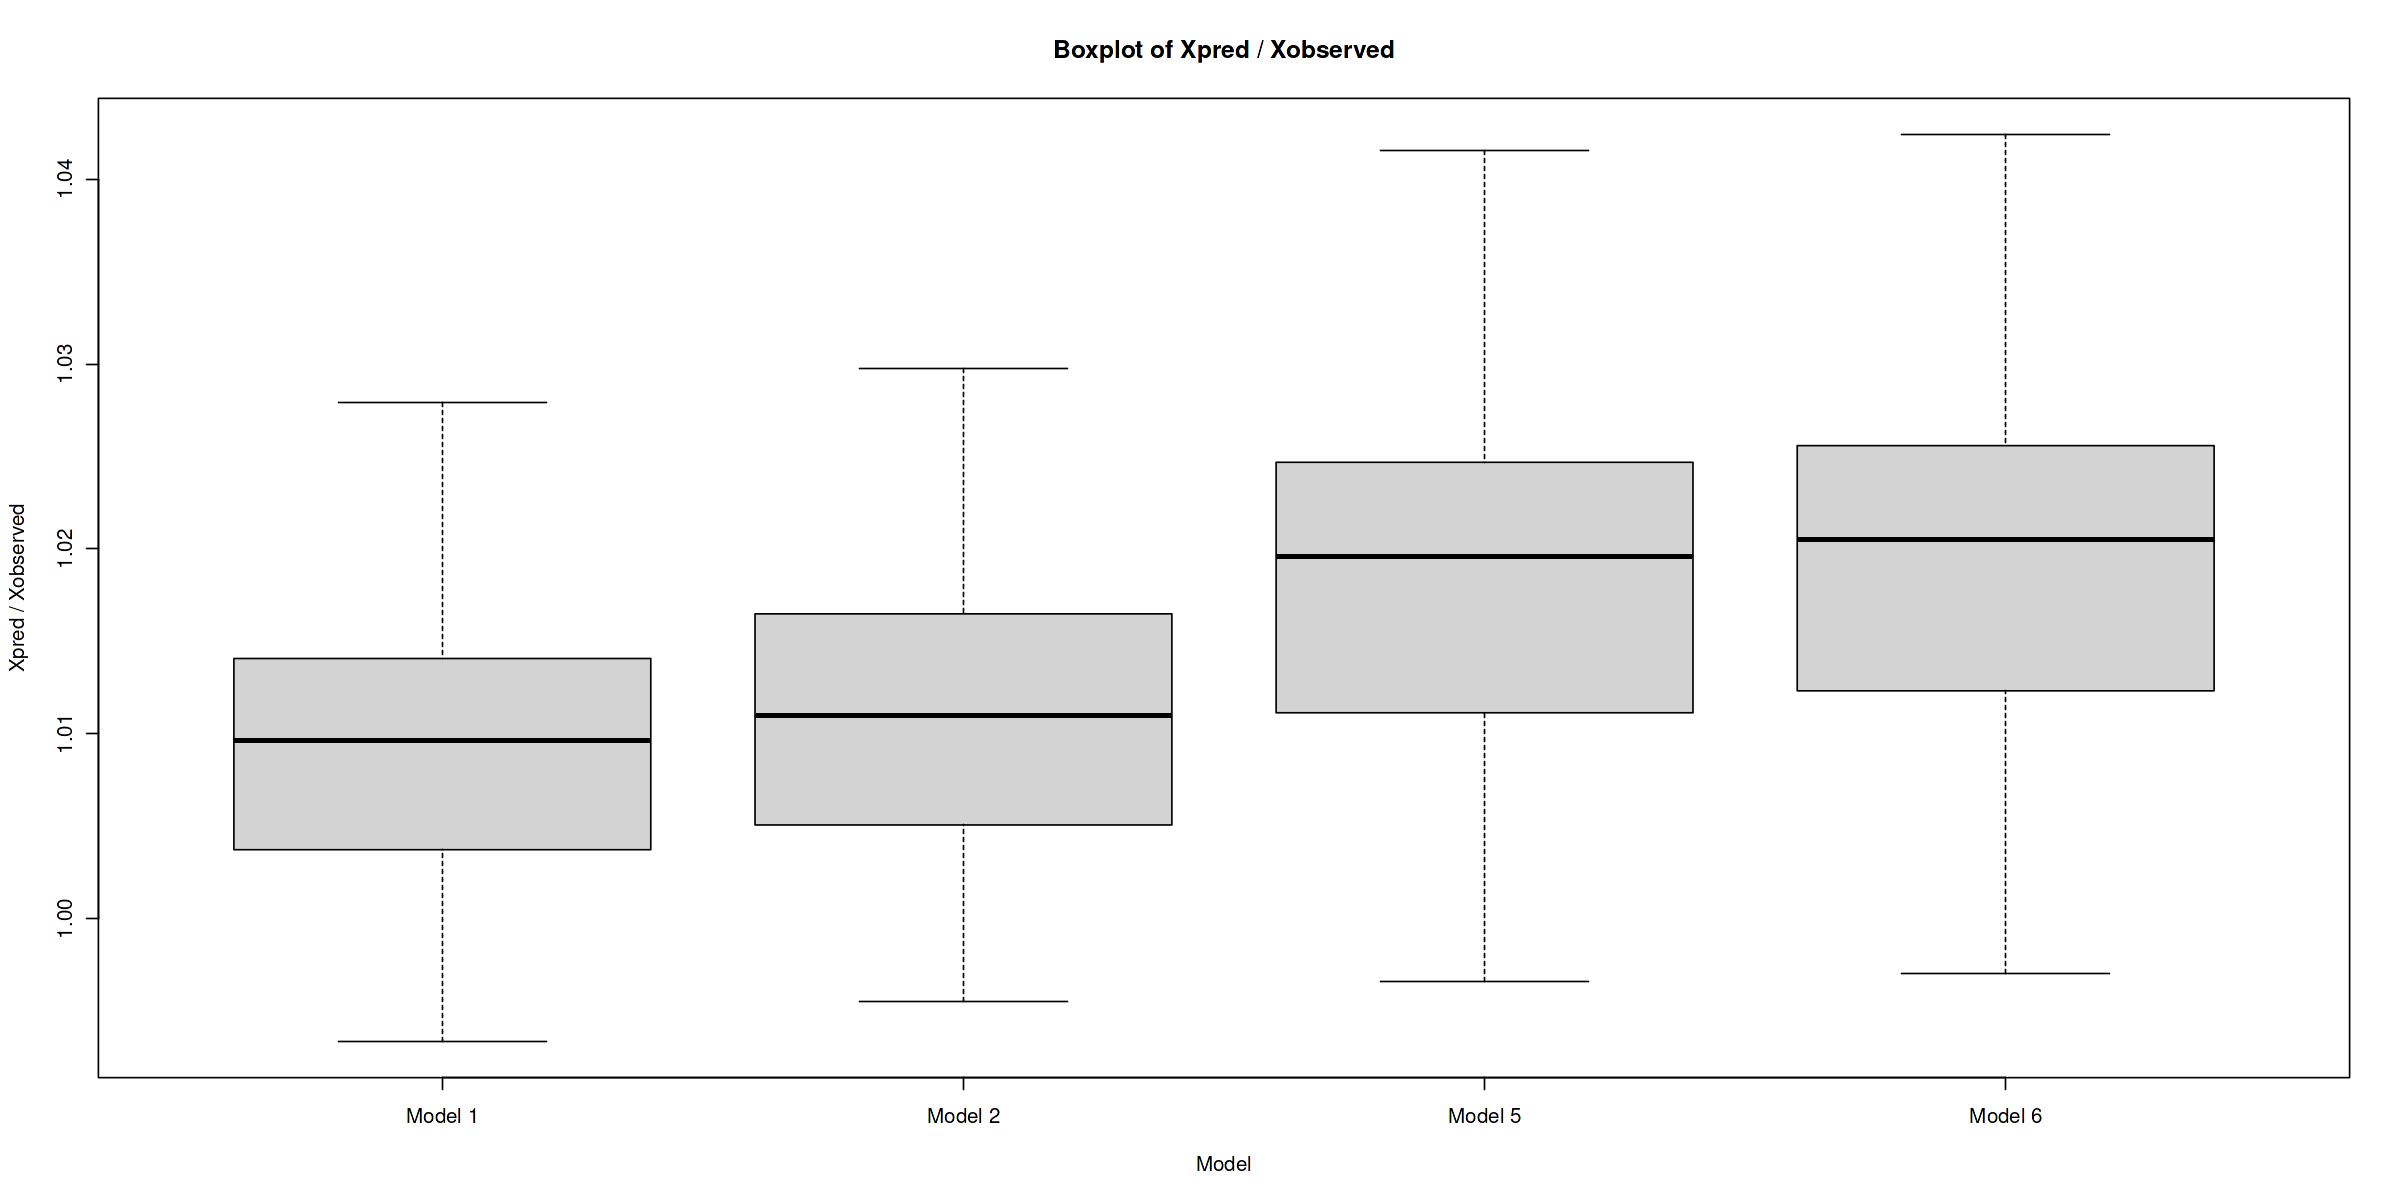

In [89]:
Xpred_Xobs <- list(
  Model1 = predicted_values.mod1 / actual_values,
  Model2 = predicted_values.mod2 / actual_values,
  Model5 = predicted_values.mod5 / actual_values,
  Model6 = predicted_values.mod6 / actual_values
)

boxplot(Xpred_Xobs, names = c("Model 1", "Model 2", "Model 5", "Model 6"),
        main = "Boxplot of Xpred / Xobserved", xlab = "Model", ylab = "Xpred / Xobserved")

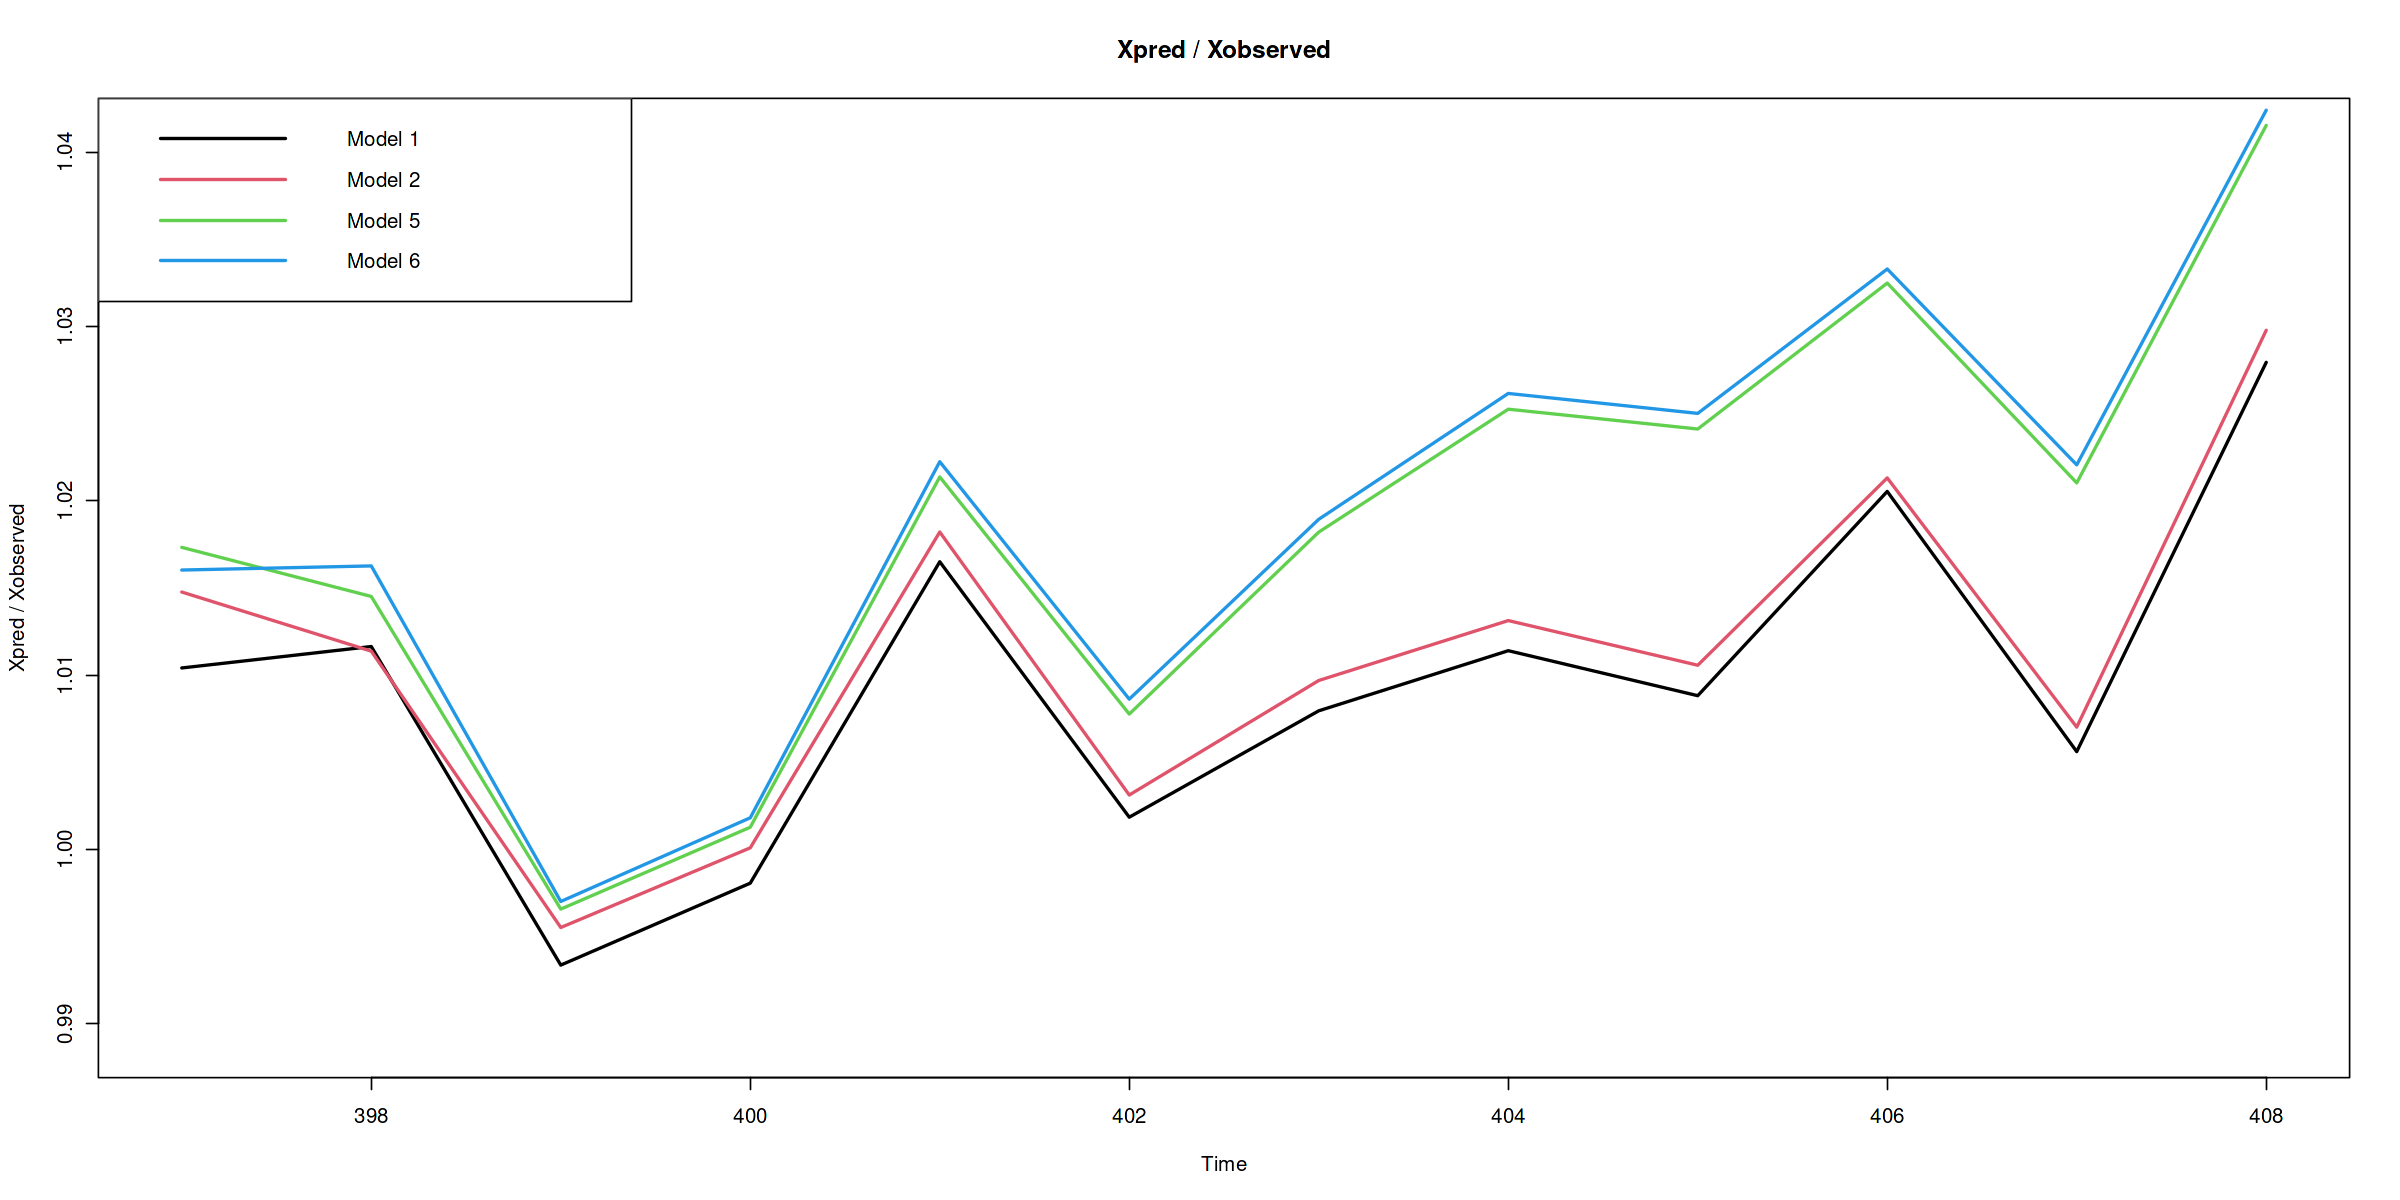

In [108]:
plot(Xpred_Xobs[[1]], type = "l", col = 1, lwd = 2, main = "Xpred / Xobserved", xlab = "Time", ylab = "Xpred / Xobserved",ylim=c(0.989,1.041))
lines(Xpred_Xobs[[2]], type = "l", col = 2, lwd = 2)
lines(Xpred_Xobs[[3]], type = "l", col = 3, lwd = 2)
lines(Xpred_Xobs[[4]], type = "l", col = 4, lwd = 2)

legend("topleft", legend = c("Model 1", "Model 2", "Model 5", "Model 6"), col = 1:4, lwd = 2)

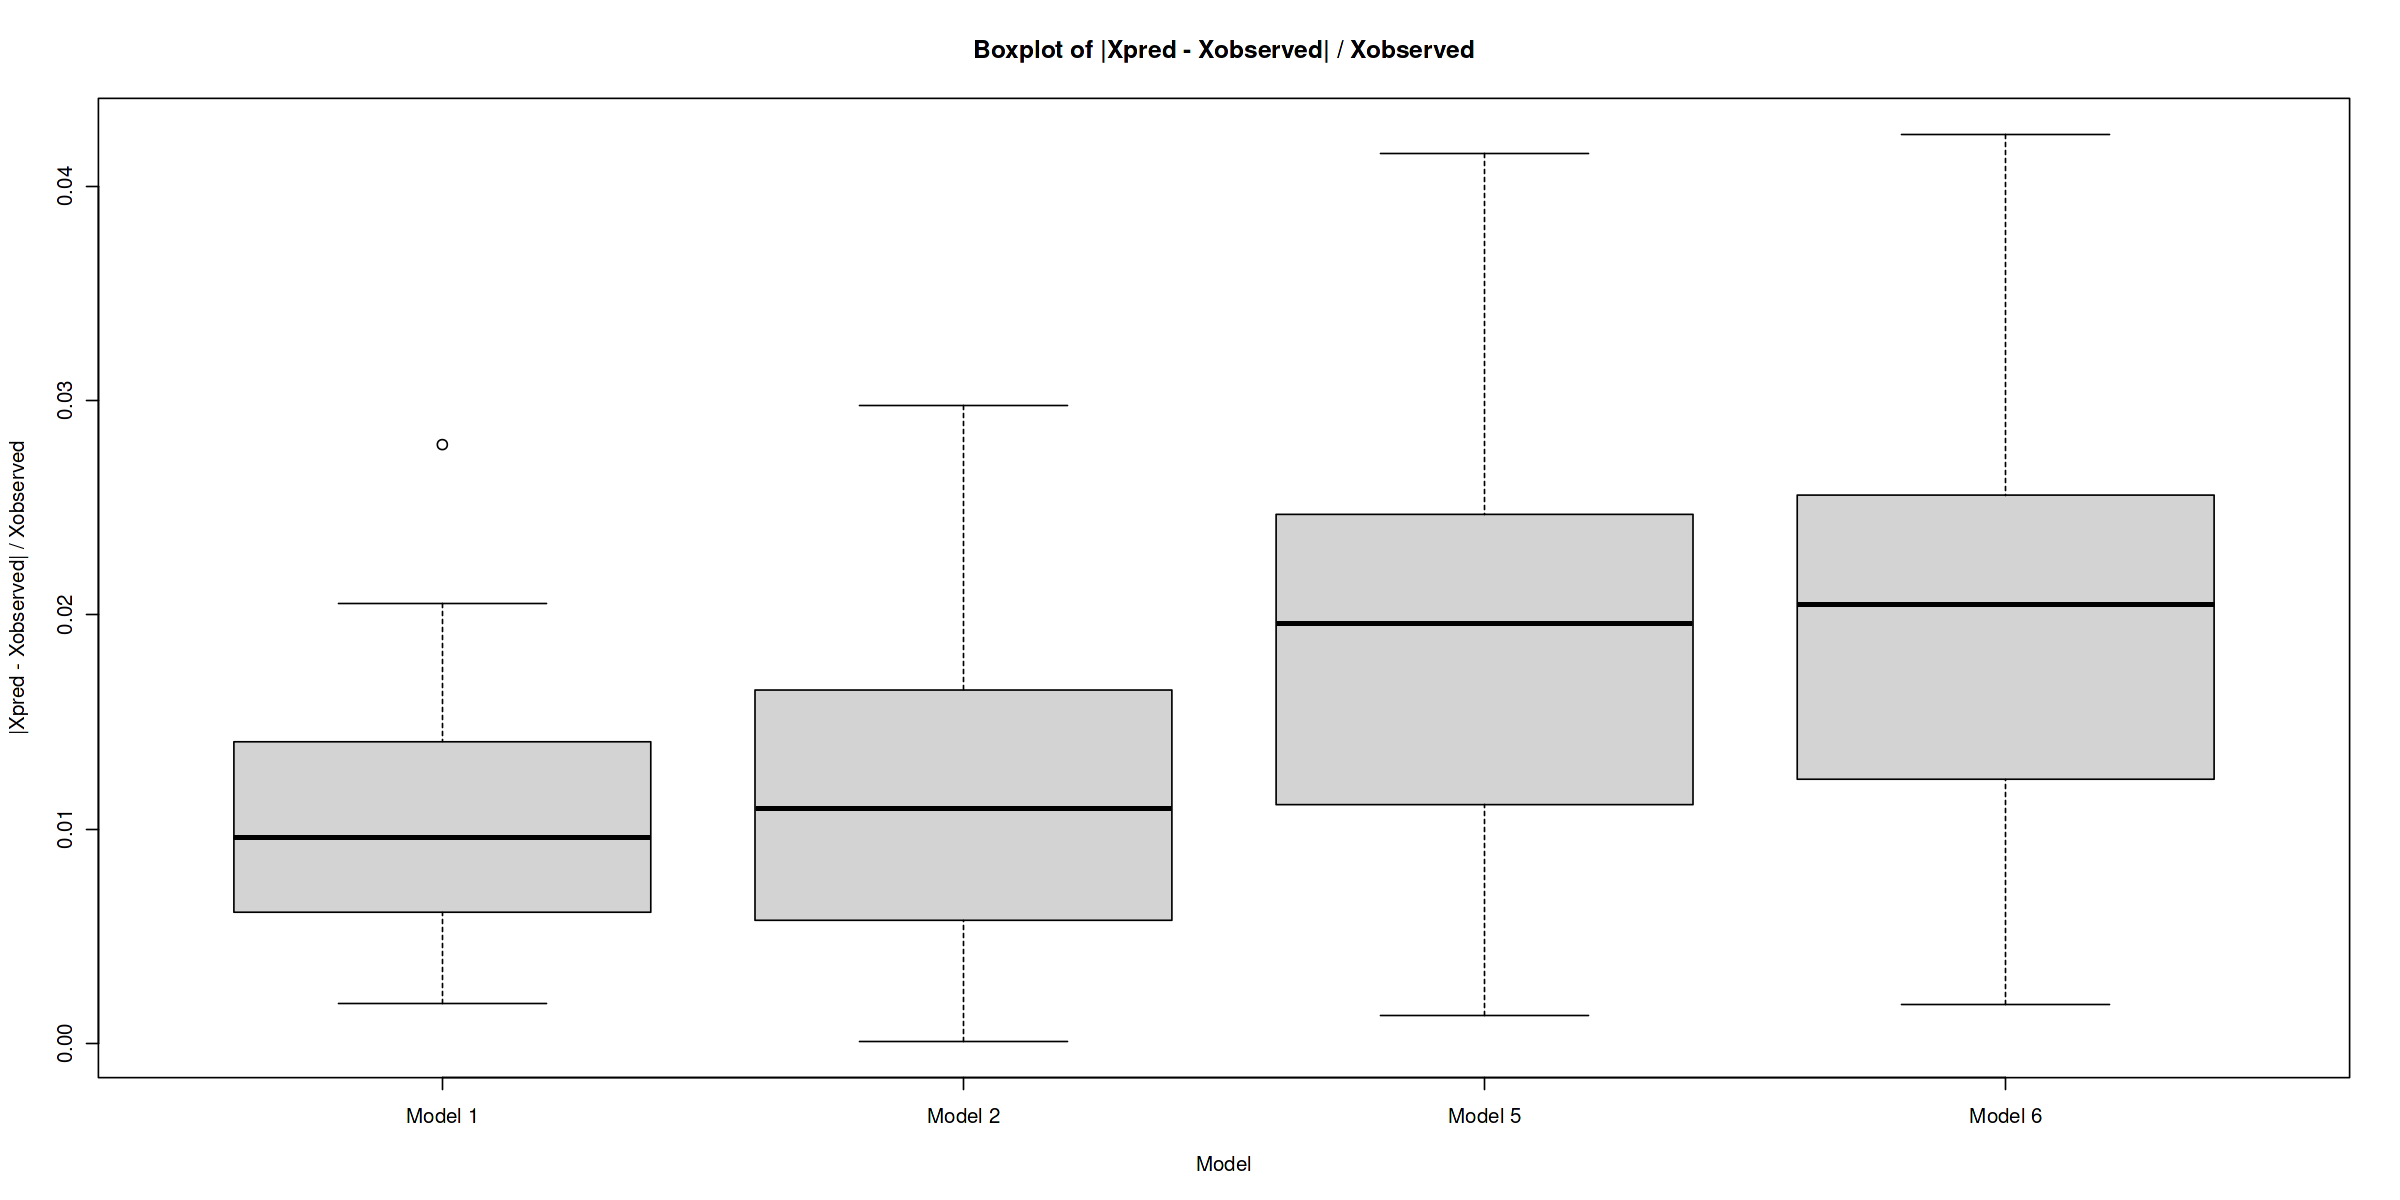

In [60]:
AbsError_Xobs <- list(
  Model1 = abs(predicted_values.mod1 - actual_values) / actual_values,
  Model2 = abs(predicted_values.mod2 - actual_values) / actual_values,
  Model5 = abs(predicted_values.mod5 - actual_values) / actual_values,
  Model6 = abs(predicted_values.mod6 - actual_values) / actual_values
)

boxplot(AbsError_Xobs, names = c("Model 1", "Model 2", "Model 5", "Model 6"),
        main = "Boxplot of |Xpred - Xobserved| / Xobserved", xlab = "Model", ylab = "|Xpred - Xobserved| / Xobserved")

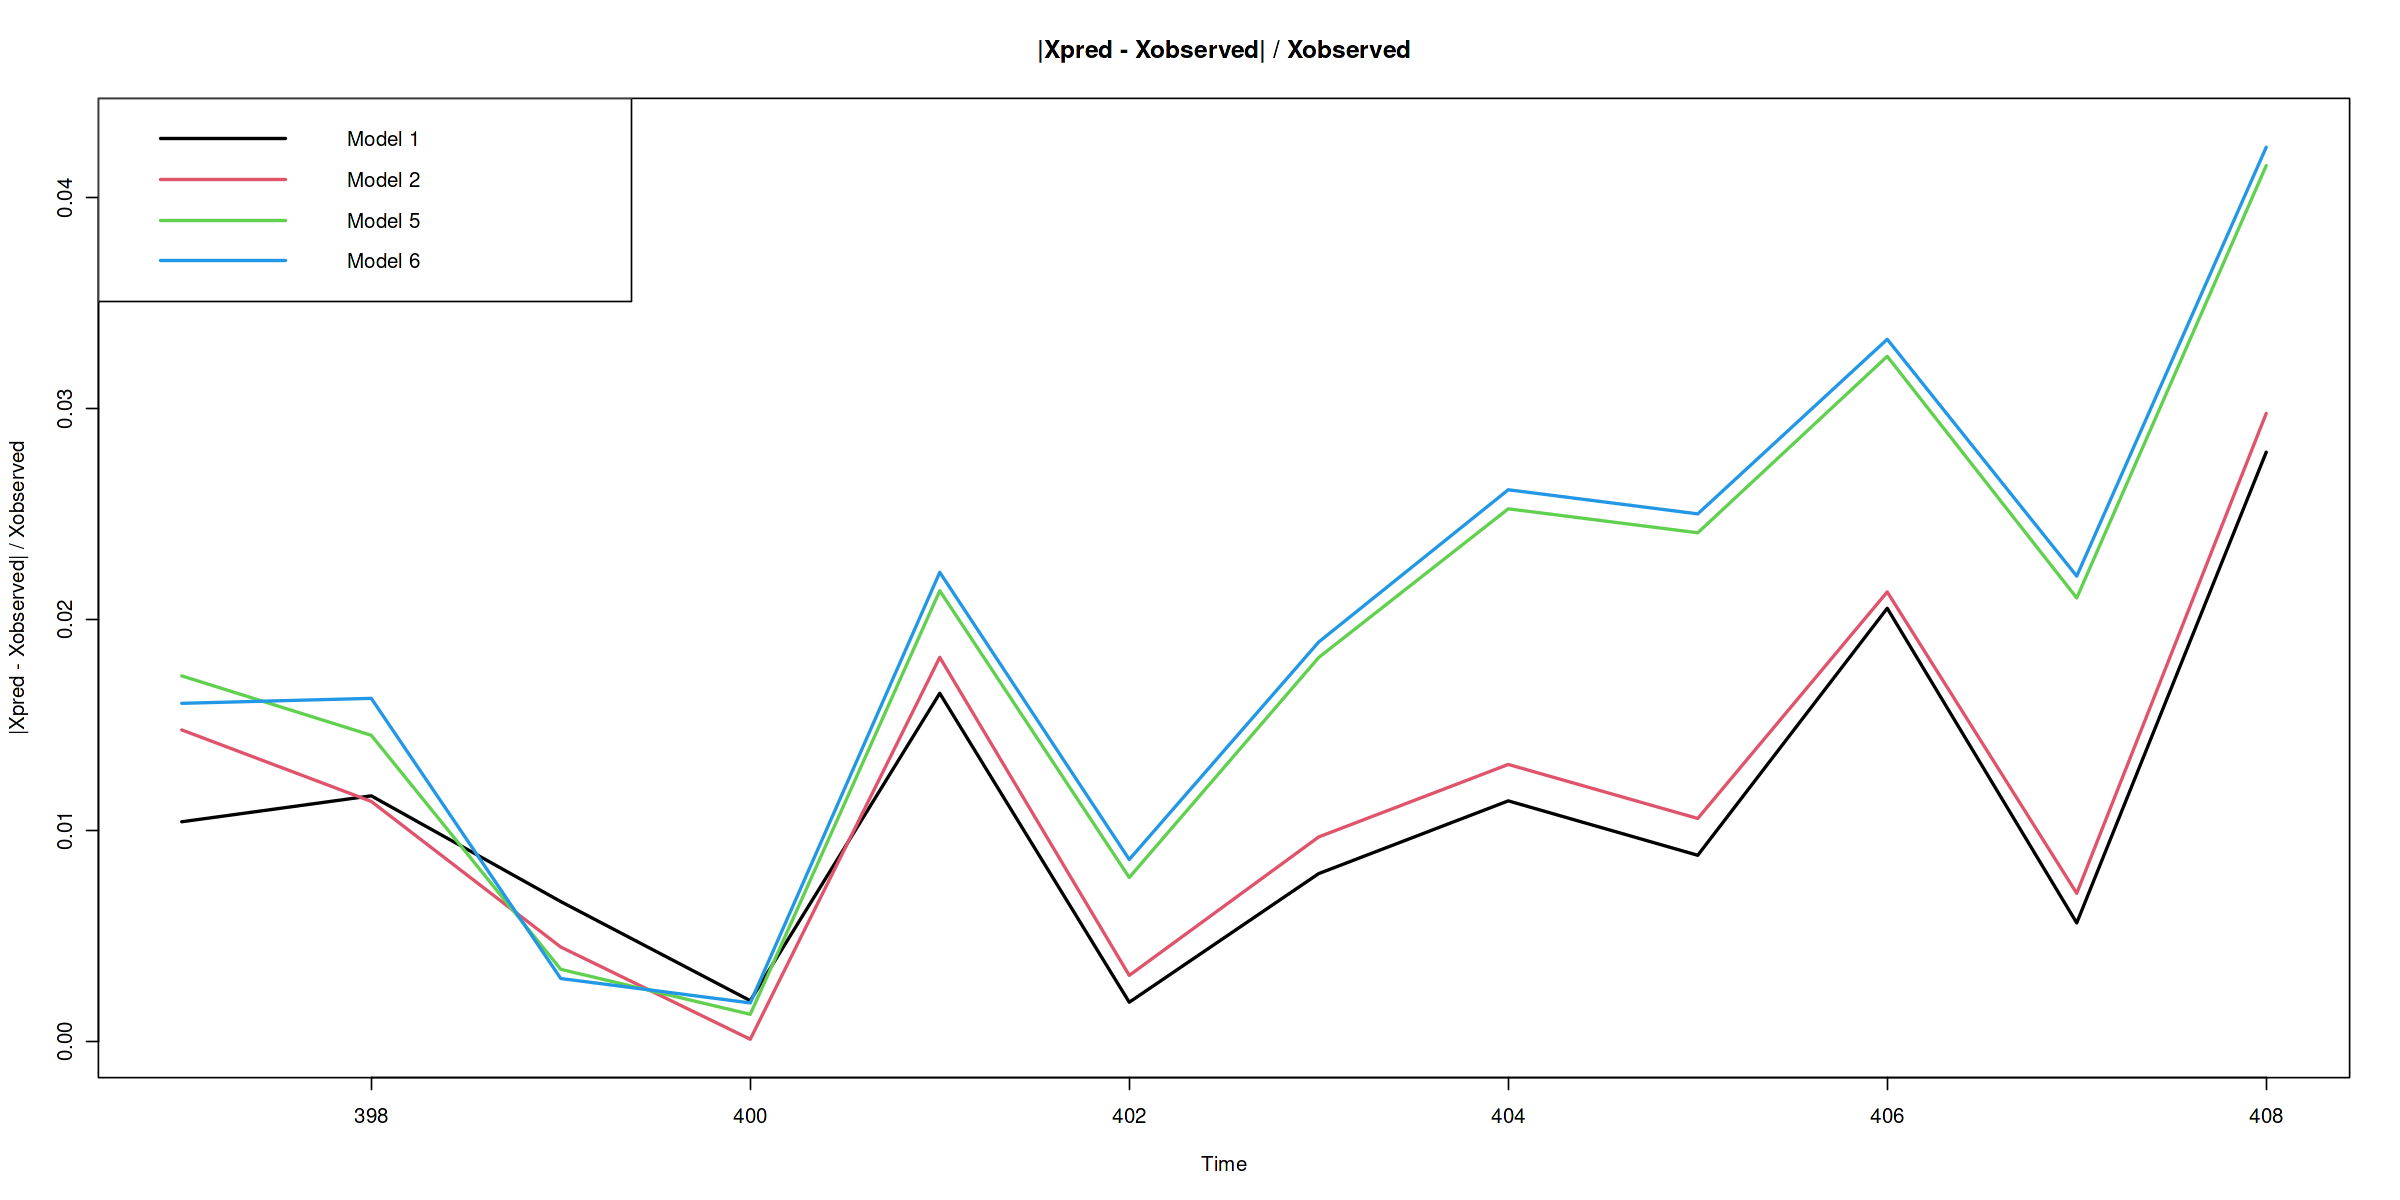

In [114]:
plot(AbsError_Xobs[[1]], type = "l", col = 1, lwd = 2, main = "|Xpred - Xobserved| / Xobserved", xlab = "Time", ylab = "|Xpred - Xobserved| / Xobserved",ylim=c(0,0.043))
lines(AbsError_Xobs[[2]], type = "l", col = 2, lwd = 2)
lines(AbsError_Xobs[[3]], type = "l", col = 3, lwd = 2)
lines(AbsError_Xobs[[4]], type = "l", col = 4, lwd = 2)

legend("topleft", legend = c("Model 1", "Model 2", "Model 5", "Model 6"), col = 1:4, lwd = 2)

#### **Estimation of the parameters of the selected models**



In [23]:
mod1$coef

ar1        sma1        sma2        sma3 
-0.31306438 -0.71783544 -0.13243104  0.02666517

In [64]:
mod2$coef

ar1         ar2         ar3        sma1        sma2        sma3 
-0.35093212 -0.11675987  0.08433109 -0.74003429 -0.11656520  0.03722663

#### **Comparison of the Sample ACF and PACF with the Theoretical ACF and PACF of the Estimated Models**



In [35]:
# theoretical ACF of the estimated ARMA(0,3)_12x(1,0) model
ACF.M1=ARMAacf(ar=c(mod1$coef[1]),ma=c(rep(0,11),mod1$coef[2],rep(0,11),mod1$coef[3],rep(0,11),mod1$coef[4]),40)  
# theoretical ACF of the estimated ARMA(0,3)_12x(3,0) model
ACF.M2=ARMAacf(ar=c(mod2$coef[1],mod2$coef[2],mod2$coef[3]),ma=c(rep(0,11),mod2$coef[4],rep(0,11),mod2$coef[5],rep(0,11),mod2$coef[6]),40)  

# theoretical PACF of the estimated ARMA(0,3)_12x(1,0) model
PACF.M1=ARMAacf(ar=c(mod1$coef[1]),ma=c(rep(0,11),mod1$coef[2],rep(0,11),mod1$coef[3],rep(0,11),mod1$coef[4]),40,pacf=TRUE) 
# theoretical PACF of the estimated ARMA(0,3)_12x(3,0) model
PACF.M2=ARMAacf(ar=c(mod2$coef[1],mod2$coef[2],mod2$coef[3]),ma=c(rep(0,11),mod2$coef[4],rep(0,11),mod2$coef[5],rep(0,11),mod2$coef[6]),40,pacf=TRUE)  

<span style='font-size:large'>Model 1</span>


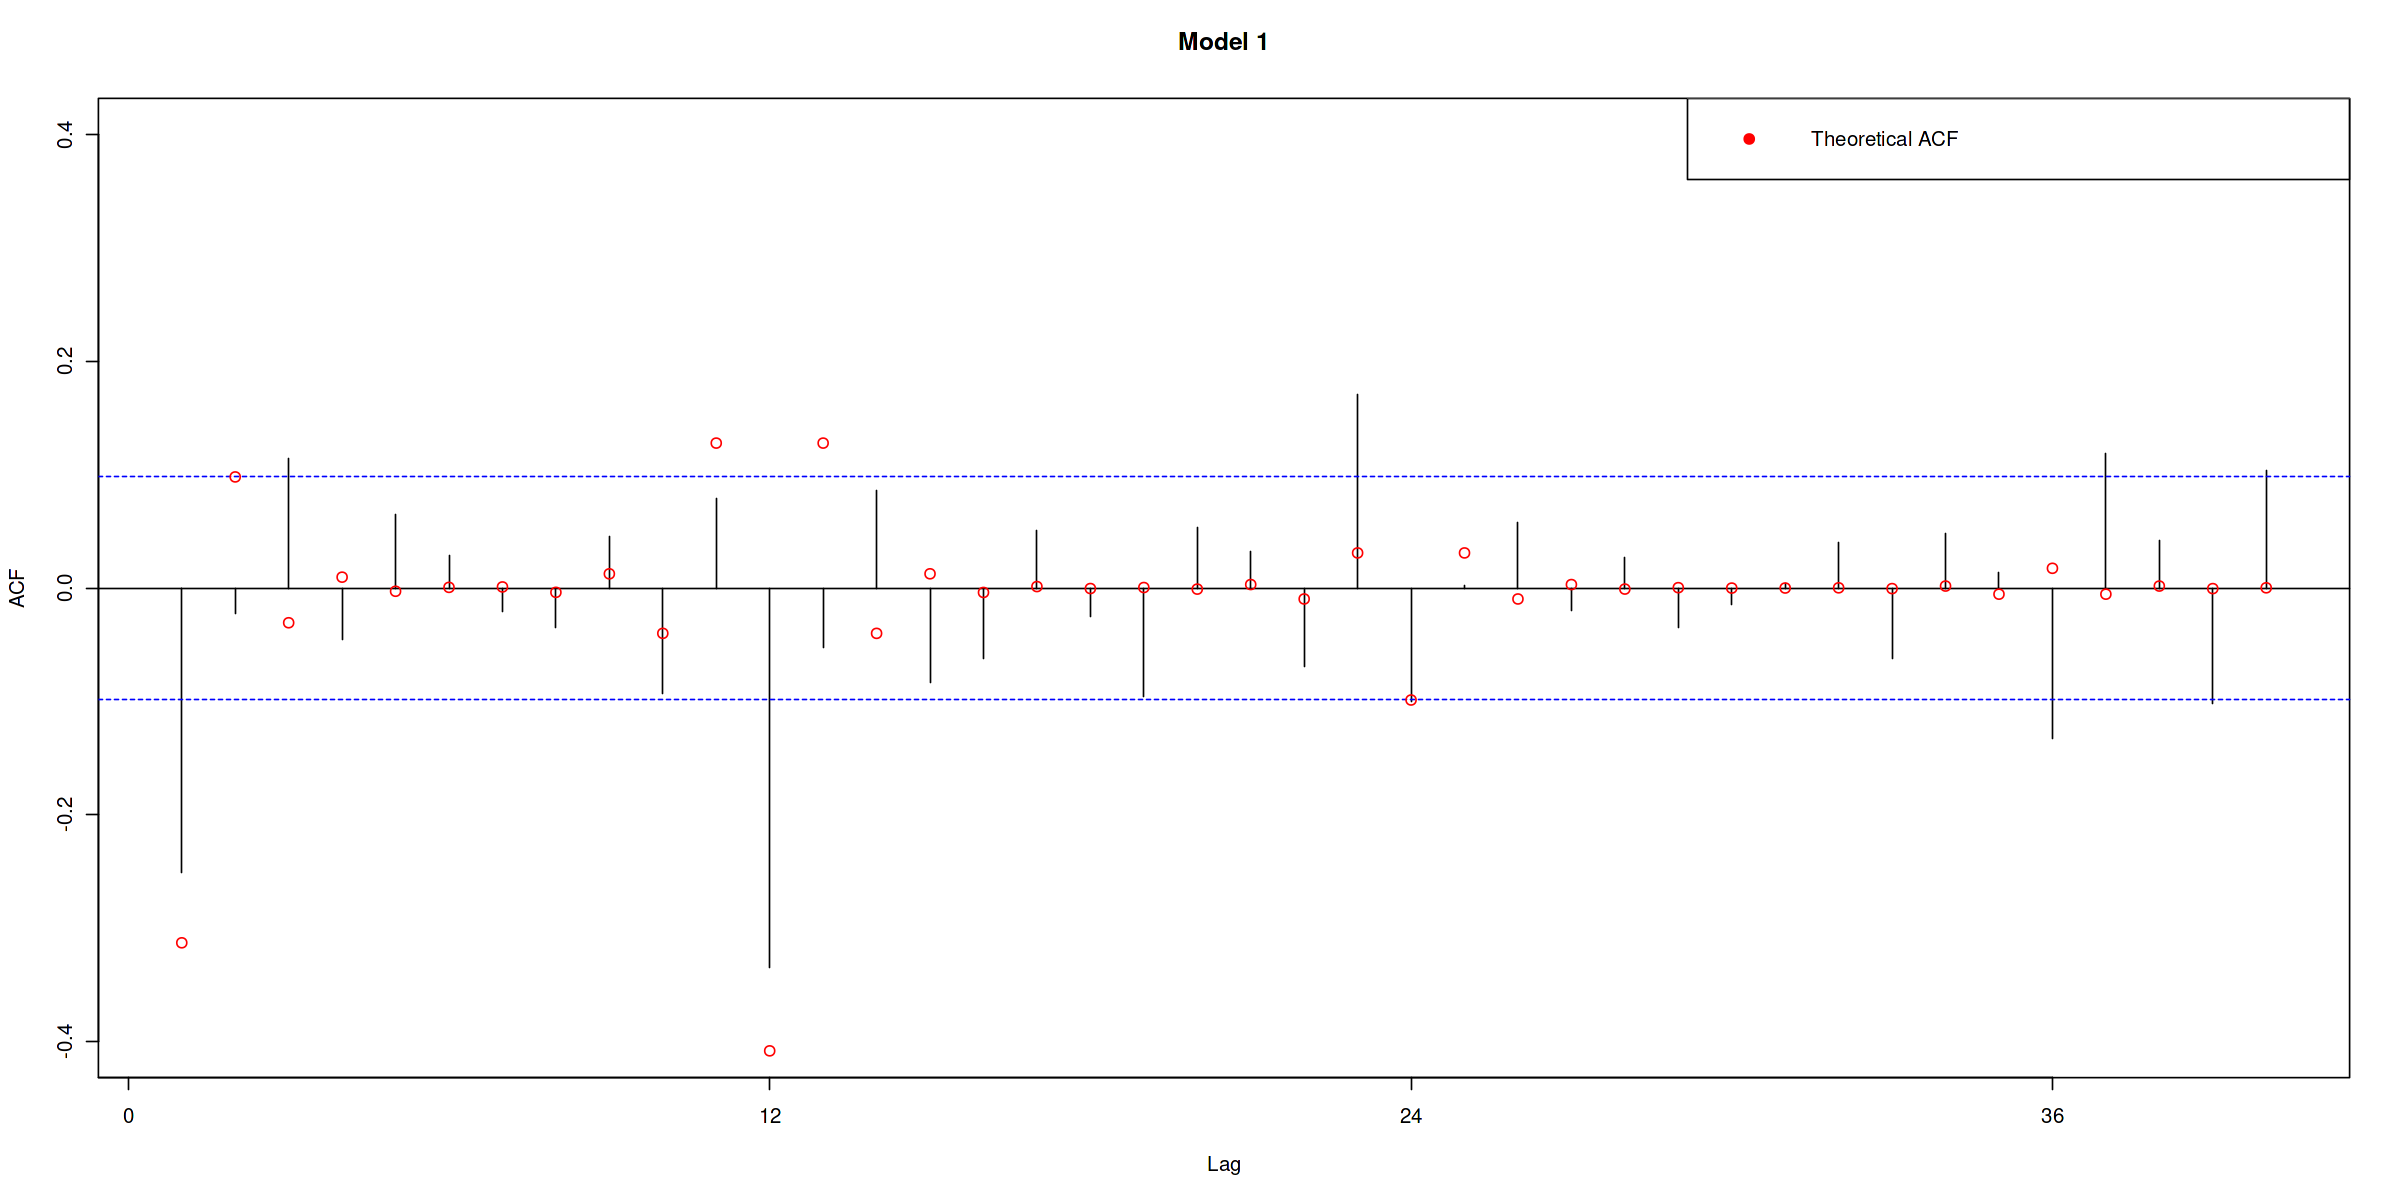

In [31]:
par(mfrow=c(1,1))
Acf(Wt.2,xlab="Lag",40,ylab="ACF", main="Model 1",ylim=c(-0.4,0.4)) 
points(seq(1,40),ACF.M1[-1],type="p",col="red") # Theoretical ACF 
legend("topright", c("Theoretical ACF"), pch=19, col="red") 

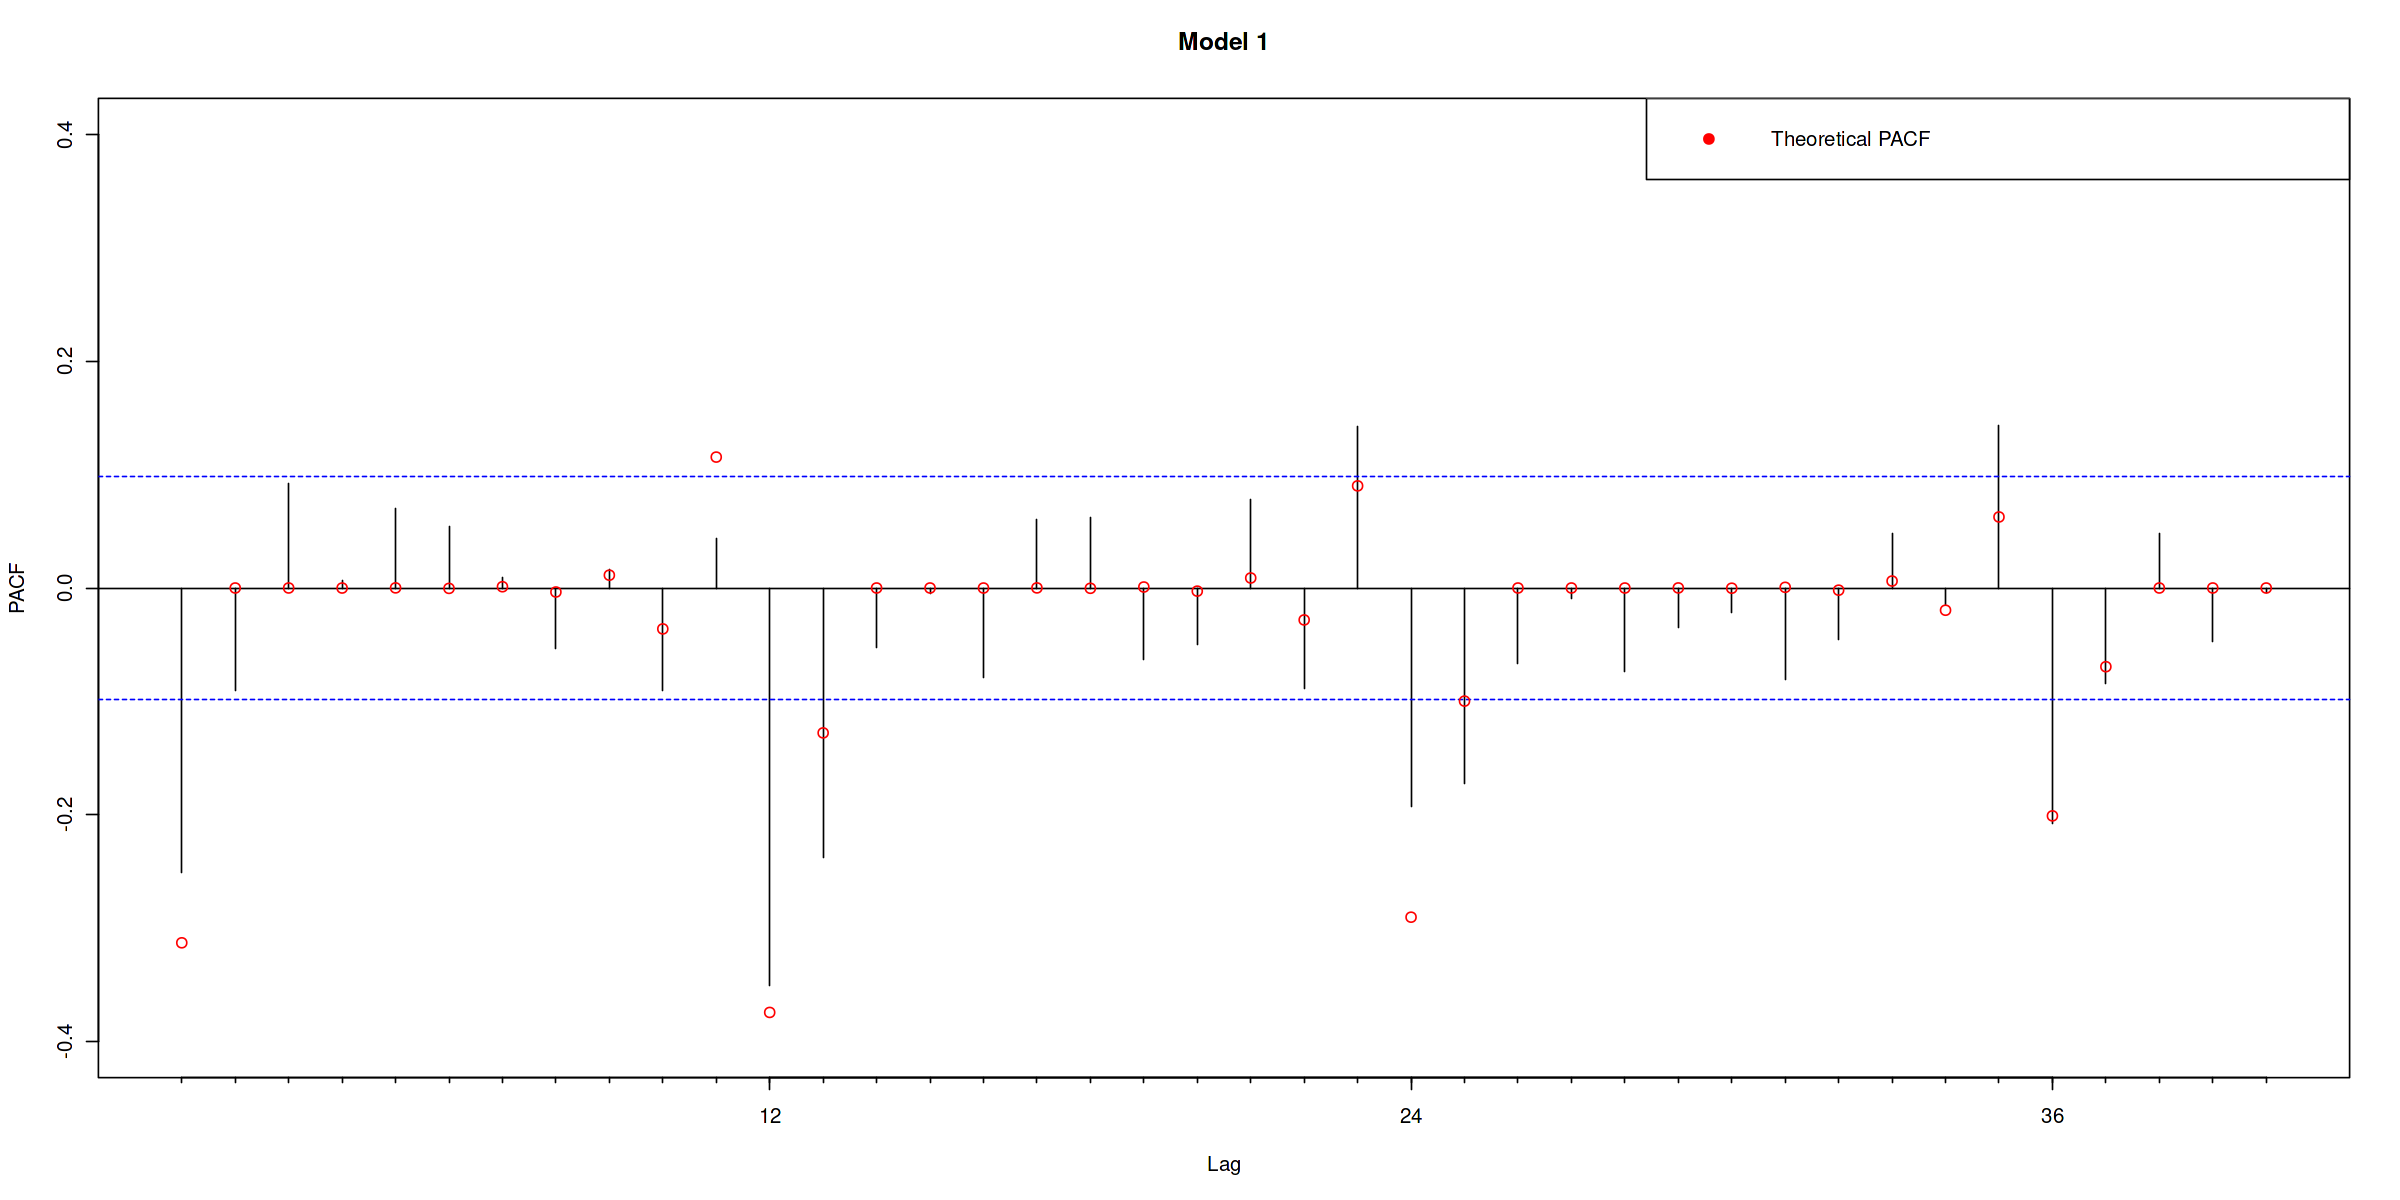

In [34]:
Pacf(Wt.2,ylab="PACF",40,main="Model 1",ylim=c(-0.4,0.4)) 
points(seq(1,40),PACF.M1,type="p",col="red") # Theoretical PACF 
legend("topright", c("Theoretical PACF"), pch=19, col="red") 

<span style='font-size:large'>Model 2</span>


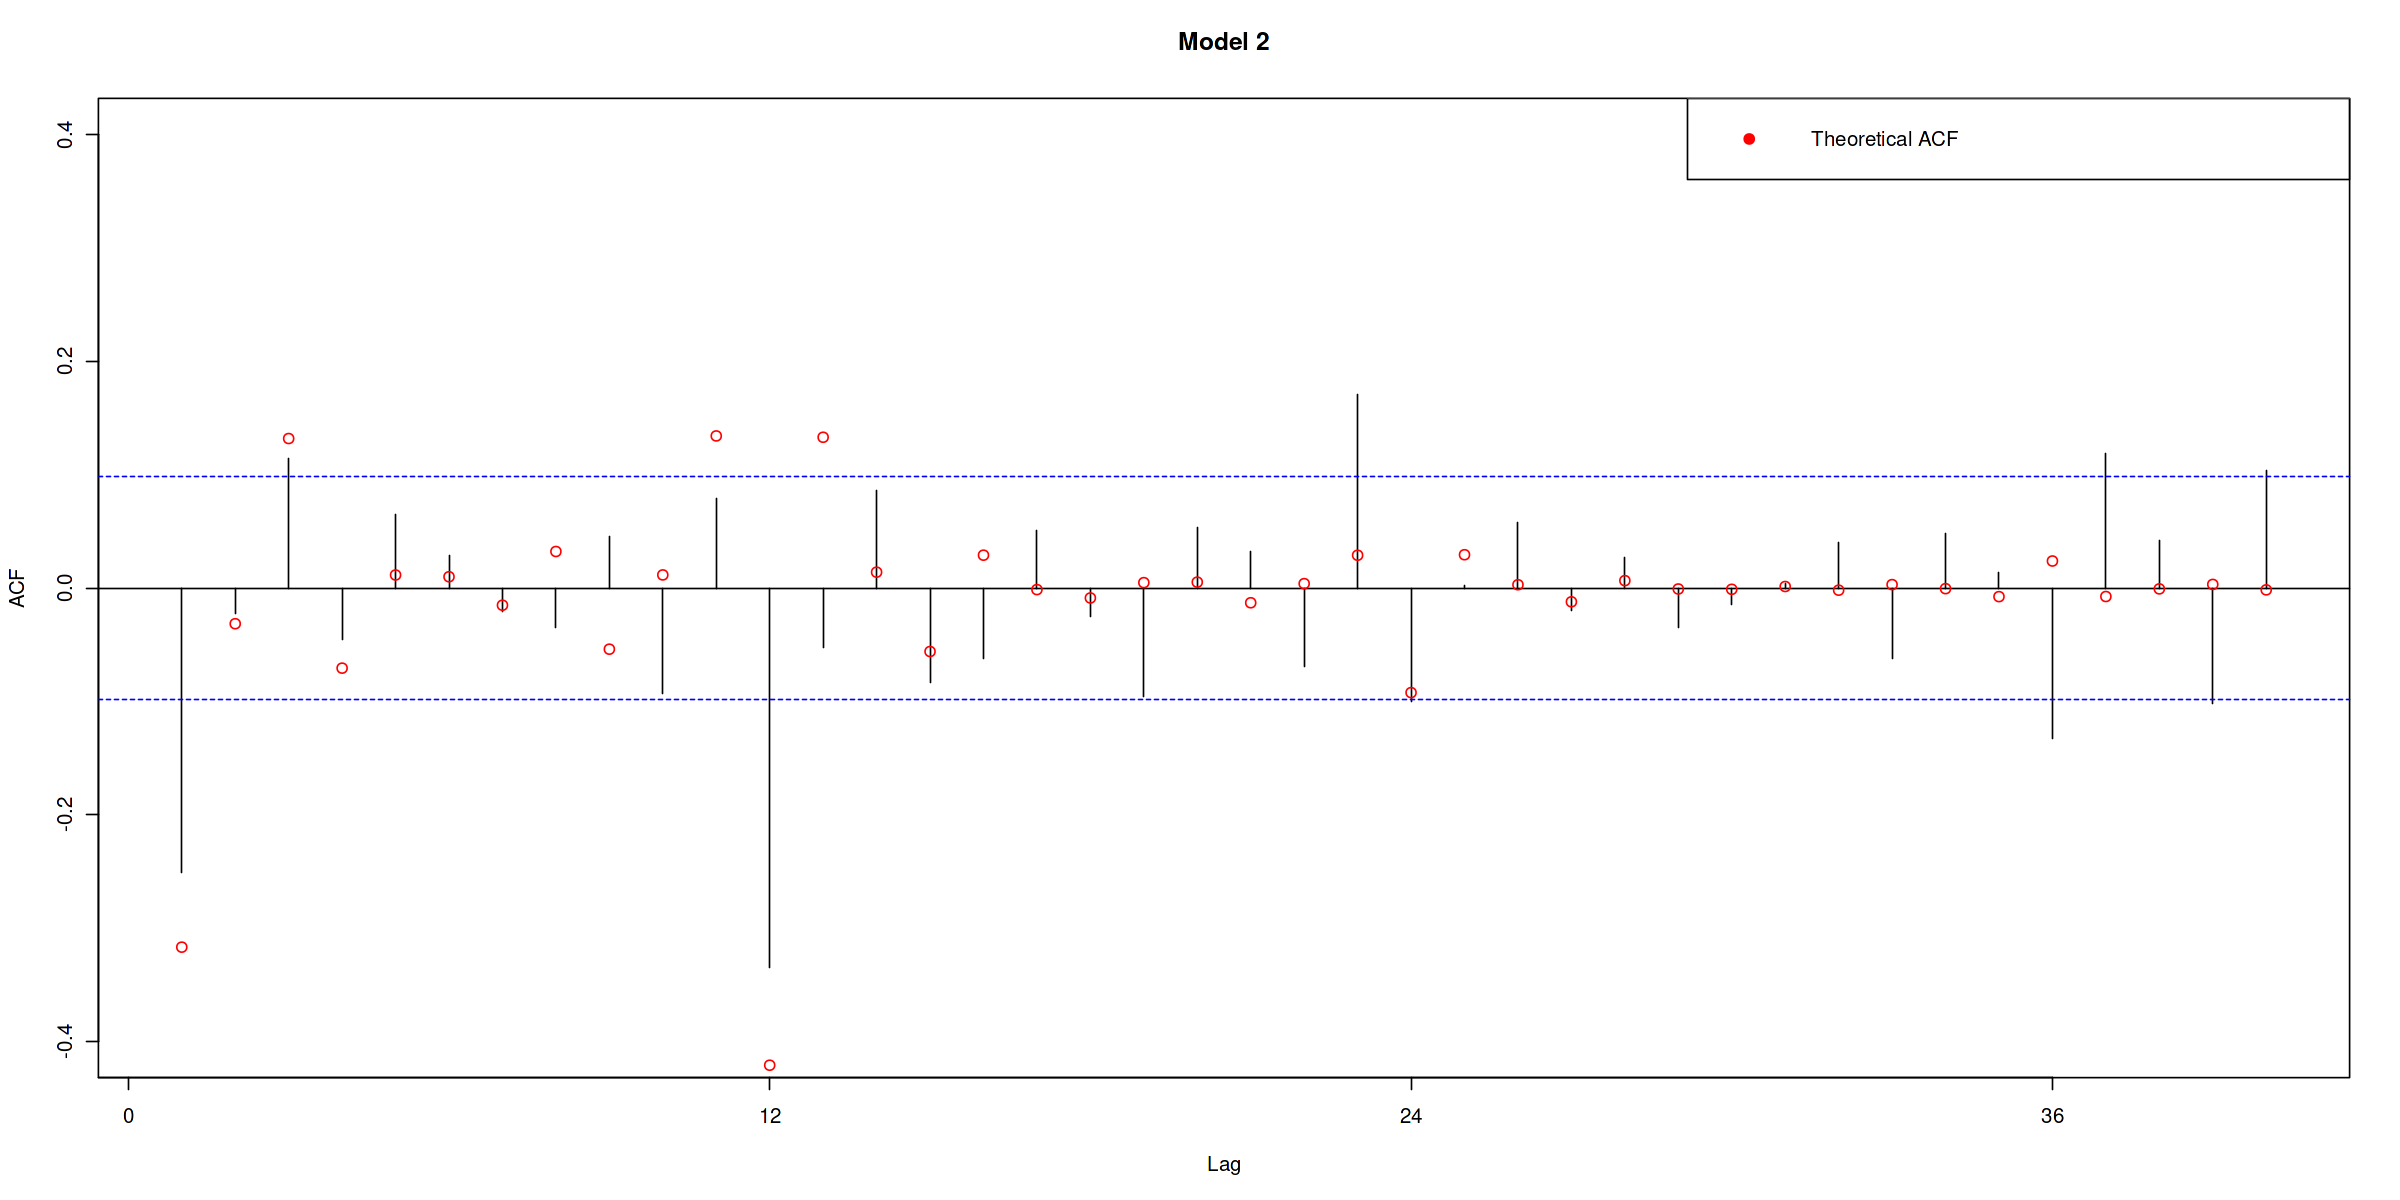

In [36]:
par(mfrow=c(1,1))
Acf(Wt.2,xlab="Lag",40,ylab="ACF", main="Model 2",ylim=c(-0.4,0.4)) 
points(seq(1,40),ACF.M2[-1],type="p",col="red") # Theoretical ACF 
legend("topright", c("Theoretical ACF"), pch=19, col="red") 

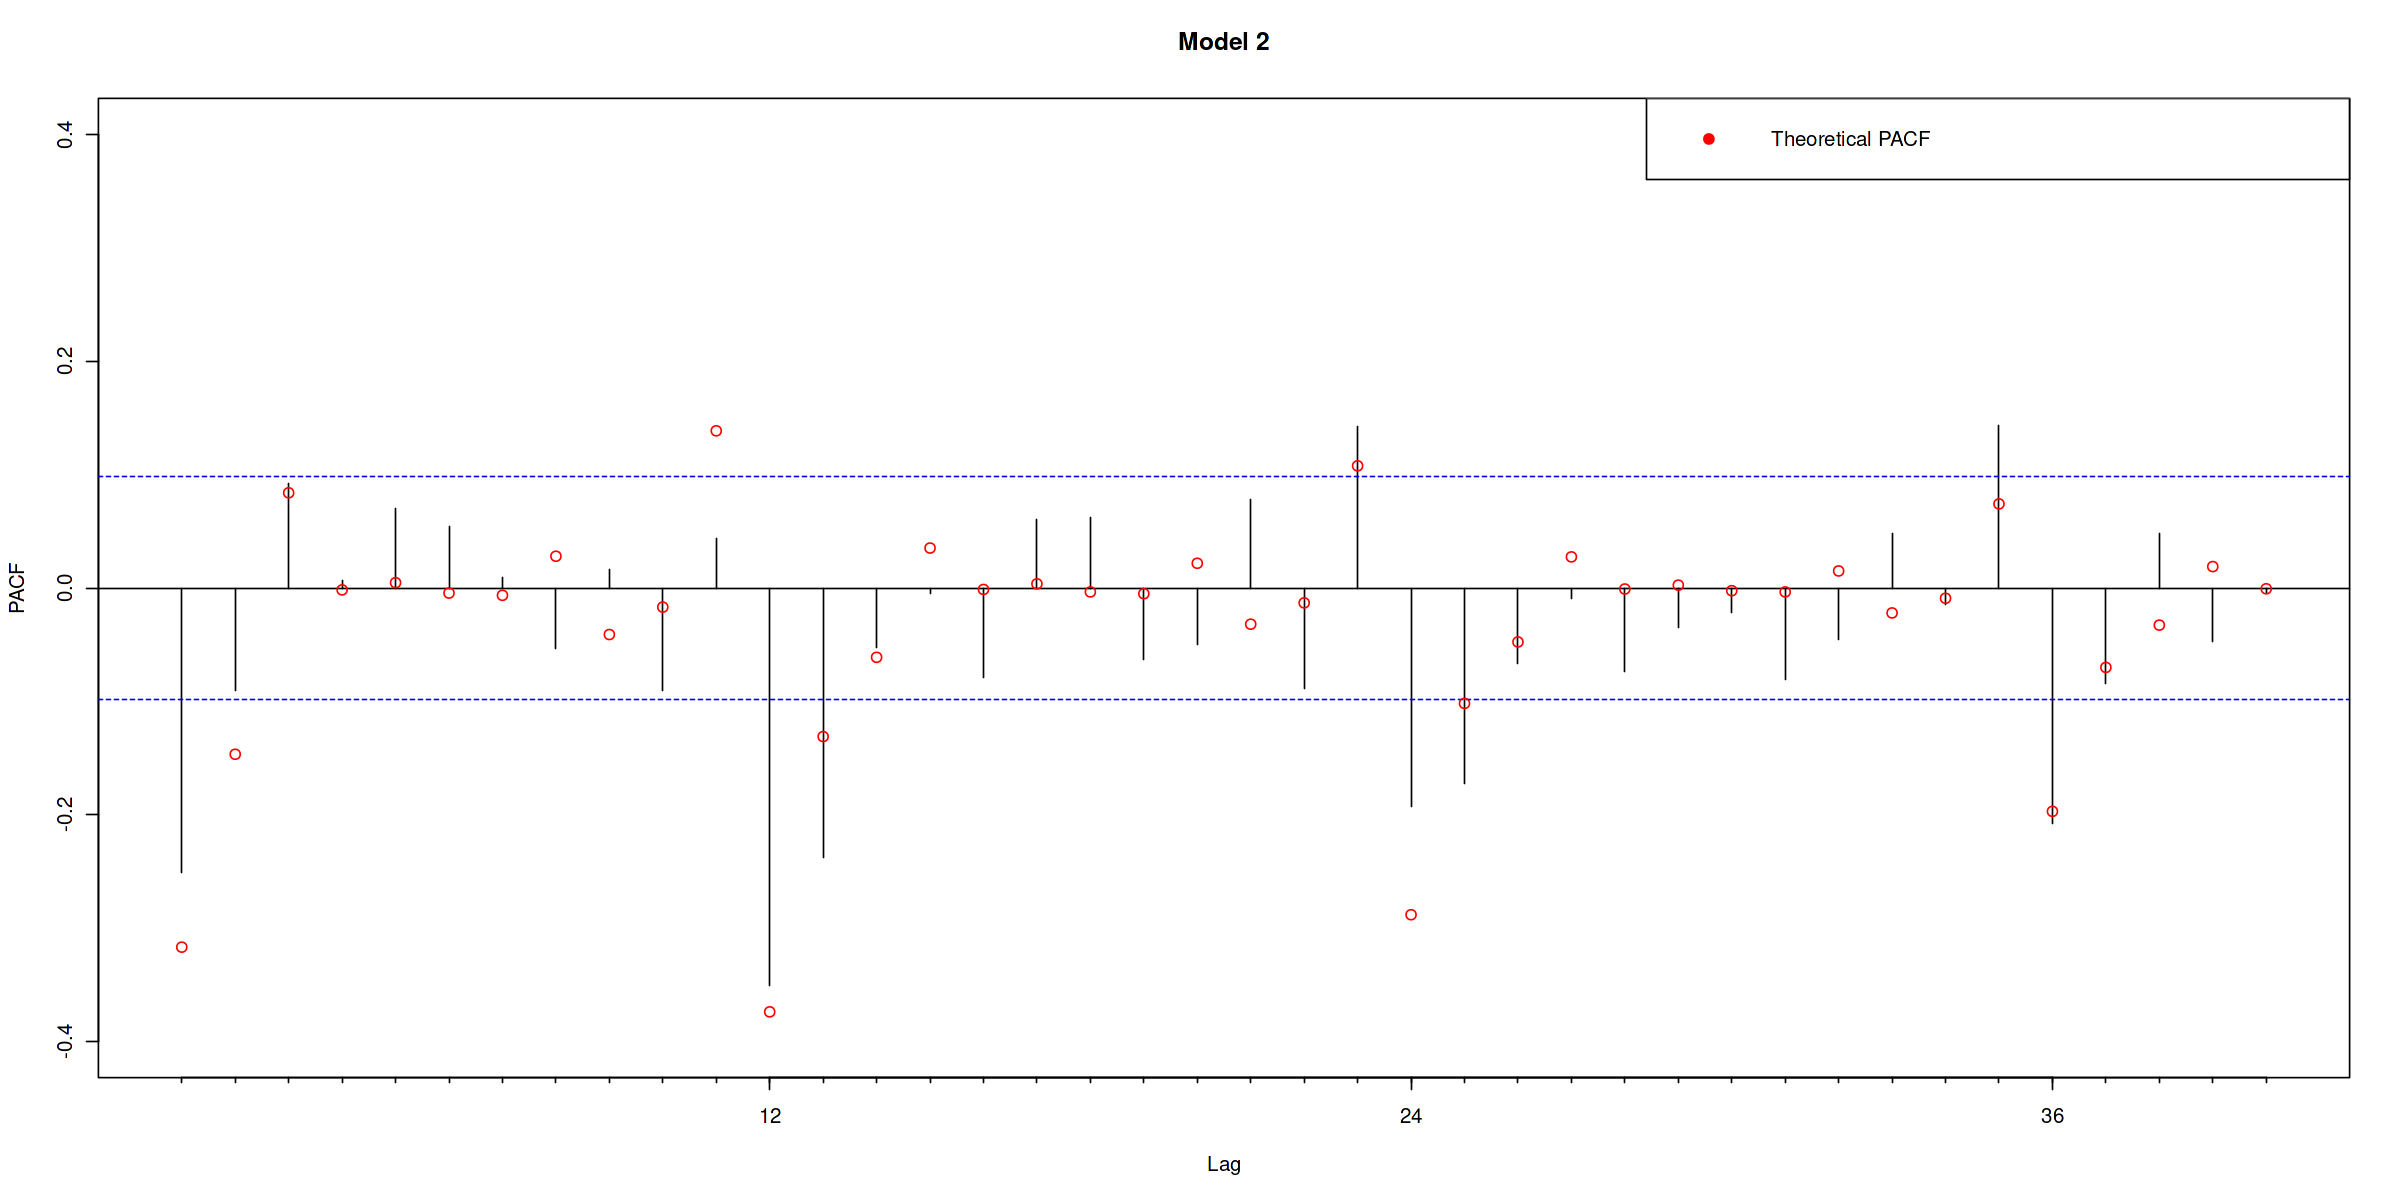

In [37]:
Pacf(Wt.2,ylab="PACF",40,main="Model 2",ylim=c(-0.4,0.4)) 
points(seq(1,40),PACF.M2,type="p",col="red") # Theoretical PACF 
legend("topright", c("Theoretical PACF"), pch=19, col="red") 